
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)

Version = "v75" # inference used v67, avoid overfit for unpredictable_cols

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

In [13]:
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 1.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
71                                NaN   
72                                NaN   
73                                NaN   
74                                NaN   
75                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
71                                     NaN                            NaN   
72                                     NaN                            NaN   
73                                     NaN                            NaN   
74                                     NaN                            NaN   
75                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# cope & paste from my v73 notebook

unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.3, 
                'lambda_l1': 0.1,
                'lambda_l2': 30,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.05,
                'objective': "binary",
                'colsample_bytree': 0.3,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 30,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    if target_col in unpredictable_cols:
        logger.info(f'unpredictable_cols:{target_col} → create_features')
       
        _X = create_features(_X, selected_cols[:30], target_col)
        _X_test = create_features(_X_test, selected_cols[:30], target_col)
    
    logger.info(f'N_features:{len(_X.columns)}')

    return _X, _y, _X_test

In [24]:
# create features with pseudo_labeling

def create_features(input_df, cols, target_col):

    _df = input_df.copy()

    def func_div(row):
        d = 1e-6
        return (row[col1]+d) / (row[col2]+d)

    def func_mul(row):
        return (row[col1]*row[col2])**2

    for i in tqdm(range(len(cols)-1)):
        col1, col2 = cols[i], cols[i+1]
        _df[f"{col1}_{col2}_mean"] = _df[[col1, col2]].apply(func_div, axis=1)
        _df[f"{col1}_{col2}_mul"] = _df[[col1, col2]].apply(func_mul, axis=1)
            
    return _df

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000871547	valid_1's binary_logloss: 0.00196577
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000288552	valid_1's binary_logloss: 0.000992504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00084722	valid_1's binary_logloss: 0.00413606
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000290469	valid_1's binary_logloss: 0.00229903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000888025	valid_1's binary_logloss: 0.00188428
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000296743	valid_1's binary_logloss: 0.000836899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843429	valid_1's binary_logloss: 0.00542069


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015646, Threshold: 0.0056416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0056416, conf_0:0.00395, conf_1:0.00733
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0356416


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293311	valid_1's binary_logloss: 0.00393694


threshold: 0.0356416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00079166	valid_1's binary_logloss: 0.00229608
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000280709	valid_1's binary_logloss: 0.0012266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789678	valid_1's binary_logloss: 0.00330296
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000291816	valid_1's binary_logloss: 0.00198725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800837	valid_1's binary_logloss: 0.00186719
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.000919235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791887	valid_1's binary_logloss: 0.00551188


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353082, Threshold: 0.0356416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0057760 Vs.target_rate: 0.00071
Num_p_label: 23.0, Expected: 2.8, Threshold: 0.0356416, conf_0:0.02851, conf_1:0.04277
Num_p_label: 12.0, Expected: 2.8, Adj_threshold_1: 0.0656416
Num_p_label: 7.0, Expected: 2.8, Adj_threshold_2: 0.0956416


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.00447088


threshold: 0.0956416, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00079166	valid_1's binary_logloss: 0.00229608
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000280709	valid_1's binary_logloss: 0.0012266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789678	valid_1's binary_logloss: 0.00330296
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000291816	valid_1's binary_logloss: 0.00198725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800837	valid_1's binary_logloss: 0.00186719
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.000919235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791887	valid_1's binary_logloss: 0.00551188


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353082, Threshold: 0.0956416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00071
Num_p_label: 7.0, Expected: 2.8, Threshold: 0.0956416, conf_0:0.08608, conf_1:0.10521
threshold: 0.0956416, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.00447088


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


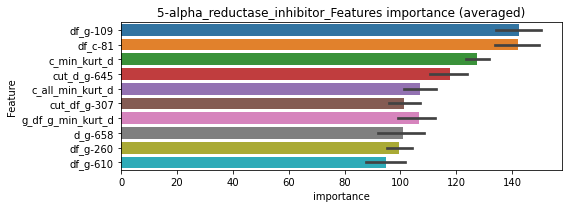

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000285933	valid_1's binary_logloss: 0.00110086
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000291059	valid_1's binary_logloss: 0.00110229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000288696	valid_1's binary_logloss: 0.000870127


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.001374622730286958


Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000297774	valid_1's binary_logloss: 0.00242451


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947013	valid_1's binary_logloss: 0.00216742
[600]	training's binary_logloss: 0.000295383	valid_1's binary_logloss: 0.000914829
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295384	valid_1's binary_logloss: 0.000914828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000936644	valid_1's binary_logloss: 0.0024272
[600]	training's binary_logloss: 0.000293005	valid_1's binary_logloss: 0.00114338
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000293005	valid_1's binary_logloss: 0.00114338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000938209	valid_1's binary_logloss: 0.00410587
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000299315	valid_1's binary_logloss: 0.00291416
Training until validation scores don't improve for 30 r

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014467, Threshold: 0.0039466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039466, conf_0:0.00276, conf_1:0.00513
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0339466
threshold: 0.0339466, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892128	valid_1's binary_logloss: 0.00204154
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000285702	valid_1's binary_logloss: 0.000927303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087702	valid_1's binary_logloss: 0.00217789
[600]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900693	valid_1's binary_logloss: 0.003576
[600]	training's binary_logloss: 0.000291727	valid_1's binary_logloss: 0.00268928
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000294205	valid_1's binary_logloss: 0.00268846
Training until validation scores don't improve for 30 roun

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267736, Threshold: 0.0339466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0339466, conf_0:0.02716, conf_1:0.04074


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000291854	valid_1's binary_logloss: 0.000863398


threshold: 0.0339466, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892128	valid_1's binary_logloss: 0.00204154
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000285702	valid_1's binary_logloss: 0.000927303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087702	valid_1's binary_logloss: 0.00217789
[600]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900693	valid_1's binary_logloss: 0.003576
[600]	training's binary_logloss: 0.000291727	valid_1's binary_logloss: 0.00268928
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000294205	valid_1's binary_logloss: 0.00268846
Training until validation scores don't improve for 30 roun

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267736, Threshold: 0.0339466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0339466, conf_0:0.03055, conf_1:0.03734


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000291854	valid_1's binary_logloss: 0.000863398


threshold: 0.0339466, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


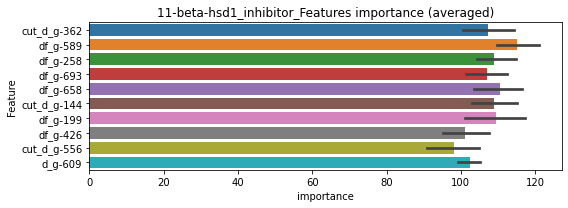

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000290994	valid_1's binary_logloss: 0.00095545


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000292801	valid_1's binary_logloss: 0.000762553


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00029414	valid_1's binary_logloss: 0.00157725


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000293568	valid_1's binary_logloss: 0.000614974


11-beta-hsd1_inhibitor logloss: 0.0009776520433907717
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127033	valid_1's binary_logloss: 0.00802745
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000347697	valid_1's binary_logloss: 0.00593351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130368	valid_1's binary_logloss: 0.00623401
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000359434	valid_1's binary_logloss: 0.00427186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133661	valid_1's binary_logloss: 0.00392699
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000363724	valid_1's binary_logloss: 0.00198967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123815	valid_1's binary_logloss: 0.00863174
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000349044	v

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018609, Threshold: 0.0045581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0045581, conf_0:0.00319, conf_1:0.00593
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_1: 0.0345581
threshold: 0.0345581, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118721	valid_1's binary_logloss: 0.00749002
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000348875	valid_1's binary_logloss: 0.00544992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012125	valid_1's binary_logloss: 0.00551897
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000344184	valid_1's binary_logloss: 0.00343599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125993	valid_1's binary_logloss: 0.00319542
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000343059	valid_1's binary_logloss: 0.00169604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119253	valid_1's binary_logloss: 0.00896121


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0141075, Threshold: 0.0345581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0345581, conf_0:0.02765, conf_1:0.04147
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0645581


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000343529	valid_1's binary_logloss: 0.00686277


threshold: 0.0645581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118721	valid_1's binary_logloss: 0.00749002
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000348875	valid_1's binary_logloss: 0.00544992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012125	valid_1's binary_logloss: 0.00551897
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000344184	valid_1's binary_logloss: 0.00343599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125993	valid_1's binary_logloss: 0.00319542
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000343059	valid_1's binary_logloss: 0.00169604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119253	valid_1's binary_logloss: 0.00896121


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0141075, Threshold: 0.0645581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0645581, conf_0:0.05810, conf_1:0.07101


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000343529	valid_1's binary_logloss: 0.00686277


threshold: 0.0645581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


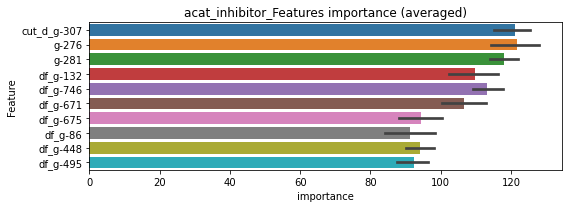

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000342302	valid_1's binary_logloss: 0.00458788


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000340331	valid_1's binary_logloss: 0.0032404


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000336138	valid_1's binary_logloss: 0.00142668


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000357668	valid_1's binary_logloss: 0.00537428


acat_inhibitor logloss: 0.0036579941749365036


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


unpredictable_cols:acetylcholine_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0475735	valid_1's binary_logloss: 0.122186
[600]	training's binary_logloss: 0.0202941	valid_1's binary_logloss: 0.104788
[900]	training's binary_logloss: 0.0120929	valid_1's binary_logloss: 0.100328
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.0104136	valid_1's binary_logloss: 0.0993934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0496816	valid_1's binary_logloss: 0.0999875
[600]	training's binary_logloss: 0.0211445	valid_1's binary_logloss: 0.0772834
[900]	training's binary_logloss: 0.0125067	valid_1's binary_logloss: 0.0701063
[1200]	training's binary_logloss: 0.00870042	valid_1's binary_logloss: 0.0668455
[1500]	training's binary_logloss: 0.00663264	valid_1's binary_logloss: 0.0648182
Early stopping, best iteration is:
[1560]	training's binary_logloss: 0.00632331	valid_1's binary_logloss: 0.0646452
Training unti

1 / 3, AUC score:0.992, PR-AUC:0.980
y_Threshold: 0.0327289, Threshold: 0.0619593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 350 → Positive_corect_labels: 1232/7325
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0619593, conf_0:0.04337, conf_1:0.08055
threshold: 0.0619593, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1232.0/7325, y_label_rate: 0.1681911
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0419198	valid_1's binary_logloss: 0.0884702
[600]	training's binary_logloss: 0.0177476	valid_1's binary_logloss: 0.0688001
[900]	training's binary_logloss: 0.0105638	valid_1's binary_logloss: 0.0633176
[1200]	training's binary_logloss: 0.00738011	valid_1's binary_logloss: 0.0613066
Early stopping, best iteration is:
[1278]	training's binary_logloss: 0.00683855	valid_1's binary_logloss: 0.0608504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0417805	valid_1's binary_logloss: 0.0821081
[600]	training's binary_logloss: 0.0177409	valid_1's binary_logloss: 0.0617251
[900]	training's binary_logloss: 0.0106309	valid_1's binary_logloss: 0.0557125
[1200]	training's binary_logloss: 0.00743472	valid_1's binary_logloss: 0.0530249
[1500]	training's binary_logloss: 0.00568473	valid_1's binary_logloss: 0.0512965
Early stopping, best iteration is:
[1762]	tra

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0519374, Threshold: 0.0619593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1201.0/7263
p_label_rate: 0.0143144 Vs.target_rate: 0.00798
Num_p_label: 57.0, Expected: 31.8, Threshold: 0.0619593, conf_0:0.04957, conf_1:0.07435
Num_p_label: 30.0, Expected: 31.8, Adj_threshold_1: 0.0919593
threshold: 0.0919593, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1201.0/7263, y_label_rate: 0.1653587
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0377344	valid_1's binary_logloss: 0.0752141
[600]	training's binary_logloss: 0.0158718	valid_1's binary_logloss: 0.0548161
[900]	training's binary_logloss: 0.0094708	valid_1's binary_logloss: 0.0486053
[1200]	training's binary_logloss: 0.00663325	valid_1's binary_logloss: 0.0456563
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0052574	valid_1's binary_logloss: 0.0440257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362018	valid_1's binary_logloss: 0.0866867
[600]	training's binary_logloss: 0.0152941	valid_1's binary_logloss: 0.0684799
[900]	training's binary_logloss: 0.00915223	valid_1's binary_logloss: 0.0632323
[1200]	training's binary_logloss: 0.00644519	valid_1's binary_logloss: 0.0609662
[1500]	training's binary_logloss: 0.00494453	valid_1's binary_logloss: 0.059942
Early stopping, best iteration is:
[1500]	trai

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0538946, Threshold: 0.0919593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1178.0/7217
p_label_rate: 0.0065294 Vs.target_rate: 0.00798
Num_p_label: 26.0, Expected: 31.8, Threshold: 0.0919593, conf_0:0.08276, conf_1:0.10116
threshold: 0.0919593, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 1178.0/7217, y_label_rate: 0.1632257


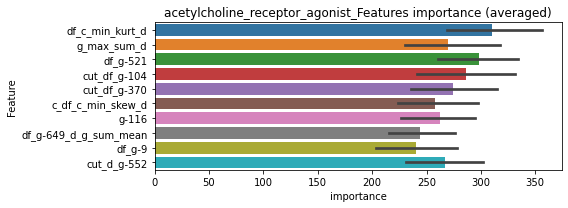

len(train_index) : 5412
len(valid_index) : 1805
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00343804	valid_1's binary_logloss: 0.0349144
Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.00293997	valid_1's binary_logloss: 0.034387


len(train_index) : 5413
len(valid_index) : 1804
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00483664	valid_1's binary_logloss: 0.0461612


len(train_index) : 5413
len(valid_index) : 1804
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00340189	valid_1's binary_logloss: 0.0418988
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.00311973	valid_1's binary_logloss: 0.0414139


len(train_index) : 5413
len(valid_index) : 1804
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00350051	valid_1's binary_logloss: 0.0256882
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.00268598	valid_1's binary_logloss: 0.0244632


acetylcholine_receptor_agonist logloss: 0.03660598678753314
acetylcholine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


unpredictable_cols:acetylcholine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0683797	valid_1's binary_logloss: 0.149436
[600]	training's binary_logloss: 0.0297918	valid_1's binary_logloss: 0.127203
[900]	training's binary_logloss: 0.0174321	valid_1's binary_logloss: 0.121742
[1200]	training's binary_logloss: 0.0118504	valid_1's binary_logloss: 0.119763
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0119672	valid_1's binary_logloss: 0.119562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.06899	valid_1's binary_logloss: 0.146209
[600]	training's binary_logloss: 0.0299139	valid_1's binary_logloss: 0.121874
[900]	training's binary_logloss: 0.0174977	valid_1's binary_logloss: 0.113316
[1200]	training's binary_logloss: 0.0119381	valid_1's binary_logloss: 0.109715
[1500]	training's binary_logloss: 0.00896038	valid_1's binary_logloss: 0.108333
Early stopping, best iteration is:
[1580]	training's binary

1 / 3, AUC score:0.975, PR-AUC:0.956
y_Threshold: 0.0439349, Threshold: 0.0880468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 508 → Positive_corect_labels: 1403/8532
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0880468, conf_0:0.06163, conf_1:0.11446
threshold: 0.0880468, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1403.0/8532, y_label_rate: 0.1644398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0528319	valid_1's binary_logloss: 0.110537
[600]	training's binary_logloss: 0.0224036	valid_1's binary_logloss: 0.0893369
[900]	training's binary_logloss: 0.0130963	valid_1's binary_logloss: 0.0828055
[1200]	training's binary_logloss: 0.00903389	valid_1's binary_logloss: 0.0798259
[1500]	training's binary_logloss: 0.00681556	valid_1's binary_logloss: 0.0788256
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.00599586	valid_1's binary_logloss: 0.078094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0520758	valid_1's binary_logloss: 0.111336
[600]	training's binary_logloss: 0.0222075	valid_1's binary_logloss: 0.0863052
[900]	training's binary_logloss: 0.0130392	valid_1's binary_logloss: 0.0782655
[1200]	training's binary_logloss: 0.00896994	valid_1's binary_logloss: 0.0748277
[1500]	training's binary_logloss: 0.00677186	val

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0578601, Threshold: 0.0880468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1346.0/8418
p_label_rate: 0.0135610 Vs.target_rate: 0.01264
Num_p_label: 54.0, Expected: 50.3, Threshold: 0.0880468, conf_0:0.07044, conf_1:0.10566
threshold: 0.0880468, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 1346.0/8418, y_label_rate: 0.1598955
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0456015	valid_1's binary_logloss: 0.0868209
[600]	training's binary_logloss: 0.0191528	valid_1's binary_logloss: 0.0631534
[900]	training's binary_logloss: 0.0112401	valid_1's binary_logloss: 0.0558891
[1200]	training's binary_logloss: 0.00779606	valid_1's binary_logloss: 0.0529423
Early stopping, best iteration is:
[1446]	training's binary_logloss: 0.00617976	valid_1's binary_logloss: 0.051503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0444731	valid_1's binary_logloss: 0.0998239
[600]	training's binary_logloss: 0.0186116	valid_1's binary_logloss: 0.0768489
[900]	training's binary_logloss: 0.0109312	valid_1's binary_logloss: 0.0698041
[1200]	training's binary_logloss: 0.00756864	valid_1's binary_logloss: 0.0666309
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.00594768	valid_1's binary_logloss: 0.0650658
Training un

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0588950, Threshold: 0.0880468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 1313.0/8352
p_label_rate: 0.0123054 Vs.target_rate: 0.01264
Num_p_label: 49.0, Expected: 50.3, Threshold: 0.0880468, conf_0:0.07924, conf_1:0.09685
threshold: 0.0880468, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1313.0/8352, y_label_rate: 0.1572079


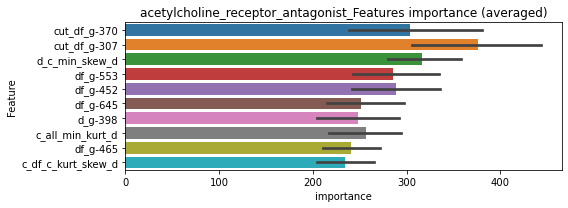

len(train_index) : 6264
len(valid_index) : 2088
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00378152	valid_1's binary_logloss: 0.0422226
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.0035424	valid_1's binary_logloss: 0.0418259


len(train_index) : 6264
len(valid_index) : 2088
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.00475604	valid_1's binary_logloss: 0.0539675


len(train_index) : 6264
len(valid_index) : 2088
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00477687	valid_1's binary_logloss: 0.0446336


len(train_index) : 6264
len(valid_index) : 2088
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00482182	valid_1's binary_logloss: 0.0469105


acetylcholine_receptor_antagonist logloss: 0.04683437777885848
acetylcholine_receptor_antagonist is unpredictable(><)!
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006267	valid_1's binary_logloss: 0.0477566
[600]	training's binary_logloss: 0.000965505	valid_1's binary_logloss: 0.0361633
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000802534	valid_1's binary_logloss: 0.0356154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005854	valid_1's binary_logloss: 0.0396955
[600]	training's binary_logloss: 0.000957037	valid_1's binary_logloss: 0.028437
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000632344	valid_1's binary_logloss: 0.0273823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626521	valid_1's binary_logloss: 0.0298132
[600]	training's binary_logloss: 0.000985228	valid_1's binary_logloss: 0.0196232
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000881848	valid_1's binary_logloss: 0

1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0081205, Threshold: 0.0227711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0227711, conf_0:0.01594, conf_1:0.02960
Num_p_label: 9.0, Expected: 12.2, Adj_threshold_1: 0.0527711
threshold: 0.0527711, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0051731	valid_1's binary_logloss: 0.044367
[600]	training's binary_logloss: 0.000892962	valid_1's binary_logloss: 0.0338656
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000650099	valid_1's binary_logloss: 0.0328178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543479	valid_1's binary_logloss: 0.0265269
[600]	training's binary_logloss: 0.000921543	valid_1's binary_logloss: 0.0164685
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000751217	valid_1's binary_logloss: 0.0159444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529258	valid_1's binary_logloss: 0.0302648
[600]	training's binary_logloss: 0.000900281	valid_1's binary_logloss: 0.0202876
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000641615	valid_1's binary_logloss

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0395643, Threshold: 0.0527711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0102963 Vs.target_rate: 0.00307
Num_p_label: 41.0, Expected: 12.2, Threshold: 0.0527711, conf_0:0.04222, conf_1:0.06333
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.0827711
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_2: 0.1127711
threshold: 0.1127711, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00521833	valid_1's binary_logloss: 0.0364494
[600]	training's binary_logloss: 0.000884415	valid_1's binary_logloss: 0.0245663
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000664784	valid_1's binary_logloss: 0.0235633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486416	valid_1's binary_logloss: 0.0374457
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000968147	valid_1's binary_logloss: 0.0283987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516182	valid_1's binary_logloss: 0.0266127
[600]	training's binary_logloss: 0.000883895	valid_1's binary_logloss: 0.0146621
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000613996	valid_1's binary_logloss: 0.013757
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0328687, Threshold: 0.1127711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.1127711, conf_0:0.10149, conf_1:0.12405
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.1427711
threshold: 0.1427711, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


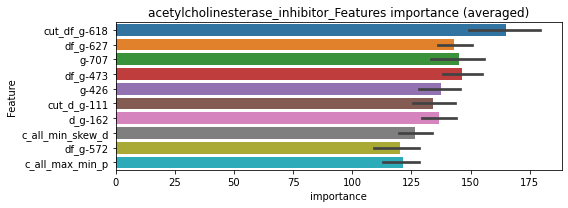

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00117971	valid_1's binary_logloss: 0.0242792
Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00117794	valid_1's binary_logloss: 0.035565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000823967	valid_1's binary_logloss: 0.0141705


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000972771	valid_1's binary_logloss: 0.0219342


acetylcholinesterase_inhibitor logloss: 0.023987282229340278
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308186	valid_1's binary_logloss: 0.020381
[600]	training's binary_logloss: 0.000581646	valid_1's binary_logloss: 0.0140598
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000551363	valid_1's binary_logloss: 0.0139358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291422	valid_1's binary_logloss: 0.0253844
[600]	training's binary_logloss: 0.000572957	valid_1's binary_logloss: 0.0192779
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000530919	valid_1's binary_logloss: 0.0191931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00305472	valid_1's binary_logloss: 0.0117121
[600]	training's binary_logloss: 0.000599476	valid_1's binary_logloss: 0.00670286
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000518675	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041003, Threshold: 0.0152208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0152208, conf_0:0.01065, conf_1:0.01979
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0452208
threshold: 0.0452208, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298168	valid_1's binary_logloss: 0.0171053
[600]	training's binary_logloss: 0.0005734	valid_1's binary_logloss: 0.0111261
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00048887	valid_1's binary_logloss: 0.0108648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282275	valid_1's binary_logloss: 0.0235289
[600]	training's binary_logloss: 0.000563815	valid_1's binary_logloss: 0.017873
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000548434	valid_1's binary_logloss: 0.017768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288443	valid_1's binary_logloss: 0.00953347
[600]	training's binary_logloss: 0.000576165	valid_1's binary_logloss: 0.00484236
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000500546	valid_1's binary_logloss:

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230523, Threshold: 0.0452208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0452208, conf_0:0.03618, conf_1:0.05426
threshold: 0.0452208, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298168	valid_1's binary_logloss: 0.0171053
[600]	training's binary_logloss: 0.0005734	valid_1's binary_logloss: 0.0111261
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00048887	valid_1's binary_logloss: 0.0108648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282275	valid_1's binary_logloss: 0.0235289
[600]	training's binary_logloss: 0.000563815	valid_1's binary_logloss: 0.017873
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000548434	valid_1's binary_logloss: 0.017768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288443	valid_1's binary_logloss: 0.00953347
[600]	training's binary_logloss: 0.000576165	valid_1's binary_logloss: 0.00484236
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000500546	valid_1's binary_logloss:

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230523, Threshold: 0.0452208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0452208, conf_0:0.04070, conf_1:0.04974
threshold: 0.0452208, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


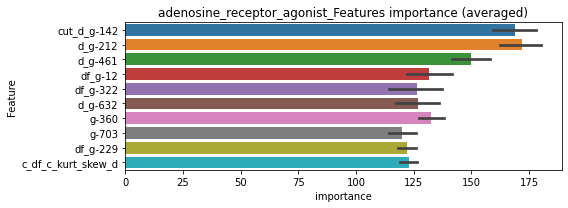

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480583	valid_1's binary_logloss: 0.0109372
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000476815	valid_1's binary_logloss: 0.0109208


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00056246	valid_1's binary_logloss: 0.0174349


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000509455	valid_1's binary_logloss: 0.00385056


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000510248	valid_1's binary_logloss: 0.00801319


adenosine_receptor_agonist logloss: 0.010057021034635197
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


unpredictable_cols:adenosine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454	valid_1's binary_logloss: 0.112056
[600]	training's binary_logloss: 0.0196359	valid_1's binary_logloss: 0.0860597
[900]	training's binary_logloss: 0.0120647	valid_1's binary_logloss: 0.0782843
[1200]	training's binary_logloss: 0.00861216	valid_1's binary_logloss: 0.0748568
[1500]	training's binary_logloss: 0.00666029	valid_1's binary_logloss: 0.0724899
[1800]	training's binary_logloss: 0.00544076	valid_1's binary_logloss: 0.0713373
Early stopping, best iteration is:
[1987]	training's binary_logloss: 0.00488562	valid_1's binary_logloss: 0.070698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0479464	valid_1's binary_logloss: 0.0932843
[600]	training's binary_logloss: 0.0207719	valid_1's binary_logloss: 0.0625436
[900]	training's binary_logloss: 0.0126493	valid_1's binary_logloss: 0.0516618
[1200]	training's binary_logloss: 0.00899095	vali

1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0246698, Threshold: 0.0757930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0757930, conf_0:0.05306, conf_1:0.09853
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_1: 0.1057930
threshold: 0.1057930, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0438116	valid_1's binary_logloss: 0.10001
[600]	training's binary_logloss: 0.0189531	valid_1's binary_logloss: 0.0703254
[900]	training's binary_logloss: 0.0115611	valid_1's binary_logloss: 0.060635
[1200]	training's binary_logloss: 0.00825193	valid_1's binary_logloss: 0.0555655
[1500]	training's binary_logloss: 0.00640146	valid_1's binary_logloss: 0.0526252
[1800]	training's binary_logloss: 0.00522752	valid_1's binary_logloss: 0.0507756
Early stopping, best iteration is:
[2014]	training's binary_logloss: 0.00463116	valid_1's binary_logloss: 0.0495533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434495	valid_1's binary_logloss: 0.102637
[600]	training's binary_logloss: 0.0185609	valid_1's binary_logloss: 0.0768753
[900]	training's binary_logloss: 0.0113624	valid_1's binary_logloss: 0.0685253
[1200]	training's binary_logloss: 0.00807099	vali

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0561061, Threshold: 0.1057930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 631.0/3748
p_label_rate: 0.0110497 Vs.target_rate: 0.00403
Num_p_label: 44.0, Expected: 16.1, Threshold: 0.1057930, conf_0:0.08463, conf_1:0.12695
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_1: 0.1357930
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_2: 0.1657930
threshold: 0.1657930, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 631.0/3748, y_label_rate: 0.1683565
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0410652	valid_1's binary_logloss: 0.0924287
[600]	training's binary_logloss: 0.0176061	valid_1's binary_logloss: 0.064146
[900]	training's binary_logloss: 0.0108108	valid_1's binary_logloss: 0.054691
[1200]	training's binary_logloss: 0.00771638	valid_1's binary_logloss: 0.0499931
[1500]	training's binary_logloss: 0.00598105	valid_1's binary_logloss: 0.0467065
[1800]	training's binary_logloss: 0.0048895	valid_1's binary_logloss: 0.0447595
[2100]	training's binary_logloss: 0.00414571	valid_1's binary_logloss: 0.0433292
[2400]	training's binary_logloss: 0.0036049	valid_1's binary_logloss: 0.0421031
[2700]	training's binary_logloss: 0.0031927	valid_1's binary_logloss: 0.0409241
[3000]	training's binary_logloss: 0.00287032	valid_1's binary_logloss: 0.0401295
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.00281214	valid_1's binary_logloss: 0.0399711
Training until validatio

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0554967, Threshold: 0.1657930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 624.0/3734
p_label_rate: 0.0042692 Vs.target_rate: 0.00403
Num_p_label: 17.0, Expected: 16.1, Threshold: 0.1657930, conf_0:0.14921, conf_1:0.18237
threshold: 0.1657930, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 624.0/3734, y_label_rate: 0.1671130


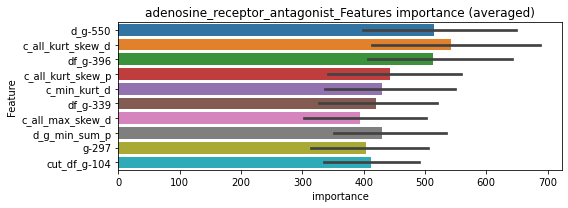

len(train_index) : 2800
len(valid_index) : 934
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00427893	valid_1's binary_logloss: 0.040594
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.00385153	valid_1's binary_logloss: 0.0398042


len(train_index) : 2800
len(valid_index) : 934
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00422718	valid_1's binary_logloss: 0.055205
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.00391209	valid_1's binary_logloss: 0.0548595


len(train_index) : 2801
len(valid_index) : 933
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00430658	valid_1's binary_logloss: 0.0395579
Early stopping, best iteration is:
[1298]	training's binary_logloss: 0.00328626	valid_1's binary_logloss: 0.0379031


len(train_index) : 2801
len(valid_index) : 933
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00430594	valid_1's binary_logloss: 0.0383643
[2000]	training's binary_logloss: 0.00214037	valid_1's binary_logloss: 0.0339442
Early stopping, best iteration is:
[2332]	training's binary_logloss: 0.00185163	valid_1's binary_logloss: 0.0330391


adenosine_receptor_antagonist logloss: 0.04140465535915563
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000962575	valid_1's binary_logloss: 0.00185486
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000303512	valid_1's binary_logloss: 0.000692504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000928521	valid_1's binary_logloss: 0.00326292
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000304886	valid_1's binary_logloss: 0.00183673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0009437	valid_1's binary_logloss: 0.00179325
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00030606	valid_1's binary_logloss: 0.000721007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000950818	valid_1's binary_logloss: 0.00345452


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015331, Threshold: 0.0082261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0082261, conf_0:0.00576, conf_1:0.01069
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0382261
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0682261


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000299265	valid_1's binary_logloss: 0.00210429


threshold: 0.0682261, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000869441	valid_1's binary_logloss: 0.00154831
[600]	training's binary_logloss: 0.000279894	valid_1's binary_logloss: 0.00058148
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279894	valid_1's binary_logloss: 0.00058148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843315	valid_1's binary_logloss: 0.00329203
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000293317	valid_1's binary_logloss: 0.00182699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085789	valid_1's binary_logloss: 0.00134985
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000286436	valid_1's binary_logloss: 0.000527107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000845799	valid_1's binary_logloss: 0.0023

2 / 3, AUC score:1.000, PR-AUC:1.000


[600]	training's binary_logloss: 0.000279529	valid_1's binary_logloss: 0.00130934
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000279865	valid_1's binary_logloss: 0.0013072


y_Threshold: 0.1086487, Threshold: 0.0682261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0143144 Vs.target_rate: 0.00076
Num_p_label: 57.0, Expected: 3.0, Threshold: 0.0682261, conf_0:0.05458, conf_1:0.08187
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_1: 0.0982261
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1282261
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_3: 0.1582261
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.1882261
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.2182261
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.2482261
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2782261
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3082261
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3382261
threshold: 0.3382261, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000869441	valid_1's binary_logloss: 0.00154831
[600]	training's binary_logloss: 0.000279894	valid_1's binary_logloss: 0.00058148
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279894	valid_1's binary_logloss: 0.00058148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843315	valid_1's binary_logloss: 0.00329203
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000293317	valid_1's binary_logloss: 0.00182699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085789	valid_1's binary_logloss: 0.00134985
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000286436	valid_1's binary_logloss: 0.000527107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000845799	valid_1's binary_logloss: 0.0023

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1086487, Threshold: 0.3382261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


[600]	training's binary_logloss: 0.000279529	valid_1's binary_logloss: 0.00130934
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000279865	valid_1's binary_logloss: 0.0013072


p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3382261, conf_0:0.30440, conf_1:0.37205
threshold: 0.3382261, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


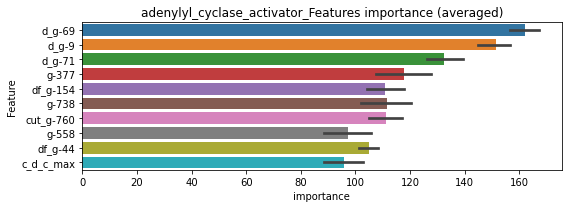

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282018	valid_1's binary_logloss: 0.000538509
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000282018	valid_1's binary_logloss: 0.000538509


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000287023	valid_1's binary_logloss: 0.00143032


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282361	valid_1's binary_logloss: 0.000594876
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000282361	valid_1's binary_logloss: 0.000594876


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000279406	valid_1's binary_logloss: 0.00121435


adenylyl_cyclase_activator logloss: 0.0009446874075168273


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


unpredictable_cols:adrenergic_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.06867	valid_1's binary_logloss: 0.138189
[600]	training's binary_logloss: 0.0295481	valid_1's binary_logloss: 0.107511
[900]	training's binary_logloss: 0.017331	valid_1's binary_logloss: 0.0976108
[1200]	training's binary_logloss: 0.0119006	valid_1's binary_logloss: 0.0932722
Early stopping, best iteration is:
[1464]	training's binary_logloss: 0.00921232	valid_1's binary_logloss: 0.090748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0689865	valid_1's binary_logloss: 0.142641
[600]	training's binary_logloss: 0.0298505	valid_1's binary_logloss: 0.112081
[900]	training's binary_logloss: 0.0174535	valid_1's binary_logloss: 0.103054
[1200]	training's binary_logloss: 0.0120136	valid_1's binary_logloss: 0.0998985
Early stopping, best iteration is:
[1292]	training's binary_logloss: 0.0109265	valid_1's binary_logloss: 0.0987878
Training until valida

1 / 3, AUC score:0.984, PR-AUC:0.968
y_Threshold: 0.0460550, Threshold: 0.0962448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 431 → Positive_corect_labels: 1314/7912
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0962448, conf_0:0.06737, conf_1:0.12512
threshold: 0.0962448, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1314.0/7912, y_label_rate: 0.1660768
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0561369	valid_1's binary_logloss: 0.117948
[600]	training's binary_logloss: 0.0235384	valid_1's binary_logloss: 0.0889021
[900]	training's binary_logloss: 0.0138339	valid_1's binary_logloss: 0.0798301
[1200]	training's binary_logloss: 0.00956066	valid_1's binary_logloss: 0.0749648
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.00955157	valid_1's binary_logloss: 0.074933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0556366	valid_1's binary_logloss: 0.121944
[600]	training's binary_logloss: 0.0235099	valid_1's binary_logloss: 0.0945463
[900]	training's binary_logloss: 0.0138174	valid_1's binary_logloss: 0.0861732
[1200]	training's binary_logloss: 0.00957484	valid_1's binary_logloss: 0.0821728
[1500]	training's binary_logloss: 0.00725376	valid_1's binary_logloss: 0.080031
Early stopping, best iteration is:
[1543]	trainin

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0728259, Threshold: 0.0962448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1256.0/7796
p_label_rate: 0.0188348 Vs.target_rate: 0.01134
Num_p_label: 75.0, Expected: 45.1, Threshold: 0.0962448, conf_0:0.07700, conf_1:0.11549
Num_p_label: 42.0, Expected: 45.1, Adj_threshold_1: 0.1262448
threshold: 0.1262448, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1256.0/7796, y_label_rate: 0.1611083
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0485532	valid_1's binary_logloss: 0.0992012
[600]	training's binary_logloss: 0.0202781	valid_1's binary_logloss: 0.0730684
[900]	training's binary_logloss: 0.0120055	valid_1's binary_logloss: 0.0643585
[1200]	training's binary_logloss: 0.00832296	valid_1's binary_logloss: 0.0599984
[1500]	training's binary_logloss: 0.00633844	valid_1's binary_logloss: 0.0579277
Early stopping, best iteration is:
[1483]	training's binary_logloss: 0.00642925	valid_1's binary_logloss: 0.0579079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0485858	valid_1's binary_logloss: 0.1074
[600]	training's binary_logloss: 0.0202694	valid_1's binary_logloss: 0.0813786
[900]	training's binary_logloss: 0.011939	valid_1's binary_logloss: 0.0727423
[1200]	training's binary_logloss: 0.00828685	valid_1's binary_logloss: 0.0686069
[1500]	training's binary_logloss: 0.00630339	vali

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0745195, Threshold: 0.1262448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1219.0/7722
p_label_rate: 0.0158212 Vs.target_rate: 0.01134
Num_p_label: 63.0, Expected: 45.1, Threshold: 0.1262448, conf_0:0.11362, conf_1:0.13887
threshold: 0.1262448, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1219.0/7722, y_label_rate: 0.1578607


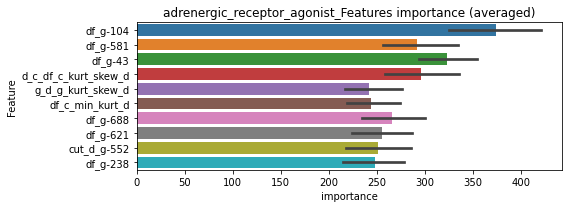

len(train_index) : 5791
len(valid_index) : 1931
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0041098	valid_1's binary_logloss: 0.0454663
Early stopping, best iteration is:
[1334]	training's binary_logloss: 0.00296682	valid_1's binary_logloss: 0.0434172


len(train_index) : 5791
len(valid_index) : 1931
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00411698	valid_1's binary_logloss: 0.0441268
Early stopping, best iteration is:
[1669]	training's binary_logloss: 0.00235624	valid_1's binary_logloss: 0.0411171


len(train_index) : 5792
len(valid_index) : 1930
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.004161	valid_1's binary_logloss: 0.0527222
Early stopping, best iteration is:
[1256]	training's binary_logloss: 0.00321815	valid_1's binary_logloss: 0.0511966


len(train_index) : 5792
len(valid_index) : 1930
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00422845	valid_1's binary_logloss: 0.0367867
Early stopping, best iteration is:
[1367]	training's binary_logloss: 0.00297943	valid_1's binary_logloss: 0.0350062


adrenergic_receptor_agonist logloss: 0.042684170221738725
adrenergic_receptor_agonist is unpredictable(><)!


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 7013
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 7013


unpredictable_cols:adrenergic_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0808072	valid_1's binary_logloss: 0.174705
[600]	training's binary_logloss: 0.0374977	valid_1's binary_logloss: 0.153597
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.025877	valid_1's binary_logloss: 0.149582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0805759	valid_1's binary_logloss: 0.179515
[600]	training's binary_logloss: 0.03696	valid_1's binary_logloss: 0.158614
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.0267876	valid_1's binary_logloss: 0.154934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0798577	valid_1's binary_logloss: 0.181286
[600]	training's binary_logloss: 0.0370325	valid_1's binary_logloss: 0.164056
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0312053	valid_1's binary_logloss: 0.162238
Training unt

1 / 3, AUC score:0.957, PR-AUC:0.919
y_Threshold: 0.0688624, Threshold: 0.1266460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 621 → Positive_corect_labels: 1232/7794
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.1266460, conf_0:0.08865, conf_1:0.16464
threshold: 0.1266460, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1232.0/7794, y_label_rate: 0.1580703
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0525867	valid_1's binary_logloss: 0.116831
[600]	training's binary_logloss: 0.0227766	valid_1's binary_logloss: 0.0970269
[900]	training's binary_logloss: 0.0134881	valid_1's binary_logloss: 0.0920358
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.0102548	valid_1's binary_logloss: 0.0904955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0537798	valid_1's binary_logloss: 0.106964
[600]	training's binary_logloss: 0.023504	valid_1's binary_logloss: 0.0845739
[900]	training's binary_logloss: 0.0139722	valid_1's binary_logloss: 0.0780596
[1200]	training's binary_logloss: 0.009713	valid_1's binary_logloss: 0.075276
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.00757276	valid_1's binary_logloss: 0.07395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0524

2 / 3, AUC score:0.993, PR-AUC:0.980
y_Threshold: 0.0726356, Threshold: 0.1266460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 1151.0/7632
p_label_rate: 0.0158212 Vs.target_rate: 0.01512
Num_p_label: 63.0, Expected: 60.2, Threshold: 0.1266460, conf_0:0.10132, conf_1:0.15198
threshold: 0.1266460, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1151.0/7632, y_label_rate: 0.1508124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0422872	valid_1's binary_logloss: 0.083191
[600]	training's binary_logloss: 0.0182121	valid_1's binary_logloss: 0.0633754
[900]	training's binary_logloss: 0.0108488	valid_1's binary_logloss: 0.0578585
[1200]	training's binary_logloss: 0.00757993	valid_1's binary_logloss: 0.0551964
Early stopping, best iteration is:
[1380]	training's binary_logloss: 0.00638695	valid_1's binary_logloss: 0.0542983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0422303	valid_1's binary_logloss: 0.0931825
[600]	training's binary_logloss: 0.0176036	valid_1's binary_logloss: 0.0720993
[900]	training's binary_logloss: 0.0105464	valid_1's binary_logloss: 0.0665033
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.00802596	valid_1's binary_logloss: 0.0644377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss

3 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0668515, Threshold: 0.1266460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 1111.0/7552
p_label_rate: 0.0205927 Vs.target_rate: 0.01512
Num_p_label: 82.0, Expected: 60.2, Threshold: 0.1266460, conf_0:0.11398, conf_1:0.13931
threshold: 0.1266460, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 1111.0/7552, y_label_rate: 0.1471133


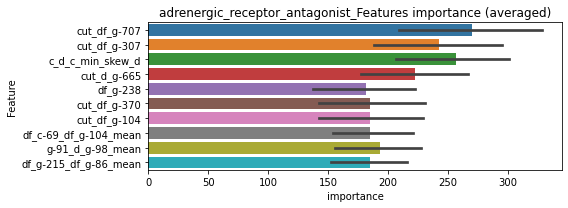

len(train_index) : 5664
len(valid_index) : 1888
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00354929	valid_1's binary_logloss: 0.0377448
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.0035122	valid_1's binary_logloss: 0.0376668


len(train_index) : 5664
len(valid_index) : 1888
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.00401828	valid_1's binary_logloss: 0.0399646


len(train_index) : 5664
len(valid_index) : 1888
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00356332	valid_1's binary_logloss: 0.0366926
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.00273982	valid_1's binary_logloss: 0.0354809


len(train_index) : 5664
len(valid_index) : 1888
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00399606	valid_1's binary_logloss: 0.0466211


adrenergic_receptor_antagonist logloss: 0.03993334431086837
adrenergic_receptor_antagonist is unpredictable(><)!
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004255	valid_1's binary_logloss: 0.0282604
[600]	training's binary_logloss: 0.000766584	valid_1's binary_logloss: 0.0192256
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000557454	valid_1's binary_logloss: 0.018283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462851	valid_1's binary_logloss: 0.0283722
[600]	training's binary_logloss: 0.000791719	valid_1's binary_logloss: 0.0190964
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000588862	valid_1's binary_logloss: 0.0182507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458156	valid_1's binary_logloss: 0.0257538
[600]	training's binary_logloss: 0.000796086	valid_1's binary_logloss: 0.0173692
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000637579	valid_1's binary_logloss:

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057400, Threshold: 0.0198945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0198945, conf_0:0.01393, conf_1:0.02586
Num_p_label: 24.0, Expected: 11.0, Adj_threshold_1: 0.0498945
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0798945
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1098945
threshold: 0.1098945, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401479	valid_1's binary_logloss: 0.0212838
[600]	training's binary_logloss: 0.000733127	valid_1's binary_logloss: 0.0115405
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00056836	valid_1's binary_logloss: 0.0108278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425736	valid_1's binary_logloss: 0.0272367
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000916401	valid_1's binary_logloss: 0.0196821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039366	valid_1's binary_logloss: 0.0240271
[600]	training's binary_logloss: 0.00074449	valid_1's binary_logloss: 0.0165935
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000581218	valid_1's binary_logloss: 0.016024
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276912, Threshold: 0.1098945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1098945, conf_0:0.08792, conf_1:0.13187
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1398945
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1698945
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_3: 0.1998945
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_4: 0.2298945
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2598945
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_6: 0.2898945
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_7: 0.3198945
threshold: 0.3198945, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410219	valid_1's binary_logloss: 0.0177921
[600]	training's binary_logloss: 0.000746387	valid_1's binary_logloss: 0.00852929
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000566037	valid_1's binary_logloss: 0.00770926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405639	valid_1's binary_logloss: 0.0241099
[600]	training's binary_logloss: 0.000745344	valid_1's binary_logloss: 0.0155207
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.00055526	valid_1's binary_logloss: 0.014743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409212	valid_1's binary_logloss: 0.0167105
[600]	training's binary_logloss: 0.000753963	valid_1's binary_logloss: 0.00864851
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000571293	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372610, Threshold: 0.3198945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3198945, conf_0:0.28791, conf_1:0.35188
threshold: 0.3198945, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


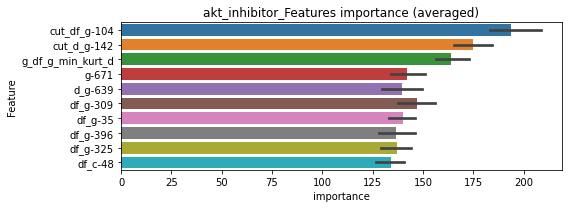

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000587	valid_1's binary_logloss: 0.00810689


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000662558	valid_1's binary_logloss: 0.019234


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575074	valid_1's binary_logloss: 0.00744024
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000569112	valid_1's binary_logloss: 0.00741953


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000690765	valid_1's binary_logloss: 0.0177097


akt_inhibitor logloss: 0.013118990728374436
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104411	valid_1's binary_logloss: 0.0024848
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000302339	valid_1's binary_logloss: 0.00111015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103602	valid_1's binary_logloss: 0.00379754
[600]	training's binary_logloss: 0.000295769	valid_1's binary_logloss: 0.0017495
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000295811	valid_1's binary_logloss: 0.00174932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105478	valid_1's binary_logloss: 0.00206627
[600]	training's binary_logloss: 0.000303323	valid_1's binary_logloss: 0.000762596
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000303323	valid_1's binary_logloss: 0.000762596
Training until validation scores don't improve for 30 round

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015941, Threshold: 0.0070393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0070393, conf_0:0.00493, conf_1:0.00915
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_1: 0.0370393
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_2: 0.0670393
threshold: 0.0670393, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000965775	valid_1's binary_logloss: 0.00220044
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00029494	valid_1's binary_logloss: 0.000955578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00095565	valid_1's binary_logloss: 0.00381539
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00029428	valid_1's binary_logloss: 0.00192296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000985974	valid_1's binary_logloss: 0.00177845
[600]	training's binary_logloss: 0.000290355	valid_1's binary_logloss: 0.000649038
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000290355	valid_1's binary_logloss: 0.000649038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974161	valid_1's binary_logloss: 0.0019

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244074, Threshold: 0.0670393, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000288743	valid_1's binary_logloss: 0.000814882
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288743	valid_1's binary_logloss: 0.000814882


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00080
Num_p_label: 15.0, Expected: 3.2, Threshold: 0.0670393, conf_0:0.05363, conf_1:0.08045
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_1: 0.0970393
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.1270393
threshold: 0.1270393, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000965775	valid_1's binary_logloss: 0.00220044
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00029494	valid_1's binary_logloss: 0.000955578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00095565	valid_1's binary_logloss: 0.00381539
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00029428	valid_1's binary_logloss: 0.00192296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000985974	valid_1's binary_logloss: 0.00177845
[600]	training's binary_logloss: 0.000290355	valid_1's binary_logloss: 0.000649038
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000290355	valid_1's binary_logloss: 0.000649038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974161	valid_1's binary_logloss: 0.0019

3 / 3, AUC score:1.000, PR-AUC:1.000


[600]	training's binary_logloss: 0.000288743	valid_1's binary_logloss: 0.000814882
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288743	valid_1's binary_logloss: 0.000814882


y_Threshold: 0.1244074, Threshold: 0.1270393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.1270393, conf_0:0.11434, conf_1:0.13974
threshold: 0.1270393, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


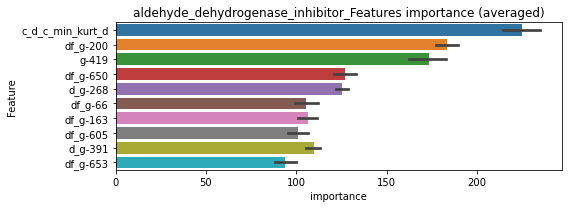

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291424	valid_1's binary_logloss: 0.000773429
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000291424	valid_1's binary_logloss: 0.000773429


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000287275	valid_1's binary_logloss: 0.00136588
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000286068	valid_1's binary_logloss: 0.00136089


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291049	valid_1's binary_logloss: 0.000662736
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000290911	valid_1's binary_logloss: 0.000662202


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000295033	valid_1's binary_logloss: 0.000863833


aldehyde_dehydrogenase_inhibitor logloss: 0.0009151829048629577
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250443	valid_1's binary_logloss: 0.0171923
[600]	training's binary_logloss: 0.000514323	valid_1's binary_logloss: 0.0107381
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000493791	valid_1's binary_logloss: 0.0106451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239741	valid_1's binary_logloss: 0.0159936
[600]	training's binary_logloss: 0.000499592	valid_1's binary_logloss: 0.0106075
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000479189	valid_1's binary_logloss: 0.0105794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025922	valid_1's binary_logloss: 0.00784437
[600]	training's binary_logloss: 0.000530777	valid_1's binary_logloss: 0.00338266
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000479791	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034603, Threshold: 0.0159370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0159370, conf_0:0.01116, conf_1:0.02072
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_1: 0.0459370
threshold: 0.0459370, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228144	valid_1's binary_logloss: 0.0181013
[600]	training's binary_logloss: 0.000486543	valid_1's binary_logloss: 0.0124109
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000465379	valid_1's binary_logloss: 0.0123188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227932	valid_1's binary_logloss: 0.0158948
[600]	training's binary_logloss: 0.000488038	valid_1's binary_logloss: 0.0107402
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000458319	valid_1's binary_logloss: 0.010643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242458	valid_1's binary_logloss: 0.00688031
[600]	training's binary_logloss: 0.000503835	valid_1's binary_logloss: 0.00301284
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000465038	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0272201, Threshold: 0.0459370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0459370, conf_0:0.03675, conf_1:0.05512
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0759370
threshold: 0.0759370, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228144	valid_1's binary_logloss: 0.0181013
[600]	training's binary_logloss: 0.000486543	valid_1's binary_logloss: 0.0124109
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000465379	valid_1's binary_logloss: 0.0123188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227932	valid_1's binary_logloss: 0.0158948
[600]	training's binary_logloss: 0.000488038	valid_1's binary_logloss: 0.0107402
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000458319	valid_1's binary_logloss: 0.010643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242458	valid_1's binary_logloss: 0.00688031
[600]	training's binary_logloss: 0.000503835	valid_1's binary_logloss: 0.00301284
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000465038	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0272201, Threshold: 0.0759370, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00176
Num_p_label: 17.0, Expected: 7.0, Threshold: 0.0759370, conf_0:0.06834, conf_1:0.08353
threshold: 0.0759370, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


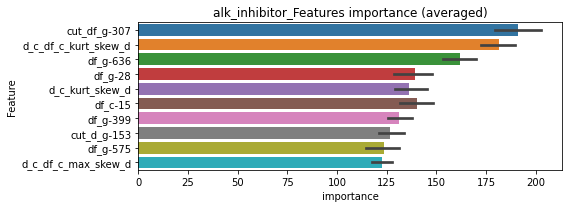

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000467914	valid_1's binary_logloss: 0.0113072


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000510484	valid_1's binary_logloss: 0.00948977


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000484365	valid_1's binary_logloss: 0.00290792


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000481005	valid_1's binary_logloss: 0.00579713


alk_inhibitor logloss: 0.007377103167987629
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563812	valid_1's binary_logloss: 0.00243683
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000232236	valid_1's binary_logloss: 0.00153518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000573859	valid_1's binary_logloss: 0.00270202
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.0002354	valid_1's binary_logloss: 0.00199429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059051	valid_1's binary_logloss: 0.000878924
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000241167	valid_1's binary_logloss: 0.000403341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577749	valid_1's binary_logloss: 0.00156054


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009433, Threshold: 0.0043009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0043009, conf_0:0.00301, conf_1:0.00559
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0343009


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000233479	valid_1's binary_logloss: 0.0008482


threshold: 0.0343009, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000522945	valid_1's binary_logloss: 0.00174276
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000228924	valid_1's binary_logloss: 0.00119516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000524314	valid_1's binary_logloss: 0.00347182
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000225077	valid_1's binary_logloss: 0.00287681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000527107	valid_1's binary_logloss: 0.00066639
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000225933	valid_1's binary_logloss: 0.000298532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526014	valid_1's binary_logloss: 0.00133758


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0299895, Threshold: 0.0343009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00050
Num_p_label: 18.0, Expected: 2.0, Threshold: 0.0343009, conf_0:0.02744, conf_1:0.04116
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.0643009
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0943009
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_3: 0.1243009


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000225854	valid_1's binary_logloss: 0.000771799


threshold: 0.1243009, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000522945	valid_1's binary_logloss: 0.00174276
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000228924	valid_1's binary_logloss: 0.00119516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000524314	valid_1's binary_logloss: 0.00347182
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000225077	valid_1's binary_logloss: 0.00287681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000527107	valid_1's binary_logloss: 0.00066639
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000225933	valid_1's binary_logloss: 0.000298532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526014	valid_1's binary_logloss: 0.00133758


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0299895, Threshold: 0.1243009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.1243009, conf_0:0.11187, conf_1:0.13673
threshold: 0.1243009, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000225854	valid_1's binary_logloss: 0.000771799


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


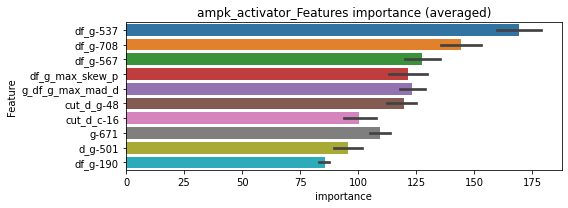

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000224716	valid_1's binary_logloss: 0.000655495


================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000223471	valid_1's binary_logloss: 0.00268571


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000229043	valid_1's binary_logloss: 0.00035301
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010727208467655397


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000223774	valid_1's binary_logloss: 0.000594187


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638675	valid_1's binary_logloss: 0.00183977
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000249168	valid_1's binary_logloss: 0.000941622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00063415	valid_1's binary_logloss: 0.00123177
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000244429	valid_1's binary_logloss: 0.000575471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650345	valid_1's binary_logloss: 0.000810437
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000253112	valid_1's binary_logloss: 0.000336477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626127	valid_1's binary_logloss: 0.00113471


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010717, Threshold: 0.0193631, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0193631, conf_0:0.01355, conf_1:0.02517
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.0493631
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0793631
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.1093631
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.1393631
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.1693631
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1993631
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.2293631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.2593631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2893631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.3193631


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000251055	valid_1's binary_logloss: 0.00051414


threshold: 0.3193631, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571715	valid_1's binary_logloss: 0.00108273
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000235638	valid_1's binary_logloss: 0.000535491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0005718	valid_1's binary_logloss: 0.0016345
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00023997	valid_1's binary_logloss: 0.000952243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583538	valid_1's binary_logloss: 0.000703591
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000240608	valid_1's binary_logloss: 0.000301782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570893	valid_1's binary_logloss: 0.000861544


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1204595, Threshold: 0.3193631, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050
Num_p_label: 10.0, Expected: 2.0, Threshold: 0.3193631, conf_0:0.25549, conf_1:0.38324
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.3493631
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.3793631
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4093631
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.4393631


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000239252	valid_1's binary_logloss: 0.000390082


threshold: 0.4393631, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571715	valid_1's binary_logloss: 0.00108273
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000235638	valid_1's binary_logloss: 0.000535491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0005718	valid_1's binary_logloss: 0.0016345
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00023997	valid_1's binary_logloss: 0.000952243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583538	valid_1's binary_logloss: 0.000703591
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000240608	valid_1's binary_logloss: 0.000301782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570893	valid_1's binary_logloss: 0.000861544


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1204595, Threshold: 0.4393631, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4393631, conf_0:0.39543, conf_1:0.48330
threshold: 0.4393631, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000239252	valid_1's binary_logloss: 0.000390082


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


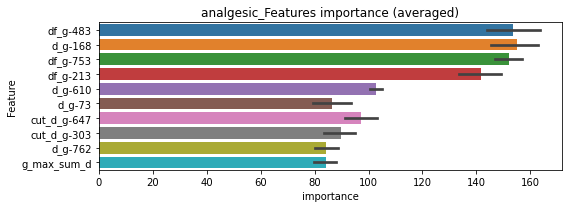

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000239981	valid_1's binary_logloss: 0.00042893
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00024019	valid_1's binary_logloss: 0.000482462
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00024361	valid_1's binary_logloss: 0.000326188
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.00040264891788825284


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000241299	valid_1's binary_logloss: 0.000372988


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00303244	valid_1's binary_logloss: 0.025681
[600]	training's binary_logloss: 0.000581486	valid_1's binary_logloss: 0.0175856
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000540437	valid_1's binary_logloss: 0.0174248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310151	valid_1's binary_logloss: 0.0211169
[600]	training's binary_logloss: 0.000583195	valid_1's binary_logloss: 0.0144498
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000501617	valid_1's binary_logloss: 0.0140948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345275	valid_1's binary_logloss: 0.00741972
[600]	training's binary_logloss: 0.000618634	valid_1's binary_logloss: 0.00218036
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000518463	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0046310, Threshold: 0.0104232, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00103775	valid_1's binary_logloss: 0.0179797


Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0104232, conf_0:0.00730, conf_1:0.01355
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0404232
threshold: 0.0404232, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288197	valid_1's binary_logloss: 0.0224802
[600]	training's binary_logloss: 0.000568443	valid_1's binary_logloss: 0.0150286
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00048902	valid_1's binary_logloss: 0.0148445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289993	valid_1's binary_logloss: 0.0132916
[600]	training's binary_logloss: 0.000569085	valid_1's binary_logloss: 0.00689996
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000483822	valid_1's binary_logloss: 0.00657293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029344	valid_1's binary_logloss: 0.0141908
[600]	training's binary_logloss: 0.000575065	valid_1's binary_logloss: 0.00835949
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000491071	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248621, Threshold: 0.0404232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0404232, conf_0:0.03234, conf_1:0.04851
threshold: 0.0404232, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002837	valid_1's binary_logloss: 0.0249973
[600]	training's binary_logloss: 0.000552207	valid_1's binary_logloss: 0.0185838
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000513044	valid_1's binary_logloss: 0.0184125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027537	valid_1's binary_logloss: 0.0177395
[600]	training's binary_logloss: 0.000553218	valid_1's binary_logloss: 0.0109523
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00049907	valid_1's binary_logloss: 0.0107092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286969	valid_1's binary_logloss: 0.0116689
[600]	training's binary_logloss: 0.000561891	valid_1's binary_logloss: 0.00567415
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000483327	valid_1's binary_logloss:

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0165144, Threshold: 0.0404232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0404232, conf_0:0.03638, conf_1:0.04447
threshold: 0.0404232, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


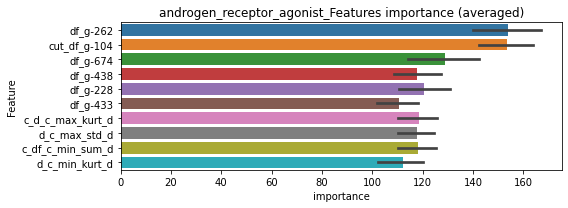

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000519219	valid_1's binary_logloss: 0.00964187


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00104356	valid_1's binary_logloss: 0.0170634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000530349	valid_1's binary_logloss: 0.00507767


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000635336	valid_1's binary_logloss: 0.0119081


androgen_receptor_agonist logloss: 0.01092242900650283
androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653766	valid_1's binary_logloss: 0.0632688
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00170282	valid_1's binary_logloss: 0.0576413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644571	valid_1's binary_logloss: 0.0505227
[600]	training's binary_logloss: 0.00107899	valid_1's binary_logloss: 0.0382459
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000849109	valid_1's binary_logloss: 0.0375295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676504	valid_1's binary_logloss: 0.0379401
[600]	training's binary_logloss: 0.00110459	valid_1's binary_logloss: 0.0261197
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000754383	valid_1's binary_logloss: 0.0250493
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0083532, Threshold: 0.0356627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0356627, conf_0:0.02496, conf_1:0.04636
Num_p_label: 16.0, Expected: 14.9, Adj_threshold_1: 0.0656627
threshold: 0.0656627, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608816	valid_1's binary_logloss: 0.0596298
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00142601	valid_1's binary_logloss: 0.0512026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00581047	valid_1's binary_logloss: 0.0586393
[600]	training's binary_logloss: 0.00102285	valid_1's binary_logloss: 0.0492223
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000981913	valid_1's binary_logloss: 0.049185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591741	valid_1's binary_logloss: 0.0447893
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00121764	valid_1's binary_logloss: 0.0376958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00627912	valid_1's binary_logloss: 0.0435096
[600]	train

2 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0277911, Threshold: 0.0656627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0102963 Vs.target_rate: 0.00374
Num_p_label: 41.0, Expected: 14.9, Threshold: 0.0656627, conf_0:0.05253, conf_1:0.07880
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_1: 0.0956627
threshold: 0.0956627, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526564	valid_1's binary_logloss: 0.0460269
[600]	training's binary_logloss: 0.000951663	valid_1's binary_logloss: 0.0363196
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000962551	valid_1's binary_logloss: 0.036257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560062	valid_1's binary_logloss: 0.0397588
[600]	training's binary_logloss: 0.000976144	valid_1's binary_logloss: 0.0297594
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000884485	valid_1's binary_logloss: 0.0296552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00573866	valid_1's binary_logloss: 0.0375438
[600]	training's binary_logloss: 0.000979008	valid_1's binary_logloss: 0.0252371
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000674147	valid_1's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388861, Threshold: 0.0956627, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0052737 Vs.target_rate: 0.00374
Num_p_label: 21.0, Expected: 14.9, Threshold: 0.0956627, conf_0:0.08610, conf_1:0.10523
threshold: 0.0956627, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 633.0/3754, y_label_rate: 0.1686201


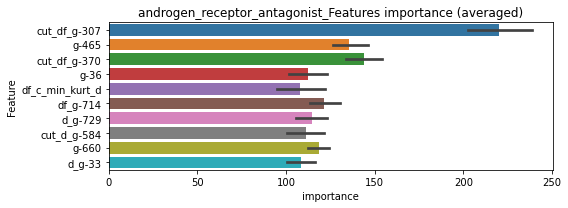

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00170026	valid_1's binary_logloss: 0.0414254
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000695509	valid_1's binary_logloss: 0.0232287


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00082942	valid_1's binary_logloss: 0.0186826


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00116227	valid_1's binary_logloss: 0.0309257


androgen_receptor_antagonist logloss: 0.028567572183016247
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


unpredictable_cols:anesthetic_-_local → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0381098	valid_1's binary_logloss: 0.0847291
[600]	training's binary_logloss: 0.0164294	valid_1's binary_logloss: 0.0616461
[900]	training's binary_logloss: 0.0101169	valid_1's binary_logloss: 0.0538203
[1200]	training's binary_logloss: 0.00724805	valid_1's binary_logloss: 0.0501736
[1500]	training's binary_logloss: 0.00562113	valid_1's binary_logloss: 0.0477469
[1800]	training's binary_logloss: 0.00460623	valid_1's binary_logloss: 0.0461185
[2100]	training's binary_logloss: 0.00390933	valid_1's binary_logloss: 0.0448699
[2400]	training's binary_logloss: 0.00340089	valid_1's binary_logloss: 0.0441249
[2700]	training's binary_logloss: 0.00301048	valid_1's binary_logloss: 0.0433962
[3000]	training's binary_logloss: 0.00270625	valid_1's binary_logloss: 0.0429175
[3300]	training's binary_logloss: 0.00246177	valid_1's binary_logloss: 0.042497
[3600]	training's binary_logloss: 0.00225991	valid_1's

1 / 3, AUC score:0.997, PR-AUC:0.995
y_Threshold: 0.0224055, Threshold: 0.0433538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0433538, conf_0:0.03035, conf_1:0.05636
Num_p_label: 13.0, Expected: 13.4, Adj_threshold_1: 0.0733538
threshold: 0.0733538, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 649.0/3784, y_label_rate: 0.1715116
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0365054	valid_1's binary_logloss: 0.0681467
[600]	training's binary_logloss: 0.015601	valid_1's binary_logloss: 0.0442131
[900]	training's binary_logloss: 0.00960241	valid_1's binary_logloss: 0.0363736
[1200]	training's binary_logloss: 0.00688221	valid_1's binary_logloss: 0.0325711
[1500]	training's binary_logloss: 0.00535548	valid_1's binary_logloss: 0.0301498
[1800]	training's binary_logloss: 0.00439072	valid_1's binary_logloss: 0.0285953
[2100]	training's binary_logloss: 0.00372686	valid_1's binary_logloss: 0.0275514
[2400]	training's binary_logloss: 0.00324512	valid_1's binary_logloss: 0.0266784
[2700]	training's binary_logloss: 0.0028779	valid_1's binary_logloss: 0.025983
[3000]	training's binary_logloss: 0.00258967	valid_1's binary_logloss: 0.0254986
[3300]	training's binary_logloss: 0.00235821	valid_1's binary_logloss: 0.0250537
[3600]	training's binary_logloss: 0.0021656	valid_1's bi

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0522072, Threshold: 0.0733538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3778
p_label_rate: 0.0077850 Vs.target_rate: 0.00336
Num_p_label: 31.0, Expected: 13.4, Threshold: 0.0733538, conf_0:0.05868, conf_1:0.08802
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_1: 0.1033538
threshold: 0.1033538, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3778, y_label_rate: 0.1709899
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036143	valid_1's binary_logloss: 0.072343
[600]	training's binary_logloss: 0.0154856	valid_1's binary_logloss: 0.0485988
[900]	training's binary_logloss: 0.00953357	valid_1's binary_logloss: 0.0408039
[1200]	training's binary_logloss: 0.00683026	valid_1's binary_logloss: 0.036719
[1500]	training's binary_logloss: 0.00532583	valid_1's binary_logloss: 0.0342717
[1800]	training's binary_logloss: 0.00437486	valid_1's binary_logloss: 0.0328622
[2100]	training's binary_logloss: 0.0037117	valid_1's binary_logloss: 0.0317259
[2400]	training's binary_logloss: 0.00323529	valid_1's binary_logloss: 0.0308181
[2700]	training's binary_logloss: 0.00286442	valid_1's binary_logloss: 0.0300872
[3000]	training's binary_logloss: 0.00257819	valid_1's binary_logloss: 0.0294851
[3300]	training's binary_logloss: 0.00234634	valid_1's binary_logloss: 0.0289507
[3600]	training's binary_logloss: 0.00215641	valid_1's bi

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0576968, Threshold: 0.1033538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3770
p_label_rate: 0.0025113 Vs.target_rate: 0.00336
Num_p_label: 10.0, Expected: 13.4, Threshold: 0.1033538, conf_0:0.09302, conf_1:0.11369
threshold: 0.1033538, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 642.0/3770, y_label_rate: 0.1702918


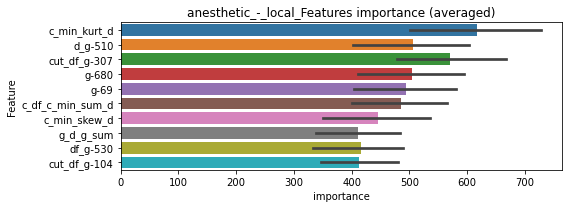

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00381587	valid_1's binary_logloss: 0.0372594
[2000]	training's binary_logloss: 0.00190557	valid_1's binary_logloss: 0.03391
Early stopping, best iteration is:
[2026]	training's binary_logloss: 0.00188229	valid_1's binary_logloss: 0.033835


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00380668	valid_1's binary_logloss: 0.0313545
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.00253478	valid_1's binary_logloss: 0.0291159


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00391421	valid_1's binary_logloss: 0.0216533
[2000]	training's binary_logloss: 0.0019557	valid_1's binary_logloss: 0.017567
[3000]	training's binary_logloss: 0.00135503	valid_1's binary_logloss: 0.0161054
Early stopping, best iteration is:
[3323]	training's binary_logloss: 0.00124034	valid_1's binary_logloss: 0.0157932


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00388558	valid_1's binary_logloss: 0.0283314
Early stopping, best iteration is:
[1412]	training's binary_logloss: 0.00272005	valid_1's binary_logloss: 0.0264189


anesthetic_-_local logloss: 0.02629349888344849
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173867	valid_1's binary_logloss: 0.0125936
[600]	training's binary_logloss: 0.000409672	valid_1's binary_logloss: 0.00836594
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00040453	valid_1's binary_logloss: 0.0083261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183265	valid_1's binary_logloss: 0.0133749
[600]	training's binary_logloss: 0.000419958	valid_1's binary_logloss: 0.00918901
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041026	valid_1's binary_logloss: 0.00911324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188396	valid_1's binary_logloss: 0.00828095
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000489649	valid_1's binary_logloss: 0.00613047
Training until validation scores don't improve for 30 rounds
[30

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028403, Threshold: 0.0163740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0163740, conf_0:0.01146, conf_1:0.02129
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.0463740
threshold: 0.0463740, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168481	valid_1's binary_logloss: 0.00997493
[600]	training's binary_logloss: 0.000402181	valid_1's binary_logloss: 0.00655824
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000398523	valid_1's binary_logloss: 0.00653213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173061	valid_1's binary_logloss: 0.0114675
[600]	training's binary_logloss: 0.000410943	valid_1's binary_logloss: 0.00801729
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403728	valid_1's binary_logloss: 0.00798048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174315	valid_1's binary_logloss: 0.007832
[600]	training's binary_logloss: 0.000408597	valid_1's binary_logloss: 0.0055824
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000414898	valid_1's binary_l

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0274899, Threshold: 0.0463740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0463740, conf_0:0.03710, conf_1:0.05565
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_1: 0.0763740
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.1063740
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1363740
threshold: 0.1363740, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168481	valid_1's binary_logloss: 0.00997493
[600]	training's binary_logloss: 0.000402181	valid_1's binary_logloss: 0.00655824
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000398523	valid_1's binary_logloss: 0.00653213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173061	valid_1's binary_logloss: 0.0114675
[600]	training's binary_logloss: 0.000410943	valid_1's binary_logloss: 0.00801729
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403728	valid_1's binary_logloss: 0.00798048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174315	valid_1's binary_logloss: 0.007832
[600]	training's binary_logloss: 0.000408597	valid_1's binary_logloss: 0.0055824
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000414898	valid_1's binary_l

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0274899, Threshold: 0.1363740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.1363740, conf_0:0.12274, conf_1:0.15001
threshold: 0.1363740, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


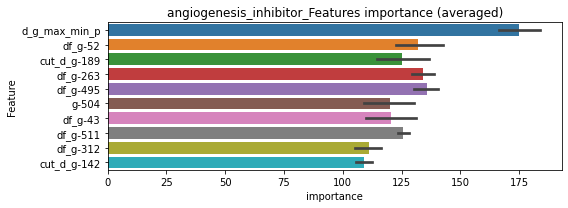

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000426062	valid_1's binary_logloss: 0.00688479


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000437731	valid_1's binary_logloss: 0.00529661


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00087482	valid_1's binary_logloss: 0.00560163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000411034	valid_1's binary_logloss: 0.00348301


angiogenesis_inhibitor logloss: 0.0053165112341114215
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195006	valid_1's binary_logloss: 0.00960328
[600]	training's binary_logloss: 0.000442315	valid_1's binary_logloss: 0.00543753
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000423525	valid_1's binary_logloss: 0.00540664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196645	valid_1's binary_logloss: 0.00952574
[600]	training's binary_logloss: 0.00043799	valid_1's binary_logloss: 0.00434906
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000407191	valid_1's binary_logloss: 0.00423776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206647	valid_1's binary_logloss: 0.00598897
[600]	training's binary_logloss: 0.000449788	valid_1's binary_logloss: 0.002565
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000411675	valid_1's binary_

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025900, Threshold: 0.0098249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0098249, conf_0:0.00688, conf_1:0.01277
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_1: 0.0398249
threshold: 0.0398249, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183904	valid_1's binary_logloss: 0.0092183
[600]	training's binary_logloss: 0.000423972	valid_1's binary_logloss: 0.005224
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000399293	valid_1's binary_logloss: 0.00515243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018326	valid_1's binary_logloss: 0.0080927
[600]	training's binary_logloss: 0.000420583	valid_1's binary_logloss: 0.00335378
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000389921	valid_1's binary_logloss: 0.00326768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194418	valid_1's binary_logloss: 0.00577178
[600]	training's binary_logloss: 0.000431299	valid_1's binary_logloss: 0.00274056
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000400514	valid_1's binary_lo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116154, Threshold: 0.0398249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0065294 Vs.target_rate: 0.00155
Num_p_label: 26.0, Expected: 6.2, Threshold: 0.0398249, conf_0:0.03186, conf_1:0.04779
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0698249
threshold: 0.0698249, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183904	valid_1's binary_logloss: 0.0092183
[600]	training's binary_logloss: 0.000423972	valid_1's binary_logloss: 0.005224
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000399293	valid_1's binary_logloss: 0.00515243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018326	valid_1's binary_logloss: 0.0080927
[600]	training's binary_logloss: 0.000420583	valid_1's binary_logloss: 0.00335378
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000389921	valid_1's binary_logloss: 0.00326768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194418	valid_1's binary_logloss: 0.00577178
[600]	training's binary_logloss: 0.000431299	valid_1's binary_logloss: 0.00274056
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000400514	valid_1's binary_lo

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116154, Threshold: 0.0698249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.0698249, conf_0:0.06284, conf_1:0.07681
threshold: 0.0698249, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


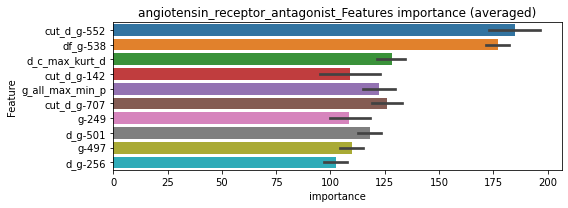

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000398476	valid_1's binary_logloss: 0.00371004
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.00039742	valid_1's binary_logloss: 0.00370266


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000406578	valid_1's binary_logloss: 0.00359053


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402262	valid_1's binary_logloss: 0.00185308
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000403636	valid_1's binary_logloss: 0.00185179


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000456276	valid_1's binary_logloss: 0.0063711


angiotensin_receptor_antagonist logloss: 0.003879795849592655
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524608	valid_1's binary_logloss: 0.0427386
[600]	training's binary_logloss: 0.000897165	valid_1's binary_logloss: 0.0329688
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000942528	valid_1's binary_logloss: 0.0328789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00526937	valid_1's binary_logloss: 0.0298396
[600]	training's binary_logloss: 0.000911495	valid_1's binary_logloss: 0.0179433
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000610913	valid_1's binary_logloss: 0.0167793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512854	valid_1's binary_logloss: 0.0495497
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00168782	valid_1's binary_logloss: 0.0444238
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0079948, Threshold: 0.0775467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 137 → Positive_corect_labels: 652/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0775467, conf_0:0.05428, conf_1:0.10081
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.1075467
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.1375467
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_3: 0.1675467
threshold: 0.1675467, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455487	valid_1's binary_logloss: 0.0437028
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00102373	valid_1's binary_logloss: 0.0371761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454547	valid_1's binary_logloss: 0.037526
[600]	training's binary_logloss: 0.000843377	valid_1's binary_logloss: 0.0301596
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000632307	valid_1's binary_logloss: 0.0295418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470692	valid_1's binary_logloss: 0.0279919
[600]	training's binary_logloss: 0.000855972	valid_1's binary_logloss: 0.0183178
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000580895	valid_1's binary_logloss: 0.017443
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0324619, Threshold: 0.1675467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0118031 Vs.target_rate: 0.00307
Num_p_label: 47.0, Expected: 12.2, Threshold: 0.1675467, conf_0:0.13404, conf_1:0.20106
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_1: 0.1975467
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_2: 0.2275467
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.2575467
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.2875467
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_5: 0.3175467
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3475467
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.3775467
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_8: 0.4075467
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_9: 0.4375467
threshold: 0.4375467, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430526	valid_1's binary_logloss: 0.033364
[600]	training's binary_logloss: 0.00080789	valid_1's binary_logloss: 0.0237039
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000565523	valid_1's binary_logloss: 0.0226425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428642	valid_1's binary_logloss: 0.0439926
[600]	training's binary_logloss: 0.000806025	valid_1's binary_logloss: 0.0336406
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00060261	valid_1's binary_logloss: 0.0327455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447768	valid_1's binary_logloss: 0.0305908
[600]	training's binary_logloss: 0.000829045	valid_1's binary_logloss: 0.0233753
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000571558	valid_1's binary_logloss:

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313774, Threshold: 0.4375467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.4375467, conf_0:0.39379, conf_1:0.48130
threshold: 0.4375467, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 641.0/3771, y_label_rate: 0.1699814


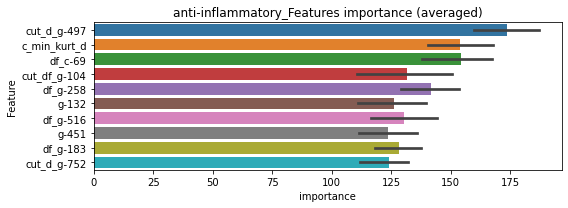

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 anti-inflammatory=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00153847	valid_1's binary_logloss: 0.0485836
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 anti-inflammatory=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0011407	valid_1's binary_logloss: 0.0220778
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 942


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000928715	valid_1's binary_logloss: 0.0231675


================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


anti-inflammatory logloss: 0.02835519488575455


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00115624	valid_1's binary_logloss: 0.0195825


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141186	valid_1's binary_logloss: 0.0041131
[600]	training's binary_logloss: 0.000365173	valid_1's binary_logloss: 0.00174921
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036546	valid_1's binary_logloss: 0.00174837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146842	valid_1's binary_logloss: 0.00559437
[600]	training's binary_logloss: 0.00036004	valid_1's binary_logloss: 0.00353258
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00036004	valid_1's binary_logloss: 0.00353258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143575	valid_1's binary_logloss: 0.00530291
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000379759	valid_1's binary_logloss: 0.00303454
Training until validation scores don't improve for 30 rounds
[3

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018459, Threshold: 0.0057581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057581, conf_0:0.00403, conf_1:0.00749
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_1: 0.0357581
threshold: 0.0357581, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131518	valid_1's binary_logloss: 0.00404137
[600]	training's binary_logloss: 0.000355241	valid_1's binary_logloss: 0.00178824
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000355648	valid_1's binary_logloss: 0.00178822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133995	valid_1's binary_logloss: 0.00426725
[600]	training's binary_logloss: 0.000354655	valid_1's binary_logloss: 0.00243497
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000353743	valid_1's binary_logloss: 0.00243269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133111	valid_1's binary_logloss: 0.00390252
[600]	training's binary_logloss: 0.000354787	valid_1's binary_logloss: 0.00193465
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000354787	valid_1's bina

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0533431, Threshold: 0.0357581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


[600]	training's binary_logloss: 0.000357612	valid_1's binary_logloss: 0.00272952
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000358373	valid_1's binary_logloss: 0.0027198


p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0357581, conf_0:0.02861, conf_1:0.04291
threshold: 0.0357581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131518	valid_1's binary_logloss: 0.00404137
[600]	training's binary_logloss: 0.000355241	valid_1's binary_logloss: 0.00178824
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000355648	valid_1's binary_logloss: 0.00178822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133995	valid_1's binary_logloss: 0.00426725
[600]	training's binary_logloss: 0.000354655	valid_1's binary_logloss: 0.00243497
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000353743	valid_1's binary_logloss: 0.00243269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133111	valid_1's binary_logloss: 0.00390252
[600]	training's binary_logloss: 0.000354787	valid_1's binary_logloss: 0.00193465
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000354787	valid_1's bina

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0533431, Threshold: 0.0357581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


[600]	training's binary_logloss: 0.000357612	valid_1's binary_logloss: 0.00272952
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000358373	valid_1's binary_logloss: 0.0027198


p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0357581, conf_0:0.03218, conf_1:0.03933
threshold: 0.0357581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


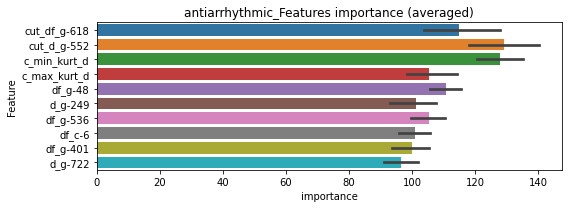

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000368363	valid_1's binary_logloss: 0.00185224


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000367499	valid_1's binary_logloss: 0.00218228


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000363276	valid_1's binary_logloss: 0.001749


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000382549	valid_1's binary_logloss: 0.00230622


antiarrhythmic logloss: 0.0020224504261133203
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024463	valid_1's binary_logloss: 0.0180971
[600]	training's binary_logloss: 0.000505708	valid_1's binary_logloss: 0.0121879
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000481012	valid_1's binary_logloss: 0.0121094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245508	valid_1's binary_logloss: 0.00981621
[600]	training's binary_logloss: 0.000517654	valid_1's binary_logloss: 0.00586742
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000514658	valid_1's binary_logloss: 0.00586372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247108	valid_1's binary_logloss: 0.00572343
[600]	training's binary_logloss: 0.000529123	valid_1's binary_logloss: 0.0019151
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000476922	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042693, Threshold: 0.0321468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0321468, conf_0:0.02250, conf_1:0.04179
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_1: 0.0621468
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_2: 0.0921468
threshold: 0.0921468, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216422	valid_1's binary_logloss: 0.0167882
[600]	training's binary_logloss: 0.000481832	valid_1's binary_logloss: 0.0116758
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000468355	valid_1's binary_logloss: 0.0116204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232841	valid_1's binary_logloss: 0.00900013
[600]	training's binary_logloss: 0.000504355	valid_1's binary_logloss: 0.00538737
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000498085	valid_1's binary_logloss: 0.00536405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234815	valid_1's binary_logloss: 0.00578381
[600]	training's binary_logloss: 0.000509253	valid_1's binary_logloss: 0.00206595
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000460639	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0378763, Threshold: 0.0921468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0102963 Vs.target_rate: 0.00181
Num_p_label: 41.0, Expected: 7.2, Threshold: 0.0921468, conf_0:0.07372, conf_1:0.11058
Num_p_label: 30.0, Expected: 7.2, Adj_threshold_1: 0.1221468
Num_p_label: 24.0, Expected: 7.2, Adj_threshold_2: 0.1521468
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1821468
threshold: 0.1821468, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217877	valid_1's binary_logloss: 0.010975
[600]	training's binary_logloss: 0.000489117	valid_1's binary_logloss: 0.00718284
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000477911	valid_1's binary_logloss: 0.00712832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232249	valid_1's binary_logloss: 0.00688058
[600]	training's binary_logloss: 0.000499947	valid_1's binary_logloss: 0.00285024
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460874	valid_1's binary_logloss: 0.00279933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236466	valid_1's binary_logloss: 0.00803983
[600]	training's binary_logloss: 0.000501978	valid_1's binary_logloss: 0.00373792
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000467114	valid_1's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0251516, Threshold: 0.1821468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00181
Num_p_label: 13.0, Expected: 7.2, Threshold: 0.1821468, conf_0:0.16393, conf_1:0.20036
threshold: 0.1821468, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


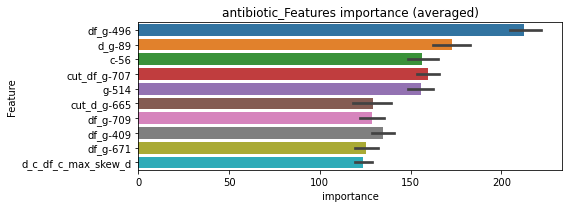

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000467834	valid_1's binary_logloss: 0.00778476


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000470049	valid_1's binary_logloss: 0.00279079


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000475704	valid_1's binary_logloss: 0.00293277


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.00050669	valid_1's binary_logloss: 0.0102244


antibiotic logloss: 0.005933718757977818
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824914	valid_1's binary_logloss: 0.00231632
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000272064	valid_1's binary_logloss: 0.00108462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000805703	valid_1's binary_logloss: 0.00388585
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000268393	valid_1's binary_logloss: 0.0022707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000817424	valid_1's binary_logloss: 0.00485971
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000416402	valid_1's binary_logloss: 0.00443289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000822752	valid_1's binary_logloss: 0.00255121


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012456, Threshold: 0.0043196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0043196, conf_0:0.00302, conf_1:0.00562
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0343196


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000278638	valid_1's binary_logloss: 0.00140679


threshold: 0.0343196, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000801542	valid_1's binary_logloss: 0.00199604
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000266664	valid_1's binary_logloss: 0.000880482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787485	valid_1's binary_logloss: 0.00430601
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000268986	valid_1's binary_logloss: 0.00274701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800817	valid_1's binary_logloss: 0.00436629
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00027665	valid_1's binary_logloss: 0.00367791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806907	valid_1's binary_logloss: 0.00269985


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125228, Threshold: 0.0343196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0343196, conf_0:0.02746, conf_1:0.04118


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000262782	valid_1's binary_logloss: 0.00142385


threshold: 0.0343196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000801542	valid_1's binary_logloss: 0.00199604
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000266664	valid_1's binary_logloss: 0.000880482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787485	valid_1's binary_logloss: 0.00430601
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000268986	valid_1's binary_logloss: 0.00274701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800817	valid_1's binary_logloss: 0.00436629
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00027665	valid_1's binary_logloss: 0.00367791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806907	valid_1's binary_logloss: 0.00269985


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125228, Threshold: 0.0343196, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0343196, conf_0:0.03089, conf_1:0.03775


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000262782	valid_1's binary_logloss: 0.00142385


threshold: 0.0343196, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


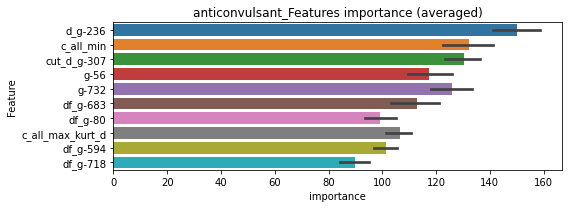

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000265807	valid_1's binary_logloss: 0.000779594
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000265814	valid_1's binary_logloss: 0.000779581


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000266703	valid_1's binary_logloss: 0.00238696


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000617584	valid_1's binary_logloss: 0.00401543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000269353	valid_1's binary_logloss: 0.00116273


anticonvulsant logloss: 0.0020864031387252103
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116607	valid_1's binary_logloss: 0.00483527
[600]	training's binary_logloss: 0.000334091	valid_1's binary_logloss: 0.00305522
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333196	valid_1's binary_logloss: 0.00305276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114859	valid_1's binary_logloss: 0.00392192
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000344105	valid_1's binary_logloss: 0.00241136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115396	valid_1's binary_logloss: 0.00372042
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000395425	valid_1's binary_logloss: 0.00244012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011693	valid_1's binary_logloss: 0.00579049


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016472, Threshold: 0.0052241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0052241, conf_0:0.00366, conf_1:0.00679
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0352241
threshold: 0.0352241, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112041	valid_1's binary_logloss: 0.00376486
[600]	training's binary_logloss: 0.000325549	valid_1's binary_logloss: 0.00191136
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000323699	valid_1's binary_logloss: 0.00190279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110048	valid_1's binary_logloss: 0.00318151
[600]	training's binary_logloss: 0.000327328	valid_1's binary_logloss: 0.00168931
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000330647	valid_1's binary_logloss: 0.00167875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113459	valid_1's binary_logloss: 0.00357224
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000340878	valid_1's binary_logloss: 0.00222419
Training until validation scores don't improve for 30 round

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0530669, Threshold: 0.0352241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0352241, conf_0:0.02818, conf_1:0.04227
threshold: 0.0352241, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112041	valid_1's binary_logloss: 0.00376486
[600]	training's binary_logloss: 0.000325549	valid_1's binary_logloss: 0.00191136
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000323699	valid_1's binary_logloss: 0.00190279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110048	valid_1's binary_logloss: 0.00318151
[600]	training's binary_logloss: 0.000327328	valid_1's binary_logloss: 0.00168931
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000330647	valid_1's binary_logloss: 0.00167875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113459	valid_1's binary_logloss: 0.00357224
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000340878	valid_1's binary_logloss: 0.00222419
Training until validation scores don't improve for 30 round

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0530669, Threshold: 0.0352241, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0352241, conf_0:0.03170, conf_1:0.03875
threshold: 0.0352241, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


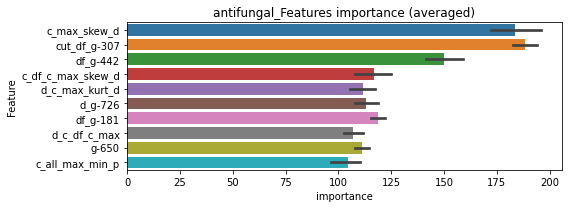

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000338462	valid_1's binary_logloss: 0.00212168


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000328428	valid_1's binary_logloss: 0.00155321


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000356486	valid_1's binary_logloss: 0.00179757


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000330298	valid_1's binary_logloss: 0.00258722


antifungal logloss: 0.0020148929594547738
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891109	valid_1's binary_logloss: 0.00245187
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000300782	valid_1's binary_logloss: 0.00150166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000867418	valid_1's binary_logloss: 0.00497982
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000300541	valid_1's binary_logloss: 0.00288375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000918227	valid_1's binary_logloss: 0.00255565
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00030593	valid_1's binary_logloss: 0.00137135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892626	valid_1's binary_logloss: 0.0045435


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015763, Threshold: 0.1386174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1386174, conf_0:0.09703, conf_1:0.18020
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_1: 0.1686174
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1986174


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000303175	valid_1's binary_logloss: 0.0030265


Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.2286174
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.2586174
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2886174
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_6: 0.3186174
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.3486174
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3786174
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_9: 0.4086174
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_10: 0.4386174
threshold: 0.4386174, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000795072	valid_1's binary_logloss: 0.00220549
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000282857	valid_1's binary_logloss: 0.00133102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000777173	valid_1's binary_logloss: 0.00332094
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000287174	valid_1's binary_logloss: 0.00216568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800249	valid_1's binary_logloss: 0.0011182
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.000434012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791437	valid_1's binary_logloss: 0.00292483


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0857761, Threshold: 0.4386174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.4386174, conf_0:0.35089, conf_1:0.52634
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_1: 0.4686174
Num_p_label: 47.0, Expected: 3.0, Adj_threshold_2: 0.4986174


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000290351	valid_1's binary_logloss: 0.00185445


Num_p_label: 46.0, Expected: 3.0, Adj_threshold_3: 0.5286174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5586174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5886174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6186174
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_7: 0.6486174
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6786174
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.7086174
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7386174
threshold: 0.7386174, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000795072	valid_1's binary_logloss: 0.00220549
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000282857	valid_1's binary_logloss: 0.00133102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000777173	valid_1's binary_logloss: 0.00332094
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000287174	valid_1's binary_logloss: 0.00216568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800249	valid_1's binary_logloss: 0.0011182
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.000434012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791437	valid_1's binary_logloss: 0.00292483


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0857761, Threshold: 0.7386174, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7386174, conf_0:0.66476, conf_1:0.81248
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7686174
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7986174
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_3: 0.8286174
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_4: 0.8586174


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000290351	valid_1's binary_logloss: 0.00185445


Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8886174
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_6: 0.9186174
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.9486174
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.9786174
threshold: 0.9786174, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


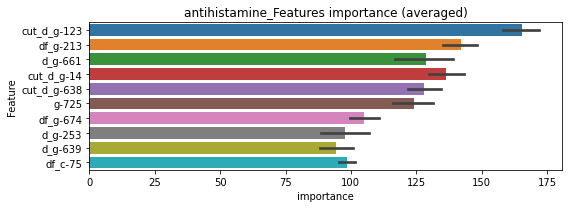

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000290034	valid_1's binary_logloss: 0.00103865
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000292394	valid_1's binary_logloss: 0.00183311
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000293819	valid_1's binary_logloss: 0.000477158


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.0013002342186068112


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.00029075	valid_1's binary_logloss: 0.0018516


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103458	valid_1's binary_logloss: 0.00172358
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000319265	valid_1's binary_logloss: 0.000737528
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000989868	valid_1's binary_logloss: 0.0034678
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000312505	valid_1's binary_logloss: 0.00183907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101167	valid_1's binary_logloss: 0.00446693
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000316884	valid_1's binary_logloss: 0.00289911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101546	valid_1's binary_logloss: 0.00463438


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018391, Threshold: 0.0073080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0073080, conf_0:0.00512, conf_1:0.00950
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0373080
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0673080


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000336989	valid_1's binary_logloss: 0.00320468


threshold: 0.0673080, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000921987	valid_1's binary_logloss: 0.00167706
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000307027	valid_1's binary_logloss: 0.000729056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917992	valid_1's binary_logloss: 0.0040709
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000309116	valid_1's binary_logloss: 0.00249446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000950752	valid_1's binary_logloss: 0.00203583
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000307816	valid_1's binary_logloss: 0.000916144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919101	valid_1's binary_logloss: 0.00368111


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1792170, Threshold: 0.0673080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0673080, conf_0:0.05385, conf_1:0.08077
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.0973080
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.1273080
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.1573080


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000308241	valid_1's binary_logloss: 0.00229274


Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.1873080
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.2173080
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.2473080
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.2773080
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3073080
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.3373080
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.3673080
threshold: 0.3673080, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000921987	valid_1's binary_logloss: 0.00167706
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000307027	valid_1's binary_logloss: 0.000729056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917992	valid_1's binary_logloss: 0.0040709
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000309116	valid_1's binary_logloss: 0.00249446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000950752	valid_1's binary_logloss: 0.00203583
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000307816	valid_1's binary_logloss: 0.000916144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919101	valid_1's binary_logloss: 0.00368111


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1792170, Threshold: 0.3673080, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3673080, conf_0:0.33058, conf_1:0.40404


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000308241	valid_1's binary_logloss: 0.00229274


threshold: 0.3673080, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


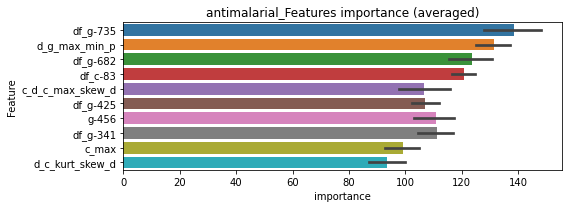

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000303507	valid_1's binary_logloss: 0.000811277


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000300323	valid_1's binary_logloss: 0.00237693


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000307419	valid_1's binary_logloss: 0.000604687


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000304515	valid_1's binary_logloss: 0.00206298


antimalarial logloss: 0.001464192765536318
antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00479082	valid_1's binary_logloss: 0.0442617
[600]	training's binary_logloss: 0.000832688	valid_1's binary_logloss: 0.0343794
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000675632	valid_1's binary_logloss: 0.0337918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550087	valid_1's binary_logloss: 0.041998
[600]	training's binary_logloss: 0.000877341	valid_1's binary_logloss: 0.031668
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000701171	valid_1's binary_logloss: 0.0311543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557571	valid_1's binary_logloss: 0.0286635
[600]	training's binary_logloss: 0.000891374	valid_1's binary_logloss: 0.02049
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000782948	valid_1's binary_logloss: 

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0063322, Threshold: 0.0252578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0252578, conf_0:0.01768, conf_1:0.03284
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_1: 0.0552578
threshold: 0.0552578, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441973	valid_1's binary_logloss: 0.0526819
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00136157	valid_1's binary_logloss: 0.0494719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493345	valid_1's binary_logloss: 0.0345906
[600]	training's binary_logloss: 0.000825172	valid_1's binary_logloss: 0.0233596
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000609816	valid_1's binary_logloss: 0.0227295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474797	valid_1's binary_logloss: 0.0282916
[600]	training's binary_logloss: 0.000827301	valid_1's binary_logloss: 0.0202321
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000622777	valid_1's binary_logloss: 0.0195533
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0243309, Threshold: 0.0552578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0080362 Vs.target_rate: 0.00307
Num_p_label: 32.0, Expected: 12.2, Threshold: 0.0552578, conf_0:0.04421, conf_1:0.06631
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.0852578
threshold: 0.0852578, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3786, y_label_rate: 0.1706286
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471032	valid_1's binary_logloss: 0.0313239
[600]	training's binary_logloss: 0.000801295	valid_1's binary_logloss: 0.0217978
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000609733	valid_1's binary_logloss: 0.0210523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433197	valid_1's binary_logloss: 0.0426096
[600]	training's binary_logloss: 0.000769971	valid_1's binary_logloss: 0.0340968
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000586514	valid_1's binary_logloss: 0.0332741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043936	valid_1's binary_logloss: 0.031704
[600]	training's binary_logloss: 0.000794919	valid_1's binary_logloss: 0.0239982
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000828111	valid_1's binary_logloss

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0306009, Threshold: 0.0852578, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, Expected: 12.2, Threshold: 0.0852578, conf_0:0.07673, conf_1:0.09378
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.1152578
threshold: 0.1152578, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3782, y_label_rate: 0.1702803


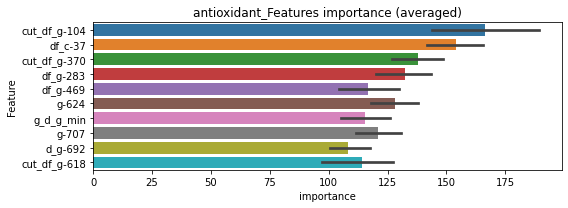

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00114773	valid_1's binary_logloss: 0.0236282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000792088	valid_1's binary_logloss: 0.0230281


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 antioxidant=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113774	valid_1's binary_logloss: 0.0256756
Training until validation scores don't improve for 30 rounds


antioxidant logloss: 0.023761531623676627


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000927903	valid_1's binary_logloss: 0.0227152


antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224102	valid_1's binary_logloss: 0.00841937
[600]	training's binary_logloss: 0.000454567	valid_1's binary_logloss: 0.00350564
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000413846	valid_1's binary_logloss: 0.00340071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228906	valid_1's binary_logloss: 0.00929692
[600]	training's binary_logloss: 0.000465925	valid_1's binary_logloss: 0.00516814
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000420026	valid_1's binary_logloss: 0.00503381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240428	valid_1's binary_logloss: 0.00591342
[600]	training's binary_logloss: 0.000473392	valid_1's binary_logloss: 0.00177212
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000427192	valid_1's bina

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031995, Threshold: 0.0111100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0111100, conf_0:0.00778, conf_1:0.01444
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0411100
threshold: 0.0411100, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203435	valid_1's binary_logloss: 0.00624539
[600]	training's binary_logloss: 0.000438469	valid_1's binary_logloss: 0.00251207
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000395704	valid_1's binary_logloss: 0.00241149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213084	valid_1's binary_logloss: 0.00760962
[600]	training's binary_logloss: 0.00044573	valid_1's binary_logloss: 0.00362858
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000408737	valid_1's binary_logloss: 0.00355089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212321	valid_1's binary_logloss: 0.00511669
[600]	training's binary_logloss: 0.000447276	valid_1's binary_logloss: 0.00150892
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000414012	valid_1's binar

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0528957, Threshold: 0.0411100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00151
Num_p_label: 17.0, Expected: 6.0, Threshold: 0.0411100, conf_0:0.03289, conf_1:0.04933
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0711100
threshold: 0.0711100, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203435	valid_1's binary_logloss: 0.00624539
[600]	training's binary_logloss: 0.000438469	valid_1's binary_logloss: 0.00251207
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000395704	valid_1's binary_logloss: 0.00241149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213084	valid_1's binary_logloss: 0.00760962
[600]	training's binary_logloss: 0.00044573	valid_1's binary_logloss: 0.00362858
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000408737	valid_1's binary_logloss: 0.00355089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212321	valid_1's binary_logloss: 0.00511669
[600]	training's binary_logloss: 0.000447276	valid_1's binary_logloss: 0.00150892
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000414012	valid_1's binar

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0528957, Threshold: 0.0711100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, Expected: 6.0, Threshold: 0.0711100, conf_0:0.06400, conf_1:0.07822
threshold: 0.0711100, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


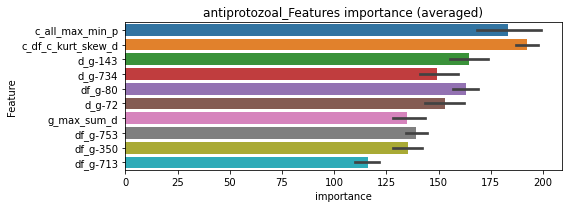

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402208	valid_1's binary_logloss: 0.00243949
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000402208	valid_1's binary_logloss: 0.00243949


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000418831	valid_1's binary_logloss: 0.00257912


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041023	valid_1's binary_logloss: 0.00132299
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000407338	valid_1's binary_logloss: 0.00131437


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000406596	valid_1's binary_logloss: 0.00417219
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.0004059	valid_1's binary_logloss: 0.00416426


antiprotozoal logloss: 0.002624308843671174
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108271	valid_1's binary_logloss: 0.00392892
[600]	training's binary_logloss: 0.000303418	valid_1's binary_logloss: 0.00208138
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000305519	valid_1's binary_logloss: 0.00207589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109539	valid_1's binary_logloss: 0.00272926
[600]	training's binary_logloss: 0.00030638	valid_1's binary_logloss: 0.0010783
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000307179	valid_1's binary_logloss: 0.00107686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113041	valid_1's binary_logloss: 0.00250811
[600]	training's binary_logloss: 0.000311235	valid_1's binary_logloss: 0.000927811
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000309147	valid_1's binar

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0047371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047371, conf_0:0.00332, conf_1:0.00616
Num_p_label: 1.0, Expected: 3.8, Adj_threshold_1: 0.0347371
threshold: 0.0347371, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100751	valid_1's binary_logloss: 0.00364838
[600]	training's binary_logloss: 0.000294713	valid_1's binary_logloss: 0.00204611
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000294869	valid_1's binary_logloss: 0.00204517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103516	valid_1's binary_logloss: 0.00233152
[600]	training's binary_logloss: 0.000299075	valid_1's binary_logloss: 0.000898896
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000297896	valid_1's binary_logloss: 0.000897097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010506	valid_1's binary_logloss: 0.00185465
[600]	training's binary_logloss: 0.000304877	valid_1's binary_logloss: 0.000652387
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000304877	valid_1's bi

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394407, Threshold: 0.0347371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0347371, conf_0:0.02779, conf_1:0.04168


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000304079	valid_1's binary_logloss: 0.00266243


threshold: 0.0347371, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100751	valid_1's binary_logloss: 0.00364838
[600]	training's binary_logloss: 0.000294713	valid_1's binary_logloss: 0.00204611
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000294869	valid_1's binary_logloss: 0.00204517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103516	valid_1's binary_logloss: 0.00233152
[600]	training's binary_logloss: 0.000299075	valid_1's binary_logloss: 0.000898896
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000297896	valid_1's binary_logloss: 0.000897097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010506	valid_1's binary_logloss: 0.00185465
[600]	training's binary_logloss: 0.000304877	valid_1's binary_logloss: 0.000652387
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000304877	valid_1's bi

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394407, Threshold: 0.0347371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0347371, conf_0:0.03126, conf_1:0.03821


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000304079	valid_1's binary_logloss: 0.00266243


threshold: 0.0347371, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


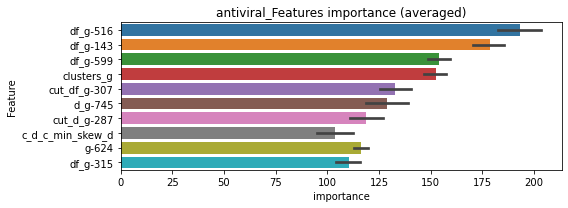

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000297191	valid_1's binary_logloss: 0.00170042
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00029737	valid_1's binary_logloss: 0.00169949


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000299711	valid_1's binary_logloss: 0.000745273
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000299585	valid_1's binary_logloss: 0.000744995


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000308213	valid_1's binary_logloss: 0.000556213


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000305653	valid_1's binary_logloss: 0.00187328


antiviral logloss: 0.001218898436976844
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272628	valid_1's binary_logloss: 0.0303416
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000888872	valid_1's binary_logloss: 0.0271083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285399	valid_1's binary_logloss: 0.0240713
[600]	training's binary_logloss: 0.000553632	valid_1's binary_logloss: 0.0191629
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000592852	valid_1's binary_logloss: 0.0191139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307814	valid_1's binary_logloss: 0.00602108
[600]	training's binary_logloss: 0.000588391	valid_1's binary_logloss: 0.00192285
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000502833	valid_1's binary_logloss: 0.00174242
Training until validation scores don't improve for 30 rounds
[30

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041710, Threshold: 0.0432549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0432549, conf_0:0.03028, conf_1:0.05623
Num_p_label: 30.0, Expected: 8.2, Adj_threshold_1: 0.0732549
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_2: 0.1032549
threshold: 0.1032549, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260392	valid_1's binary_logloss: 0.0278126
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000577166	valid_1's binary_logloss: 0.0229236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269191	valid_1's binary_logloss: 0.025207
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000608627	valid_1's binary_logloss: 0.0208298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285824	valid_1's binary_logloss: 0.00604637
[600]	training's binary_logloss: 0.000573782	valid_1's binary_logloss: 0.00194103
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000493498	valid_1's binary_logloss: 0.00176932
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283087	valid_1's binary_logloss: 0.019261
[600]	

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201415, Threshold: 0.1032549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0130588 Vs.target_rate: 0.00206
Num_p_label: 52.0, Expected: 8.2, Threshold: 0.1032549, conf_0:0.08260, conf_1:0.12391
Num_p_label: 41.0, Expected: 8.2, Adj_threshold_1: 0.1332549
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_2: 0.1632549
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.1932549
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2232549
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_5: 0.2532549
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_6: 0.2832549
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_7: 0.3132549
threshold: 0.3132549, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268847	valid_1's binary_logloss: 0.00910417
[600]	training's binary_logloss: 0.00054404	valid_1's binary_logloss: 0.00449412
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000496241	valid_1's binary_logloss: 0.00437006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253069	valid_1's binary_logloss: 0.0263681
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000703222	valid_1's binary_logloss: 0.021813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026135	valid_1's binary_logloss: 0.0186805
[600]	training's binary_logloss: 0.00053513	valid_1's binary_logloss: 0.013373
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000487466	valid_1's binary_logloss: 0.0133225
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0272434, Threshold: 0.3132549, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3132549, conf_0:0.28193, conf_1:0.34458
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.3432549
threshold: 0.3432549, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


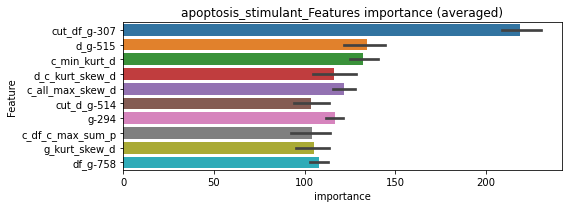

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000634024	valid_1's binary_logloss: 0.01153


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000580847	valid_1's binary_logloss: 0.0129505


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000532247	valid_1's binary_logloss: 0.00742331


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000625987	valid_1's binary_logloss: 0.00961346


apoptosis_stimulant logloss: 0.01038030001085359
aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281232	valid_1's binary_logloss: 0.0241209
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000960589	valid_1's binary_logloss: 0.0184918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260557	valid_1's binary_logloss: 0.0220552
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000589237	valid_1's binary_logloss: 0.0177328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286603	valid_1's binary_logloss: 0.0149382
[600]	training's binary_logloss: 0.000563838	valid_1's binary_logloss: 0.0106104
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00054699	valid_1's binary_logloss: 0.0105244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284812	valid_1's binary_logloss: 0.0119475
[600]	tr

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0050213, Threshold: 0.0130488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0130488, conf_0:0.00913, conf_1:0.01696
Num_p_label: 9.0, Expected: 7.9, Adj_threshold_1: 0.0430488
threshold: 0.0430488, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245151	valid_1's binary_logloss: 0.0208174
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00060863	valid_1's binary_logloss: 0.0171693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256368	valid_1's binary_logloss: 0.0203759
[600]	training's binary_logloss: 0.00053346	valid_1's binary_logloss: 0.0158139
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000504494	valid_1's binary_logloss: 0.0157953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277877	valid_1's binary_logloss: 0.00604362
[600]	training's binary_logloss: 0.000561745	valid_1's binary_logloss: 0.00160233
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000486451	valid_1's binary_logloss: 0.0014139
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162182, Threshold: 0.0430488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00197
Num_p_label: 15.0, Expected: 7.9, Threshold: 0.0430488, conf_0:0.03444, conf_1:0.05166
threshold: 0.0430488, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251771	valid_1's binary_logloss: 0.0302644
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000780863	valid_1's binary_logloss: 0.027173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263008	valid_1's binary_logloss: 0.0117102
[600]	training's binary_logloss: 0.000549976	valid_1's binary_logloss: 0.00661534
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000502001	valid_1's binary_logloss: 0.00648866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267012	valid_1's binary_logloss: 0.0104135
[600]	training's binary_logloss: 0.000540766	valid_1's binary_logloss: 0.00491014
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000483881	valid_1's binary_logloss: 0.00476345
Training until validation scores don't improve for 30 rounds
[30

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168660, Threshold: 0.0430488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00197
Num_p_label: 21.0, Expected: 7.9, Threshold: 0.0430488, conf_0:0.03874, conf_1:0.04735
Num_p_label: 11.0, Expected: 7.9, Adj_threshold_1: 0.0730488
threshold: 0.0730488, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


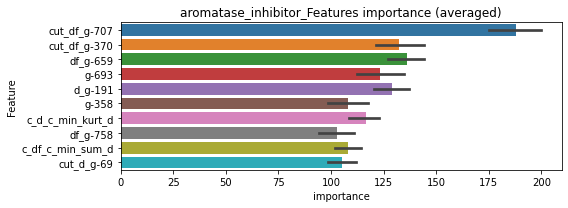

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000840029	valid_1's binary_logloss: 0.014053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000555674	valid_1's binary_logloss: 0.0106783


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000483453	valid_1's binary_logloss: 0.00355394


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000693985	valid_1's binary_logloss: 0.0114667


aromatase_inhibitor logloss: 0.009939292478497088
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000313274	valid_1's binary_logloss: 0.000432432
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000153887	valid_1's binary_logloss: 0.000227459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311721	valid_1's binary_logloss: 0.00103521
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000154612	valid_1's binary_logloss: 0.000719943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311839	valid_1's binary_logloss: 0.000368916
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000153212	valid_1's binary_logloss: 0.00018192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309708	valid_1's binary_logloss: 0.000591334


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003610, Threshold: 0.0014255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0014255, conf_0:0.00100, conf_1:0.00185
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0314255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0614255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0914255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1214255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1514255


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000154046	valid_1's binary_logloss: 0.000336899


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.1814255
threshold: 0.1814255, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301012	valid_1's binary_logloss: 0.00103982
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000146574	valid_1's binary_logloss: 0.000713766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298981	valid_1's binary_logloss: 0.00107638
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000146005	valid_1's binary_logloss: 0.000746854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302033	valid_1's binary_logloss: 0.000316481
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000146133	valid_1's binary_logloss: 0.000153427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298959	valid_1's binary_logloss: 0.00122226


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0911852, Threshold: 0.1814255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.1814255, conf_0:0.14514, conf_1:0.21771
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.2114255
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.2414255
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.2714255
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3014255
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3314255
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.3614255
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.3914255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4214255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.4514255
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.4814255


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000145211	valid_1's binary_logloss: 0.000848056


threshold: 0.4814255, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301012	valid_1's binary_logloss: 0.00103982
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000146574	valid_1's binary_logloss: 0.000713766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298981	valid_1's binary_logloss: 0.00107638
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000146005	valid_1's binary_logloss: 0.000746854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302033	valid_1's binary_logloss: 0.000316481
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000146133	valid_1's binary_logloss: 0.000153427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298959	valid_1's binary_logloss: 0.00122226


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0911852, Threshold: 0.4814255, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.4814255, conf_0:0.43328, conf_1:0.52957
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5114255
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.5414255
threshold: 0.5414255, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145211	valid_1's binary_logloss: 0.000848056


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


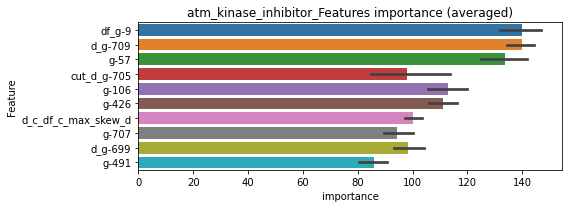

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147885	valid_1's binary_logloss: 0.000555264
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000146435	valid_1's binary_logloss: 0.000552868


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148702	valid_1's binary_logloss: 0.000757569


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.000146101	valid_1's binary_logloss: 0.000752115
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147077	valid_1's binary_logloss: 0.000159729


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000145056	valid_1's binary_logloss: 0.000157427
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148764	valid_1's binary_logloss: 0.000269825


atm_kinase_inhibitor logloss: 0.00043231234106353453


Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000146599	valid_1's binary_logloss: 0.000266839


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000369737	valid_1's binary_logloss: 0.0013492
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000181229	valid_1's binary_logloss: 0.000815707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364902	valid_1's binary_logloss: 0.00259012
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180235	valid_1's binary_logloss: 0.00200194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000373714	valid_1's binary_logloss: 0.000386701
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000182812	valid_1's binary_logloss: 0.000189762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000368528	valid_1's binary_logloss: 0.000463739


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005151, Threshold: 0.0015670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0015670, conf_0:0.00110, conf_1:0.00204
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0315670
threshold: 0.0315670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.000230303


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000347707	valid_1's binary_logloss: 0.000496274
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000174642	valid_1's binary_logloss: 0.000277159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348042	valid_1's binary_logloss: 0.00490589
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000204584	valid_1's binary_logloss: 0.00465657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348403	valid_1's binary_logloss: 0.000397263
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000175708	valid_1's binary_logloss: 0.000199158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000349636	valid_1's binary_logloss: 0.00038837


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0112647, Threshold: 0.0315670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0315670, conf_0:0.02525, conf_1:0.03788
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0615670
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0915670
threshold: 0.0915670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000172437	valid_1's binary_logloss: 0.000195063


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000347707	valid_1's binary_logloss: 0.000496274
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000174642	valid_1's binary_logloss: 0.000277159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348042	valid_1's binary_logloss: 0.00490589
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000204584	valid_1's binary_logloss: 0.00465657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348403	valid_1's binary_logloss: 0.000397263
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000175708	valid_1's binary_logloss: 0.000199158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000349636	valid_1's binary_logloss: 0.00038837


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0112647, Threshold: 0.0915670, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000172437	valid_1's binary_logloss: 0.000195063


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0915670, conf_0:0.08241, conf_1:0.10072
threshold: 0.0915670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


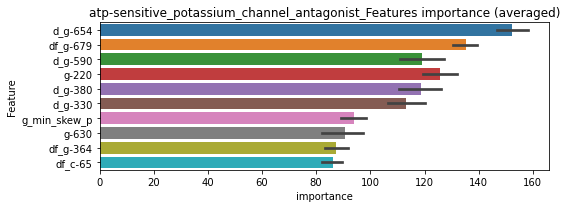

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171646	valid_1's binary_logloss: 0.000222357
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000170636	valid_1's binary_logloss: 0.000221169


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00019158	valid_1's binary_logloss: 0.00253355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000173794	valid_1's binary_logloss: 0.000192422


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000172714	valid_1's binary_logloss: 0.000214037
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000172714	valid_1's binary_logloss: 0.000214037


atp-sensitive_potassium_channel_antagonist logloss: 0.0007901453228053182
atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000715147	valid_1's binary_logloss: 0.00180636
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000278147	valid_1's binary_logloss: 0.000968324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713635	valid_1's binary_logloss: 0.00127004
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000266691	valid_1's binary_logloss: 0.000536662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000707359	valid_1's binary_logloss: 0.00118783
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000263655	valid_1's binary_logloss: 0.000524413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682883	valid_1's binary_logloss: 0.00157247


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000266858	valid_1's binary_logloss: 0.000788421


y_Threshold: 0.0012713, Threshold: 0.0110935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110935, conf_0:0.00777, conf_1:0.01442
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.0410935
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0710935
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1010935
threshold: 0.1010935, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000645523	valid_1's binary_logloss: 0.00121316
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00025731	valid_1's binary_logloss: 0.000561337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643116	valid_1's binary_logloss: 0.0010159
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000255853	valid_1's binary_logloss: 0.00044518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655968	valid_1's binary_logloss: 0.000871242
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000255512	valid_1's binary_logloss: 0.000356794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000649609	valid_1's binary_logloss: 0.00132806


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1653212, Threshold: 0.1010935, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00025258	valid_1's binary_logloss: 0.000633789


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.1010935, conf_0:0.08087, conf_1:0.12131
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1310935
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_2: 0.1610935
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.1910935
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.2210935
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.2510935
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.2810935
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.3110935
threshold: 0.3110935, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000645523	valid_1's binary_logloss: 0.00121316
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00025731	valid_1's binary_logloss: 0.000561337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643116	valid_1's binary_logloss: 0.0010159
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000255853	valid_1's binary_logloss: 0.00044518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655968	valid_1's binary_logloss: 0.000871242
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000255512	valid_1's binary_logloss: 0.000356794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000649609	valid_1's binary_logloss: 0.00132806


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1653212, Threshold: 0.3110935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.3110935, conf_0:0.27998, conf_1:0.34220
threshold: 0.3110935, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00025258	valid_1's binary_logloss: 0.000633789


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


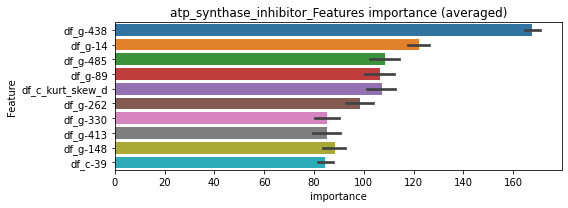

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000257387	valid_1's binary_logloss: 0.000410063
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000255444	valid_1's binary_logloss: 0.000460699
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000261498	valid_1's binary_logloss: 0.000382278


================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0004841411395095261


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000260997	valid_1's binary_logloss: 0.000683524


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


unpredictable_cols:atpase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0443801	valid_1's binary_logloss: 0.123155
[600]	training's binary_logloss: 0.0194246	valid_1's binary_logloss: 0.101933
[900]	training's binary_logloss: 0.0119087	valid_1's binary_logloss: 0.0960185
[1200]	training's binary_logloss: 0.0084678	valid_1's binary_logloss: 0.0930404
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.00779411	valid_1's binary_logloss: 0.0923024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0461308	valid_1's binary_logloss: 0.106164
[600]	training's binary_logloss: 0.0200515	valid_1's binary_logloss: 0.0786315
[900]	training's binary_logloss: 0.0122338	valid_1's binary_logloss: 0.0686126
[1200]	training's binary_logloss: 0.00871586	valid_1's binary_logloss: 0.0637411
[1500]	training's binary_logloss: 0.00674265	valid_1's binary_logloss: 0.0608007
[1800]	training's binary_logloss: 0.00549414	val

1 / 3, AUC score:0.996, PR-AUC:0.992
y_Threshold: 0.0290649, Threshold: 0.0643053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0643053, conf_0:0.04501, conf_1:0.08360
Num_p_label: 13.0, Expected: 16.2, Adj_threshold_1: 0.0943053
threshold: 0.0943053, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 643.0/3774, y_label_rate: 0.1703763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0427018	valid_1's binary_logloss: 0.102438
[600]	training's binary_logloss: 0.0183508	valid_1's binary_logloss: 0.0781902
[900]	training's binary_logloss: 0.0111457	valid_1's binary_logloss: 0.0707296
[1200]	training's binary_logloss: 0.00794736	valid_1's binary_logloss: 0.0672453
[1500]	training's binary_logloss: 0.00617639	valid_1's binary_logloss: 0.0649653
Early stopping, best iteration is:
[1724]	training's binary_logloss: 0.00530213	valid_1's binary_logloss: 0.064038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0428437	valid_1's binary_logloss: 0.10073
[600]	training's binary_logloss: 0.0185058	valid_1's binary_logloss: 0.0763442
[900]	training's binary_logloss: 0.0112942	valid_1's binary_logloss: 0.0684647
[1200]	training's binary_logloss: 0.00805709	valid_1's binary_logloss: 0.0653442
[1500]	training's binary_logloss: 0.00626624	vali

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0495513, Threshold: 0.0943053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 632.0/3752
p_label_rate: 0.0085384 Vs.target_rate: 0.00407
Num_p_label: 34.0, Expected: 16.2, Threshold: 0.0943053, conf_0:0.07544, conf_1:0.11317
Num_p_label: 16.0, Expected: 16.2, Adj_threshold_1: 0.1243053
threshold: 0.1243053, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 632.0/3752, y_label_rate: 0.1684435
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0420115	valid_1's binary_logloss: 0.085254
[600]	training's binary_logloss: 0.0181545	valid_1's binary_logloss: 0.0585498
[900]	training's binary_logloss: 0.0111245	valid_1's binary_logloss: 0.0497682
[1200]	training's binary_logloss: 0.00796475	valid_1's binary_logloss: 0.0449272
[1500]	training's binary_logloss: 0.00617789	valid_1's binary_logloss: 0.0419635
[1800]	training's binary_logloss: 0.00505948	valid_1's binary_logloss: 0.040111
[2100]	training's binary_logloss: 0.00429147	valid_1's binary_logloss: 0.0385016
[2400]	training's binary_logloss: 0.00373596	valid_1's binary_logloss: 0.0374658
[2700]	training's binary_logloss: 0.00330343	valid_1's binary_logloss: 0.0365284
[3000]	training's binary_logloss: 0.00296653	valid_1's binary_logloss: 0.035833
[3300]	training's binary_logloss: 0.00269547	valid_1's binary_logloss: 0.0352443
[3600]	training's binary_logloss: 0.00247659	valid_1's bi

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0501246, Threshold: 0.1243053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 627.0/3742
p_label_rate: 0.0035158 Vs.target_rate: 0.00407
Num_p_label: 14.0, Expected: 16.2, Threshold: 0.1243053, conf_0:0.11187, conf_1:0.13674
threshold: 0.1243053, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 627.0/3742, y_label_rate: 0.1675575


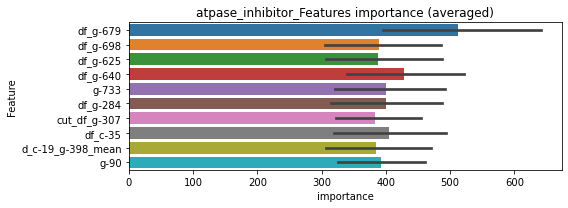

len(train_index) : 2806
len(valid_index) : 936
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.00469149	valid_1's binary_logloss: 0.0463209


len(train_index) : 2806
len(valid_index) : 936
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.00493552	valid_1's binary_logloss: 0.0469767


len(train_index) : 2807
len(valid_index) : 935
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00452295	valid_1's binary_logloss: 0.0336551
[2000]	training's binary_logloss: 0.00223227	valid_1's binary_logloss: 0.0290851
Early stopping, best iteration is:
[2144]	training's binary_logloss: 0.00208915	valid_1's binary_logloss: 0.0287516


len(train_index) : 2807
len(valid_index) : 935
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00438123	valid_1's binary_logloss: 0.0388031
[2000]	training's binary_logloss: 0.00217338	valid_1's binary_logloss: 0.0333419
Early stopping, best iteration is:
[2599]	training's binary_logloss: 0.00170397	valid_1's binary_logloss: 0.0319878


atpase_inhibitor logloss: 0.03851360278380776
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122496	valid_1's binary_logloss: 0.0024518
[600]	training's binary_logloss: 0.000342573	valid_1's binary_logloss: 0.000870494
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000342072	valid_1's binary_logloss: 0.000869368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116649	valid_1's binary_logloss: 0.00411343
[600]	training's binary_logloss: 0.000330472	valid_1's binary_logloss: 0.00197174
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000330659	valid_1's binary_logloss: 0.0019716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119706	valid_1's binary_logloss: 0.00249114
[600]	training's binary_logloss: 0.000338959	valid_1's binary_logloss: 0.000926561
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000338412	valid_1's bin

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017566, Threshold: 0.0081469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0081469, conf_0:0.00570, conf_1:0.01059
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_1: 0.0381469
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0681469


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000339122	valid_1's binary_logloss: 0.00341912


threshold: 0.0681469, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111548	valid_1's binary_logloss: 0.00212922
[600]	training's binary_logloss: 0.000333658	valid_1's binary_logloss: 0.000798508
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000333658	valid_1's binary_logloss: 0.000798508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109386	valid_1's binary_logloss: 0.00448739
[600]	training's binary_logloss: 0.000317186	valid_1's binary_logloss: 0.00253655
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000320817	valid_1's binary_logloss: 0.00253007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011129	valid_1's binary_logloss: 0.00165658
[600]	training's binary_logloss: 0.000325105	valid_1's binary_logloss: 0.000554648
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000325105	valid_1's bi

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0552704, Threshold: 0.0681469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0681469, conf_0:0.05452, conf_1:0.08178
Num_p_label: 14.0, Expected: 3.2, Adj_threshold_1: 0.0981469
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.1281469
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.1581469


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000328005	valid_1's binary_logloss: 0.00304214


Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.1881469
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.2181469
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_6: 0.2481469
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_7: 0.2781469
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_8: 0.3081469
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_9: 0.3381469
threshold: 0.3381469, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111548	valid_1's binary_logloss: 0.00212922
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000333658	valid_1's binary_logloss: 0.000798508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109386	valid_1's binary_logloss: 0.00448739
[600]	training's binary_logloss: 0.000317186	valid_1's binary_logloss: 0.00253655
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000320817	valid_1's binary_logloss: 0.00253007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011129	valid_1's binary_logloss: 0.00165658
[600]	training's binary_logloss: 0.000325105	valid_1's binary_logloss: 0.000554648
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000325105	valid_1's binary_logloss: 0.000554648
Training until validation scores don't improve for 30 rou

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0552704, Threshold: 0.3381469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.3381469, conf_0:0.30433, conf_1:0.37196
threshold: 0.3381469, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


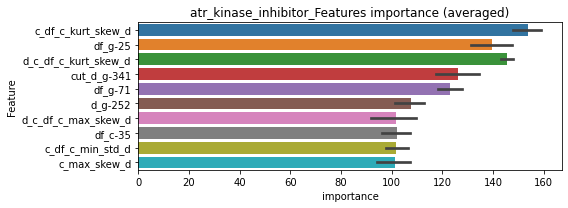

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000333752	valid_1's binary_logloss: 0.000818844


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000323222	valid_1's binary_logloss: 0.0016882


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000331898	valid_1's binary_logloss: 0.000592855


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000326402	valid_1's binary_logloss: 0.00220129


atr_kinase_inhibitor logloss: 0.0013252845849147162
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


unpredictable_cols:aurora_kinase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0498136	valid_1's binary_logloss: 0.121096
[600]	training's binary_logloss: 0.0214762	valid_1's binary_logloss: 0.091149
[900]	training's binary_logloss: 0.0131007	valid_1's binary_logloss: 0.0808111
[1200]	training's binary_logloss: 0.00932415	valid_1's binary_logloss: 0.0760412
[1500]	training's binary_logloss: 0.00721893	valid_1's binary_logloss: 0.0729641
[1800]	training's binary_logloss: 0.0058943	valid_1's binary_logloss: 0.0711197
[2100]	training's binary_logloss: 0.00498127	valid_1's binary_logloss: 0.0695346
Early stopping, best iteration is:
[2350]	training's binary_logloss: 0.00441496	valid_1's binary_logloss: 0.0684207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.050765	valid_1's binary_logloss: 0.103701
[600]	training's binary_logloss: 0.0219741	valid_1's binary_logloss: 0.0697763
[900]	training's binary_logloss: 0.0133457	vali

1 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0257281, Threshold: 0.1298922, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1298922, conf_0:0.09092, conf_1:0.16886
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_1: 0.1598922
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_2: 0.1898922
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_3: 0.2198922
threshold: 0.2198922, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0455348	valid_1's binary_logloss: 0.108662
[600]	training's binary_logloss: 0.0196565	valid_1's binary_logloss: 0.0827824
[900]	training's binary_logloss: 0.0120381	valid_1's binary_logloss: 0.0744055
[1200]	training's binary_logloss: 0.00857548	valid_1's binary_logloss: 0.070169
[1500]	training's binary_logloss: 0.00664049	valid_1's binary_logloss: 0.0679628
Early stopping, best iteration is:
[1741]	training's binary_logloss: 0.00563237	valid_1's binary_logloss: 0.0667841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0457494	valid_1's binary_logloss: 0.0972673
[600]	training's binary_logloss: 0.0197669	valid_1's binary_logloss: 0.0653754
[900]	training's binary_logloss: 0.0121244	valid_1's binary_logloss: 0.0544424
[1200]	training's binary_logloss: 0.00864819	valid_1's binary_logloss: 0.0487284
[1500]	training's binary_logloss: 0.0067153	val

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0527275, Threshold: 0.2198922, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0120542 Vs.target_rate: 0.00403
Num_p_label: 48.0, Expected: 16.1, Threshold: 0.2198922, conf_0:0.17591, conf_1:0.26387
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_1: 0.2498922
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_2: 0.2798922
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_3: 0.3098922
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.3398922
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_5: 0.3698922
threshold: 0.3698922, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 629.0/3747, y_label_rate: 0.1678676
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440804	valid_1's binary_logloss: 0.0945665
[600]	training's binary_logloss: 0.0189075	valid_1's binary_logloss: 0.0636982
[900]	training's binary_logloss: 0.0115777	valid_1's binary_logloss: 0.0527634
[1200]	training's binary_logloss: 0.00827686	valid_1's binary_logloss: 0.0470415
[1500]	training's binary_logloss: 0.00642678	valid_1's binary_logloss: 0.0437322
[1800]	training's binary_logloss: 0.00525287	valid_1's binary_logloss: 0.0414468
[2100]	training's binary_logloss: 0.00444972	valid_1's binary_logloss: 0.039771
Early stopping, best iteration is:
[2286]	training's binary_logloss: 0.00406433	valid_1's binary_logloss: 0.0387884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441246	valid_1's binary_logloss: 0.0940677
[600]	training's binary_logloss: 0.0189415	valid_1's binary_logloss: 0.0663754
[900]	training's binary_logloss: 0.0116164	v

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0698263, Threshold: 0.3698922, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 624.0/3737
p_label_rate: 0.0047715 Vs.target_rate: 0.00403
Num_p_label: 19.0, Expected: 16.1, Threshold: 0.3698922, conf_0:0.33290, conf_1:0.40688
threshold: 0.3698922, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 624.0/3737, y_label_rate: 0.1669789


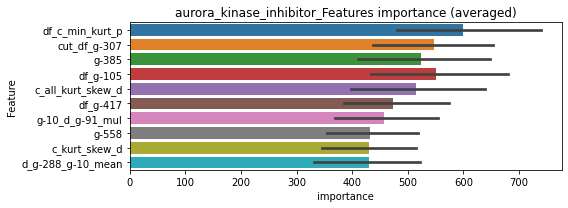

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00458292	valid_1's binary_logloss: 0.054638
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.00355986	valid_1's binary_logloss: 0.0530355


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.00506185	valid_1's binary_logloss: 0.0548784


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00468342	valid_1's binary_logloss: 0.0382074
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.00467866	valid_1's binary_logloss: 0.0381893


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00456384	valid_1's binary_logloss: 0.0487923
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.00353982	valid_1's binary_logloss: 0.0466005


aurora_kinase_inhibitor logloss: 0.04817724784203007
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00033218	valid_1's binary_logloss: 0.00045699
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000161528	valid_1's binary_logloss: 0.000238182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00194571
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000164328	valid_1's binary_logloss: 0.00148819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000336408	valid_1's binary_logloss: 0.000391947
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000165598	valid_1's binary_logloss: 0.000204329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000332168	valid_1's binary_logloss: 0.000501245


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005280, Threshold: 0.0038908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0038908, conf_0:0.00272, conf_1:0.00506
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0338908
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0638908
threshold: 0.0638908, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00016127	valid_1's binary_logloss: 0.000277561


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298087	valid_1's binary_logloss: 0.000931107
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000146987	valid_1's binary_logloss: 0.000642964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299575	valid_1's binary_logloss: 0.000361029
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000148479	valid_1's binary_logloss: 0.00018679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298189	valid_1's binary_logloss: 0.000342318
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000146628	valid_1's binary_logloss: 0.000173715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301617	valid_1's binary_logloss: 0.000314417


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1268334, Threshold: 0.0638908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0097941 Vs.target_rate: 0.00025
Num_p_label: 39.0, Expected: 1.0, Threshold: 0.0638908, conf_0:0.05111, conf_1:0.07667
Num_p_label: 34.0, Expected: 1.0, Adj_threshold_1: 0.0938908
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1238908
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_3: 0.1538908
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_4: 0.1838908
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_5: 0.2138908
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_6: 0.2438908
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_7: 0.2738908
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_8: 0.3038908
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3338908
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_10: 0.3638908


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000148677	valid_1's binary_logloss: 0.000155695


threshold: 0.3638908, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298087	valid_1's binary_logloss: 0.000931107
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000146987	valid_1's binary_logloss: 0.000642964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299575	valid_1's binary_logloss: 0.000361029
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000148479	valid_1's binary_logloss: 0.00018679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298189	valid_1's binary_logloss: 0.000342318
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000146628	valid_1's binary_logloss: 0.000173715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301617	valid_1's binary_logloss: 0.000314417


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1268334, Threshold: 0.3638908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, Expected: 1.0, Threshold: 0.3638908, conf_0:0.32750, conf_1:0.40028
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.3938908
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.4238908
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_3: 0.4538908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.4838908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.5138908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5438908
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_7: 0.5738908
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.6038908
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_9: 0.6338908


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000148677	valid_1's binary_logloss: 0.000155695


threshold: 0.6338908, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


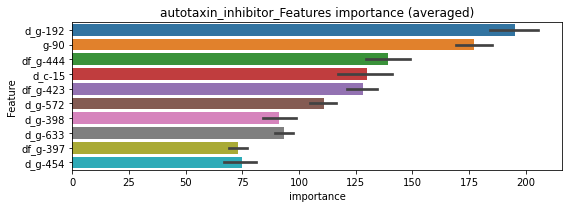

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151908	valid_1's binary_logloss: 0.000466838


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1224]	training's binary_logloss: 0.000148313	valid_1's binary_logloss: 0.000459957
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015206	valid_1's binary_logloss: 0.000203509
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000151114	valid_1's binary_logloss: 0.000202388


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152854	valid_1's binary_logloss: 0.000190399
Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000150149	valid_1's binary_logloss: 0.000187077


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153097	valid_1's binary_logloss: 0.000160742


autotaxin_inhibitor logloss: 0.0002519036501231214


Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000150414	valid_1's binary_logloss: 0.000157974


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039751	valid_1's binary_logloss: 0.0384282
[600]	training's binary_logloss: 0.000706176	valid_1's binary_logloss: 0.0328721
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000674427	valid_1's binary_logloss: 0.0328004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421826	valid_1's binary_logloss: 0.0354124
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000934841	valid_1's binary_logloss: 0.0299105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430825	valid_1's binary_logloss: 0.0132427
[600]	training's binary_logloss: 0.000763552	valid_1's binary_logloss: 0.00451466
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000548193	valid_1's binary_logloss: 0.00375501
Training until validation scores don't improve for 30 rounds
[300]

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0064088, Threshold: 0.0211759, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0211759, conf_0:0.01482, conf_1:0.02753
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_1: 0.0511759
threshold: 0.0511759, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357041	valid_1's binary_logloss: 0.0331506
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000946374	valid_1's binary_logloss: 0.0291401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398986	valid_1's binary_logloss: 0.0198908
[600]	training's binary_logloss: 0.000715846	valid_1's binary_logloss: 0.0110387
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000673597	valid_1's binary_logloss: 0.0108783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376935	valid_1's binary_logloss: 0.025777
[600]	training's binary_logloss: 0.000706935	valid_1's binary_logloss: 0.0192108
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00062771	valid_1's binary_logloss: 0.0188605
Training until validation scores don't improve for 30 rounds
[300]	tr

2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000925274	valid_1's binary_logloss: 0.0232123


y_Threshold: 0.0296312, Threshold: 0.0511759, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0511759, conf_0:0.04094, conf_1:0.06141
Num_p_label: 29.0, Expected: 10.0, Adj_threshold_1: 0.0811759
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1111759
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_3: 0.1411759
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_4: 0.1711759
threshold: 0.1711759, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3794, y_label_rate: 0.1713231
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341814	valid_1's binary_logloss: 0.032219
[600]	training's binary_logloss: 0.000660699	valid_1's binary_logloss: 0.0258981
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000635196	valid_1's binary_logloss: 0.0257505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332362	valid_1's binary_logloss: 0.0349105
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000852929	valid_1's binary_logloss: 0.0308802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362826	valid_1's binary_logloss: 0.020305
[600]	training's binary_logloss: 0.000681294	valid_1's binary_logloss: 0.0150692
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000568111	valid_1's binary_logloss: 0.014579
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259088, Threshold: 0.1711759, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1711759, conf_0:0.15406, conf_1:0.18829
threshold: 0.1711759, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025


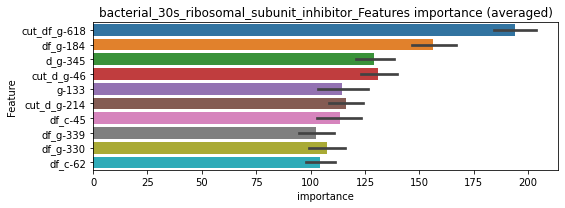

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000616433	valid_1's binary_logloss: 0.010997


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.0010711	valid_1's binary_logloss: 0.0176817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000661477	valid_1's binary_logloss: 0.0210007


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000548267	valid_1's binary_logloss: 0.0136674


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015836706918716147
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543208	valid_1's binary_logloss: 0.0548092
[600]	training's binary_logloss: 0.000926377	valid_1's binary_logloss: 0.0450794
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000952094	valid_1's binary_logloss: 0.0449473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599072	valid_1's binary_logloss: 0.034321
[600]	training's binary_logloss: 0.00098334	valid_1's binary_logloss: 0.0234547
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000895604	valid_1's binary_logloss: 0.0233848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00548862	valid_1's binary_logloss: 0.0409423
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.0012646	valid_1's binary_logloss: 0.0365572
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0091765, Threshold: 0.0262137, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0262137, conf_0:0.01835, conf_1:0.03408
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_1: 0.0562137
threshold: 0.0562137, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3790, y_label_rate: 0.1709763
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466691	valid_1's binary_logloss: 0.0380603
[600]	training's binary_logloss: 0.000862202	valid_1's binary_logloss: 0.0289081
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000651236	valid_1's binary_logloss: 0.028178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476255	valid_1's binary_logloss: 0.0373925
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000993976	valid_1's binary_logloss: 0.0288486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476873	valid_1's binary_logloss: 0.0453942
[600]	training's binary_logloss: 0.000859962	valid_1's binary_logloss: 0.0380589
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000869093	valid_1's binary_logloss: 0.0380321
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0312413, Threshold: 0.0562137, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0082873 Vs.target_rate: 0.00336
Num_p_label: 33.0, Expected: 13.4, Threshold: 0.0562137, conf_0:0.04497, conf_1:0.06746
Num_p_label: 15.0, Expected: 13.4, Adj_threshold_1: 0.0862137
threshold: 0.0862137, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 642.0/3778, y_label_rate: 0.1699312
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469346	valid_1's binary_logloss: 0.0418197
[600]	training's binary_logloss: 0.000853636	valid_1's binary_logloss: 0.03269
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000593791	valid_1's binary_logloss: 0.0319193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042152	valid_1's binary_logloss: 0.0328352
[600]	training's binary_logloss: 0.00081766	valid_1's binary_logloss: 0.0238478
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00063104	valid_1's binary_logloss: 0.0234772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469703	valid_1's binary_logloss: 0.0238584
[600]	training's binary_logloss: 0.000868461	valid_1's binary_logloss: 0.016642
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000752494	valid_1's binary_logloss: 0.

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280538, Threshold: 0.0862137, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3772
p_label_rate: 0.0045203 Vs.target_rate: 0.00336
Num_p_label: 18.0, Expected: 13.4, Threshold: 0.0862137, conf_0:0.07759, conf_1:0.09484
threshold: 0.0862137, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 639.0/3772, y_label_rate: 0.1694062


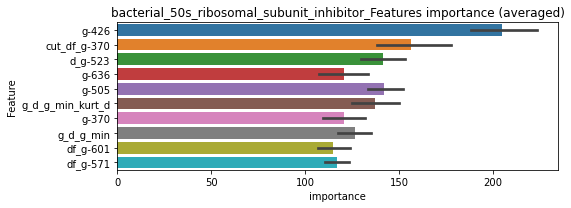

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00112042	valid_1's binary_logloss: 0.0365401
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00104394	valid_1's binary_logloss: 0.0233264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000970243	valid_1's binary_logloss: 0.0200943


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000885104	valid_1's binary_logloss: 0.0234945


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.025863823080983624
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202181	valid_1's binary_logloss: 0.00992526
[600]	training's binary_logloss: 0.000452487	valid_1's binary_logloss: 0.00544584
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438782	valid_1's binary_logloss: 0.00541629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202061	valid_1's binary_logloss: 0.0153282
[600]	training's binary_logloss: 0.000449123	valid_1's binary_logloss: 0.00958483
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000428071	valid_1's binary_logloss: 0.00951524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207873	valid_1's binary_logloss: 0.00629524
[600]	training's binary_logloss: 0.000461472	valid_1's binary_logloss: 0.00336827
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000431475	valid_1's binar

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028181, Threshold: 0.0181039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0181039, conf_0:0.01267, conf_1:0.02354
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.0481039
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0781039
threshold: 0.0781039, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191179	valid_1's binary_logloss: 0.00930102
[600]	training's binary_logloss: 0.000439604	valid_1's binary_logloss: 0.00490067
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000417194	valid_1's binary_logloss: 0.00481503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189002	valid_1's binary_logloss: 0.0151224
[600]	training's binary_logloss: 0.000432839	valid_1's binary_logloss: 0.0105215
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000439771	valid_1's binary_logloss: 0.0105054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193321	valid_1's binary_logloss: 0.00601243
[600]	training's binary_logloss: 0.000446287	valid_1's binary_logloss: 0.00298347
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000421236	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0605757, Threshold: 0.0781039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0110497 Vs.target_rate: 0.00151
Num_p_label: 44.0, Expected: 6.0, Threshold: 0.0781039, conf_0:0.06248, conf_1:0.09372
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_1: 0.1081039
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_2: 0.1381039
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1681039
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_4: 0.1981039
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_5: 0.2281039
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_6: 0.2581039
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_7: 0.2881039
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3181039
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_9: 0.3481039
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_10: 0.3781039
threshold: 0.3781039, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180508	valid_1's binary_logloss: 0.0155353
[600]	training's binary_logloss: 0.000425872	valid_1's binary_logloss: 0.0109574
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000431205	valid_1's binary_logloss: 0.0109242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187969	valid_1's binary_logloss: 0.00993279
[600]	training's binary_logloss: 0.000432256	valid_1's binary_logloss: 0.00567286
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00042581	valid_1's binary_logloss: 0.00565466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195733	valid_1's binary_logloss: 0.00561761
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000484481	valid_1's binary_logloss: 0.00313246
Training until validation scores don't improve for 30 rounds
[3

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0746355, Threshold: 0.3781039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0060271 Vs.target_rate: 0.00151
Num_p_label: 24.0, Expected: 6.0, Threshold: 0.3781039, conf_0:0.34029, conf_1:0.41591
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.4081039
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.4381039
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.4681039
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.4981039
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.5281039
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_6: 0.5581039
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_7: 0.5881039
threshold: 0.5881039, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


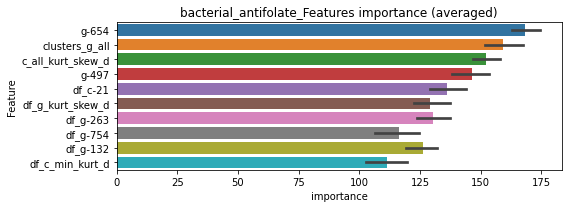

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000450467	valid_1's binary_logloss: 0.00890348


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000419675	valid_1's binary_logloss: 0.00371109


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.00043456	valid_1's binary_logloss: 0.00304422


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413786	valid_1's binary_logloss: 0.00276184
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000413786	valid_1's binary_logloss: 0.00276184


bacterial_antifolate logloss: 0.004606857747218308


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 6396
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 6396


unpredictable_cols:bacterial_cell_wall_synthesis_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.051652	valid_1's binary_logloss: 0.11915
[600]	training's binary_logloss: 0.0223375	valid_1's binary_logloss: 0.0949054
[900]	training's binary_logloss: 0.0136058	valid_1's binary_logloss: 0.0876871
[1200]	training's binary_logloss: 0.00971493	valid_1's binary_logloss: 0.0844408
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.0099234	valid_1's binary_logloss: 0.084417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0523817	valid_1's binary_logloss: 0.107321
[600]	training's binary_logloss: 0.0223104	valid_1's binary_logloss: 0.0845765
[900]	training's binary_logloss: 0.0133493	valid_1's binary_logloss: 0.0782234
[1200]	training's binary_logloss: 0.00939031	valid_1's binary_logloss: 0.0755645
Early stopping, best iteration is:
[1370]	training's binary_logloss: 0.00801103	valid_1's binary_logloss: 0.0745662
Training until 

1 / 3, AUC score:0.991, PR-AUC:0.980
y_Threshold: 0.0374098, Threshold: 0.0832944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 338 → Positive_corect_labels: 1238/7337
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0832944, conf_0:0.05831, conf_1:0.10828
threshold: 0.0832944, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1238.0/7337, y_label_rate: 0.1687338
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0442823	valid_1's binary_logloss: 0.0895173
[600]	training's binary_logloss: 0.018425	valid_1's binary_logloss: 0.0666806
[900]	training's binary_logloss: 0.0108904	valid_1's binary_logloss: 0.0584245
[1200]	training's binary_logloss: 0.00759983	valid_1's binary_logloss: 0.0553973
[1500]	training's binary_logloss: 0.00581168	valid_1's binary_logloss: 0.0535275
Early stopping, best iteration is:
[1558]	training's binary_logloss: 0.00555745	valid_1's binary_logloss: 0.0533403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0445561	valid_1's binary_logloss: 0.0880664
[600]	training's binary_logloss: 0.0185895	valid_1's binary_logloss: 0.0658657
[900]	training's binary_logloss: 0.0110225	valid_1's binary_logloss: 0.0589446
[1200]	training's binary_logloss: 0.00767335	valid_1's binary_logloss: 0.055621
[1500]	training's binary_logloss: 0.00584573	va

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0695594, Threshold: 0.0832944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1193.0/7247
p_label_rate: 0.0173280 Vs.target_rate: 0.00806
Num_p_label: 69.0, Expected: 32.1, Threshold: 0.0832944, conf_0:0.06664, conf_1:0.09995
Num_p_label: 45.0, Expected: 32.1, Adj_threshold_1: 0.1132944
threshold: 0.1132944, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1193.0/7247, y_label_rate: 0.1646198
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375193	valid_1's binary_logloss: 0.0833813
[600]	training's binary_logloss: 0.0156133	valid_1's binary_logloss: 0.0613684
[900]	training's binary_logloss: 0.00929657	valid_1's binary_logloss: 0.0546262
[1200]	training's binary_logloss: 0.00651136	valid_1's binary_logloss: 0.0513069
[1500]	training's binary_logloss: 0.00499971	valid_1's binary_logloss: 0.0495734
[1800]	training's binary_logloss: 0.00404851	valid_1's binary_logloss: 0.0486603
Early stopping, best iteration is:
[1926]	training's binary_logloss: 0.00374739	valid_1's binary_logloss: 0.0481871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0384768	valid_1's binary_logloss: 0.0749947
[600]	training's binary_logloss: 0.0160073	valid_1's binary_logloss: 0.0515817
[900]	training's binary_logloss: 0.00958842	valid_1's binary_logloss: 0.0446068
[1200]	training's binary_logloss: 0.0066951

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0584266, Threshold: 0.1132944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 1176.0/7213
p_label_rate: 0.0095429 Vs.target_rate: 0.00806
Num_p_label: 38.0, Expected: 32.1, Threshold: 0.1132944, conf_0:0.10196, conf_1:0.12462
threshold: 0.1132944, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1176.0/7213, y_label_rate: 0.1630390


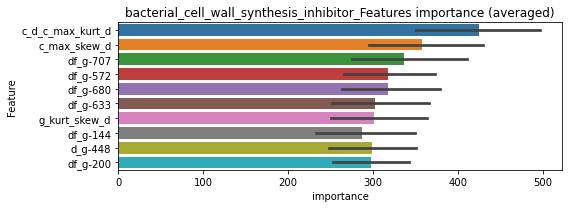

len(train_index) : 5409
len(valid_index) : 1804
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00349545	valid_1's binary_logloss: 0.0379556
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.00269178	valid_1's binary_logloss: 0.036736


len(train_index) : 5410
len(valid_index) : 1803
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00340835	valid_1's binary_logloss: 0.0377877
[2000]	training's binary_logloss: 0.00165169	valid_1's binary_logloss: 0.0346081
Early stopping, best iteration is:
[2237]	training's binary_logloss: 0.00148089	valid_1's binary_logloss: 0.0341848


len(train_index) : 5410
len(valid_index) : 1803
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00354983	valid_1's binary_logloss: 0.0306915
Early stopping, best iteration is:
[1370]	training's binary_logloss: 0.00251296	valid_1's binary_logloss: 0.0287923


len(train_index) : 5410
len(valid_index) : 1803
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00347251	valid_1's binary_logloss: 0.0309257
Early stopping, best iteration is:
[1767]	training's binary_logloss: 0.001889	valid_1's binary_logloss: 0.029044


bacterial_cell_wall_synthesis_inhibitor logloss: 0.03218990353627187
bacterial_cell_wall_synthesis_inhibitor is unpredictable(><)!
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


unpredictable_cols:bacterial_dna_gyrase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0448033	valid_1's binary_logloss: 0.0892198
[600]	training's binary_logloss: 0.019409	valid_1's binary_logloss: 0.0601046
[900]	training's binary_logloss: 0.0118556	valid_1's binary_logloss: 0.0500182
[1200]	training's binary_logloss: 0.0084259	valid_1's binary_logloss: 0.0447872
[1500]	training's binary_logloss: 0.00651976	valid_1's binary_logloss: 0.0414092
[1800]	training's binary_logloss: 0.00532118	valid_1's binary_logloss: 0.0392925
[2100]	training's binary_logloss: 0.00450214	valid_1's binary_logloss: 0.0376729
[2400]	training's binary_logloss: 0.00390814	valid_1's binary_logloss: 0.0364575
[2700]	training's binary_logloss: 0.00344579	valid_1's binary_logloss: 0.0353411
[3000]	training's binary_logloss: 0.00309085	valid_1's binary_logloss: 0.0344375
[3300]	training's binary_logloss: 0.00280735	valid_1's binary_logloss: 0.0338341
[3600]	training's binary_logloss: 0.00257697	valid_1's 

1 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0235779, Threshold: 0.0602466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 646/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0602466, conf_0:0.04217, conf_1:0.07832
Num_p_label: 24.0, Expected: 14.9, Adj_threshold_1: 0.0902466
Num_p_label: 13.0, Expected: 14.9, Adj_threshold_2: 0.1202466
threshold: 0.1202466, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040127	valid_1's binary_logloss: 0.0931129
[600]	training's binary_logloss: 0.0173163	valid_1's binary_logloss: 0.0684551
[900]	training's binary_logloss: 0.0106679	valid_1's binary_logloss: 0.0608395
[1200]	training's binary_logloss: 0.0076158	valid_1's binary_logloss: 0.0567043
[1500]	training's binary_logloss: 0.00591347	valid_1's binary_logloss: 0.0542451
Early stopping, best iteration is:
[1740]	training's binary_logloss: 0.00502481	valid_1's binary_logloss: 0.0531198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0402047	valid_1's binary_logloss: 0.100978
[600]	training's binary_logloss: 0.0171583	valid_1's binary_logloss: 0.0758684
[900]	training's binary_logloss: 0.0105268	valid_1's binary_logloss: 0.0674078
[1200]	training's binary_logloss: 0.00752585	valid_1's binary_logloss: 0.0633883
[1500]	training's binary_logloss: 0.00585844	val

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0506886, Threshold: 0.1202466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 635.0/3759
p_label_rate: 0.0067805 Vs.target_rate: 0.00374
Num_p_label: 27.0, Expected: 14.9, Threshold: 0.1202466, conf_0:0.09620, conf_1:0.14430
Num_p_label: 15.0, Expected: 14.9, Adj_threshold_1: 0.1502466
threshold: 0.1502466, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0397013	valid_1's binary_logloss: 0.0772678
[600]	training's binary_logloss: 0.0170818	valid_1's binary_logloss: 0.0514612
[900]	training's binary_logloss: 0.0104791	valid_1's binary_logloss: 0.0431217
[1200]	training's binary_logloss: 0.00748102	valid_1's binary_logloss: 0.0388438
[1500]	training's binary_logloss: 0.00582585	valid_1's binary_logloss: 0.0364281
[1800]	training's binary_logloss: 0.00476614	valid_1's binary_logloss: 0.0347708
Early stopping, best iteration is:
[1921]	training's binary_logloss: 0.00444423	valid_1's binary_logloss: 0.0341614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0396144	valid_1's binary_logloss: 0.0757418
[600]	training's binary_logloss: 0.0170554	valid_1's binary_logloss: 0.0489879
[900]	training's binary_logloss: 0.0104725	valid_1's binary_logloss: 0.0401293
[1200]	training's binary_logloss: 0.00750316	

3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0607240, Threshold: 0.1502466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 630.0/3749
p_label_rate: 0.0040181 Vs.target_rate: 0.00374
Num_p_label: 16.0, Expected: 14.9, Threshold: 0.1502466, conf_0:0.13522, conf_1:0.16527
threshold: 0.1502466, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 630.0/3749, y_label_rate: 0.1680448


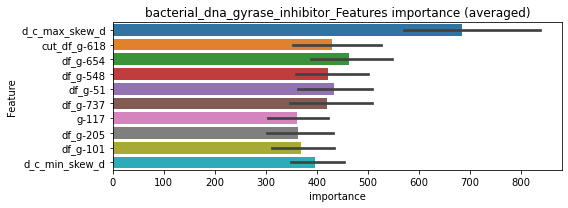

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00419777	valid_1's binary_logloss: 0.0347852
Early stopping, best iteration is:
[1273]	training's binary_logloss: 0.00326864	valid_1's binary_logloss: 0.0332048


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00414762	valid_1's binary_logloss: 0.040089
Early stopping, best iteration is:
[1832]	training's binary_logloss: 0.00224188	valid_1's binary_logloss: 0.0361877


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00413385	valid_1's binary_logloss: 0.0404815
Early stopping, best iteration is:
[1817]	training's binary_logloss: 0.00226854	valid_1's binary_logloss: 0.0371038


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00415267	valid_1's binary_logloss: 0.0376807
Early stopping, best iteration is:
[1843]	training's binary_logloss: 0.00223744	valid_1's binary_logloss: 0.0334919


bacterial_dna_gyrase_inhibitor logloss: 0.034996590922091834
bacterial_dna_gyrase_inhibitor is unpredictable(><)!
bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


mutually exclusive columns: bacterial_dna_inhibitor
selected negative label: 2020


unpredictable_cols:bacterial_dna_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0729004	valid_1's binary_logloss: 0.209238
[600]	training's binary_logloss: 0.0330812	valid_1's binary_logloss: 0.180932
[900]	training's binary_logloss: 0.0204227	valid_1's binary_logloss: 0.172209
[1200]	training's binary_logloss: 0.0145609	valid_1's binary_logloss: 0.169015
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.0132775	valid_1's binary_logloss: 0.168345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0777467	valid_1's binary_logloss: 0.166774
[600]	training's binary_logloss: 0.0356358	valid_1's binary_logloss: 0.126235
[900]	training's binary_logloss: 0.0220085	valid_1's binary_logloss: 0.111569
[1200]	training's binary_logloss: 0.0156425	valid_1's binary_logloss: 0.104384
[1500]	training's binary_logloss: 0.0120516	valid_1's binary_logloss: 0.0995607
[1800]	training's binary_logloss: 0.00979652	valid_1's bi

1 / 3, AUC score:0.971, PR-AUC:0.946
y_Threshold: 0.0651939, Threshold: 0.1399834, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 374/2283
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1399834, conf_0:0.09799, conf_1:0.18198
Num_p_label: 23.0, Expected: 19.2, Adj_threshold_1: 0.1699834
threshold: 0.1699834, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 374.0/2283, y_label_rate: 0.1638195
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0623974	valid_1's binary_logloss: 0.163376
[600]	training's binary_logloss: 0.0280702	valid_1's binary_logloss: 0.133542
[900]	training's binary_logloss: 0.0174485	valid_1's binary_logloss: 0.123712
[1200]	training's binary_logloss: 0.0124927	valid_1's binary_logloss: 0.119093
[1500]	training's binary_logloss: 0.00973189	valid_1's binary_logloss: 0.115991
Early stopping, best iteration is:
[1665]	training's binary_logloss: 0.0086615	valid_1's binary_logloss: 0.11531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0649477	valid_1's binary_logloss: 0.150346
[600]	training's binary_logloss: 0.0291915	valid_1's binary_logloss: 0.11753
[900]	training's binary_logloss: 0.0180872	valid_1's binary_logloss: 0.107614
[1200]	training's binary_logloss: 0.0129631	valid_1's binary_logloss: 0.103391
[1500]	training's binary_logloss: 0.0100656	valid_1's binary

2 / 3, AUC score:0.990, PR-AUC:0.975
y_Threshold: 0.0926405, Threshold: 0.1699834, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 347.0/2229
p_label_rate: 0.0090407 Vs.target_rate: 0.00483
Num_p_label: 36.0, Expected: 19.2, Threshold: 0.1699834, conf_0:0.13599, conf_1:0.20398
Num_p_label: 23.0, Expected: 19.2, Adj_threshold_1: 0.1999834
threshold: 0.1999834, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 347.0/2229, y_label_rate: 0.1556752
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0583456	valid_1's binary_logloss: 0.137641
[600]	training's binary_logloss: 0.0262018	valid_1's binary_logloss: 0.106739
[900]	training's binary_logloss: 0.0162992	valid_1's binary_logloss: 0.0974549
[1200]	training's binary_logloss: 0.0116984	valid_1's binary_logloss: 0.0919306
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.0117463	valid_1's binary_logloss: 0.0919134
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0593893	valid_1's binary_logloss: 0.154081
[600]	training's binary_logloss: 0.0266954	valid_1's binary_logloss: 0.118488
[900]	training's binary_logloss: 0.016675	valid_1's binary_logloss: 0.106156
[1200]	training's binary_logloss: 0.0119676	valid_1's binary_logloss: 0.0999431
[1500]	training's binary_logloss: 0.00930774	valid_1's binary_logloss: 0.0966277
[1800]	training's binary_logloss: 0.00761231	valid_1's

3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0800671, Threshold: 0.1999834, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 331.0/2197
p_label_rate: 0.0040181 Vs.target_rate: 0.00483
Num_p_label: 16.0, Expected: 19.2, Threshold: 0.1999834, conf_0:0.17999, conf_1:0.21998
threshold: 0.1999834, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 331.0/2197, y_label_rate: 0.1506600


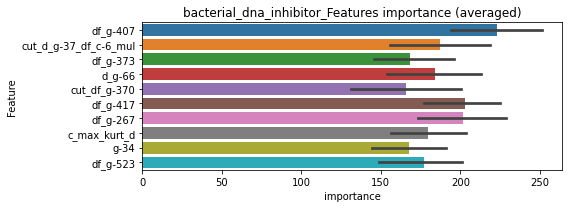

len(train_index) : 1647
len(valid_index) : 550
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1648
len(valid_index) : 549
================================= fold 2/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.0121408	valid_1's binary_logloss: 0.103545
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00644015	valid_1's binary_logloss: 0.0734413
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.00652322	valid_1's binary_logloss: 0.0733862


len(train_index) : 1648
len(valid_index) : 549
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.00745495	valid_1's binary_logloss: 0.0758816


len(train_index) : 1648
len(valid_index) : 549
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00660422	valid_1's binary_logloss: 0.0508882
Early stopping, best iteration is:
[1617]	training's binary_logloss: 0.00401723	valid_1's binary_logloss: 0.0456738


bacterial_dna_inhibitor logloss: 0.07463484999622244
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000968045	valid_1's binary_logloss: 0.00284747
[600]	training's binary_logloss: 0.000286776	valid_1's binary_logloss: 0.00127948
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000286944	valid_1's binary_logloss: 0.00127942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000960968	valid_1's binary_logloss: 0.00468952
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.0002902	valid_1's binary_logloss: 0.00287135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100354	valid_1's binary_logloss: 0.00150874
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000297389	valid_1's binary_logloss: 0.000526329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000991224	valid_1's binary_logloss: 0.004750

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015214, Threshold: 0.0039328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0039328, conf_0:0.00275, conf_1:0.00511
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0339328
threshold: 0.0339328, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000916243	valid_1's binary_logloss: 0.00261512
[600]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.0012626
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281366	valid_1's binary_logloss: 0.00126236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000886299	valid_1's binary_logloss: 0.004803
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000295069	valid_1's binary_logloss: 0.00320953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000925636	valid_1's binary_logloss: 0.00131353
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287448	valid_1's binary_logloss: 0.000457898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906275	valid_1's binary_logloss: 0.005287

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0433589, Threshold: 0.0339328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0339328, conf_0:0.02715, conf_1:0.04072
threshold: 0.0339328, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00028545	valid_1's binary_logloss: 0.00371316


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000916243	valid_1's binary_logloss: 0.00261512
[600]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.0012626
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281366	valid_1's binary_logloss: 0.00126236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000886299	valid_1's binary_logloss: 0.004803
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000295069	valid_1's binary_logloss: 0.00320953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000925636	valid_1's binary_logloss: 0.00131353
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287448	valid_1's binary_logloss: 0.000457898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906275	valid_1's binary_logloss: 0.005287

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0433589, Threshold: 0.0339328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0339328, conf_0:0.03054, conf_1:0.03733


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00028545	valid_1's binary_logloss: 0.00371316


threshold: 0.0339328, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


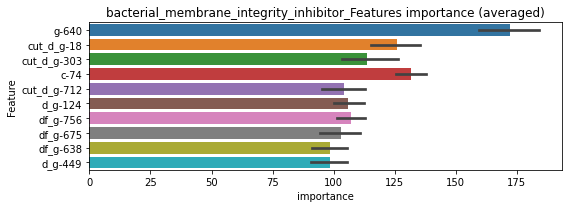

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000290827	valid_1's binary_logloss: 0.00141336


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000283095	valid_1's binary_logloss: 0.00230608


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000288371	valid_1's binary_logloss: 0.000496144


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000284219	valid_1's binary_logloss: 0.00227767


bacterial_membrane_integrity_inhibitor logloss: 0.0016238373715886985
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190879	valid_1's binary_logloss: 0.0105315
[600]	training's binary_logloss: 0.000411748	valid_1's binary_logloss: 0.00723529
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000414286	valid_1's binary_logloss: 0.00722071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177873	valid_1's binary_logloss: 0.0132309
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000418787	valid_1's binary_logloss: 0.0108196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186397	valid_1's binary_logloss: 0.00404603
[600]	training's binary_logloss: 0.000408853	valid_1's binary_logloss: 0.00121588
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000399295	valid_1's binary_logloss: 0.00119106
Training until validation scores don't improve for 30 rounds
[

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027790, Threshold: 0.0132667, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0132667, conf_0:0.00929, conf_1:0.01725
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_1: 0.0432667
threshold: 0.0432667, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170967	valid_1's binary_logloss: 0.00913849
[600]	training's binary_logloss: 0.000392898	valid_1's binary_logloss: 0.00681949
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391529	valid_1's binary_logloss: 0.00681054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169858	valid_1's binary_logloss: 0.0127808
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000403428	valid_1's binary_logloss: 0.0101803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177261	valid_1's binary_logloss: 0.00311132
[600]	training's binary_logloss: 0.000402374	valid_1's binary_logloss: 0.000909505
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000397387	valid_1's binary_logloss: 0.000899028
Training until validation scores don't improve for 30 round

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246045, Threshold: 0.0432667, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0432667, conf_0:0.03461, conf_1:0.05192
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0732667
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.1032667
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_3: 0.1332667
threshold: 0.1332667, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164119	valid_1's binary_logloss: 0.0119256
[600]	training's binary_logloss: 0.000379667	valid_1's binary_logloss: 0.00852348
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000382618	valid_1's binary_logloss: 0.00851227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166026	valid_1's binary_logloss: 0.00512585
[600]	training's binary_logloss: 0.000386288	valid_1's binary_logloss: 0.00291479
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000385733	valid_1's binary_logloss: 0.00291133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172491	valid_1's binary_logloss: 0.00411491
[600]	training's binary_logloss: 0.000395934	valid_1's binary_logloss: 0.00166251
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000382397	valid_1's binar

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0200587, Threshold: 0.1332667, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.1332667, conf_0:0.11994, conf_1:0.14659
threshold: 0.1332667, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


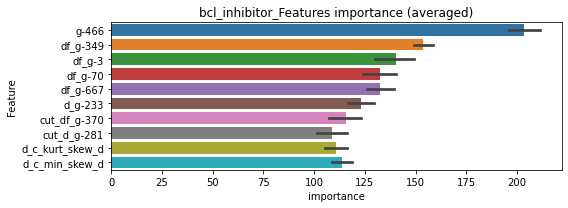

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000382823	valid_1's binary_logloss: 0.0064851


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000384256	valid_1's binary_logloss: 0.00192761


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000389538	valid_1's binary_logloss: 0.00153803


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000374705	valid_1's binary_logloss: 0.00216616
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000375737	valid_1's binary_logloss: 0.0021628


bcl_inhibitor logloss: 0.003030841067619618
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199869	valid_1's binary_logloss: 0.0169088
[600]	training's binary_logloss: 0.000450808	valid_1's binary_logloss: 0.0109197
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000444894	valid_1's binary_logloss: 0.0108686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203207	valid_1's binary_logloss: 0.0086974
[600]	training's binary_logloss: 0.000459557	valid_1's binary_logloss: 0.00495942
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000452165	valid_1's binary_logloss: 0.00492317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215999	valid_1's binary_logloss: 0.00390936
[600]	training's binary_logloss: 0.000473034	valid_1's binary_logloss: 0.00112223
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000444006	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031553, Threshold: 0.0580888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0580888, conf_0:0.04066, conf_1:0.07552
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_1: 0.0880888
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_2: 0.1180888
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_3: 0.1480888
threshold: 0.1480888, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181466	valid_1's binary_logloss: 0.0160704
[600]	training's binary_logloss: 0.000435066	valid_1's binary_logloss: 0.0104867
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000431817	valid_1's binary_logloss: 0.0104389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187933	valid_1's binary_logloss: 0.00671422
[600]	training's binary_logloss: 0.000445348	valid_1's binary_logloss: 0.00397891
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000436264	valid_1's binary_logloss: 0.00394062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198889	valid_1's binary_logloss: 0.00445765
[600]	training's binary_logloss: 0.000453531	valid_1's binary_logloss: 0.0014077
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000444929	valid_1's binary_l

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271587, Threshold: 0.1480888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0145655 Vs.target_rate: 0.00160
Num_p_label: 58.0, Expected: 6.4, Threshold: 0.1480888, conf_0:0.11847, conf_1:0.17771
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.1780888
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_2: 0.2080888
Num_p_label: 49.0, Expected: 6.4, Adj_threshold_3: 0.2380888
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_4: 0.2680888
Num_p_label: 43.0, Expected: 6.4, Adj_threshold_5: 0.2980888
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_6: 0.3280888
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3580888
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_8: 0.3880888
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_9: 0.4180888
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_10: 0.4480888
threshold: 0.4480888, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182017	valid_1's binary_logloss: 0.00755261
[600]	training's binary_logloss: 0.000438455	valid_1's binary_logloss: 0.00371766
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418157	valid_1's binary_logloss: 0.00365975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184464	valid_1's binary_logloss: 0.0129091
[600]	training's binary_logloss: 0.000445604	valid_1's binary_logloss: 0.00930771
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000448027	valid_1's binary_logloss: 0.0092975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185412	valid_1's binary_logloss: 0.0111977
[600]	training's binary_logloss: 0.000437817	valid_1's binary_logloss: 0.00755124
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000431847	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0487819, Threshold: 0.4480888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4480888, conf_0:0.40328, conf_1:0.49290
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_1: 0.4780888
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_2: 0.5080888
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_3: 0.5380888
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_4: 0.5680888
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_5: 0.5980888
threshold: 0.5980888, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


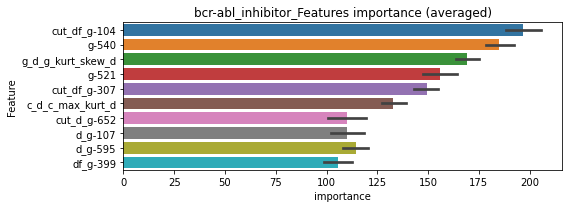

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000422146	valid_1's binary_logloss: 0.00294759
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000422644	valid_1's binary_logloss: 0.00294552


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000516016	valid_1's binary_logloss: 0.00727701


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000443496	valid_1's binary_logloss: 0.00803432


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000544233	valid_1's binary_logloss: 0.00554527


bcr-abl_inhibitor logloss: 0.005952401715177404
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473183	valid_1's binary_logloss: 0.0354281
[600]	training's binary_logloss: 0.000791234	valid_1's binary_logloss: 0.0273777
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000708816	valid_1's binary_logloss: 0.0270629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048141	valid_1's binary_logloss: 0.0432554
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000920091	valid_1's binary_logloss: 0.0354153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00502907	valid_1's binary_logloss: 0.0213524
[600]	training's binary_logloss: 0.000816014	valid_1's binary_logloss: 0.0113762
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000570381	valid_1's binary_logloss: 0.0104604
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0071070, Threshold: 0.0163415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0163415, conf_0:0.01144, conf_1:0.02124
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_1: 0.0463415
threshold: 0.0463415, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435784	valid_1's binary_logloss: 0.0366525
[600]	training's binary_logloss: 0.000753076	valid_1's binary_logloss: 0.0274333
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00077279	valid_1's binary_logloss: 0.0273354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444509	valid_1's binary_logloss: 0.0341516
[600]	training's binary_logloss: 0.000765989	valid_1's binary_logloss: 0.0234649
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000760553	valid_1's binary_logloss: 0.0233944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0045144	valid_1's binary_logloss: 0.0192926
[600]	training's binary_logloss: 0.000786917	valid_1's binary_logloss: 0.00967106
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000569316	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311654, Threshold: 0.0463415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0052737 Vs.target_rate: 0.00281
Num_p_label: 21.0, Expected: 11.2, Threshold: 0.0463415, conf_0:0.03707, conf_1:0.05561
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_1: 0.0763415
threshold: 0.0763415, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445214	valid_1's binary_logloss: 0.0320406
[600]	training's binary_logloss: 0.000773066	valid_1's binary_logloss: 0.0213667
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.00055582	valid_1's binary_logloss: 0.0203997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424862	valid_1's binary_logloss: 0.0310705
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000835426	valid_1's binary_logloss: 0.0228316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435182	valid_1's binary_logloss: 0.0353439
[600]	training's binary_logloss: 0.000763254	valid_1's binary_logloss: 0.0267962
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000681779	valid_1's binary_logloss: 0.0264527
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0273052, Threshold: 0.0763415, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0022602 Vs.target_rate: 0.00281
Num_p_label: 9.0, Expected: 11.2, Threshold: 0.0763415, conf_0:0.06871, conf_1:0.08398
threshold: 0.0763415, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 650.0/3791, y_label_rate: 0.1714587


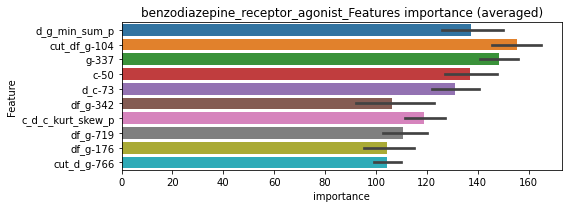

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000838495	valid_1's binary_logloss: 0.028176


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000675576	valid_1's binary_logloss: 0.0123864


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000565473	valid_1's binary_logloss: 0.00963372


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000598658	valid_1's binary_logloss: 0.0151855


benzodiazepine_receptor_agonist logloss: 0.016345731743785934
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138033	valid_1's binary_logloss: 0.00364973
[600]	training's binary_logloss: 0.000358488	valid_1's binary_logloss: 0.00166304
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000358488	valid_1's binary_logloss: 0.00166304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133849	valid_1's binary_logloss: 0.00631087
[600]	training's binary_logloss: 0.000351971	valid_1's binary_logloss: 0.00395695
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351971	valid_1's binary_logloss: 0.00395695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140229	valid_1's binary_logloss: 0.0029235
[600]	training's binary_logloss: 0.000363453	valid_1's binary_logloss: 0.00103972
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000363453	valid_1's binar

1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000361051	valid_1's binary_logloss: 0.00528187


y_Threshold: 0.0019125, Threshold: 0.0086646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0086646, conf_0:0.00607, conf_1:0.01126
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0386646
threshold: 0.0386646, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131623	valid_1's binary_logloss: 0.00352185
[600]	training's binary_logloss: 0.000352552	valid_1's binary_logloss: 0.00153553
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0003531	valid_1's binary_logloss: 0.00153393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128402	valid_1's binary_logloss: 0.00527851
[600]	training's binary_logloss: 0.000347878	valid_1's binary_logloss: 0.00308287
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035026	valid_1's binary_logloss: 0.00307721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133111	valid_1's binary_logloss: 0.00281573
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000365388	valid_1's binary_logloss: 0.00110154
Training until validation scores don't improve for 30 rounds
[

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0296080, Threshold: 0.0386646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, Expected: 4.0, Threshold: 0.0386646, conf_0:0.03093, conf_1:0.04640
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0686646
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0986646


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000358445	valid_1's binary_logloss: 0.00524215


threshold: 0.0986646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131623	valid_1's binary_logloss: 0.00352185
[600]	training's binary_logloss: 0.000352552	valid_1's binary_logloss: 0.00153553
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0003531	valid_1's binary_logloss: 0.00153393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128402	valid_1's binary_logloss: 0.00527851
[600]	training's binary_logloss: 0.000347878	valid_1's binary_logloss: 0.00308287
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035026	valid_1's binary_logloss: 0.00307721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133111	valid_1's binary_logloss: 0.00281573
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000365388	valid_1's binary_logloss: 0.00110154
Training until validation scores don't improve for 30 rounds
[

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0296080, Threshold: 0.0986646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0986646, conf_0:0.08880, conf_1:0.10853


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000358445	valid_1's binary_logloss: 0.00524215


threshold: 0.0986646, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


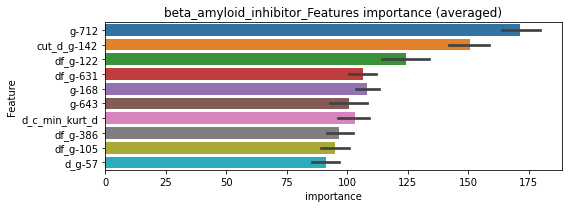

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000359936	valid_1's binary_logloss: 0.00134693


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000368454	valid_1's binary_logloss: 0.00307996


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00036787	valid_1's binary_logloss: 0.00107842


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000375948	valid_1's binary_logloss: 0.00682411


beta_amyloid_inhibitor logloss: 0.0030824037264861447
bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457532	valid_1's binary_logloss: 0.0440823
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000996641	valid_1's binary_logloss: 0.0344968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462843	valid_1's binary_logloss: 0.0364105
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000921402	valid_1's binary_logloss: 0.027585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539207	valid_1's binary_logloss: 0.0178416
[600]	training's binary_logloss: 0.000873794	valid_1's binary_logloss: 0.00791862
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000635032	valid_1's binary_logloss: 0.00728316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00495698	valid_1's binary_logloss: 0.0282079
[600]	

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069377, Threshold: 0.0172666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0172666, conf_0:0.01209, conf_1:0.02245
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_1: 0.0472666
threshold: 0.0472666, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447228	valid_1's binary_logloss: 0.0430964
[600]	training's binary_logloss: 0.000799076	valid_1's binary_logloss: 0.0326658
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000612481	valid_1's binary_logloss: 0.0319101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450064	valid_1's binary_logloss: 0.0342406
[600]	training's binary_logloss: 0.000798427	valid_1's binary_logloss: 0.0250017
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000629555	valid_1's binary_logloss: 0.0243627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00497235	valid_1's binary_logloss: 0.0170677
[600]	training's binary_logloss: 0.000851362	valid_1's binary_logloss: 0.00740847
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000607788	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0288247, Threshold: 0.0472666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00286
Num_p_label: 18.0, Expected: 11.4, Threshold: 0.0472666, conf_0:0.03781, conf_1:0.05672
Num_p_label: 11.0, Expected: 11.4, Adj_threshold_1: 0.0772666
threshold: 0.0772666, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464121	valid_1's binary_logloss: 0.0367836
[600]	training's binary_logloss: 0.000804578	valid_1's binary_logloss: 0.028276
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000719196	valid_1's binary_logloss: 0.0281488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462369	valid_1's binary_logloss: 0.0367776
[600]	training's binary_logloss: 0.000808126	valid_1's binary_logloss: 0.0265793
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000850081	valid_1's binary_logloss: 0.0263816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048158	valid_1's binary_logloss: 0.0238727
[600]	training's binary_logloss: 0.000825952	valid_1's binary_logloss: 0.013797
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000602355	valid_1's binary_logloss:

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304983, Threshold: 0.0772666, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0027624 Vs.target_rate: 0.00286
Num_p_label: 11.0, Expected: 11.4, Threshold: 0.0772666, conf_0:0.06954, conf_1:0.08499
threshold: 0.0772666, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


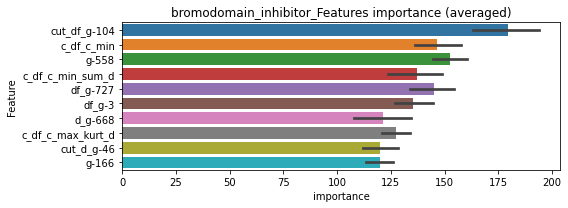

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00103626	valid_1's binary_logloss: 0.0257491


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000698205	valid_1's binary_logloss: 0.0257492


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000758895	valid_1's binary_logloss: 0.0179692


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000931025	valid_1's binary_logloss: 0.0167786


bromodomain_inhibitor logloss: 0.02156154348909917
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182291	valid_1's binary_logloss: 0.0106578
[600]	training's binary_logloss: 0.000415483	valid_1's binary_logloss: 0.00690676
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000404467	valid_1's binary_logloss: 0.00690261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176543	valid_1's binary_logloss: 0.00698116
[600]	training's binary_logloss: 0.000411762	valid_1's binary_logloss: 0.00360092
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00038137	valid_1's binary_logloss: 0.0035284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018684	valid_1's binary_logloss: 0.00525998
[600]	training's binary_logloss: 0.000418148	valid_1's binary_logloss: 0.00206806
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000388314	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027272, Threshold: 0.0219843, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0219843, conf_0:0.01539, conf_1:0.02858
Num_p_label: 19.0, Expected: 4.8, Adj_threshold_1: 0.0519843
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_2: 0.0819843
threshold: 0.0819843, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165505	valid_1's binary_logloss: 0.0107415
[600]	training's binary_logloss: 0.000395206	valid_1's binary_logloss: 0.0072336
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000381436	valid_1's binary_logloss: 0.00720394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168649	valid_1's binary_logloss: 0.00584485
[600]	training's binary_logloss: 0.000396127	valid_1's binary_logloss: 0.00327753
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000397972	valid_1's binary_logloss: 0.00326381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173051	valid_1's binary_logloss: 0.00435303
[600]	training's binary_logloss: 0.000400829	valid_1's binary_logloss: 0.00167949
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000383238	valid_1's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371209, Threshold: 0.0819843, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00122
Num_p_label: 26.0, Expected: 4.8, Threshold: 0.0819843, conf_0:0.06559, conf_1:0.09838
Num_p_label: 19.0, Expected: 4.8, Adj_threshold_1: 0.1119843
Num_p_label: 18.0, Expected: 4.8, Adj_threshold_2: 0.1419843
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_3: 0.1719843
threshold: 0.1719843, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165505	valid_1's binary_logloss: 0.0107415
[600]	training's binary_logloss: 0.000395206	valid_1's binary_logloss: 0.0072336
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000381436	valid_1's binary_logloss: 0.00720394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168649	valid_1's binary_logloss: 0.00584485
[600]	training's binary_logloss: 0.000396127	valid_1's binary_logloss: 0.00327753
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000397972	valid_1's binary_logloss: 0.00326381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173051	valid_1's binary_logloss: 0.00435303
[600]	training's binary_logloss: 0.000400829	valid_1's binary_logloss: 0.00167949
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000383238	valid_1's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371209, Threshold: 0.1719843, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, Expected: 4.8, Threshold: 0.1719843, conf_0:0.15479, conf_1:0.18918
threshold: 0.1719843, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


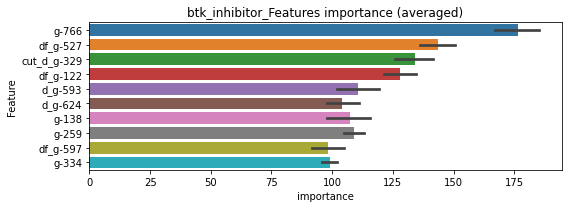

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000429971	valid_1's binary_logloss: 0.00632626


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000394285	valid_1's binary_logloss: 0.00267231


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000381107	valid_1's binary_logloss: 0.00122808
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000381114	valid_1's binary_logloss: 0.00122806


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000378642	valid_1's binary_logloss: 0.00191988
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000376821	valid_1's binary_logloss: 0.00191337


btk_inhibitor logloss: 0.0030350051407534192
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626955	valid_1's binary_logloss: 0.00165605
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000247439	valid_1's binary_logloss: 0.000884748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000622386	valid_1's binary_logloss: 0.00192551
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000248677	valid_1's binary_logloss: 0.00109147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636368	valid_1's binary_logloss: 0.000873222
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247742	valid_1's binary_logloss: 0.000370103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000614302	valid_1's binary_logloss: 0.00156117


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011459, Threshold: 0.0135028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0135028, conf_0:0.00945, conf_1:0.01755
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0435028
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0735028
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1035028


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000245838	valid_1's binary_logloss: 0.000890948


threshold: 0.1035028, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000567902	valid_1's binary_logloss: 0.00222754
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000232145	valid_1's binary_logloss: 0.00133001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570865	valid_1's binary_logloss: 0.00171
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000233473	valid_1's binary_logloss: 0.00100049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570134	valid_1's binary_logloss: 0.000718477
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000232677	valid_1's binary_logloss: 0.000307487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570828	valid_1's binary_logloss: 0.00158188


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1065803, Threshold: 0.1035028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0118031 Vs.target_rate: 0.00050
Num_p_label: 47.0, Expected: 2.0, Threshold: 0.1035028, conf_0:0.08280, conf_1:0.12420
Num_p_label: 45.0, Expected: 2.0, Adj_threshold_1: 0.1335028
Num_p_label: 42.0, Expected: 2.0, Adj_threshold_2: 0.1635028
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1935028
Num_p_label: 36.0, Expected: 2.0, Adj_threshold_4: 0.2235028
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_5: 0.2535028


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000231756	valid_1's binary_logloss: 0.000963333


Num_p_label: 33.0, Expected: 2.0, Adj_threshold_6: 0.2835028
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_7: 0.3135028
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_8: 0.3435028
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_9: 0.3735028
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_10: 0.4035028
threshold: 0.4035028, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000567902	valid_1's binary_logloss: 0.00222754
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000232145	valid_1's binary_logloss: 0.00133001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570865	valid_1's binary_logloss: 0.00171
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000233473	valid_1's binary_logloss: 0.00100049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570134	valid_1's binary_logloss: 0.000718477
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000232677	valid_1's binary_logloss: 0.000307487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570828	valid_1's binary_logloss: 0.00158188


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1065803, Threshold: 0.4035028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.4035028, conf_0:0.36315, conf_1:0.44385
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.4335028
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.4635028
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4935028
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5235028
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_5: 0.5535028
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_6: 0.5835028
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.6135028


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000231756	valid_1's binary_logloss: 0.000963333


Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.6435028
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.6735028
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_10: 0.7035028
threshold: 0.7035028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


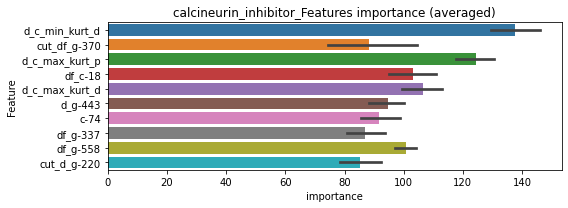

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000235157	valid_1's binary_logloss: 0.000681541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000241428	valid_1's binary_logloss: 0.000710842
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000237108	valid_1's binary_logloss: 0.000346635
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005549496060278698


Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00023716	valid_1's binary_logloss: 0.000480753
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6900
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6900


unpredictable_cols:calcium_channel_blocker → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.067367	valid_1's binary_logloss: 0.138981
[600]	training's binary_logloss: 0.030077	valid_1's binary_logloss: 0.118885
[900]	training's binary_logloss: 0.0181191	valid_1's binary_logloss: 0.112676
[1200]	training's binary_logloss: 0.0128016	valid_1's binary_logloss: 0.110372
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0129134	valid_1's binary_logloss: 0.110318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0653219	valid_1's binary_logloss: 0.156272
[600]	training's binary_logloss: 0.0289267	valid_1's binary_logloss: 0.140036
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.0186454	valid_1's binary_logloss: 0.136424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0665013	valid_1's binary_logloss: 0.155342
[600]	training's binary_logloss: 0.0298092	v

1 / 3, AUC score:0.974, PR-AUC:0.947
y_Threshold: 0.0509644, Threshold: 0.0949808, pos_neg_ratio: 0.8000000
Remove_noisy_data: 506 → Positive_corect_labels: 1265/7774
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.0949808, conf_0:0.06649, conf_1:0.12348
threshold: 0.0949808, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1265.0/7774, y_label_rate: 0.1627219
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0476898	valid_1's binary_logloss: 0.115238
[600]	training's binary_logloss: 0.020261	valid_1's binary_logloss: 0.0950506
[900]	training's binary_logloss: 0.0119641	valid_1's binary_logloss: 0.0900561
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.0114271	valid_1's binary_logloss: 0.0896789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0480271	valid_1's binary_logloss: 0.102285
[600]	training's binary_logloss: 0.0203381	valid_1's binary_logloss: 0.0826573
[900]	training's binary_logloss: 0.0120184	valid_1's binary_logloss: 0.0771677
[1200]	training's binary_logloss: 0.00838433	valid_1's binary_logloss: 0.0746435
Early stopping, best iteration is:
[1310]	training's binary_logloss: 0.00751851	valid_1's binary_logloss: 0.0741145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.

2 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0675694, Threshold: 0.0949808, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1205.0/7654
p_label_rate: 0.0148167 Vs.target_rate: 0.01180
Num_p_label: 59.0, Expected: 47.0, Threshold: 0.0949808, conf_0:0.07598, conf_1:0.11398
threshold: 0.0949808, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 1205.0/7654, y_label_rate: 0.1574340
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0393434	valid_1's binary_logloss: 0.0844933
[600]	training's binary_logloss: 0.0165948	valid_1's binary_logloss: 0.0654501
[900]	training's binary_logloss: 0.00989601	valid_1's binary_logloss: 0.0602655
[1200]	training's binary_logloss: 0.0068906	valid_1's binary_logloss: 0.0584881
Early stopping, best iteration is:
[1203]	training's binary_logloss: 0.0068669	valid_1's binary_logloss: 0.0584476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0406976	valid_1's binary_logloss: 0.0791957
[600]	training's binary_logloss: 0.0171864	valid_1's binary_logloss: 0.0583931
[900]	training's binary_logloss: 0.0102322	valid_1's binary_logloss: 0.0522771
[1200]	training's binary_logloss: 0.00712514	valid_1's binary_logloss: 0.0495872
[1500]	training's binary_logloss: 0.005437	valid_1's binary_logloss: 0.0482377
Early stopping, best iteration is:
[1594]	traini

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0530190, Threshold: 0.0949808, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1171.0/7586
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.0949808, conf_0:0.08548, conf_1:0.10448
threshold: 0.0949808, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1171.0/7586, y_label_rate: 0.1543633


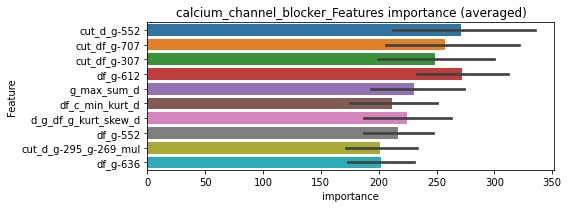

len(train_index) : 5689
len(valid_index) : 1897
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00343265	valid_1's binary_logloss: 0.0348799
Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.00309086	valid_1's binary_logloss: 0.0344052


len(train_index) : 5689
len(valid_index) : 1897
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00488251	valid_1's binary_logloss: 0.0486387


len(train_index) : 5690
len(valid_index) : 1896
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00480367	valid_1's binary_logloss: 0.0489015


len(train_index) : 5690
len(valid_index) : 1896
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00379686	valid_1's binary_logloss: 0.0394568


calcium_channel_blocker logloss: 0.04285020305381714
calcium_channel_blocker is unpredictable(><)!
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267016	valid_1's binary_logloss: 0.0231627
[600]	training's binary_logloss: 0.000523309	valid_1's binary_logloss: 0.0163087
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000520614	valid_1's binary_logloss: 0.0162831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286665	valid_1's binary_logloss: 0.0115215
[600]	training's binary_logloss: 0.000540071	valid_1's binary_logloss: 0.00612009
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000505081	valid_1's binary_logloss: 0.00605358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00278433	valid_1's binary_logloss: 0.00684495
[600]	training's binary_logloss: 0.000545861	valid_1's binary_logloss: 0.0026146
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000487029	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036661, Threshold: 0.0157028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0157028, conf_0:0.01099, conf_1:0.02041
Num_p_label: 9.0, Expected: 7.0, Adj_threshold_1: 0.0457028
threshold: 0.0457028, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240673	valid_1's binary_logloss: 0.0218685
[600]	training's binary_logloss: 0.000497579	valid_1's binary_logloss: 0.0156561
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000498343	valid_1's binary_logloss: 0.0156548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264478	valid_1's binary_logloss: 0.0113594
[600]	training's binary_logloss: 0.000524961	valid_1's binary_logloss: 0.00663678
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000489	valid_1's binary_logloss: 0.0065417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258078	valid_1's binary_logloss: 0.00620616
[600]	training's binary_logloss: 0.000529732	valid_1's binary_logloss: 0.00220282
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000481944	valid_1's binary_loglo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0438458, Threshold: 0.0457028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00176
Num_p_label: 37.0, Expected: 7.0, Threshold: 0.0457028, conf_0:0.03656, conf_1:0.05484
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0757028
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1057028
threshold: 0.1057028, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240673	valid_1's binary_logloss: 0.0218685
[600]	training's binary_logloss: 0.000497579	valid_1's binary_logloss: 0.0156561
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000498343	valid_1's binary_logloss: 0.0156548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264478	valid_1's binary_logloss: 0.0113594
[600]	training's binary_logloss: 0.000524961	valid_1's binary_logloss: 0.00663678
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000489	valid_1's binary_logloss: 0.0065417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258078	valid_1's binary_logloss: 0.00620616
[600]	training's binary_logloss: 0.000529732	valid_1's binary_logloss: 0.00220282
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000481944	valid_1's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0438458, Threshold: 0.1057028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.1057028, conf_0:0.09513, conf_1:0.11627
threshold: 0.1057028, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


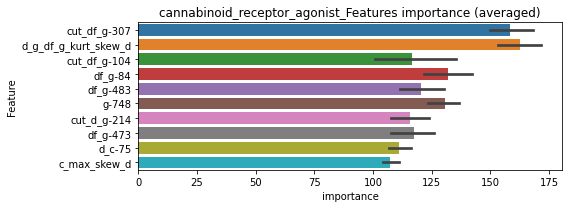

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000514613	valid_1's binary_logloss: 0.0150582


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000530707	valid_1's binary_logloss: 0.00625961


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.00048154	valid_1's binary_logloss: 0.00210911


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000473577	valid_1's binary_logloss: 0.00751217


cannabinoid_receptor_agonist logloss: 0.007739094312311576
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321604	valid_1's binary_logloss: 0.0342575
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000933275	valid_1's binary_logloss: 0.0304063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316186	valid_1's binary_logloss: 0.0267848
[600]	training's binary_logloss: 0.000631254	valid_1's binary_logloss: 0.019082
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000523666	valid_1's binary_logloss: 0.0187008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342406	valid_1's binary_logloss: 0.0152659
[600]	training's binary_logloss: 0.000662226	valid_1's binary_logloss: 0.0100569
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00053694	valid_1's binary_logloss: 0.00963198
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043579, Threshold: 0.0186458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0186458, conf_0:0.01305, conf_1:0.02424
Num_p_label: 10.0, Expected: 9.2, Adj_threshold_1: 0.0486458
threshold: 0.0486458, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030217	valid_1's binary_logloss: 0.0324626
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00124917	valid_1's binary_logloss: 0.0294604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298283	valid_1's binary_logloss: 0.0274656
[600]	training's binary_logloss: 0.000617529	valid_1's binary_logloss: 0.0209672
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000602596	valid_1's binary_logloss: 0.0208916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003276	valid_1's binary_logloss: 0.0147827
[600]	training's binary_logloss: 0.000651511	valid_1's binary_logloss: 0.00942463
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000528364	valid_1's binary_logloss: 0.00899489
Training until validation scores don't improve for 30 rounds
[300]	tr

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170349, Threshold: 0.0486458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00231
Num_p_label: 27.0, Expected: 9.2, Threshold: 0.0486458, conf_0:0.03892, conf_1:0.05837
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0786458
threshold: 0.0786458, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299596	valid_1's binary_logloss: 0.0178921
[600]	training's binary_logloss: 0.000606584	valid_1's binary_logloss: 0.0128213
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00050968	valid_1's binary_logloss: 0.0125301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285562	valid_1's binary_logloss: 0.0255314
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000649661	valid_1's binary_logloss: 0.019901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291349	valid_1's binary_logloss: 0.0188252
[600]	training's binary_logloss: 0.000615307	valid_1's binary_logloss: 0.0125517
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000536368	valid_1's binary_logloss: 0.012086
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182648, Threshold: 0.0786458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0040181 Vs.target_rate: 0.00231
Num_p_label: 16.0, Expected: 9.2, Threshold: 0.0786458, conf_0:0.07078, conf_1:0.08651
threshold: 0.0786458, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


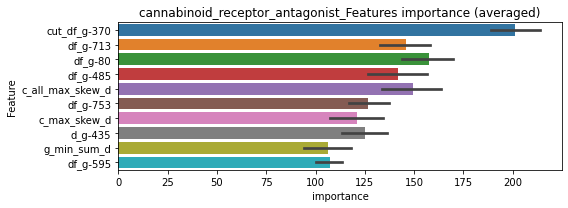

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000524839	valid_1's binary_logloss: 0.014585


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000814416	valid_1's binary_logloss: 0.0230425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000526825	valid_1's binary_logloss: 0.00548739


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000596462	valid_1's binary_logloss: 0.0125962


cannabinoid_receptor_antagonist logloss: 0.01392778409318148
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248246	valid_1's binary_logloss: 0.01403
[600]	training's binary_logloss: 0.0004803	valid_1's binary_logloss: 0.00807972
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000465209	valid_1's binary_logloss: 0.00805833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239847	valid_1's binary_logloss: 0.00861904
[600]	training's binary_logloss: 0.000491316	valid_1's binary_logloss: 0.00473967
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000480941	valid_1's binary_logloss: 0.00471581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248605	valid_1's binary_logloss: 0.00542492
[600]	training's binary_logloss: 0.000495205	valid_1's binary_logloss: 0.00160368
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000461174	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031655, Threshold: 0.0267386, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0267386, conf_0:0.01872, conf_1:0.03476
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0567386
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0867386
threshold: 0.0867386, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226249	valid_1's binary_logloss: 0.0125494
[600]	training's binary_logloss: 0.000469645	valid_1's binary_logloss: 0.00718873
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446583	valid_1's binary_logloss: 0.00713691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218437	valid_1's binary_logloss: 0.00779455
[600]	training's binary_logloss: 0.000475097	valid_1's binary_logloss: 0.00429309
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000487191	valid_1's binary_logloss: 0.00427252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022688	valid_1's binary_logloss: 0.00439908
[600]	training's binary_logloss: 0.000476785	valid_1's binary_logloss: 0.00128079
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000464672	valid_1's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0378969, Threshold: 0.0867386, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0095429 Vs.target_rate: 0.00151
Num_p_label: 38.0, Expected: 6.0, Threshold: 0.0867386, conf_0:0.06939, conf_1:0.10409
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.1167386
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.1467386
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1767386
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.2067386
threshold: 0.2067386, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226249	valid_1's binary_logloss: 0.0125494
[600]	training's binary_logloss: 0.000469645	valid_1's binary_logloss: 0.00718873
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446583	valid_1's binary_logloss: 0.00713691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218437	valid_1's binary_logloss: 0.00779455
[600]	training's binary_logloss: 0.000475097	valid_1's binary_logloss: 0.00429309
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000487191	valid_1's binary_logloss: 0.00427252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022688	valid_1's binary_logloss: 0.00439908
[600]	training's binary_logloss: 0.000476785	valid_1's binary_logloss: 0.00128079
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000464672	valid_1's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0378969, Threshold: 0.2067386, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.2067386, conf_0:0.18606, conf_1:0.22741
threshold: 0.2067386, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


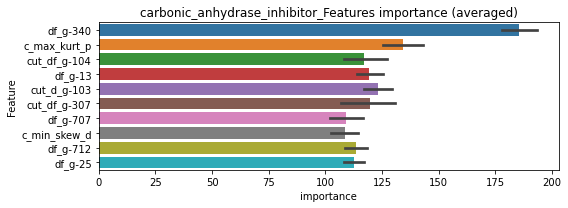

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000464653	valid_1's binary_logloss: 0.00609015


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000472609	valid_1's binary_logloss: 0.00361036


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000473608	valid_1's binary_logloss: 0.00143734


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.005926366322413452


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000647125	valid_1's binary_logloss: 0.0125676


casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174274	valid_1's binary_logloss: 0.012845
[600]	training's binary_logloss: 0.000413752	valid_1's binary_logloss: 0.00856202
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000400457	valid_1's binary_logloss: 0.00846284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188254	valid_1's binary_logloss: 0.00680107
[600]	training's binary_logloss: 0.000417627	valid_1's binary_logloss: 0.00295155
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000392647	valid_1's binary_logloss: 0.00287968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191775	valid_1's binary_logloss: 0.00389101
[600]	training's binary_logloss: 0.000427792	valid_1's binary_logloss: 0.00139063
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000406014	valid_1's binary

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023100, Threshold: 0.0054544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0054544, conf_0:0.00382, conf_1:0.00709
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0354544
threshold: 0.0354544, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017103	valid_1's binary_logloss: 0.0115768
[600]	training's binary_logloss: 0.000399102	valid_1's binary_logloss: 0.00734893
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000383488	valid_1's binary_logloss: 0.00727632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178102	valid_1's binary_logloss: 0.00621946
[600]	training's binary_logloss: 0.000409195	valid_1's binary_logloss: 0.00269382
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000386362	valid_1's binary_logloss: 0.00266599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179358	valid_1's binary_logloss: 0.00338316
[600]	training's binary_logloss: 0.00041493	valid_1's binary_logloss: 0.00126522
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000388571	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211393, Threshold: 0.0354544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0354544, conf_0:0.02836, conf_1:0.04255
threshold: 0.0354544, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017103	valid_1's binary_logloss: 0.0115768
[600]	training's binary_logloss: 0.000399102	valid_1's binary_logloss: 0.00734893
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000383488	valid_1's binary_logloss: 0.00727632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178102	valid_1's binary_logloss: 0.00621946
[600]	training's binary_logloss: 0.000409195	valid_1's binary_logloss: 0.00269382
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000386362	valid_1's binary_logloss: 0.00266599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179358	valid_1's binary_logloss: 0.00338316
[600]	training's binary_logloss: 0.00041493	valid_1's binary_logloss: 0.00126522
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000388571	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211393, Threshold: 0.0354544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0354544, conf_0:0.03191, conf_1:0.03900
threshold: 0.0354544, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


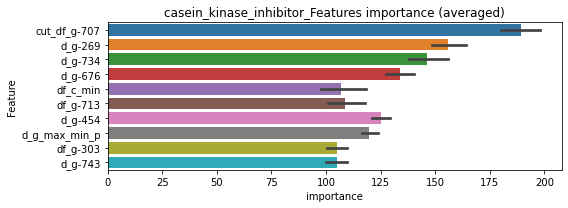

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000393299	valid_1's binary_logloss: 0.00898627


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392872	valid_1's binary_logloss: 0.0025649
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000392872	valid_1's binary_logloss: 0.0025649


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000401801	valid_1's binary_logloss: 0.000927093


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000435478	valid_1's binary_logloss: 0.0111862


casein_kinase_inhibitor logloss: 0.005916038095457505
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000856555	valid_1's binary_logloss: 0.00226054
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000302824	valid_1's binary_logloss: 0.00133131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000858405	valid_1's binary_logloss: 0.00229491
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000294176	valid_1's binary_logloss: 0.00118279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866487	valid_1's binary_logloss: 0.00298367
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00029948	valid_1's binary_logloss: 0.00199732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000855596	valid_1's binary_logloss: 0.00164293


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013028, Threshold: 0.0174835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0174835, conf_0:0.01224, conf_1:0.02273
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0474835
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0774835
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1074835


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000292606	valid_1's binary_logloss: 0.000697271


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.1374835
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.1674835
threshold: 0.1674835, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802805	valid_1's binary_logloss: 0.00160187
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.000813947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806852	valid_1's binary_logloss: 0.00351295
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000281947	valid_1's binary_logloss: 0.00242726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000823327	valid_1's binary_logloss: 0.0029769
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000292805	valid_1's binary_logloss: 0.00191786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806384	valid_1's binary_logloss: 0.00151515


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0594465, Threshold: 0.1674835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.1674835, conf_0:0.13399, conf_1:0.20098
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.1974835
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.2274835
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_3: 0.2574835
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.2874835
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.3174835


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000280508	valid_1's binary_logloss: 0.000643807


Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.3474835
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_7: 0.3774835
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_8: 0.4074835
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_9: 0.4374835
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_10: 0.4674835
threshold: 0.4674835, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000802805	valid_1's binary_logloss: 0.00160187
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.000813947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806852	valid_1's binary_logloss: 0.00351295
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000281947	valid_1's binary_logloss: 0.00242726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000823327	valid_1's binary_logloss: 0.0029769
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000292805	valid_1's binary_logloss: 0.00191786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000806384	valid_1's binary_logloss: 0.00151515


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0594465, Threshold: 0.4674835, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00076
Num_p_label: 11.0, Expected: 3.0, Threshold: 0.4674835, conf_0:0.42074, conf_1:0.51423
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.4974835


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000280508	valid_1's binary_logloss: 0.000643807


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.5274835
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.5574835
threshold: 0.5574835, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


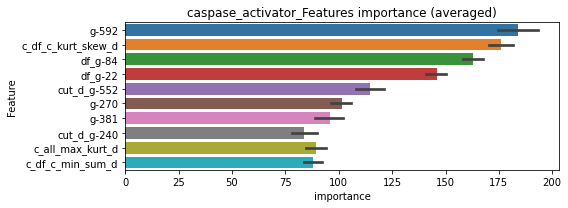

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953


Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000289312	valid_1's binary_logloss: 0.000722737


================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000285469	valid_1's binary_logloss: 0.00102439


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000288862	valid_1's binary_logloss: 0.00185319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000282729	valid_1's binary_logloss: 0.000573154


caspase_activator logloss: 0.0010436444945567498
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000948884	valid_1's binary_logloss: 0.00497927
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00030772	valid_1's binary_logloss: 0.00303353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000973031	valid_1's binary_logloss: 0.00253377
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000305618	valid_1's binary_logloss: 0.00133638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000990679	valid_1's binary_logloss: 0.00156654
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000309081	valid_1's binary_logloss: 0.000560244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946602	valid_1's binary_logloss: 0.010094


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017871, Threshold: 0.0084900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0084900, conf_0:0.00594, conf_1:0.01104
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0384900
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0684900


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000309126	valid_1's binary_logloss: 0.00740954


threshold: 0.0684900, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889465	valid_1's binary_logloss: 0.00460478
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000292642	valid_1's binary_logloss: 0.00281957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000899075	valid_1's binary_logloss: 0.00201881
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000293281	valid_1's binary_logloss: 0.000935046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000908459	valid_1's binary_logloss: 0.00126265
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000297848	valid_1's binary_logloss: 0.000441886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000872421	valid_1's binary_logloss: 0.00866703


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383934, Threshold: 0.0684900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, Expected: 3.0, Threshold: 0.0684900, conf_0:0.05479, conf_1:0.08219
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.0984900
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.1284900
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1584900


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000296341	valid_1's binary_logloss: 0.0062002


threshold: 0.1584900, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889465	valid_1's binary_logloss: 0.00460478
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000292642	valid_1's binary_logloss: 0.00281957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000899075	valid_1's binary_logloss: 0.00201881
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000293281	valid_1's binary_logloss: 0.000935046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000908459	valid_1's binary_logloss: 0.00126265
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000297848	valid_1's binary_logloss: 0.000441886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000872421	valid_1's binary_logloss: 0.00866703
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00029

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383934, Threshold: 0.1584900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1584900, conf_0:0.14264, conf_1:0.17434
threshold: 0.1584900, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


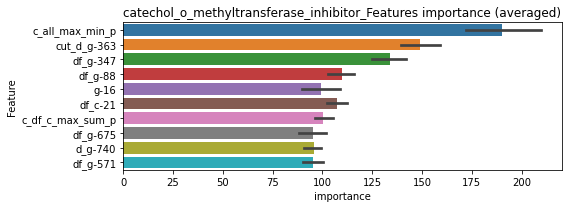

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000296321	valid_1's binary_logloss: 0.00159731


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000294428	valid_1's binary_logloss: 0.000892156


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000299585	valid_1's binary_logloss: 0.000472023


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000295638	valid_1's binary_logloss: 0.00332749


catechol_o_methyltransferase_inhibitor logloss: 0.0015723531526136171
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


unpredictable_cols:cc_chemokine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0468634	valid_1's binary_logloss: 0.130429
[600]	training's binary_logloss: 0.0203777	valid_1's binary_logloss: 0.107924
[900]	training's binary_logloss: 0.0124503	valid_1's binary_logloss: 0.101053
[1200]	training's binary_logloss: 0.00884796	valid_1's binary_logloss: 0.0979249
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.00829635	valid_1's binary_logloss: 0.0973027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491446	valid_1's binary_logloss: 0.108904
[600]	training's binary_logloss: 0.0214161	valid_1's binary_logloss: 0.080986
[900]	training's binary_logloss: 0.0130284	valid_1's binary_logloss: 0.070945
[1200]	training's binary_logloss: 0.0092582	valid_1's binary_logloss: 0.0658037
[1500]	training's binary_logloss: 0.00716194	valid_1's binary_logloss: 0.0628547
[1800]	training's binary_logloss: 0.00583791	valid_

1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0291137, Threshold: 0.0719855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 644/3778
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.0719855, conf_0:0.05039, conf_1:0.09358
Num_p_label: 20.0, Expected: 17.1, Adj_threshold_1: 0.1019855
threshold: 0.1019855, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 644.0/3778, y_label_rate: 0.1704606
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045479	valid_1's binary_logloss: 0.120099
[600]	training's binary_logloss: 0.0195396	valid_1's binary_logloss: 0.093221
[900]	training's binary_logloss: 0.0119724	valid_1's binary_logloss: 0.0852304
[1200]	training's binary_logloss: 0.00851548	valid_1's binary_logloss: 0.0807552
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.00681424	valid_1's binary_logloss: 0.0782941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0457101	valid_1's binary_logloss: 0.111965
[600]	training's binary_logloss: 0.0197288	valid_1's binary_logloss: 0.0838444
[900]	training's binary_logloss: 0.0120437	valid_1's binary_logloss: 0.0747061
[1200]	training's binary_logloss: 0.00856621	valid_1's binary_logloss: 0.070173
[1500]	training's binary_logloss: 0.00662777	valid_1's binary_logloss: 0.0677092
[1800]	training's binary_logloss: 0.00541117	valid

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0608260, Threshold: 0.1019855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 625.0/3740
p_label_rate: 0.0128076 Vs.target_rate: 0.00428
Num_p_label: 51.0, Expected: 17.1, Threshold: 0.1019855, conf_0:0.08159, conf_1:0.12238
Num_p_label: 30.0, Expected: 17.1, Adj_threshold_1: 0.1319855
Num_p_label: 12.0, Expected: 17.1, Adj_threshold_2: 0.1619855
threshold: 0.1619855, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 625.0/3740, y_label_rate: 0.1671123
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441125	valid_1's binary_logloss: 0.0878201
[600]	training's binary_logloss: 0.0190713	valid_1's binary_logloss: 0.0603874
[900]	training's binary_logloss: 0.0116173	valid_1's binary_logloss: 0.0507431
[1200]	training's binary_logloss: 0.00824455	valid_1's binary_logloss: 0.0459182
[1500]	training's binary_logloss: 0.00638979	valid_1's binary_logloss: 0.0431097
[1800]	training's binary_logloss: 0.00522917	valid_1's binary_logloss: 0.041448
[2100]	training's binary_logloss: 0.00442517	valid_1's binary_logloss: 0.0401301
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.00405272	valid_1's binary_logloss: 0.0394273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423366	valid_1's binary_logloss: 0.098542
[600]	training's binary_logloss: 0.0183189	valid_1's binary_logloss: 0.0723325
[900]	training's binary_logloss: 0.011237	val

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0567104, Threshold: 0.1619855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 611.0/3712
p_label_rate: 0.0050226 Vs.target_rate: 0.00428
Num_p_label: 20.0, Expected: 17.1, Threshold: 0.1619855, conf_0:0.14579, conf_1:0.17818
threshold: 0.1619855, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 611.0/3712, y_label_rate: 0.1646013


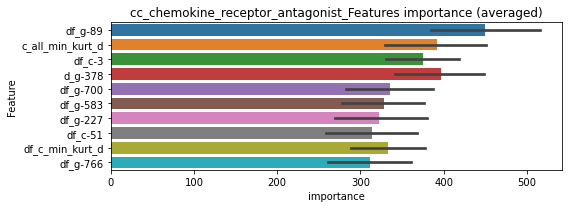

len(train_index) : 2784
len(valid_index) : 928
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00430209	valid_1's binary_logloss: 0.0577359
Early stopping, best iteration is:
[1413]	training's binary_logloss: 0.00299597	valid_1's binary_logloss: 0.0555169


len(train_index) : 2784
len(valid_index) : 928
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00428987	valid_1's binary_logloss: 0.0559361
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.00334155	valid_1's binary_logloss: 0.0544941


len(train_index) : 2784
len(valid_index) : 928
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00442233	valid_1's binary_logloss: 0.0341077
[2000]	training's binary_logloss: 0.00219034	valid_1's binary_logloss: 0.0290604
Early stopping, best iteration is:
[2017]	training's binary_logloss: 0.00217156	valid_1's binary_logloss: 0.0289767


len(train_index) : 2784
len(valid_index) : 928
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00438925	valid_1's binary_logloss: 0.0411285
Early stopping, best iteration is:
[1672]	training's binary_logloss: 0.00259326	valid_1's binary_logloss: 0.037723


cc_chemokine_receptor_antagonist logloss: 0.04417765375599731
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102973	valid_1's binary_logloss: 0.00304779
[600]	training's binary_logloss: 0.000304194	valid_1's binary_logloss: 0.00137806
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000304214	valid_1's binary_logloss: 0.00137801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105211	valid_1's binary_logloss: 0.00415168
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000313799	valid_1's binary_logloss: 0.00193294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104588	valid_1's binary_logloss: 0.00188225
[600]	training's binary_logloss: 0.000305817	valid_1's binary_logloss: 0.000713363
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000305233	valid_1's binary_logloss: 0.000711859
Training until validation scores don't improve for 30 rou

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014221, Threshold: 0.0033819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0033819, conf_0:0.00237, conf_1:0.00440
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0333819
threshold: 0.0333819, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010054	valid_1's binary_logloss: 0.00245829
[600]	training's binary_logloss: 0.000299425	valid_1's binary_logloss: 0.00100909
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00100823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000961466	valid_1's binary_logloss: 0.00459539
[600]	training's binary_logloss: 0.000295765	valid_1's binary_logloss: 0.00244268
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000296814	valid_1's binary_logloss: 0.00243604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101265	valid_1's binary_logloss: 0.00160832
[600]	training's binary_logloss: 0.000302313	valid_1's binary_logloss: 0.000586752
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000302313	valid_1's bin

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0792243, Threshold: 0.0333819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0333819, conf_0:0.02671, conf_1:0.04006


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000307487	valid_1's binary_logloss: 0.000842244


threshold: 0.0333819, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010054	valid_1's binary_logloss: 0.00245829
[600]	training's binary_logloss: 0.000299425	valid_1's binary_logloss: 0.00100909
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00100823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000961466	valid_1's binary_logloss: 0.00459539
[600]	training's binary_logloss: 0.000295765	valid_1's binary_logloss: 0.00244268
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000296814	valid_1's binary_logloss: 0.00243604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101265	valid_1's binary_logloss: 0.00160832
[600]	training's binary_logloss: 0.000302313	valid_1's binary_logloss: 0.000586752
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000302313	valid_1's bin

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0792243, Threshold: 0.0333819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0333819, conf_0:0.03004, conf_1:0.03672


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000307487	valid_1's binary_logloss: 0.000842244


threshold: 0.0333819, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


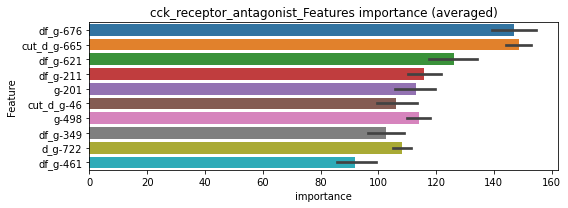

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000306693	valid_1's binary_logloss: 0.00092717


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000298787	valid_1's binary_logloss: 0.00151584


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000302872	valid_1's binary_logloss: 0.000591471


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000299292	valid_1's binary_logloss: 0.000845427
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000299411	valid_1's binary_logloss: 0.000845219


cck_receptor_antagonist logloss: 0.0009701331050584469


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7646
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7646


unpredictable_cols:cdk_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0934788	valid_1's binary_logloss: 0.192883
[600]	training's binary_logloss: 0.0409239	valid_1's binary_logloss: 0.150064
[900]	training's binary_logloss: 0.0239841	valid_1's binary_logloss: 0.135962
[1200]	training's binary_logloss: 0.0164263	valid_1's binary_logloss: 0.130394
[1500]	training's binary_logloss: 0.0123649	valid_1's binary_logloss: 0.127244
Early stopping, best iteration is:
[1583]	training's binary_logloss: 0.0115686	valid_1's binary_logloss: 0.126942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0945303	valid_1's binary_logloss: 0.187752
[600]	training's binary_logloss: 0.0411728	valid_1's binary_logloss: 0.146067
[900]	training's binary_logloss: 0.0239872	valid_1's binary_logloss: 0.131447
[1200]	training's binary_logloss: 0.0163176	valid_1's binary_logloss: 0.125703
[1500]	training's binary_logloss: 0.0122238	valid_1's bina

1 / 3, AUC score:0.972, PR-AUC:0.946
y_Threshold: 0.0616523, Threshold: 0.1256392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 554 → Positive_corect_labels: 1405/8621
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1256392, conf_0:0.08795, conf_1:0.16333
threshold: 0.1256392, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1405.0/8621, y_label_rate: 0.1629741
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.076874	valid_1's binary_logloss: 0.152981
[600]	training's binary_logloss: 0.0323633	valid_1's binary_logloss: 0.108663
[900]	training's binary_logloss: 0.0187467	valid_1's binary_logloss: 0.0933323
[1200]	training's binary_logloss: 0.0127404	valid_1's binary_logloss: 0.0856337
[1500]	training's binary_logloss: 0.00954711	valid_1's binary_logloss: 0.0813798
[1800]	training's binary_logloss: 0.00758746	valid_1's binary_logloss: 0.0787233
Early stopping, best iteration is:
[1897]	training's binary_logloss: 0.00710978	valid_1's binary_logloss: 0.0779758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0761866	valid_1's binary_logloss: 0.158654
[600]	training's binary_logloss: 0.0318126	valid_1's binary_logloss: 0.112138
[900]	training's binary_logloss: 0.0184056	valid_1's binary_logloss: 0.0956805
[1200]	training's binary_logloss: 0.0125438	valid_1

2 / 3, AUC score:0.994, PR-AUC:0.986
y_Threshold: 0.0932660, Threshold: 0.1256392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 1339.0/8489
p_label_rate: 0.0183325 Vs.target_rate: 0.01478
Num_p_label: 73.0, Expected: 58.9, Threshold: 0.1256392, conf_0:0.10051, conf_1:0.15077
threshold: 0.1256392, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 1339.0/8489, y_label_rate: 0.1577335
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.071102	valid_1's binary_logloss: 0.136781
[600]	training's binary_logloss: 0.0295189	valid_1's binary_logloss: 0.0904049
[900]	training's binary_logloss: 0.0170462	valid_1's binary_logloss: 0.0732531
[1200]	training's binary_logloss: 0.0116725	valid_1's binary_logloss: 0.065692
[1500]	training's binary_logloss: 0.00874449	valid_1's binary_logloss: 0.0610616
[1800]	training's binary_logloss: 0.00696963	valid_1's binary_logloss: 0.0581419
[2100]	training's binary_logloss: 0.0057895	valid_1's binary_logloss: 0.056157
[2400]	training's binary_logloss: 0.00493605	valid_1's binary_logloss: 0.0544759
[2700]	training's binary_logloss: 0.0043063	valid_1's binary_logloss: 0.053271
Early stopping, best iteration is:
[2712]	training's binary_logloss: 0.00428381	valid_1's binary_logloss: 0.0532376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0706972	vali

3 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0929987, Threshold: 0.1256392, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1288.0/8387
p_label_rate: 0.0203415 Vs.target_rate: 0.01478
Num_p_label: 81.0, Expected: 58.9, Threshold: 0.1256392, conf_0:0.11308, conf_1:0.13820
threshold: 0.1256392, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 1288.0/8387, y_label_rate: 0.1535710


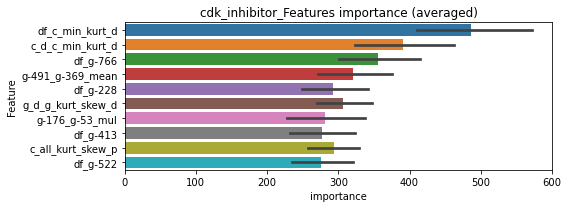

len(train_index) : 6290
len(valid_index) : 2097
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00569203	valid_1's binary_logloss: 0.0641477
Early stopping, best iteration is:
[1530]	training's binary_logloss: 0.0034837	valid_1's binary_logloss: 0.0599056


len(train_index) : 6290
len(valid_index) : 2097
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00571883	valid_1's binary_logloss: 0.053471
Early stopping, best iteration is:
[1589]	training's binary_logloss: 0.00335779	valid_1's binary_logloss: 0.0480128


len(train_index) : 6290
len(valid_index) : 2097
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00574434	valid_1's binary_logloss: 0.0497382
[2000]	training's binary_logloss: 0.00263724	valid_1's binary_logloss: 0.0422517
Early stopping, best iteration is:
[2162]	training's binary_logloss: 0.00242982	valid_1's binary_logloss: 0.0415433


len(train_index) : 6291
len(valid_index) : 2096
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00562925	valid_1's binary_logloss: 0.0585434
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.0036158	valid_1's binary_logloss: 0.0543884


cdk_inhibitor logloss: 0.050962120163781245
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289012	valid_1's binary_logloss: 0.0291953
[600]	training's binary_logloss: 0.000593332	valid_1's binary_logloss: 0.0230368
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00062622	valid_1's binary_logloss: 0.0229522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322642	valid_1's binary_logloss: 0.0234621
[600]	training's binary_logloss: 0.000629503	valid_1's binary_logloss: 0.0168047
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000570763	valid_1's binary_logloss: 0.016665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328485	valid_1's binary_logloss: 0.00982213
[600]	training's binary_logloss: 0.000645541	valid_1's binary_logloss: 0.00530422
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000522189	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043035, Threshold: 0.0158538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0158538, conf_0:0.01110, conf_1:0.02061
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.0458538
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_2: 0.0758538
threshold: 0.0758538, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276755	valid_1's binary_logloss: 0.0257443
[600]	training's binary_logloss: 0.000571089	valid_1's binary_logloss: 0.0196599
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000580797	valid_1's binary_logloss: 0.0196497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299743	valid_1's binary_logloss: 0.0209127
[600]	training's binary_logloss: 0.000605834	valid_1's binary_logloss: 0.0143151
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000521607	valid_1's binary_logloss: 0.0140499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312735	valid_1's binary_logloss: 0.00972439
[600]	training's binary_logloss: 0.000628277	valid_1's binary_logloss: 0.00532355
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000535254	valid_1's binary_log

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0243332, Threshold: 0.0758538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0067805 Vs.target_rate: 0.00227
Num_p_label: 27.0, Expected: 9.0, Threshold: 0.0758538, conf_0:0.06068, conf_1:0.09102
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.1058538
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_2: 0.1358538
threshold: 0.1358538, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289743	valid_1's binary_logloss: 0.0157404
[600]	training's binary_logloss: 0.000590258	valid_1's binary_logloss: 0.00959388
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000501315	valid_1's binary_logloss: 0.0093914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028778	valid_1's binary_logloss: 0.0198963
[600]	training's binary_logloss: 0.000588556	valid_1's binary_logloss: 0.0143977
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000621954	valid_1's binary_logloss: 0.0143247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297618	valid_1's binary_logloss: 0.023545
[600]	training's binary_logloss: 0.00058728	valid_1's binary_logloss: 0.0169053
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000553305	valid_1's binary_logloss

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0263533, Threshold: 0.1358538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0055249 Vs.target_rate: 0.00227
Num_p_label: 22.0, Expected: 9.0, Threshold: 0.1358538, conf_0:0.12227, conf_1:0.14944
threshold: 0.1358538, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


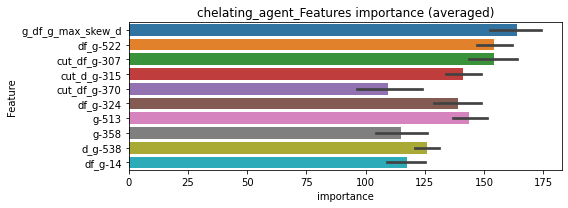

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00051443	valid_1's binary_logloss: 0.00654562


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000676202	valid_1's binary_logloss: 0.0188089


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000588205	valid_1's binary_logloss: 0.00673318


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.011921980326103821


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000892355	valid_1's binary_logloss: 0.0155986


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120005	valid_1's binary_logloss: 0.00300442
[600]	training's binary_logloss: 0.000342795	valid_1's binary_logloss: 0.00121442
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000342795	valid_1's binary_logloss: 0.00121442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124265	valid_1's binary_logloss: 0.00453013
[600]	training's binary_logloss: 0.000348453	valid_1's binary_logloss: 0.00195883
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000348424	valid_1's binary_logloss: 0.00195828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124306	valid_1's binary_logloss: 0.00225014
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000362251	valid_1's binary_logloss: 0.00081638
Training until validation scores don't improve for 30 round

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029038, Threshold: 0.0508272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0508272, conf_0:0.03558, conf_1:0.06608
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_1: 0.0808272
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.1108272
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.1408272
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.1708272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_5: 0.2008272
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.2308272
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2608272
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_8: 0.2908272
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3208272
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_10: 0.3508272
threshold: 0.3508272, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113461	valid_1's binary_logloss: 0.0023091
[600]	training's binary_logloss: 0.000331303	valid_1's binary_logloss: 0.00094485
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000331048	valid_1's binary_logloss: 0.00094434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114188	valid_1's binary_logloss: 0.00316016
[600]	training's binary_logloss: 0.000334365	valid_1's binary_logloss: 0.00125335
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000334367	valid_1's binary_logloss: 0.00125334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110093	valid_1's binary_logloss: 0.00208068
[600]	training's binary_logloss: 0.000333773	valid_1's binary_logloss: 0.000755647
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000333028	valid_1's bina

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1446481, Threshold: 0.3508272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0082873 Vs.target_rate: 0.00101
Num_p_label: 33.0, Expected: 4.0, Threshold: 0.3508272, conf_0:0.28066, conf_1:0.42099
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.3808272
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_2: 0.4108272
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4408272
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_4: 0.4708272
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_5: 0.5008272
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_6: 0.5308272
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_7: 0.5608272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_8: 0.5908272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_9: 0.6208272
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6508272
threshold: 0.6508272, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113461	valid_1's binary_logloss: 0.0023091
[600]	training's binary_logloss: 0.000331303	valid_1's binary_logloss: 0.00094485
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000331048	valid_1's binary_logloss: 0.00094434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114188	valid_1's binary_logloss: 0.00316016
[600]	training's binary_logloss: 0.000334365	valid_1's binary_logloss: 0.00125335
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000334367	valid_1's binary_logloss: 0.00125334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110093	valid_1's binary_logloss: 0.00208068
[600]	training's binary_logloss: 0.000333773	valid_1's binary_logloss: 0.000755647
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000333028	valid_1's bina

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1446481, Threshold: 0.6508272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6508272, conf_0:0.58574, conf_1:0.71591
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_1: 0.6808272
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7108272
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_3: 0.7408272
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_4: 0.7708272
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_5: 0.8008272
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.8308272
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_7: 0.8608272
threshold: 0.8608272, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


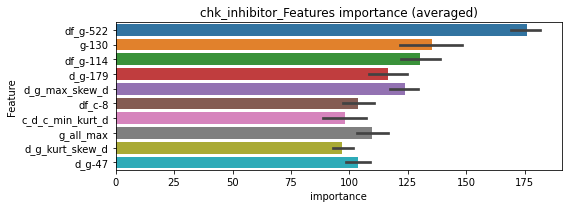

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000349542	valid_1's binary_logloss: 0.000900355


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000338926	valid_1's binary_logloss: 0.00120959


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000340347	valid_1's binary_logloss: 0.00084901


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000336722	valid_1's binary_logloss: 0.00100986


chk_inhibitor logloss: 0.000992178651250423
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239264	valid_1's binary_logloss: 0.0129288
[600]	training's binary_logloss: 0.000509313	valid_1's binary_logloss: 0.00716608
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000468475	valid_1's binary_logloss: 0.00703383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237383	valid_1's binary_logloss: 0.0176537
[600]	training's binary_logloss: 0.0005054	valid_1's binary_logloss: 0.0128865
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00046491	valid_1's binary_logloss: 0.0127571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024771	valid_1's binary_logloss: 0.00928464
[600]	training's binary_logloss: 0.000507255	valid_1's binary_logloss: 0.00488924
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000482187	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034996, Threshold: 0.0288828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0288828, conf_0:0.02022, conf_1:0.03755
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_1: 0.0588828
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.0888828
threshold: 0.0888828, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225276	valid_1's binary_logloss: 0.0125543
[600]	training's binary_logloss: 0.000488299	valid_1's binary_logloss: 0.00681466
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000449643	valid_1's binary_logloss: 0.0066621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224763	valid_1's binary_logloss: 0.0121419
[600]	training's binary_logloss: 0.000487456	valid_1's binary_logloss: 0.00767995
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000473678	valid_1's binary_logloss: 0.0076149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224391	valid_1's binary_logloss: 0.00862019
[600]	training's binary_logloss: 0.000485964	valid_1's binary_logloss: 0.00428474
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000454078	valid_1's binary_l

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449594, Threshold: 0.0888828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0145655 Vs.target_rate: 0.00176
Num_p_label: 58.0, Expected: 7.0, Threshold: 0.0888828, conf_0:0.07111, conf_1:0.10666
Num_p_label: 49.0, Expected: 7.0, Adj_threshold_1: 0.1188828
Num_p_label: 46.0, Expected: 7.0, Adj_threshold_2: 0.1488828
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_3: 0.1788828
Num_p_label: 33.0, Expected: 7.0, Adj_threshold_4: 0.2088828
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_5: 0.2388828
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_6: 0.2688828
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_7: 0.2988828
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3288828
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3588828
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_10: 0.3888828
threshold: 0.3888828, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225276	valid_1's binary_logloss: 0.0125543
[600]	training's binary_logloss: 0.000488299	valid_1's binary_logloss: 0.00681466
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000449643	valid_1's binary_logloss: 0.0066621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224763	valid_1's binary_logloss: 0.0121419
[600]	training's binary_logloss: 0.000487456	valid_1's binary_logloss: 0.00767995
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000473678	valid_1's binary_logloss: 0.0076149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224391	valid_1's binary_logloss: 0.00862019
[600]	training's binary_logloss: 0.000485964	valid_1's binary_logloss: 0.00428474
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000454078	valid_1's binary_l

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449594, Threshold: 0.3888828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0047715 Vs.target_rate: 0.00176
Num_p_label: 19.0, Expected: 7.0, Threshold: 0.3888828, conf_0:0.34999, conf_1:0.42777
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4188828
threshold: 0.4188828, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


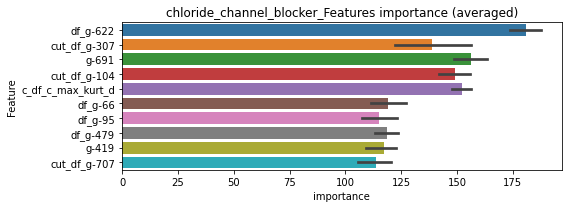

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000467399	valid_1's binary_logloss: 0.00573903


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000468194	valid_1's binary_logloss: 0.00553374


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000458472	valid_1's binary_logloss: 0.00414749


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000494184	valid_1's binary_logloss: 0.00817519


chloride_channel_blocker logloss: 0.005899627748241927
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283365	valid_1's binary_logloss: 0.0178478
[600]	training's binary_logloss: 0.000550367	valid_1's binary_logloss: 0.0106676
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000489328	valid_1's binary_logloss: 0.0104164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029677	valid_1's binary_logloss: 0.0203103
[600]	training's binary_logloss: 0.000563769	valid_1's binary_logloss: 0.0149311
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000497935	valid_1's binary_logloss: 0.0146933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302962	valid_1's binary_logloss: 0.00762325
[600]	training's binary_logloss: 0.000583259	valid_1's binary_logloss: 0.00263338
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000492301	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043721, Threshold: 0.0129494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0129494, conf_0:0.00906, conf_1:0.01683
Num_p_label: 9.0, Expected: 8.0, Adj_threshold_1: 0.0429494
threshold: 0.0429494, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272299	valid_1's binary_logloss: 0.0160534
[600]	training's binary_logloss: 0.000537796	valid_1's binary_logloss: 0.00962177
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000487949	valid_1's binary_logloss: 0.00941592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266549	valid_1's binary_logloss: 0.018232
[600]	training's binary_logloss: 0.000532618	valid_1's binary_logloss: 0.0132886
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000487492	valid_1's binary_logloss: 0.0131178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286236	valid_1's binary_logloss: 0.00690508
[600]	training's binary_logloss: 0.00056381	valid_1's binary_logloss: 0.0023205
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000476764	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269632, Threshold: 0.0429494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.0429494, conf_0:0.03436, conf_1:0.05154
threshold: 0.0429494, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026713	valid_1's binary_logloss: 0.0170474
[600]	training's binary_logloss: 0.000533954	valid_1's binary_logloss: 0.0100678
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000548902	valid_1's binary_logloss: 0.0100191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285491	valid_1's binary_logloss: 0.00904727
[600]	training's binary_logloss: 0.000549069	valid_1's binary_logloss: 0.00385806
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000483999	valid_1's binary_logloss: 0.00369522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286237	valid_1's binary_logloss: 0.00600995
[600]	training's binary_logloss: 0.000555779	valid_1's binary_logloss: 0.00185077
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000477838	valid_1's binary_l

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303130, Threshold: 0.0429494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0052737 Vs.target_rate: 0.00202
Num_p_label: 21.0, Expected: 8.0, Threshold: 0.0429494, conf_0:0.03865, conf_1:0.04724
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0729494
threshold: 0.0729494, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


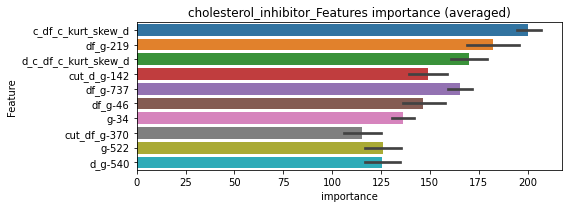

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000479556	valid_1's binary_logloss: 0.00880695


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000493883	valid_1's binary_logloss: 0.00415688


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485055	valid_1's binary_logloss: 0.00169638
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000485055	valid_1's binary_logloss: 0.00169638


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000680731	valid_1's binary_logloss: 0.0121954


cholesterol_inhibitor logloss: 0.0067150879641827
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336413	valid_1's binary_logloss: 0.0221517
[600]	training's binary_logloss: 0.000626895	valid_1's binary_logloss: 0.0142837
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000521373	valid_1's binary_logloss: 0.0140646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319037	valid_1's binary_logloss: 0.0229977
[600]	training's binary_logloss: 0.000628585	valid_1's binary_logloss: 0.0159696
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000531394	valid_1's binary_logloss: 0.0155778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00326799	valid_1's binary_logloss: 0.0157282
[600]	training's binary_logloss: 0.000634672	valid_1's binary_logloss: 0.0103019
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.0005203	valid_1's binary_logloss

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0045289, Threshold: 0.0110148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0110148, conf_0:0.00771, conf_1:0.01432
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0410148
threshold: 0.0410148, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297411	valid_1's binary_logloss: 0.0190532
[600]	training's binary_logloss: 0.000595718	valid_1's binary_logloss: 0.0122056
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000502142	valid_1's binary_logloss: 0.0119322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029977	valid_1's binary_logloss: 0.01812
[600]	training's binary_logloss: 0.000600252	valid_1's binary_logloss: 0.0114452
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000529785	valid_1's binary_logloss: 0.0112461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294931	valid_1's binary_logloss: 0.015301
[600]	training's binary_logloss: 0.000606441	valid_1's binary_logloss: 0.0106614
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000550322	valid_1's binary_logloss: 

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0574733, Threshold: 0.0410148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00227
Num_p_label: 10.0, Expected: 9.0, Threshold: 0.0410148, conf_0:0.03281, conf_1:0.04922
threshold: 0.0410148, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297411	valid_1's binary_logloss: 0.0190532
[600]	training's binary_logloss: 0.000595718	valid_1's binary_logloss: 0.0122056
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000502142	valid_1's binary_logloss: 0.0119322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029977	valid_1's binary_logloss: 0.01812
[600]	training's binary_logloss: 0.000600252	valid_1's binary_logloss: 0.0114452
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000529785	valid_1's binary_logloss: 0.0112461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294931	valid_1's binary_logloss: 0.015301
[600]	training's binary_logloss: 0.000606441	valid_1's binary_logloss: 0.0106614
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000550322	valid_1's binary_logloss: 

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0574733, Threshold: 0.0410148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00227
Num_p_label: 10.0, Expected: 9.0, Threshold: 0.0410148, conf_0:0.03691, conf_1:0.04512
threshold: 0.0410148, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


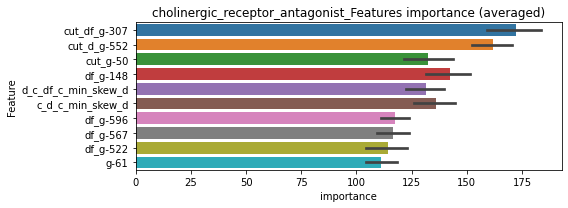

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000611556	valid_1's binary_logloss: 0.0132076


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000523485	valid_1's binary_logloss: 0.0111243


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000543759	valid_1's binary_logloss: 0.0106512


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000754834	valid_1's binary_logloss: 0.0130763


cholinergic_receptor_antagonist logloss: 0.012014577570181607
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137647	valid_1's binary_logloss: 0.0034441
[600]	training's binary_logloss: 0.000348207	valid_1's binary_logloss: 0.00134724
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000344464	valid_1's binary_logloss: 0.00134162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133253	valid_1's binary_logloss: 0.00467346
[600]	training's binary_logloss: 0.000343525	valid_1's binary_logloss: 0.00219573
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000329642	valid_1's binary_logloss: 0.00217695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139507	valid_1's binary_logloss: 0.00359329
[600]	training's binary_logloss: 0.000350493	valid_1's binary_logloss: 0.00168997
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000337413	valid_1's binar

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019893, Threshold: 0.0093222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0093222, conf_0:0.00653, conf_1:0.01212


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000365079	valid_1's binary_logloss: 0.00637531


Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0393222
threshold: 0.0393222, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013041	valid_1's binary_logloss: 0.00342312
[600]	training's binary_logloss: 0.000340467	valid_1's binary_logloss: 0.00148739
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000327457	valid_1's binary_logloss: 0.00146437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126833	valid_1's binary_logloss: 0.00427215
[600]	training's binary_logloss: 0.000340486	valid_1's binary_logloss: 0.00219402
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000329707	valid_1's binary_logloss: 0.00218702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012779	valid_1's binary_logloss: 0.00333471
[600]	training's binary_logloss: 0.000337809	valid_1's binary_logloss: 0.00157342
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000334413	valid_1's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234848, Threshold: 0.0393222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.0393222, conf_0:0.03146, conf_1:0.04719
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0693222
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0993222
threshold: 0.0993222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013041	valid_1's binary_logloss: 0.00342312
[600]	training's binary_logloss: 0.000340467	valid_1's binary_logloss: 0.00148739
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000327457	valid_1's binary_logloss: 0.00146437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126833	valid_1's binary_logloss: 0.00427215
[600]	training's binary_logloss: 0.000340486	valid_1's binary_logloss: 0.00219402
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000329707	valid_1's binary_logloss: 0.00218702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012779	valid_1's binary_logloss: 0.00333471
[600]	training's binary_logloss: 0.000337809	valid_1's binary_logloss: 0.00157342
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000334413	valid_1's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234848, Threshold: 0.0993222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0993222, conf_0:0.08939, conf_1:0.10925
threshold: 0.0993222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


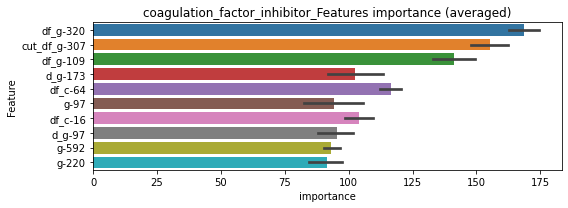

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000337247	valid_1's binary_logloss: 0.000908123
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000334719	valid_1's binary_logloss: 0.000904034


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000347126	valid_1's binary_logloss: 0.00176524


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00034394	valid_1's binary_logloss: 0.00202718


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.002327187377229491


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000454307	valid_1's binary_logloss: 0.00461426


corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248195	valid_1's binary_logloss: 0.00869086
[600]	training's binary_logloss: 0.000484396	valid_1's binary_logloss: 0.00396183
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000428926	valid_1's binary_logloss: 0.00379285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247011	valid_1's binary_logloss: 0.0146056
[600]	training's binary_logloss: 0.000480362	valid_1's binary_logloss: 0.00939809
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000420882	valid_1's binary_logloss: 0.00917052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246694	valid_1's binary_logloss: 0.0081892
[600]	training's binary_logloss: 0.000487755	valid_1's binary_logloss: 0.00419714
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00043741	valid_1's binary_

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036784, Threshold: 0.0111276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0111276, conf_0:0.00779, conf_1:0.01447
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0411276
threshold: 0.0411276, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223928	valid_1's binary_logloss: 0.00787502
[600]	training's binary_logloss: 0.000464659	valid_1's binary_logloss: 0.00338409
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000414537	valid_1's binary_logloss: 0.00318606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224215	valid_1's binary_logloss: 0.0150272
[600]	training's binary_logloss: 0.00045725	valid_1's binary_logloss: 0.00993618
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000413506	valid_1's binary_logloss: 0.00975936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225086	valid_1's binary_logloss: 0.00785802
[600]	training's binary_logloss: 0.000470856	valid_1's binary_logloss: 0.00413444
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000501428	valid_1's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217259, Threshold: 0.0411276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0411276, conf_0:0.03290, conf_1:0.04935
threshold: 0.0411276, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022151	valid_1's binary_logloss: 0.0164574
[600]	training's binary_logloss: 0.000453617	valid_1's binary_logloss: 0.0118264
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000455767	valid_1's binary_logloss: 0.0118173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002166	valid_1's binary_logloss: 0.00826605
[600]	training's binary_logloss: 0.000458449	valid_1's binary_logloss: 0.00380262
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000427988	valid_1's binary_logloss: 0.0037288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224146	valid_1's binary_logloss: 0.00549529
[600]	training's binary_logloss: 0.000467171	valid_1's binary_logloss: 0.00192558
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000425165	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0527534, Threshold: 0.0411276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0042692 Vs.target_rate: 0.00151
Num_p_label: 17.0, Expected: 6.0, Threshold: 0.0411276, conf_0:0.03701, conf_1:0.04524
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_1: 0.0711276
threshold: 0.0711276, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


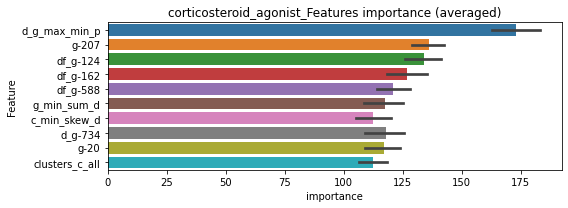

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000494819	valid_1's binary_logloss: 0.00995841


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417376	valid_1's binary_logloss: 0.00353922
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000418504	valid_1's binary_logloss: 0.00353718


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418505	valid_1's binary_logloss: 0.00196332
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.00041417	valid_1's binary_logloss: 0.00195561


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417	valid_1's binary_logloss: 0.00221329
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.00041788	valid_1's binary_logloss: 0.0022118


corticosteroid_agonist logloss: 0.00441733897288281
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


unpredictable_cols:cyclooxygenase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.129985	valid_1's binary_logloss: 0.394418
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.10824	valid_1's binary_logloss: 0.392217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.131224	valid_1's binary_logloss: 0.384119
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.118049	valid_1's binary_logloss: 0.383194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.135062	valid_1's binary_logloss: 0.356632
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.0829336	valid_1's binary_logloss: 0.34862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.132026	valid_1's binary_logloss: 0.380628


1 / 3, AUC score:0.747, PR-AUC:0.575
y_Threshold: 0.1532249, Threshold: 0.4543985, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.107188	valid_1's binary_logloss: 0.377117


Remove_noisy_data: 746 → Positive_corect_labels: 338/3130
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4543985, conf_0:0.31808, conf_1:0.59072
threshold: 0.4543985, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 338.0/3130, y_label_rate: 0.1079872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0657852	valid_1's binary_logloss: 0.197286
[600]	training's binary_logloss: 0.0299288	valid_1's binary_logloss: 0.181885
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.0310955	valid_1's binary_logloss: 0.181733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0681018	valid_1's binary_logloss: 0.188204
[600]	training's binary_logloss: 0.030694	valid_1's binary_logloss: 0.168171
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.0234369	valid_1's binary_logloss: 0.164957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0654673	valid_1's binary_logloss: 0.205324
[600]	training's binary_logloss: 0.0295394	valid_1's binary_logloss: 0.187796
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.0236727	valid_1's binary_logloss: 0.185997
Training un

2 / 3, AUC score:0.949, PR-AUC:0.851
y_Threshold: 0.0896854, Threshold: 0.4543985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 261.0/2976
p_label_rate: 0.0281266 Vs.target_rate: 0.01827
Num_p_label: 112.0, Expected: 72.7, Threshold: 0.4543985, conf_0:0.36352, conf_1:0.54528
Num_p_label: 108.0, Expected: 72.7, Adj_threshold_1: 0.4843985
threshold: 0.4843985, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 261.0/2976, y_label_rate: 0.0877016
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0495158	valid_1's binary_logloss: 0.142783
[600]	training's binary_logloss: 0.0220808	valid_1's binary_logloss: 0.121989
[900]	training's binary_logloss: 0.0134937	valid_1's binary_logloss: 0.115046
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.0134557	valid_1's binary_logloss: 0.114971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0476653	valid_1's binary_logloss: 0.157607
[600]	training's binary_logloss: 0.0211698	valid_1's binary_logloss: 0.138818
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.0150154	valid_1's binary_logloss: 0.135492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0487226	valid_1's binary_logloss: 0.141359
[600]	training's binary_logloss: 0.0217505	valid_1's binary_logloss: 0.123284
[900]	training's binary_logloss: 0.0133998	va

3 / 3, AUC score:0.982, PR-AUC:0.926
y_Threshold: 0.0753546, Threshold: 0.4843985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 222.0/2898
p_label_rate: 0.0341537 Vs.target_rate: 0.01827
Num_p_label: 136.0, Expected: 72.7, Threshold: 0.4843985, conf_0:0.43596, conf_1:0.53284
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_1: 0.5143985
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_2: 0.5443985
Num_p_label: 121.0, Expected: 72.7, Adj_threshold_3: 0.5743985
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_4: 0.6043985
Num_p_label: 113.0, Expected: 72.7, Adj_threshold_5: 0.6343985
Num_p_label: 110.0, Expected: 72.7, Adj_threshold_6: 0.6643985
Num_p_label: 103.0, Expected: 72.7, Adj_threshold_7: 0.6943985
threshold: 0.6943985, positive_p_label: 103.0/3982, p_label_rate: 0.0258664
positive_y_label: 222.0/2898, y_label_rate: 0.0766046


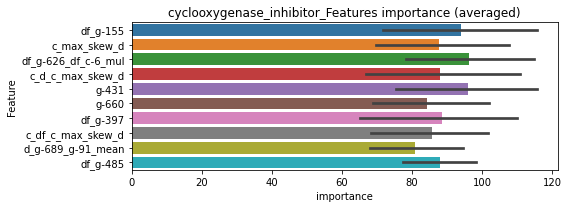

len(train_index) : 2173
len(valid_index) : 725
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2173
len(valid_index) : 725
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00982737	valid_1's binary_logloss: 0.101817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00547594	valid_1's binary_logloss: 0.0867944


len(train_index) : 2174
len(valid_index) : 724
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2174
len(valid_index) : 724
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0231091	valid_1's binary_logloss: 0.141595
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.11029712234277093
cyclooxygenase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.0130952	valid_1's binary_logloss: 0.111027


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


unpredictable_cols:cytochrome_p450_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472473	valid_1's binary_logloss: 0.11966
[600]	training's binary_logloss: 0.0205134	valid_1's binary_logloss: 0.0922985
[900]	training's binary_logloss: 0.0125235	valid_1's binary_logloss: 0.0837235
[1200]	training's binary_logloss: 0.00888977	valid_1's binary_logloss: 0.0790333
[1500]	training's binary_logloss: 0.00685607	valid_1's binary_logloss: 0.0762674
[1800]	training's binary_logloss: 0.00559769	valid_1's binary_logloss: 0.0745563
[2100]	training's binary_logloss: 0.00472911	valid_1's binary_logloss: 0.0732224
Early stopping, best iteration is:
[2264]	training's binary_logloss: 0.00436509	valid_1's binary_logloss: 0.0729377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.047631	valid_1's binary_logloss: 0.115366
[600]	training's binary_logloss: 0.020721	valid_1's binary_logloss: 0.0888407
[900]	training's binary_logloss: 0.0126968	vali

1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0273239, Threshold: 0.0820006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.0820006, conf_0:0.05740, conf_1:0.10660
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_1: 0.1120006
Num_p_label: 21.0, Expected: 17.4, Adj_threshold_2: 0.1420006
threshold: 0.1420006, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0444906	valid_1's binary_logloss: 0.107333
[600]	training's binary_logloss: 0.0192227	valid_1's binary_logloss: 0.081961
[900]	training's binary_logloss: 0.0117522	valid_1's binary_logloss: 0.073926
[1200]	training's binary_logloss: 0.00837442	valid_1's binary_logloss: 0.0704649
[1500]	training's binary_logloss: 0.00648909	valid_1's binary_logloss: 0.0679949
[1800]	training's binary_logloss: 0.00530123	valid_1's binary_logloss: 0.0667711
[2100]	training's binary_logloss: 0.00448378	valid_1's binary_logloss: 0.0658662
[2400]	training's binary_logloss: 0.00389089	valid_1's binary_logloss: 0.0651956
[2700]	training's binary_logloss: 0.00344042	valid_1's binary_logloss: 0.0646396
Early stopping, best iteration is:
[2693]	training's binary_logloss: 0.00344923	valid_1's binary_logloss: 0.0646226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0457173

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0577436, Threshold: 0.1420006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 628.0/3742
p_label_rate: 0.0125565 Vs.target_rate: 0.00437
Num_p_label: 50.0, Expected: 17.4, Threshold: 0.1420006, conf_0:0.11360, conf_1:0.17040
Num_p_label: 39.0, Expected: 17.4, Adj_threshold_1: 0.1720006
Num_p_label: 35.0, Expected: 17.4, Adj_threshold_2: 0.2020006
Num_p_label: 29.0, Expected: 17.4, Adj_threshold_3: 0.2320006
Num_p_label: 21.0, Expected: 17.4, Adj_threshold_4: 0.2620006
threshold: 0.2620006, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 628.0/3742, y_label_rate: 0.1678247
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0429847	valid_1's binary_logloss: 0.0890845
[600]	training's binary_logloss: 0.0184959	valid_1's binary_logloss: 0.0612967
[900]	training's binary_logloss: 0.0113812	valid_1's binary_logloss: 0.0523167
[1200]	training's binary_logloss: 0.00812193	valid_1's binary_logloss: 0.0475411
[1500]	training's binary_logloss: 0.00629661	valid_1's binary_logloss: 0.044603
[1800]	training's binary_logloss: 0.00514852	valid_1's binary_logloss: 0.0425497
[2100]	training's binary_logloss: 0.00435533	valid_1's binary_logloss: 0.0412045
[2400]	training's binary_logloss: 0.0037864	valid_1's binary_logloss: 0.0399593
[2700]	training's binary_logloss: 0.00334991	valid_1's binary_logloss: 0.0389329
[3000]	training's binary_logloss: 0.00300878	valid_1's binary_logloss: 0.0381115
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.00277235	valid_1's binary_logloss: 0.0374656
Training until valida

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0648873, Threshold: 0.2620006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 622.0/3730
p_label_rate: 0.0082873 Vs.target_rate: 0.00437
Num_p_label: 33.0, Expected: 17.4, Threshold: 0.2620006, conf_0:0.23580, conf_1:0.28820
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_1: 0.2920006
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_2: 0.3220006
threshold: 0.3220006, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 622.0/3730, y_label_rate: 0.1667560


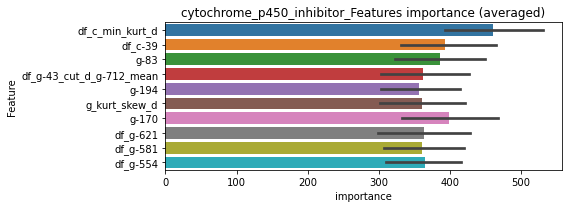

len(train_index) : 2797
len(valid_index) : 933
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00444232	valid_1's binary_logloss: 0.0472632
Early stopping, best iteration is:
[1631]	training's binary_logloss: 0.00268082	valid_1's binary_logloss: 0.0444116


len(train_index) : 2797
len(valid_index) : 933
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00443836	valid_1's binary_logloss: 0.0434772
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.00402471	valid_1's binary_logloss: 0.0426711


len(train_index) : 2798
len(valid_index) : 932
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00449842	valid_1's binary_logloss: 0.0373108
[2000]	training's binary_logloss: 0.00223668	valid_1's binary_logloss: 0.0326261
Early stopping, best iteration is:
[2751]	training's binary_logloss: 0.00166113	valid_1's binary_logloss: 0.0312915


len(train_index) : 2798
len(valid_index) : 932
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00499062	valid_1's binary_logloss: 0.0560386


cytochrome_p450_inhibitor logloss: 0.04360316447513368
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198509	valid_1's binary_logloss: 0.00945645
[600]	training's binary_logloss: 0.000436624	valid_1's binary_logloss: 0.00606929
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00042616	valid_1's binary_logloss: 0.00600936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198442	valid_1's binary_logloss: 0.00894525
[600]	training's binary_logloss: 0.000430958	valid_1's binary_logloss: 0.00537878
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000428788	valid_1's binary_logloss: 0.00536703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207438	valid_1's binary_logloss: 0.00373426
[600]	training's binary_logloss: 0.000446283	valid_1's binary_logloss: 0.0010277
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000419771	valid_1's binary

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028473, Threshold: 0.0122792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0122792, conf_0:0.00860, conf_1:0.01596
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_1: 0.0422792
threshold: 0.0422792, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190317	valid_1's binary_logloss: 0.00958862
[600]	training's binary_logloss: 0.000428405	valid_1's binary_logloss: 0.00632187
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000398426	valid_1's binary_logloss: 0.0061814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185251	valid_1's binary_logloss: 0.00721587
[600]	training's binary_logloss: 0.000420432	valid_1's binary_logloss: 0.00381142
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00378641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191524	valid_1's binary_logloss: 0.00359353
[600]	training's binary_logloss: 0.000433217	valid_1's binary_logloss: 0.00102943
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000408523	valid_1's binar

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170795, Threshold: 0.0422792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00151
Num_p_label: 21.0, Expected: 6.0, Threshold: 0.0422792, conf_0:0.03382, conf_1:0.05074
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0722792
threshold: 0.0722792, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190317	valid_1's binary_logloss: 0.00958862
[600]	training's binary_logloss: 0.000428405	valid_1's binary_logloss: 0.00632187
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000398426	valid_1's binary_logloss: 0.0061814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185251	valid_1's binary_logloss: 0.00721587
[600]	training's binary_logloss: 0.000420432	valid_1's binary_logloss: 0.00381142
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00378641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191524	valid_1's binary_logloss: 0.00359353
[600]	training's binary_logloss: 0.000433217	valid_1's binary_logloss: 0.00102943
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000408523	valid_1's binar

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170795, Threshold: 0.0722792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0722792, conf_0:0.06505, conf_1:0.07951
threshold: 0.0722792, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


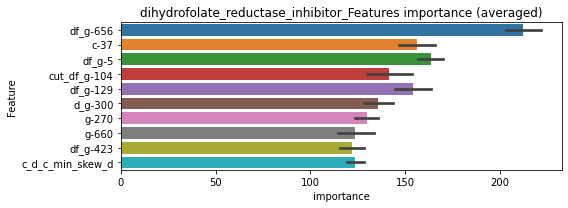

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000423152	valid_1's binary_logloss: 0.00611656


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.00040354	valid_1's binary_logloss: 0.00454716


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000410305	valid_1's binary_logloss: 0.00101576
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000410305	valid_1's binary_logloss: 0.00101576


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000431872	valid_1's binary_logloss: 0.00205132


dihydrofolate_reductase_inhibitor logloss: 0.0034339563742371605
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143574	valid_1's binary_logloss: 0.00534401
[600]	training's binary_logloss: 0.000356698	valid_1's binary_logloss: 0.00234692
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000355993	valid_1's binary_logloss: 0.00234227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150832	valid_1's binary_logloss: 0.00415718
[600]	training's binary_logloss: 0.00036187	valid_1's binary_logloss: 0.00177334
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00036187	valid_1's binary_logloss: 0.00177334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154533	valid_1's binary_logloss: 0.00269183
[600]	training's binary_logloss: 0.000366531	valid_1's binary_logloss: 0.000844011
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000360324	valid_1's binar

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022299, Threshold: 0.0093709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0093709, conf_0:0.00656, conf_1:0.01218
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0393709


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000384965	valid_1's binary_logloss: 0.00501963


threshold: 0.0393709, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132872	valid_1's binary_logloss: 0.00505698
[600]	training's binary_logloss: 0.000343432	valid_1's binary_logloss: 0.00233057
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000343531	valid_1's binary_logloss: 0.0023291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135249	valid_1's binary_logloss: 0.00366127
[600]	training's binary_logloss: 0.000349035	valid_1's binary_logloss: 0.00151572
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000349079	valid_1's binary_logloss: 0.00151569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140588	valid_1's binary_logloss: 0.00244426
[600]	training's binary_logloss: 0.000352435	valid_1's binary_logloss: 0.000857421
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000343974	valid_1's bina

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0939023, Threshold: 0.0393709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0062783 Vs.target_rate: 0.00105
Num_p_label: 25.0, Expected: 4.2, Threshold: 0.0393709, conf_0:0.03150, conf_1:0.04725


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000366373	valid_1's binary_logloss: 0.00344537


Num_p_label: 14.0, Expected: 4.2, Adj_threshold_1: 0.0693709
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0993709
threshold: 0.0993709, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132872	valid_1's binary_logloss: 0.00505698
[600]	training's binary_logloss: 0.000343432	valid_1's binary_logloss: 0.00233057
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000343531	valid_1's binary_logloss: 0.0023291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135249	valid_1's binary_logloss: 0.00366127
[600]	training's binary_logloss: 0.000349035	valid_1's binary_logloss: 0.00151572
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000349079	valid_1's binary_logloss: 0.00151569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140588	valid_1's binary_logloss: 0.00244426
[600]	training's binary_logloss: 0.000352435	valid_1's binary_logloss: 0.000857421
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000343974	valid_1's bina

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0939023, Threshold: 0.0993709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.0993709, conf_0:0.08943, conf_1:0.10931


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000366373	valid_1's binary_logloss: 0.00344537


threshold: 0.0993709, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


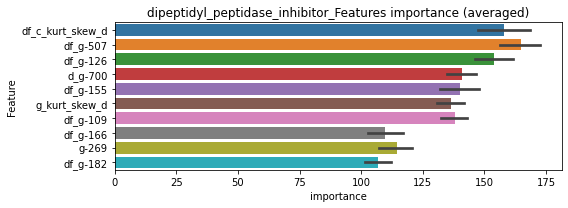

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000338609	valid_1's binary_logloss: 0.00212227
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000339456	valid_1's binary_logloss: 0.00212032


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000352479	valid_1's binary_logloss: 0.00154818


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000352492	valid_1's binary_logloss: 0.000936045


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


dipeptidyl_peptidase_inhibitor logloss: 0.0021225778166833477


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000457054	valid_1's binary_logloss: 0.00388518


diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000350968	valid_1's binary_logloss: 0.00468973
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00017806	valid_1's binary_logloss: 0.0041403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00034734	valid_1's binary_logloss: 0.00212659
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000172231	valid_1's binary_logloss: 0.00169127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000352483	valid_1's binary_logloss: 0.000412401
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000175181	valid_1's binary_logloss: 0.000207431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000351905	valid_1's binary_logloss: 0.000429111


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0016678, conf_0:0.00117, conf_1:0.00217
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0316678
threshold: 0.0316678, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000174974	valid_1's binary_logloss: 0.000224136


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325033	valid_1's binary_logloss: 0.000769163
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000159707	valid_1's binary_logloss: 0.000480763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00032299	valid_1's binary_logloss: 0.00432621
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000163626	valid_1's binary_logloss: 0.00392492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000323254	valid_1's binary_logloss: 0.00037198
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00015993	valid_1's binary_logloss: 0.000183918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000326308	valid_1's binary_logloss: 0.000364299


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132687, Threshold: 0.0316678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, Expected: 1.0, Threshold: 0.0316678, conf_0:0.02533, conf_1:0.03800
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0616678
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0916678
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1216678
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1516678
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1816678
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.2116678


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000158951	valid_1's binary_logloss: 0.000177862


threshold: 0.2116678, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325033	valid_1's binary_logloss: 0.000769163
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000159707	valid_1's binary_logloss: 0.000480763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00032299	valid_1's binary_logloss: 0.00432621
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000163626	valid_1's binary_logloss: 0.00392492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000323254	valid_1's binary_logloss: 0.00037198
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00015993	valid_1's binary_logloss: 0.000183918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000326308	valid_1's binary_logloss: 0.000364299


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132687, Threshold: 0.2116678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.2116678, conf_0:0.19050, conf_1:0.23283
threshold: 0.2116678, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000158951	valid_1's binary_logloss: 0.000177862


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


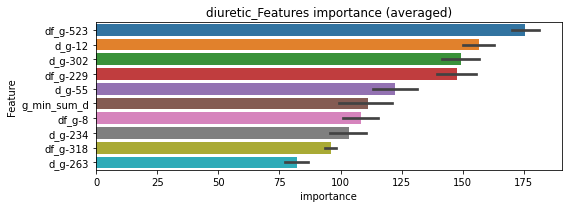

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164864	valid_1's binary_logloss: 0.000240418


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[1108]	training's binary_logloss: 0.000163202	valid_1's binary_logloss: 0.000238689
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165027	valid_1's binary_logloss: 0.00298652
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000164286	valid_1's binary_logloss: 0.00298292


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164999	valid_1's binary_logloss: 0.000200271
Early stopping, best iteration is:
[1199]	training's binary_logloss: 0.000161591	valid_1's binary_logloss: 0.000196216


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0001649	valid_1's binary_logloss: 0.000186759


Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.000162873	valid_1's binary_logloss: 0.000184459


diuretic logloss: 0.0009005423948855886
dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272754	valid_1's binary_logloss: 0.019345
[600]	training's binary_logloss: 0.000558205	valid_1's binary_logloss: 0.0136405
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000495053	valid_1's binary_logloss: 0.0134669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270152	valid_1's binary_logloss: 0.0224322
[600]	training's binary_logloss: 0.000548053	valid_1's binary_logloss: 0.0155039
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000514719	valid_1's binary_logloss: 0.0152771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287753	valid_1's binary_logloss: 0.00806969
[600]	training's binary_logloss: 0.000577709	valid_1's binary_logloss: 0.00318236
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000501066	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0039649, Threshold: 0.0842395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0842395, conf_0:0.05897, conf_1:0.10951
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_1: 0.1142395
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1442395
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.1742395
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2042395
threshold: 0.2042395, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246723	valid_1's binary_logloss: 0.0144283
[600]	training's binary_logloss: 0.000522681	valid_1's binary_logloss: 0.0092935
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000485637	valid_1's binary_logloss: 0.00919344
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255601	valid_1's binary_logloss: 0.0130622
[600]	training's binary_logloss: 0.000532085	valid_1's binary_logloss: 0.00747963
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000467081	valid_1's binary_logloss: 0.00732398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257363	valid_1's binary_logloss: 0.00840007
[600]	training's binary_logloss: 0.000540174	valid_1's binary_logloss: 0.00364652
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000489057	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1570183, Threshold: 0.2042395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2042395, conf_0:0.16339, conf_1:0.24509
Num_p_label: 71.0, Expected: 8.0, Adj_threshold_1: 0.2342395
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2642395
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_3: 0.2942395
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3242395
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3542395
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_6: 0.3842395
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_7: 0.4142395
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4442395
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_9: 0.4742395
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.5042395
threshold: 0.5042395, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024045	valid_1's binary_logloss: 0.0182643
[600]	training's binary_logloss: 0.000509116	valid_1's binary_logloss: 0.0123449
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000519743	valid_1's binary_logloss: 0.0123267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253164	valid_1's binary_logloss: 0.0103437
[600]	training's binary_logloss: 0.000531975	valid_1's binary_logloss: 0.0056357
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000484534	valid_1's binary_logloss: 0.00554184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250856	valid_1's binary_logloss: 0.0135557
[600]	training's binary_logloss: 0.000528638	valid_1's binary_logloss: 0.00817404
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000465515	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1144282, Threshold: 0.5042395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0128076 Vs.target_rate: 0.00202
Num_p_label: 51.0, Expected: 8.0, Threshold: 0.5042395, conf_0:0.45382, conf_1:0.55466
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_1: 0.5342395
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_2: 0.5642395
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_3: 0.5942395
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_4: 0.6242395
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_5: 0.6542395
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6842395
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_7: 0.7142395
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_8: 0.7442395
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_9: 0.7742395
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.8042395
threshold: 0.8042395, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

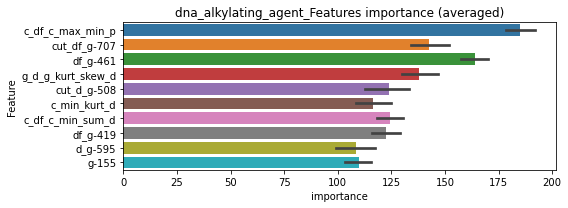

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00050632	valid_1's binary_logloss: 0.0125792


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000479448	valid_1's binary_logloss: 0.00835298


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000472092	valid_1's binary_logloss: 0.00673401


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000497377	valid_1's binary_logloss: 0.00402673


dna_alkylating_agent logloss: 0.007929597641245664


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7382
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7382


unpredictable_cols:dna_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.092152	valid_1's binary_logloss: 0.190526
[600]	training's binary_logloss: 0.0421105	valid_1's binary_logloss: 0.162313
[900]	training's binary_logloss: 0.0253235	valid_1's binary_logloss: 0.154546
Early stopping, best iteration is:
[1102]	training's binary_logloss: 0.0196734	valid_1's binary_logloss: 0.152712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0900614	valid_1's binary_logloss: 0.206158
[600]	training's binary_logloss: 0.0406358	valid_1's binary_logloss: 0.182295
[900]	training's binary_logloss: 0.0240074	valid_1's binary_logloss: 0.176775
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.0218533	valid_1's binary_logloss: 0.176123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.09028	valid_1's binary_logloss: 0.193025
[600]	training's binary_logloss: 0.0415888	val

1 / 3, AUC score:0.953, PR-AUC:0.915
y_Threshold: 0.0695585, Threshold: 0.1437816, pos_neg_ratio: 0.8000000
Remove_noisy_data: 656 → Positive_corect_labels: 1296/8202
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1437816, conf_0:0.10065, conf_1:0.18692
threshold: 0.1437816, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1296.0/8202, y_label_rate: 0.1580102
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0642881	valid_1's binary_logloss: 0.129939
[600]	training's binary_logloss: 0.0274677	valid_1's binary_logloss: 0.0996256
[900]	training's binary_logloss: 0.0160384	valid_1's binary_logloss: 0.0897461
[1200]	training's binary_logloss: 0.0110247	valid_1's binary_logloss: 0.0847925
[1500]	training's binary_logloss: 0.0083257	valid_1's binary_logloss: 0.0826264
Early stopping, best iteration is:
[1668]	training's binary_logloss: 0.007285	valid_1's binary_logloss: 0.0818589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0618176	valid_1's binary_logloss: 0.144167
[600]	training's binary_logloss: 0.0264719	valid_1's binary_logloss: 0.119008
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.0201027	valid_1's binary_logloss: 0.114355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.064

2 / 3, AUC score:0.994, PR-AUC:0.982
y_Threshold: 0.0840295, Threshold: 0.1437816, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 1216.0/8042
p_label_rate: 0.0183325 Vs.target_rate: 0.01688
Num_p_label: 73.0, Expected: 67.2, Threshold: 0.1437816, conf_0:0.11503, conf_1:0.17254
threshold: 0.1437816, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 1216.0/8042, y_label_rate: 0.1512062
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0538428	valid_1's binary_logloss: 0.10816
[600]	training's binary_logloss: 0.0228875	valid_1's binary_logloss: 0.0777344
[900]	training's binary_logloss: 0.0134493	valid_1's binary_logloss: 0.0682371
[1200]	training's binary_logloss: 0.00925803	valid_1's binary_logloss: 0.0631754
[1500]	training's binary_logloss: 0.00703873	valid_1's binary_logloss: 0.0603149
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.00621763	valid_1's binary_logloss: 0.0593464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0537883	valid_1's binary_logloss: 0.103438
[600]	training's binary_logloss: 0.0230715	valid_1's binary_logloss: 0.074409
[900]	training's binary_logloss: 0.0135951	valid_1's binary_logloss: 0.0644604
[1200]	training's binary_logloss: 0.00937671	valid_1's binary_logloss: 0.0591764
[1500]	training's binary_logloss: 0.00710854	vali

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0777821, Threshold: 0.1437816, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 1183.0/7976
p_label_rate: 0.0140633 Vs.target_rate: 0.01688
Num_p_label: 56.0, Expected: 67.2, Threshold: 0.1437816, conf_0:0.12940, conf_1:0.15816
threshold: 0.1437816, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1183.0/7976, y_label_rate: 0.1483200


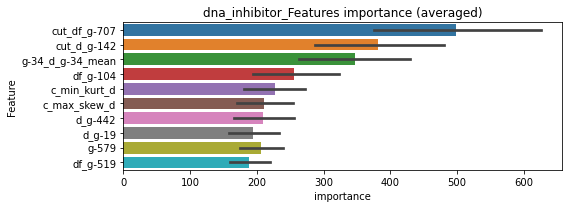

len(train_index) : 5982
len(valid_index) : 1994
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00455147	valid_1's binary_logloss: 0.0618598
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.004201	valid_1's binary_logloss: 0.0612274


len(train_index) : 5982
len(valid_index) : 1994
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.00511251	valid_1's binary_logloss: 0.0546872


len(train_index) : 5982
len(valid_index) : 1994
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00467338	valid_1's binary_logloss: 0.0482179
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.00434734	valid_1's binary_logloss: 0.0477694


len(train_index) : 5982
len(valid_index) : 1994
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.0057083	valid_1's binary_logloss: 0.0700905


dna_inhibitor logloss: 0.05844362261571422
dna_inhibitor is unpredictable(><)!
dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


mutually exclusive columns: dopamine_receptor_agonist
selected negative label: 2089


unpredictable_cols:dopamine_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0739877	valid_1's binary_logloss: 0.228782
[600]	training's binary_logloss: 0.0336596	valid_1's binary_logloss: 0.204527
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.024865	valid_1's binary_logloss: 0.199865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0793048	valid_1's binary_logloss: 0.169197
[600]	training's binary_logloss: 0.0366318	valid_1's binary_logloss: 0.130306
[900]	training's binary_logloss: 0.0226611	valid_1's binary_logloss: 0.116162
[1200]	training's binary_logloss: 0.0161188	valid_1's binary_logloss: 0.109356
Early stopping, best iteration is:
[1332]	training's binary_logloss: 0.0142733	valid_1's binary_logloss: 0.107191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0789172	valid_1's binary_logloss: 0.179519
[600]	training's binary_logloss: 0.0364876	

1 / 3, AUC score:0.969, PR-AUC:0.937
y_Threshold: 0.0693964, Threshold: 0.1553774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 374/2335
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1553774, conf_0:0.10876, conf_1:0.20199
Num_p_label: 28.0, Expected: 20.2, Adj_threshold_1: 0.1853774
threshold: 0.1853774, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 374.0/2335, y_label_rate: 0.1601713
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0601141	valid_1's binary_logloss: 0.178081
[600]	training's binary_logloss: 0.026959	valid_1's binary_logloss: 0.153221
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.0206089	valid_1's binary_logloss: 0.147261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0635067	valid_1's binary_logloss: 0.169525
[600]	training's binary_logloss: 0.0284354	valid_1's binary_logloss: 0.137116
[900]	training's binary_logloss: 0.0175576	valid_1's binary_logloss: 0.126043
[1200]	training's binary_logloss: 0.0125781	valid_1's binary_logloss: 0.121787
Early stopping, best iteration is:
[1281]	training's binary_logloss: 0.0116687	valid_1's binary_logloss: 0.120665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0652875	valid_1's binary_logloss: 0.150269
[600]	training's binary_logloss: 0.029363	va

2 / 3, AUC score:0.991, PR-AUC:0.974
y_Threshold: 0.0942435, Threshold: 0.1853774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 345.0/2277
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1853774, conf_0:0.14830, conf_1:0.22245
Num_p_label: 22.0, Expected: 20.2, Adj_threshold_1: 0.2153774
threshold: 0.2153774, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 345.0/2277, y_label_rate: 0.1515152
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.05637	valid_1's binary_logloss: 0.136549
[600]	training's binary_logloss: 0.0254508	valid_1's binary_logloss: 0.102678
[900]	training's binary_logloss: 0.0158429	valid_1's binary_logloss: 0.0911968
[1200]	training's binary_logloss: 0.011357	valid_1's binary_logloss: 0.0849716
[1500]	training's binary_logloss: 0.00886383	valid_1's binary_logloss: 0.0816933
[1800]	training's binary_logloss: 0.00727154	valid_1's binary_logloss: 0.0795319
[2100]	training's binary_logloss: 0.00617016	valid_1's binary_logloss: 0.0780467
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.00615352	valid_1's binary_logloss: 0.0779912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0569544	valid_1's binary_logloss: 0.12609
[600]	training's binary_logloss: 0.0256527	valid_1's binary_logloss: 0.0928728
[900]	training's binary_logloss: 0.0158705	valid_1'

3 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0867939, Threshold: 0.2153774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 332.0/2251
p_label_rate: 0.0080362 Vs.target_rate: 0.00508
Num_p_label: 32.0, Expected: 20.2, Threshold: 0.2153774, conf_0:0.19384, conf_1:0.23692
Num_p_label: 19.0, Expected: 20.2, Adj_threshold_1: 0.2453774
threshold: 0.2453774, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 332.0/2251, y_label_rate: 0.1474900


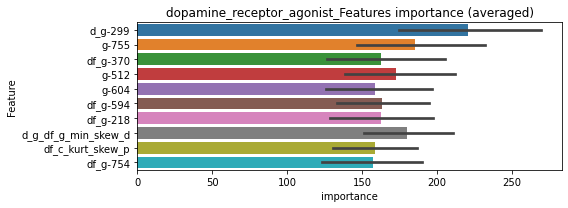

len(train_index) : 1688
len(valid_index) : 563
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00862457	valid_1's binary_logloss: 0.0902088


len(train_index) : 1688
len(valid_index) : 563
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.00684938	valid_1's binary_logloss: 0.0635516


len(train_index) : 1688
len(valid_index) : 563
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00602346	valid_1's binary_logloss: 0.0702938
Early stopping, best iteration is:
[1457]	training's binary_logloss: 0.00408907	valid_1's binary_logloss: 0.0667812


len(train_index) : 1689
len(valid_index) : 562
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00615448	valid_1's binary_logloss: 0.0714809
Early stopping, best iteration is:
[1260]	training's binary_logloss: 0.00484273	valid_1's binary_logloss: 0.0700375


dopamine_receptor_agonist logloss: 0.07264594686543571
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


unpredictable_cols:dopamine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0989243	valid_1's binary_logloss: 0.208522
[600]	training's binary_logloss: 0.0445842	valid_1's binary_logloss: 0.17771
[900]	training's binary_logloss: 0.0260888	valid_1's binary_logloss: 0.169385
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.0243972	valid_1's binary_logloss: 0.168562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0970798	valid_1's binary_logloss: 0.199461
[600]	training's binary_logloss: 0.0442735	valid_1's binary_logloss: 0.169004
[900]	training's binary_logloss: 0.0259677	valid_1's binary_logloss: 0.159081
[1200]	training's binary_logloss: 0.0176367	valid_1's binary_logloss: 0.155712
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.0181795	valid_1's binary_logloss: 0.155602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0961306	

1 / 3, AUC score:0.946, PR-AUC:0.909
y_Threshold: 0.0774481, Threshold: 0.1598443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 690 → Positive_corect_labels: 1264/8086
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1598443, conf_0:0.11189, conf_1:0.20780
threshold: 0.1598443, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1264.0/8086, y_label_rate: 0.1563196
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0680536	valid_1's binary_logloss: 0.140991
[600]	training's binary_logloss: 0.0290779	valid_1's binary_logloss: 0.106954
[900]	training's binary_logloss: 0.0171113	valid_1's binary_logloss: 0.0960747
[1200]	training's binary_logloss: 0.0117569	valid_1's binary_logloss: 0.0910894
[1500]	training's binary_logloss: 0.00885774	valid_1's binary_logloss: 0.0881612
[1800]	training's binary_logloss: 0.00707918	valid_1's binary_logloss: 0.0866622
Early stopping, best iteration is:
[1792]	training's binary_logloss: 0.00711523	valid_1's binary_logloss: 0.0866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.065696	valid_1's binary_logloss: 0.154313
[600]	training's binary_logloss: 0.0280994	valid_1's binary_logloss: 0.12398
[900]	training's binary_logloss: 0.0164241	valid_1's binary_logloss: 0.113821
[1200]	training's binary_logloss: 0.0112695	valid_1's bi

2 / 3, AUC score:0.991, PR-AUC:0.980
y_Threshold: 0.0843894, Threshold: 0.1598443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 1185.0/7928
p_label_rate: 0.0133099 Vs.target_rate: 0.01780
Num_p_label: 53.0, Expected: 70.9, Threshold: 0.1598443, conf_0:0.12788, conf_1:0.19181
threshold: 0.1598443, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1185.0/7928, y_label_rate: 0.1494702
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0576425	valid_1's binary_logloss: 0.123736
[600]	training's binary_logloss: 0.0243876	valid_1's binary_logloss: 0.0910648
[900]	training's binary_logloss: 0.0144284	valid_1's binary_logloss: 0.0800794
[1200]	training's binary_logloss: 0.00998358	valid_1's binary_logloss: 0.0747855
[1500]	training's binary_logloss: 0.00756542	valid_1's binary_logloss: 0.0716509
[1800]	training's binary_logloss: 0.00606027	valid_1's binary_logloss: 0.0698595
[2100]	training's binary_logloss: 0.00504974	valid_1's binary_logloss: 0.0683967
Early stopping, best iteration is:
[2304]	training's binary_logloss: 0.00453383	valid_1's binary_logloss: 0.0675726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0594557	valid_1's binary_logloss: 0.127956
[600]	training's binary_logloss: 0.0249823	valid_1's binary_logloss: 0.0976586
[900]	training's binary_logloss: 0.0145303	va

3 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0808034, Threshold: 0.1598443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 1136.0/7830
p_label_rate: 0.0118031 Vs.target_rate: 0.01780
Num_p_label: 47.0, Expected: 70.9, Threshold: 0.1598443, conf_0:0.14386, conf_1:0.17583
threshold: 0.1598443, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 1136.0/7830, y_label_rate: 0.1450830


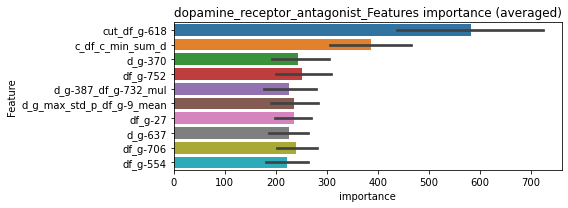

len(train_index) : 5872
len(valid_index) : 1958
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.0078311	valid_1's binary_logloss: 0.0726601


len(train_index) : 5872
len(valid_index) : 1958
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00488562	valid_1's binary_logloss: 0.0721214
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.00450136	valid_1's binary_logloss: 0.0714043


len(train_index) : 5873
len(valid_index) : 1957
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00485329	valid_1's binary_logloss: 0.0595804
Early stopping, best iteration is:
[1174]	training's binary_logloss: 0.00404826	valid_1's binary_logloss: 0.0582512


len(train_index) : 5873
len(valid_index) : 1957
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0049634	valid_1's binary_logloss: 0.0570566
Early stopping, best iteration is:
[1421]	training's binary_logloss: 0.00334394	valid_1's binary_logloss: 0.0544442


dopamine_receptor_antagonist logloss: 0.06419195295050556
dopamine_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


unpredictable_cols:egfr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0902178	valid_1's binary_logloss: 0.18054
[600]	training's binary_logloss: 0.0393096	valid_1's binary_logloss: 0.135245
[900]	training's binary_logloss: 0.0228521	valid_1's binary_logloss: 0.120339
[1200]	training's binary_logloss: 0.0154698	valid_1's binary_logloss: 0.11426
[1500]	training's binary_logloss: 0.0115309	valid_1's binary_logloss: 0.111015
Early stopping, best iteration is:
[1521]	training's binary_logloss: 0.0113266	valid_1's binary_logloss: 0.11073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0906771	valid_1's binary_logloss: 0.179754
[600]	training's binary_logloss: 0.0392687	valid_1's binary_logloss: 0.131677
[900]	training's binary_logloss: 0.022707	valid_1's binary_logloss: 0.115582
[1200]	training's binary_logloss: 0.0153917	valid_1's binary_logloss: 0.107884
[1500]	training's binary_logloss: 0.0114535	valid_1's binary_l

1 / 3, AUC score:0.978, PR-AUC:0.959
y_Threshold: 0.0561803, Threshold: 0.1601145, pos_neg_ratio: 0.8000000
Remove_noisy_data: 499 → Positive_corect_labels: 1412/8565
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1601145, conf_0:0.11208, conf_1:0.20815
threshold: 0.1601145, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1412.0/8565, y_label_rate: 0.1648570
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0737088	valid_1's binary_logloss: 0.154382
[600]	training's binary_logloss: 0.0306805	valid_1's binary_logloss: 0.11441
[900]	training's binary_logloss: 0.0177879	valid_1's binary_logloss: 0.100681
[1200]	training's binary_logloss: 0.0121905	valid_1's binary_logloss: 0.0946453
[1500]	training's binary_logloss: 0.00914672	valid_1's binary_logloss: 0.0914889
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.00814409	valid_1's binary_logloss: 0.090277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0750837	valid_1's binary_logloss: 0.151613
[600]	training's binary_logloss: 0.0315534	valid_1's binary_logloss: 0.105826
[900]	training's binary_logloss: 0.0182701	valid_1's binary_logloss: 0.089608
[1200]	training's binary_logloss: 0.0124978	valid_1's binary_logloss: 0.0819911
[1500]	training's binary_logloss: 0.00937495	valid_1's 

2 / 3, AUC score:0.992, PR-AUC:0.982
y_Threshold: 0.0930949, Threshold: 0.1601145, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 1335.0/8411
p_label_rate: 0.0203415 Vs.target_rate: 0.01411
Num_p_label: 81.0, Expected: 56.2, Threshold: 0.1601145, conf_0:0.12809, conf_1:0.19214
threshold: 0.1601145, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 1335.0/8411, y_label_rate: 0.1587207
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0668988	valid_1's binary_logloss: 0.138465
[600]	training's binary_logloss: 0.027831	valid_1's binary_logloss: 0.0934357
[900]	training's binary_logloss: 0.0162283	valid_1's binary_logloss: 0.0772534
[1200]	training's binary_logloss: 0.011132	valid_1's binary_logloss: 0.0698663
[1500]	training's binary_logloss: 0.00838373	valid_1's binary_logloss: 0.0651318
[1800]	training's binary_logloss: 0.00668777	valid_1's binary_logloss: 0.0622147
[2100]	training's binary_logloss: 0.00556229	valid_1's binary_logloss: 0.0599426
[2400]	training's binary_logloss: 0.00475245	valid_1's binary_logloss: 0.058299
Early stopping, best iteration is:
[2555]	training's binary_logloss: 0.00441833	valid_1's binary_logloss: 0.057583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0661038	valid_1's binary_logloss: 0.142806
[600]	training's binary_logloss: 0.0273991	valid

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0860287, Threshold: 0.1601145, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1292.0/8325
p_label_rate: 0.0203415 Vs.target_rate: 0.01411
Num_p_label: 81.0, Expected: 56.2, Threshold: 0.1601145, conf_0:0.14410, conf_1:0.17613
threshold: 0.1601145, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 1292.0/8325, y_label_rate: 0.1551952


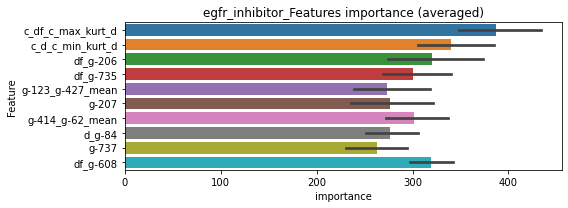

len(train_index) : 6243
len(valid_index) : 2082
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00556774	valid_1's binary_logloss: 0.0614668
Early stopping, best iteration is:
[1533]	training's binary_logloss: 0.00340986	valid_1's binary_logloss: 0.0568114


len(train_index) : 6244
len(valid_index) : 2081
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00550327	valid_1's binary_logloss: 0.0742945
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.00454232	valid_1's binary_logloss: 0.0727962


len(train_index) : 6244
len(valid_index) : 2081
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.00711543	valid_1's binary_logloss: 0.0759317


len(train_index) : 6244
len(valid_index) : 2081
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0055786	valid_1's binary_logloss: 0.0553286
Early stopping, best iteration is:
[1715]	training's binary_logloss: 0.00302633	valid_1's binary_logloss: 0.0497244


egfr_inhibitor logloss: 0.06381508057053982
egfr_inhibitor is unpredictable(><)!
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000555633	valid_1's binary_logloss: 0.00153026
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000235128	valid_1's binary_logloss: 0.000978165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000561522	valid_1's binary_logloss: 0.00138577
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00023075	valid_1's binary_logloss: 0.000858292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000561667	valid_1's binary_logloss: 0.000839805
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000230414	valid_1's binary_logloss: 0.000385953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000545219	valid_1's binary_logloss: 0.0027996


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008755, Threshold: 0.0029438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0029438, conf_0:0.00206, conf_1:0.00383
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0329438
threshold: 0.0329438, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000230632	valid_1's binary_logloss: 0.00179035


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000543493	valid_1's binary_logloss: 0.00195629
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00022093	valid_1's binary_logloss: 0.00137412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000541321	valid_1's binary_logloss: 0.00149266
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000243906	valid_1's binary_logloss: 0.00102765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000539342	valid_1's binary_logloss: 0.000729875
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000222244	valid_1's binary_logloss: 0.000317552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526723	valid_1's binary_logloss: 0.00210486


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0754169, Threshold: 0.0329438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0329438, conf_0:0.02636, conf_1:0.03953


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221002	valid_1's binary_logloss: 0.00134795


threshold: 0.0329438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000543493	valid_1's binary_logloss: 0.00195629
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00022093	valid_1's binary_logloss: 0.00137412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000541321	valid_1's binary_logloss: 0.00149266
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000243906	valid_1's binary_logloss: 0.00102765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000539342	valid_1's binary_logloss: 0.000729875
[600]	training's binary_logloss: 0.000222244	valid_1's binary_logloss: 0.000317552
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000222244	valid_1's binary_logloss: 0.000317552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000526723	valid_1's binary_logloss: 0.00

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0754169, Threshold: 0.0329438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0329438, conf_0:0.02965, conf_1:0.03624
threshold: 0.0329438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


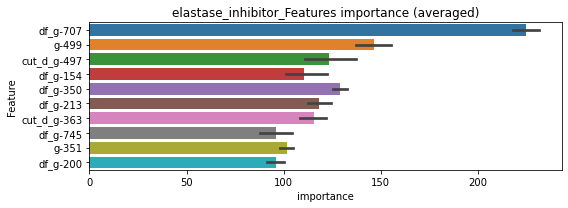

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000228989	valid_1's binary_logloss: 0.00105671


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000230222	valid_1's binary_logloss: 0.000608204


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000226805	valid_1's binary_logloss: 0.000334738


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00022912	valid_1's binary_logloss: 0.000929785


elastase_inhibitor logloss: 0.0007324034058704828
erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120597	valid_1's binary_logloss: 0.0033568
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000366257	valid_1's binary_logloss: 0.00225752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012171	valid_1's binary_logloss: 0.00417375
[600]	training's binary_logloss: 0.000324855	valid_1's binary_logloss: 0.00253201
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326805	valid_1's binary_logloss: 0.00252769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121344	valid_1's binary_logloss: 0.00262321
[600]	training's binary_logloss: 0.000325438	valid_1's binary_logloss: 0.000959177
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000325211	valid_1's binary_logloss: 0.000958551
Training until validation scores don't improve for 30 round

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018858, Threshold: 0.0061382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0061382, conf_0:0.00430, conf_1:0.00798
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_1: 0.0361382
threshold: 0.0361382, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111099	valid_1's binary_logloss: 0.00355515
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000342233	valid_1's binary_logloss: 0.00264081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113516	valid_1's binary_logloss: 0.00328568
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000329738	valid_1's binary_logloss: 0.00179214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113509	valid_1's binary_logloss: 0.00193398
[600]	training's binary_logloss: 0.000313365	valid_1's binary_logloss: 0.000623565
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000311652	valid_1's binary_logloss: 0.000620639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113842	valid_1's binary_logloss: 0.002530

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337114, Threshold: 0.0361382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084


[600]	training's binary_logloss: 0.000317066	valid_1's binary_logloss: 0.000873203
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000317841	valid_1's binary_logloss: 0.000872859


Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0361382, conf_0:0.02891, conf_1:0.04337
Num_p_label: 9.0, Expected: 3.3, Adj_threshold_1: 0.0661382
Num_p_label: 6.0, Expected: 3.3, Adj_threshold_2: 0.0961382
threshold: 0.0961382, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111099	valid_1's binary_logloss: 0.00355515
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000342233	valid_1's binary_logloss: 0.00264081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113516	valid_1's binary_logloss: 0.00328568
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000329738	valid_1's binary_logloss: 0.00179214
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113509	valid_1's binary_logloss: 0.00193398
[600]	training's binary_logloss: 0.000313365	valid_1's binary_logloss: 0.000623565
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000311652	valid_1's binary_logloss: 0.000620639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113842	valid_1's binary_logloss: 0.002530

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337114, Threshold: 0.0961382, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00084
Num_p_label: 6.0, Expected: 3.3, Threshold: 0.0961382, conf_0:0.08652, conf_1:0.10575
threshold: 0.0961382, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


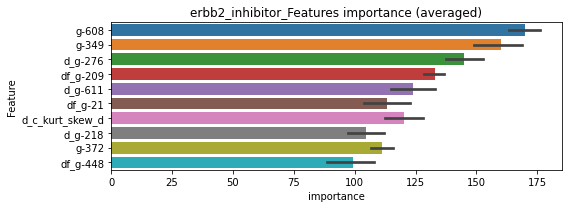

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000348792	valid_1's binary_logloss: 0.00215548


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000318357	valid_1's binary_logloss: 0.00144215


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000315227	valid_1's binary_logloss: 0.000609525


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000316905	valid_1's binary_logloss: 0.000787704


erbb2_inhibitor logloss: 0.0012488359700070398


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 4398
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 4398


unpredictable_cols:estrogen_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0575207	valid_1's binary_logloss: 0.126151
[600]	training's binary_logloss: 0.0255203	valid_1's binary_logloss: 0.100463
[900]	training's binary_logloss: 0.0155628	valid_1's binary_logloss: 0.0928841
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.0133101	valid_1's binary_logloss: 0.0916443
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0574745	valid_1's binary_logloss: 0.12545
[600]	training's binary_logloss: 0.0256328	valid_1's binary_logloss: 0.103076
[900]	training's binary_logloss: 0.0157811	valid_1's binary_logloss: 0.0965415
[1200]	training's binary_logloss: 0.0113191	valid_1's binary_logloss: 0.0942806
Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.0113498	valid_1's binary_logloss: 0.0942129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.05

1 / 3, AUC score:0.985, PR-AUC:0.970
y_Threshold: 0.0395258, Threshold: 0.0802082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 265 → Positive_corect_labels: 835/5012
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0802082, conf_0:0.05615, conf_1:0.10427
Num_p_label: 19.0, Expected: 26.4, Adj_threshold_1: 0.1102082
threshold: 0.1102082, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 835.0/5012, y_label_rate: 0.1666002
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0477501	valid_1's binary_logloss: 0.110828
[600]	training's binary_logloss: 0.0207012	valid_1's binary_logloss: 0.0884506
[900]	training's binary_logloss: 0.0124982	valid_1's binary_logloss: 0.0809019
[1200]	training's binary_logloss: 0.00883342	valid_1's binary_logloss: 0.0775156
[1500]	training's binary_logloss: 0.00679941	valid_1's binary_logloss: 0.0757931
Early stopping, best iteration is:
[1505]	training's binary_logloss: 0.00677394	valid_1's binary_logloss: 0.0757769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0483812	valid_1's binary_logloss: 0.104609
[600]	training's binary_logloss: 0.020915	valid_1's binary_logloss: 0.0803317
[900]	training's binary_logloss: 0.0126913	valid_1's binary_logloss: 0.0726655
[1200]	training's binary_logloss: 0.00895797	valid_1's binary_logloss: 0.069294
Early stopping, best iteration is:
[1294]	trainin

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0628495, Threshold: 0.1102082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 803.0/4948
p_label_rate: 0.0107986 Vs.target_rate: 0.00663
Num_p_label: 43.0, Expected: 26.4, Threshold: 0.1102082, conf_0:0.08817, conf_1:0.13225
Num_p_label: 28.0, Expected: 26.4, Adj_threshold_1: 0.1402082
threshold: 0.1402082, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 803.0/4948, y_label_rate: 0.1622878
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0421314	valid_1's binary_logloss: 0.0885319
[600]	training's binary_logloss: 0.018234	valid_1's binary_logloss: 0.0637239
[900]	training's binary_logloss: 0.0111253	valid_1's binary_logloss: 0.0555011
[1200]	training's binary_logloss: 0.0079041	valid_1's binary_logloss: 0.0513637
[1500]	training's binary_logloss: 0.00612011	valid_1's binary_logloss: 0.0489212
[1800]	training's binary_logloss: 0.00498045	valid_1's binary_logloss: 0.0473935
[2100]	training's binary_logloss: 0.00419812	valid_1's binary_logloss: 0.0461695
Early stopping, best iteration is:
[2094]	training's binary_logloss: 0.00421112	valid_1's binary_logloss: 0.046131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.042324	valid_1's binary_logloss: 0.0935773
[600]	training's binary_logloss: 0.018343	valid_1's binary_logloss: 0.0701735
[900]	training's binary_logloss: 0.0111669	valid

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0608982, Threshold: 0.1402082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 788.0/4918
p_label_rate: 0.0062783 Vs.target_rate: 0.00663
Num_p_label: 25.0, Expected: 26.4, Threshold: 0.1402082, conf_0:0.12619, conf_1:0.15423
threshold: 0.1402082, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 788.0/4918, y_label_rate: 0.1602277


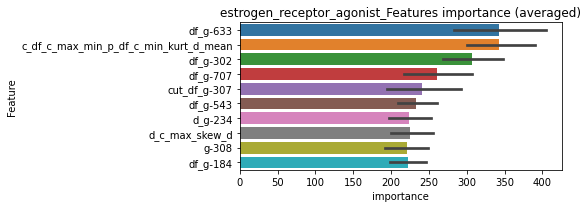

len(train_index) : 3688
len(valid_index) : 1230
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00425415	valid_1's binary_logloss: 0.0363378
Early stopping, best iteration is:
[1652]	training's binary_logloss: 0.00250918	valid_1's binary_logloss: 0.0336055


len(train_index) : 3688
len(valid_index) : 1230
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00415212	valid_1's binary_logloss: 0.0408754
Early stopping, best iteration is:
[1260]	training's binary_logloss: 0.00325494	valid_1's binary_logloss: 0.0397447


len(train_index) : 3689
len(valid_index) : 1229
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00598626	valid_1's binary_logloss: 0.05697


len(train_index) : 3689
len(valid_index) : 1229
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00418005	valid_1's binary_logloss: 0.0445937
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.00391266	valid_1's binary_logloss: 0.0441963


estrogen_receptor_agonist logloss: 0.0436262884071188
estrogen_receptor_agonist is unpredictable(><)!
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279375	valid_1's binary_logloss: 0.0153828
[600]	training's binary_logloss: 0.0005646	valid_1's binary_logloss: 0.0100667
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000487643	valid_1's binary_logloss: 0.00975896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293378	valid_1's binary_logloss: 0.0192532
[600]	training's binary_logloss: 0.000574882	valid_1's binary_logloss: 0.0141425
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000551687	valid_1's binary_logloss: 0.0141172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296003	valid_1's binary_logloss: 0.00929807
[600]	training's binary_logloss: 0.000582985	valid_1's binary_logloss: 0.00475482
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000508078	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0046352, Threshold: 0.1993563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000941327	valid_1's binary_logloss: 0.026615


Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1993563, conf_0:0.13955, conf_1:0.25916
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_1: 0.2293563
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_2: 0.2593563
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2893563
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_4: 0.3193563
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.3493563
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.3793563
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4093563
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_8: 0.4393563
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4693563
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_10: 0.4993563
threshold: 0.4993563, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255995	valid_1's binary_logloss: 0.0192406
[600]	training's binary_logloss: 0.000537578	valid_1's binary_logloss: 0.0136713
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0005415	valid_1's binary_logloss: 0.0136371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266552	valid_1's binary_logloss: 0.0112079
[600]	training's binary_logloss: 0.000546514	valid_1's binary_logloss: 0.00636009
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000496935	valid_1's binary_logloss: 0.00627173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265375	valid_1's binary_logloss: 0.01244
[600]	training's binary_logloss: 0.000547857	valid_1's binary_logloss: 0.00865704
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000516693	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381140, Threshold: 0.4993563, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0087896 Vs.target_rate: 0.00202
Num_p_label: 35.0, Expected: 8.0, Threshold: 0.4993563, conf_0:0.39949, conf_1:0.59923
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5293563
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.5593563
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_3: 0.5893563
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6193563
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6493563
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.6793563
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_7: 0.7093563
threshold: 0.7093563, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251953	valid_1's binary_logloss: 0.0168953
[600]	training's binary_logloss: 0.00052742	valid_1's binary_logloss: 0.0136044
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000534417	valid_1's binary_logloss: 0.0135383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249738	valid_1's binary_logloss: 0.0121329
[600]	training's binary_logloss: 0.000532668	valid_1's binary_logloss: 0.00731708
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000478462	valid_1's binary_logloss: 0.00719952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261707	valid_1's binary_logloss: 0.0131888
[600]	training's binary_logloss: 0.000535062	valid_1's binary_logloss: 0.00775519
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000474057	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0310267, Threshold: 0.7093563, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000815771	valid_1's binary_logloss: 0.0245989


Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0057760 Vs.target_rate: 0.00202
Num_p_label: 23.0, Expected: 8.0, Threshold: 0.7093563, conf_0:0.63842, conf_1:0.78029
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_1: 0.7393563
threshold: 0.7393563, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


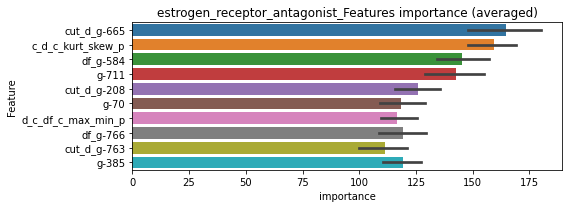

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.00050749	valid_1's binary_logloss: 0.0106255


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000558047	valid_1's binary_logloss: 0.0130827


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000532527	valid_1's binary_logloss: 0.00821687


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00053211	valid_1's binary_logloss: 0.00966815


estrogen_receptor_antagonist logloss: 0.010400532386932936
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186721	valid_1's binary_logloss: 0.00879686
[600]	training's binary_logloss: 0.000426351	valid_1's binary_logloss: 0.00531249
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000412952	valid_1's binary_logloss: 0.00527705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184773	valid_1's binary_logloss: 0.00833325
[600]	training's binary_logloss: 0.000421446	valid_1's binary_logloss: 0.00507439
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000421446	valid_1's binary_logloss: 0.00507439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195892	valid_1's binary_logloss: 0.00520383
[600]	training's binary_logloss: 0.000437846	valid_1's binary_logloss: 0.00252633
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000416499	valid_1's bina

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027828, Threshold: 0.0091993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0091993, conf_0:0.00644, conf_1:0.01196
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0391993
threshold: 0.0391993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174141	valid_1's binary_logloss: 0.0085001
[600]	training's binary_logloss: 0.000413077	valid_1's binary_logloss: 0.00561657
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00039779	valid_1's binary_logloss: 0.00558155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170994	valid_1's binary_logloss: 0.00841798
[600]	training's binary_logloss: 0.000403146	valid_1's binary_logloss: 0.00493057
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000389526	valid_1's binary_logloss: 0.00488618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178443	valid_1's binary_logloss: 0.00442818
[600]	training's binary_logloss: 0.00041621	valid_1's binary_logloss: 0.00227652
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000399509	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0481913, Threshold: 0.0391993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0391993, conf_0:0.03136, conf_1:0.04704
threshold: 0.0391993, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174141	valid_1's binary_logloss: 0.0085001
[600]	training's binary_logloss: 0.000413077	valid_1's binary_logloss: 0.00561657
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00039779	valid_1's binary_logloss: 0.00558155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170994	valid_1's binary_logloss: 0.00841798
[600]	training's binary_logloss: 0.000403146	valid_1's binary_logloss: 0.00493057
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000389526	valid_1's binary_logloss: 0.00488618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178443	valid_1's binary_logloss: 0.00442818
[600]	training's binary_logloss: 0.00041621	valid_1's binary_logloss: 0.00227652
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000399509	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0481913, Threshold: 0.0391993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0391993, conf_0:0.03528, conf_1:0.04312
threshold: 0.0391993, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


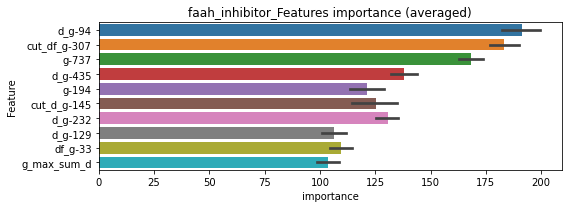

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000405093	valid_1's binary_logloss: 0.00495099


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000392741	valid_1's binary_logloss: 0.00463597


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000417541	valid_1's binary_logloss: 0.00196115


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000409925	valid_1's binary_logloss: 0.00349966


faah_inhibitor logloss: 0.003762485405334089
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956888	valid_1's binary_logloss: 0.00230626
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000294475	valid_1's binary_logloss: 0.000997483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000912093	valid_1's binary_logloss: 0.00248594
[600]	training's binary_logloss: 0.000285848	valid_1's binary_logloss: 0.00111839
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000285848	valid_1's binary_logloss: 0.00111839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946112	valid_1's binary_logloss: 0.00145543
[600]	training's binary_logloss: 0.000293906	valid_1's binary_logloss: 0.000522096
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000293906	valid_1's binary_logloss: 0.000522096
Training until validation scores don't improve for 30

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015476, Threshold: 0.0041284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0041284, conf_0:0.00289, conf_1:0.00537
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0341284


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.0002956	valid_1's binary_logloss: 0.00349146


threshold: 0.0341284, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000870917	valid_1's binary_logloss: 0.00308775
[600]	training's binary_logloss: 0.000277519	valid_1's binary_logloss: 0.00173846
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.00173732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000887654	valid_1's binary_logloss: 0.00225518
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00028599	valid_1's binary_logloss: 0.00103669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000898465	valid_1's binary_logloss: 0.00127481
[600]	training's binary_logloss: 0.000283078	valid_1's binary_logloss: 0.000426823
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000283078	valid_1's binary_logloss: 0.000426823
Training until validation scores don't improve for 30 r

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171334, Threshold: 0.0341284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0341284, conf_0:0.02730, conf_1:0.04095
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0641284


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000280391	valid_1's binary_logloss: 0.00438995


threshold: 0.0641284, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000870917	valid_1's binary_logloss: 0.00308775
[600]	training's binary_logloss: 0.000277519	valid_1's binary_logloss: 0.00173846
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000277795	valid_1's binary_logloss: 0.00173732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000887654	valid_1's binary_logloss: 0.00225518
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00028599	valid_1's binary_logloss: 0.00103669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000898465	valid_1's binary_logloss: 0.00127481
[600]	training's binary_logloss: 0.000283078	valid_1's binary_logloss: 0.000426823
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000283078	valid_1's binary_logloss: 0.000426823
Training until validation scores don't improve for 30 r

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171334, Threshold: 0.0641284, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000280391	valid_1's binary_logloss: 0.00438995


p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, Expected: 3.0, Threshold: 0.0641284, conf_0:0.05772, conf_1:0.07054
threshold: 0.0641284, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


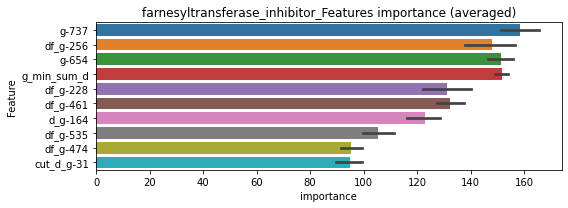

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000285321	valid_1's binary_logloss: 0.00118667


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281921	valid_1's binary_logloss: 0.000936996
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000281921	valid_1's binary_logloss: 0.000936996


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000287483	valid_1's binary_logloss: 0.000469664


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.0012967399018546165


Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000302222	valid_1's binary_logloss: 0.00259365


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127304	valid_1's binary_logloss: 0.00276164
[600]	training's binary_logloss: 0.000346651	valid_1's binary_logloss: 0.0011102
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000341569	valid_1's binary_logloss: 0.00110053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123113	valid_1's binary_logloss: 0.00993397
[600]	training's binary_logloss: 0.000339672	valid_1's binary_logloss: 0.00721017
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000340151	valid_1's binary_logloss: 0.00720985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012926	valid_1's binary_logloss: 0.00375697
[600]	training's binary_logloss: 0.000344635	valid_1's binary_logloss: 0.00167709
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000345772	valid_1's binary

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021842, Threshold: 0.0092701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0092701, conf_0:0.00649, conf_1:0.01205
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0392701
threshold: 0.0392701, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000477519	valid_1's binary_logloss: 0.00647981


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122425	valid_1's binary_logloss: 0.00259633
[600]	training's binary_logloss: 0.000336224	valid_1's binary_logloss: 0.00107887
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000331739	valid_1's binary_logloss: 0.00106883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113873	valid_1's binary_logloss: 0.00991594
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000348443	valid_1's binary_logloss: 0.00708263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120902	valid_1's binary_logloss: 0.00345335
[600]	training's binary_logloss: 0.000334244	valid_1's binary_logloss: 0.00171689
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000339611	valid_1's binary_logloss: 0.00171392
Training until validation scores don't improve for 30 round

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246793, Threshold: 0.0392701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, Expected: 4.2, Threshold: 0.0392701, conf_0:0.03142, conf_1:0.04712
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0692701
threshold: 0.0692701, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000455987	valid_1's binary_logloss: 0.00620121


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122425	valid_1's binary_logloss: 0.00259633
[600]	training's binary_logloss: 0.000336224	valid_1's binary_logloss: 0.00107887
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000331739	valid_1's binary_logloss: 0.00106883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113873	valid_1's binary_logloss: 0.00991594
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000348443	valid_1's binary_logloss: 0.00708263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120902	valid_1's binary_logloss: 0.00345335
[600]	training's binary_logloss: 0.000334244	valid_1's binary_logloss: 0.00171689
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000339611	valid_1's binary_logloss: 0.00171392
Training until validation scores don't improve for 30 round

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246793, Threshold: 0.0692701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.0692701, conf_0:0.06234, conf_1:0.07620


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000455987	valid_1's binary_logloss: 0.00620121


threshold: 0.0692701, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


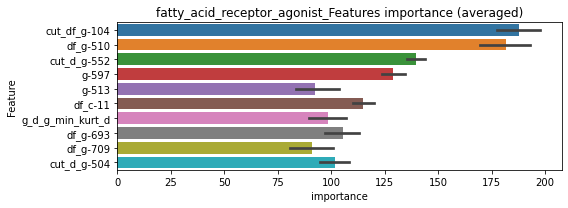

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000336971	valid_1's binary_logloss: 0.000850134


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00034915	valid_1's binary_logloss: 0.00710302


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000340471	valid_1's binary_logloss: 0.00149941


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


fatty_acid_receptor_agonist logloss: 0.003815091129861236


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0006332	valid_1's binary_logloss: 0.00580751


fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349804	valid_1's binary_logloss: 0.0256842
[600]	training's binary_logloss: 0.000616562	valid_1's binary_logloss: 0.0186528
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000515215	valid_1's binary_logloss: 0.0183058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359457	valid_1's binary_logloss: 0.0155641
[600]	training's binary_logloss: 0.000633701	valid_1's binary_logloss: 0.00705241
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000510396	valid_1's binary_logloss: 0.00647741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371031	valid_1's binary_logloss: 0.0111495
[600]	training's binary_logloss: 0.000644877	valid_1's binary_logloss: 0.00452809
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000521618	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040755, Threshold: 0.0148280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0148280, conf_0:0.01038, conf_1:0.01928
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_1: 0.0448280
threshold: 0.0448280, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320928	valid_1's binary_logloss: 0.0246809
[600]	training's binary_logloss: 0.000602843	valid_1's binary_logloss: 0.019192
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000501453	valid_1's binary_logloss: 0.0189266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341275	valid_1's binary_logloss: 0.0138927
[600]	training's binary_logloss: 0.000617524	valid_1's binary_logloss: 0.00604968
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000503995	valid_1's binary_logloss: 0.00566247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338902	valid_1's binary_logloss: 0.0101649
[600]	training's binary_logloss: 0.000627415	valid_1's binary_logloss: 0.00426275
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509382	valid_1's binary_log

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189746, Threshold: 0.0448280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0070316 Vs.target_rate: 0.00210
Num_p_label: 28.0, Expected: 8.4, Threshold: 0.0448280, conf_0:0.03586, conf_1:0.05379
Num_p_label: 19.0, Expected: 8.4, Adj_threshold_1: 0.0748280
threshold: 0.0748280, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325348	valid_1's binary_logloss: 0.0122664
[600]	training's binary_logloss: 0.000605616	valid_1's binary_logloss: 0.00661431
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00049381	valid_1's binary_logloss: 0.00644322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338472	valid_1's binary_logloss: 0.0217793
[600]	training's binary_logloss: 0.000610434	valid_1's binary_logloss: 0.0140836
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526237	valid_1's binary_logloss: 0.0136896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352381	valid_1's binary_logloss: 0.00741275
[600]	training's binary_logloss: 0.00063014	valid_1's binary_logloss: 0.00205031
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000509368	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0218835, Threshold: 0.0748280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0748280, conf_0:0.06735, conf_1:0.08231
threshold: 0.0748280, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


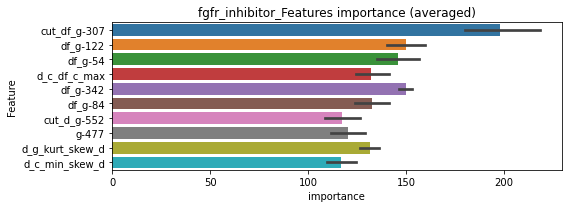

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000520226	valid_1's binary_logloss: 0.00659795


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000521861	valid_1's binary_logloss: 0.00709448


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504349	valid_1's binary_logloss: 0.00400848
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000501397	valid_1's binary_logloss: 0.00399791


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000505814	valid_1's binary_logloss: 0.0124893


fgfr_inhibitor logloss: 0.007547378103748959


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 7069
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 7069


unpredictable_cols:flt3_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0728757	valid_1's binary_logloss: 0.145972
[600]	training's binary_logloss: 0.0324161	valid_1's binary_logloss: 0.111223
[900]	training's binary_logloss: 0.019469	valid_1's binary_logloss: 0.0996811
[1200]	training's binary_logloss: 0.0137664	valid_1's binary_logloss: 0.0948589
[1500]	training's binary_logloss: 0.0106208	valid_1's binary_logloss: 0.0923214
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.00950968	valid_1's binary_logloss: 0.0914608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0725568	valid_1's binary_logloss: 0.15591
[600]	training's binary_logloss: 0.0321625	valid_1's binary_logloss: 0.123787
[900]	training's binary_logloss: 0.0194273	valid_1's binary_logloss: 0.113152
[1200]	training's binary_logloss: 0.01375	valid_1's binary_logloss: 0.108951
Early stopping, best iteration is:
[1378]	training's bina

1 / 3, AUC score:0.982, PR-AUC:0.964
y_Threshold: 0.0500671, Threshold: 0.1060679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 430 → Positive_corect_labels: 1340/8052
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1060679, conf_0:0.07425, conf_1:0.13789
threshold: 0.1060679, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1340.0/8052, y_label_rate: 0.1664183
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0605065	valid_1's binary_logloss: 0.123231
[600]	training's binary_logloss: 0.0254004	valid_1's binary_logloss: 0.0919993
[900]	training's binary_logloss: 0.0147691	valid_1's binary_logloss: 0.0822005
[1200]	training's binary_logloss: 0.0101131	valid_1's binary_logloss: 0.0782035
[1500]	training's binary_logloss: 0.00766009	valid_1's binary_logloss: 0.0760519
Early stopping, best iteration is:
[1560]	training's binary_logloss: 0.00730508	valid_1's binary_logloss: 0.0756775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0593016	valid_1's binary_logloss: 0.134319
[600]	training's binary_logloss: 0.0251242	valid_1's binary_logloss: 0.100435
[900]	training's binary_logloss: 0.0147453	valid_1's binary_logloss: 0.0889477
[1200]	training's binary_logloss: 0.010146	valid_1's binary_logloss: 0.0835385
[1500]	training's binary_logloss: 0.00766107	valid_

2 / 3, AUC score:0.994, PR-AUC:0.988
y_Threshold: 0.0732144, Threshold: 0.1060679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1288.0/7948
p_label_rate: 0.0205927 Vs.target_rate: 0.01172
Num_p_label: 82.0, Expected: 46.7, Threshold: 0.1060679, conf_0:0.08485, conf_1:0.12728
Num_p_label: 53.0, Expected: 46.7, Adj_threshold_1: 0.1360679
threshold: 0.1360679, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1288.0/7948, y_label_rate: 0.1620533
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0534679	valid_1's binary_logloss: 0.108665
[600]	training's binary_logloss: 0.022491	valid_1's binary_logloss: 0.077985
[900]	training's binary_logloss: 0.0131755	valid_1's binary_logloss: 0.0674186
[1200]	training's binary_logloss: 0.00910836	valid_1's binary_logloss: 0.0627088
[1500]	training's binary_logloss: 0.00693967	valid_1's binary_logloss: 0.0603468
Early stopping, best iteration is:
[1634]	training's binary_logloss: 0.00625912	valid_1's binary_logloss: 0.0592902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0542093	valid_1's binary_logloss: 0.106271
[600]	training's binary_logloss: 0.0225845	valid_1's binary_logloss: 0.0743104
[900]	training's binary_logloss: 0.0132634	valid_1's binary_logloss: 0.063745
[1200]	training's binary_logloss: 0.00915852	valid_1's binary_logloss: 0.0585534
[1500]	training's binary_logloss: 0.00695439	valid

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0768927, Threshold: 0.1360679, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1253.0/7878
p_label_rate: 0.0158212 Vs.target_rate: 0.01172
Num_p_label: 63.0, Expected: 46.7, Threshold: 0.1360679, conf_0:0.12246, conf_1:0.14967
threshold: 0.1360679, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1253.0/7878, y_label_rate: 0.1590505


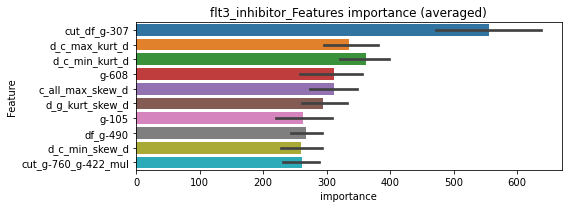

len(train_index) : 5908
len(valid_index) : 1970
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00597985	valid_1's binary_logloss: 0.0572424


len(train_index) : 5908
len(valid_index) : 1970
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00523095	valid_1's binary_logloss: 0.0640181


len(train_index) : 5909
len(valid_index) : 1969
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00456316	valid_1's binary_logloss: 0.0528006
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.00350098	valid_1's binary_logloss: 0.0516038


len(train_index) : 5909
len(valid_index) : 1969
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00457619	valid_1's binary_logloss: 0.0555301
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.00350344	valid_1's binary_logloss: 0.0534901


flt3_inhibitor logloss: 0.05658963874772564
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946534	valid_1's binary_logloss: 0.00218084
[600]	training's binary_logloss: 0.000293064	valid_1's binary_logloss: 0.000976064
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000291501	valid_1's binary_logloss: 0.000973876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000943638	valid_1's binary_logloss: 0.00312218
[600]	training's binary_logloss: 0.000290138	valid_1's binary_logloss: 0.00169516
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000290224	valid_1's binary_logloss: 0.00169496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924479	valid_1's binary_logloss: 0.00253762
[600]	training's binary_logloss: 0.00029028	valid_1's binary_logloss: 0.00129248
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00029028	valid_1's b

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014878, Threshold: 0.0052294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0052294, conf_0:0.00366, conf_1:0.00680
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0352294
threshold: 0.0352294, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087552	valid_1's binary_logloss: 0.00213202
[600]	training's binary_logloss: 0.000282501	valid_1's binary_logloss: 0.00102522
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000284464	valid_1's binary_logloss: 0.0010228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000879607	valid_1's binary_logloss: 0.00265087
[600]	training's binary_logloss: 0.000275077	valid_1's binary_logloss: 0.00127011
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000278596	valid_1's binary_logloss: 0.00126946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906001	valid_1's binary_logloss: 0.00165753
[600]	training's binary_logloss: 0.000284184	valid_1's binary_logloss: 0.000709014
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000284184	valid_1's bi

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1363969, Threshold: 0.0352294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00076
Num_p_label: 13.0, Expected: 3.0, Threshold: 0.0352294, conf_0:0.02818, conf_1:0.04228
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0652294
threshold: 0.0652294, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087552	valid_1's binary_logloss: 0.00213202
[600]	training's binary_logloss: 0.000282501	valid_1's binary_logloss: 0.00102522
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000284464	valid_1's binary_logloss: 0.0010228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000879607	valid_1's binary_logloss: 0.00265087
[600]	training's binary_logloss: 0.000275077	valid_1's binary_logloss: 0.00127011
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000278596	valid_1's binary_logloss: 0.00126946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906001	valid_1's binary_logloss: 0.00165753
[600]	training's binary_logloss: 0.000284184	valid_1's binary_logloss: 0.000709014
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000284184	valid_1's bi

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1363969, Threshold: 0.0652294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, Expected: 3.0, Threshold: 0.0652294, conf_0:0.05871, conf_1:0.07175
threshold: 0.0652294, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


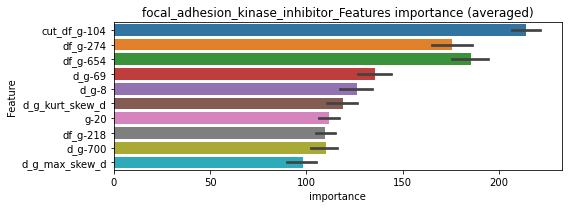

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280628	valid_1's binary_logloss: 0.00096244
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000277876	valid_1's binary_logloss: 0.000958499


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280679	valid_1's binary_logloss: 0.001047
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000278486	valid_1's binary_logloss: 0.00104278


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000285017	valid_1's binary_logloss: 0.000886829
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000285172	valid_1's binary_logloss: 0.000886657


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280764	valid_1's binary_logloss: 0.000694711
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000275158	valid_1's binary_logloss: 0.000686786


focal_adhesion_kinase_inhibitor logloss: 0.0008937342849811536
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000986351	valid_1's binary_logloss: 0.0024471
[600]	training's binary_logloss: 0.00029498	valid_1's binary_logloss: 0.00106441
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00029498	valid_1's binary_logloss: 0.00106441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000968984	valid_1's binary_logloss: 0.00286097
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000299632	valid_1's binary_logloss: 0.00130248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098479	valid_1's binary_logloss: 0.00187206
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000301596	valid_1's binary_logloss: 0.000765206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000982193	valid_1's binary_logloss: 0.0036859

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015082, Threshold: 0.0057864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0057864, conf_0:0.00405, conf_1:0.00752


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000309144	valid_1's binary_logloss: 0.00244955


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0357864
threshold: 0.0357864, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919491	valid_1's binary_logloss: 0.00252815
[600]	training's binary_logloss: 0.000288166	valid_1's binary_logloss: 0.00118781
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000288166	valid_1's binary_logloss: 0.00118781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915123	valid_1's binary_logloss: 0.00259152
[600]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00119473
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00119473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917766	valid_1's binary_logloss: 0.00157233
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289483	valid_1's binary_logloss: 0.000646112
Training until validation scores don't improve for 30 r

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0361731, Threshold: 0.0357864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0357864, conf_0:0.02863, conf_1:0.04294
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.0657864
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0957864


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000293824	valid_1's binary_logloss: 0.00228494


threshold: 0.0957864, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919491	valid_1's binary_logloss: 0.00252815
[600]	training's binary_logloss: 0.000288166	valid_1's binary_logloss: 0.00118781
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000288166	valid_1's binary_logloss: 0.00118781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000915123	valid_1's binary_logloss: 0.00259152
[600]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00119473
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00119473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917766	valid_1's binary_logloss: 0.00157233
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289483	valid_1's binary_logloss: 0.000646112
Training until validation scores don't improve for 30 r

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0361731, Threshold: 0.0957864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0957864, conf_0:0.08621, conf_1:0.10537


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000293824	valid_1's binary_logloss: 0.00228494


threshold: 0.0957864, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


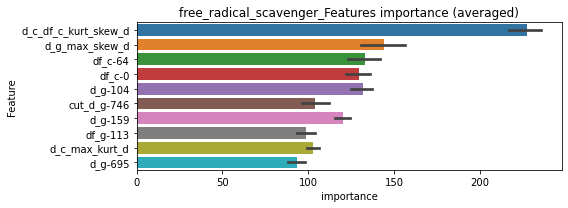

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000286631	valid_1's binary_logloss: 0.000962952


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281738	valid_1's binary_logloss: 0.000875595
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000281884	valid_1's binary_logloss: 0.000875256


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.000578371
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000286901	valid_1's binary_logloss: 0.000577907


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000296578	valid_1's binary_logloss: 0.00199763


free_radical_scavenger logloss: 0.0011035484071489463
fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130786	valid_1's binary_logloss: 0.00364407
[600]	training's binary_logloss: 0.000356193	valid_1's binary_logloss: 0.0016409
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000359605	valid_1's binary_logloss: 0.00164075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121431	valid_1's binary_logloss: 0.00957788
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000353911	valid_1's binary_logloss: 0.00765852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128584	valid_1's binary_logloss: 0.00245495
[600]	training's binary_logloss: 0.000358491	valid_1's binary_logloss: 0.000911545
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000358491	valid_1's binary_logloss: 0.000911545
Training until validation scores don't improve for 30 roun

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020170, Threshold: 0.0061619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0061619, conf_0:0.00431, conf_1:0.00801
Num_p_label: 4.0, Expected: 3.8, Adj_threshold_1: 0.0361619
threshold: 0.0361619, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125861	valid_1's binary_logloss: 0.0028888
[600]	training's binary_logloss: 0.000350133	valid_1's binary_logloss: 0.00118806
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000350218	valid_1's binary_logloss: 0.00118761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117752	valid_1's binary_logloss: 0.00878762
[600]	training's binary_logloss: 0.000337271	valid_1's binary_logloss: 0.00669672
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000340041	valid_1's binary_logloss: 0.0066526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012679	valid_1's binary_logloss: 0.00229243
[600]	training's binary_logloss: 0.000350373	valid_1's binary_logloss: 0.000767701
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000346898	valid_1's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280757, Threshold: 0.0361619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00097
Num_p_label: 17.0, Expected: 3.8, Threshold: 0.0361619, conf_0:0.02893, conf_1:0.04339
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_1: 0.0661619


[600]	training's binary_logloss: 0.000354355	valid_1's binary_logloss: 0.00248592
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000354355	valid_1's binary_logloss: 0.00248592


threshold: 0.0661619, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125861	valid_1's binary_logloss: 0.0028888
[600]	training's binary_logloss: 0.000350133	valid_1's binary_logloss: 0.00118806
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000350218	valid_1's binary_logloss: 0.00118761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117752	valid_1's binary_logloss: 0.00878762
[600]	training's binary_logloss: 0.000337271	valid_1's binary_logloss: 0.00669672
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000340041	valid_1's binary_logloss: 0.0066526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012679	valid_1's binary_logloss: 0.00229243
[600]	training's binary_logloss: 0.000350373	valid_1's binary_logloss: 0.000767701
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000346898	valid_1's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280757, Threshold: 0.0661619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00097
Num_p_label: 7.0, Expected: 3.8, Threshold: 0.0661619, conf_0:0.05955, conf_1:0.07278


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000354355	valid_1's binary_logloss: 0.00248592


threshold: 0.0661619, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


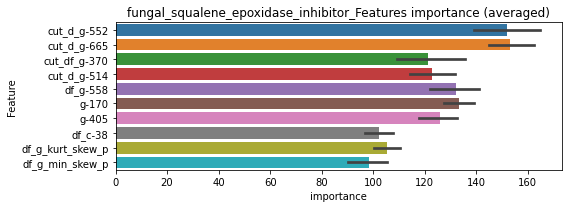

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000356703	valid_1's binary_logloss: 0.00129435


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.00034802	valid_1's binary_logloss: 0.00598652


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000361902	valid_1's binary_logloss: 0.000749573


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000357375	valid_1's binary_logloss: 0.00184762


fungal_squalene_epoxidase_inhibitor logloss: 0.002471054450642682
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


unpredictable_cols:gaba_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0473811	valid_1's binary_logloss: 0.115064
[600]	training's binary_logloss: 0.0205573	valid_1's binary_logloss: 0.0892423
[900]	training's binary_logloss: 0.0125656	valid_1's binary_logloss: 0.0807591
[1200]	training's binary_logloss: 0.0089301	valid_1's binary_logloss: 0.077036
[1500]	training's binary_logloss: 0.00691512	valid_1's binary_logloss: 0.074935
[1800]	training's binary_logloss: 0.00564447	valid_1's binary_logloss: 0.0737512
[2100]	training's binary_logloss: 0.00477053	valid_1's binary_logloss: 0.0728773
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.00475163	valid_1's binary_logloss: 0.0728261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0483632	valid_1's binary_logloss: 0.103863
[600]	training's binary_logloss: 0.0210158	valid_1's binary_logloss: 0.07568
[900]	training's binary_logloss: 0.0128327	valid_

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0278854, Threshold: 0.1280527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 155 → Positive_corect_labels: 641/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1280527, conf_0:0.08964, conf_1:0.16647
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_1: 0.1580527
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_2: 0.1880527
threshold: 0.1880527, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 641.0/3765, y_label_rate: 0.1702523
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045247	valid_1's binary_logloss: 0.103646
[600]	training's binary_logloss: 0.0195653	valid_1's binary_logloss: 0.0746615
[900]	training's binary_logloss: 0.0119413	valid_1's binary_logloss: 0.0652518
[1200]	training's binary_logloss: 0.00848695	valid_1's binary_logloss: 0.0602196
[1500]	training's binary_logloss: 0.00657892	valid_1's binary_logloss: 0.0571313
[1800]	training's binary_logloss: 0.00536986	valid_1's binary_logloss: 0.0552945
[2100]	training's binary_logloss: 0.00454028	valid_1's binary_logloss: 0.0537557
[2400]	training's binary_logloss: 0.00394526	valid_1's binary_logloss: 0.0526197
[2700]	training's binary_logloss: 0.00349425	valid_1's binary_logloss: 0.0519539
Early stopping, best iteration is:
[2805]	training's binary_logloss: 0.00336065	valid_1's binary_logloss: 0.0517144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.044989

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0727256, Threshold: 0.1880527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 626.0/3735
p_label_rate: 0.0185836 Vs.target_rate: 0.00445
Num_p_label: 74.0, Expected: 17.7, Threshold: 0.1880527, conf_0:0.15044, conf_1:0.22566
Num_p_label: 57.0, Expected: 17.7, Adj_threshold_1: 0.2180527
Num_p_label: 54.0, Expected: 17.7, Adj_threshold_2: 0.2480527
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_3: 0.2780527
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_4: 0.3080527
Num_p_label: 36.0, Expected: 17.7, Adj_threshold_5: 0.3380527
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_6: 0.3680527
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_7: 0.3980527
threshold: 0.3980527, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 626.0/3735, y_label_rate: 0.1676037
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.043485	valid_1's binary_logloss: 0.0848619
[600]	training's binary_logloss: 0.0186544	valid_1's binary_logloss: 0.0561967
[900]	training's binary_logloss: 0.0114027	valid_1's binary_logloss: 0.0466926
[1200]	training's binary_logloss: 0.00813618	valid_1's binary_logloss: 0.0418469
[1500]	training's binary_logloss: 0.00632245	valid_1's binary_logloss: 0.0391034
[1800]	training's binary_logloss: 0.00516904	valid_1's binary_logloss: 0.0371685
[2100]	training's binary_logloss: 0.00436837	valid_1's binary_logloss: 0.0356797
[2400]	training's binary_logloss: 0.0037948	valid_1's binary_logloss: 0.0346753
[2700]	training's binary_logloss: 0.00335608	valid_1's binary_logloss: 0.0337956
[3000]	training's binary_logloss: 0.00301498	valid_1's binary_logloss: 0.0331494
Early stopping, best iteration is:
[3190]	training's binary_logloss: 0.0028335	valid_1's binary_logloss: 0.0326941
Training until validat

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0652155, Threshold: 0.3980527, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 619.0/3721
p_label_rate: 0.0090407 Vs.target_rate: 0.00445
Num_p_label: 36.0, Expected: 17.7, Threshold: 0.3980527, conf_0:0.35825, conf_1:0.43786
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_1: 0.4280527
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_2: 0.4580527
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_3: 0.4880527
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_4: 0.5180527
threshold: 0.5180527, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 619.0/3721, y_label_rate: 0.1663531


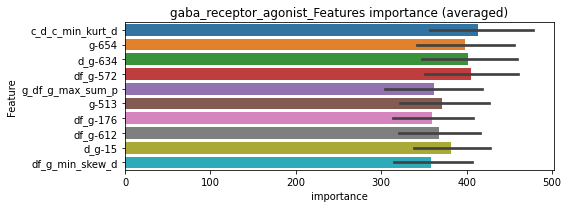

len(train_index) : 2790
len(valid_index) : 931
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00441479	valid_1's binary_logloss: 0.045174
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.00343398	valid_1's binary_logloss: 0.0432071


len(train_index) : 2791
len(valid_index) : 930
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00456689	valid_1's binary_logloss: 0.0355621
Early stopping, best iteration is:
[1637]	training's binary_logloss: 0.00274011	valid_1's binary_logloss: 0.0323344


len(train_index) : 2791
len(valid_index) : 930
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00450596	valid_1's binary_logloss: 0.0317973
Early stopping, best iteration is:
[1624]	training's binary_logloss: 0.0027261	valid_1's binary_logloss: 0.0279865


len(train_index) : 2791
len(valid_index) : 930
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00447517	valid_1's binary_logloss: 0.0390929
[2000]	training's binary_logloss: 0.0022213	valid_1's binary_logloss: 0.0335011
Early stopping, best iteration is:
[2570]	training's binary_logloss: 0.00175896	valid_1's binary_logloss: 0.0318681


gaba_receptor_agonist logloss: 0.03385153924079738
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4991
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4991


unpredictable_cols:gaba_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0527682	valid_1's binary_logloss: 0.104766
[600]	training's binary_logloss: 0.0235127	valid_1's binary_logloss: 0.0831832
[900]	training's binary_logloss: 0.0145297	valid_1's binary_logloss: 0.0771965
[1200]	training's binary_logloss: 0.0104549	valid_1's binary_logloss: 0.0742267
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0104448	valid_1's binary_logloss: 0.074223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0532078	valid_1's binary_logloss: 0.107803
[600]	training's binary_logloss: 0.0235931	valid_1's binary_logloss: 0.0850982
[900]	training's binary_logloss: 0.0145986	valid_1's binary_logloss: 0.0788432
[1200]	training's binary_logloss: 0.0105192	valid_1's binary_logloss: 0.0758535
[1500]	training's binary_logloss: 0.00824109	valid_1's binary_logloss: 0.0737321
Early stopping, best iteration is:
[1535]	training

1 / 3, AUC score:0.991, PR-AUC:0.978
y_Threshold: 0.0372349, Threshold: 0.0760867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 266 → Positive_corect_labels: 965/5723
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0760867, conf_0:0.05326, conf_1:0.09891
threshold: 0.0760867, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 965.0/5723, y_label_rate: 0.1686179
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0462717	valid_1's binary_logloss: 0.103465
[600]	training's binary_logloss: 0.0194449	valid_1's binary_logloss: 0.0789627
[900]	training's binary_logloss: 0.011701	valid_1's binary_logloss: 0.0717088
[1200]	training's binary_logloss: 0.00823432	valid_1's binary_logloss: 0.0685953
Early stopping, best iteration is:
[1290]	training's binary_logloss: 0.00754789	valid_1's binary_logloss: 0.0677508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0459399	valid_1's binary_logloss: 0.0980376
[600]	training's binary_logloss: 0.0194273	valid_1's binary_logloss: 0.07521
[900]	training's binary_logloss: 0.0117029	valid_1's binary_logloss: 0.0684613
[1200]	training's binary_logloss: 0.00821853	valid_1's binary_logloss: 0.0654316
[1500]	training's binary_logloss: 0.00632297	valid_1's binary_logloss: 0.0634894
Early stopping, best iteration is:
[1671]	trainin

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0609005, Threshold: 0.0760867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 932.0/5657
p_label_rate: 0.0148167 Vs.target_rate: 0.00693
Num_p_label: 59.0, Expected: 27.6, Threshold: 0.0760867, conf_0:0.06087, conf_1:0.09130
Num_p_label: 28.0, Expected: 27.6, Adj_threshold_1: 0.1060867
threshold: 0.1060867, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 932.0/5657, y_label_rate: 0.1647516
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0408864	valid_1's binary_logloss: 0.0765874
[600]	training's binary_logloss: 0.0174251	valid_1's binary_logloss: 0.053378
[900]	training's binary_logloss: 0.0104883	valid_1's binary_logloss: 0.0462947
[1200]	training's binary_logloss: 0.0074079	valid_1's binary_logloss: 0.0431128
[1500]	training's binary_logloss: 0.00572392	valid_1's binary_logloss: 0.0414034
[1800]	training's binary_logloss: 0.00465278	valid_1's binary_logloss: 0.0404189
[2100]	training's binary_logloss: 0.00391431	valid_1's binary_logloss: 0.0395845
Early stopping, best iteration is:
[2098]	training's binary_logloss: 0.0039179	valid_1's binary_logloss: 0.0395812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0394672	valid_1's binary_logloss: 0.0982176
[600]	training's binary_logloss: 0.0167814	valid_1's binary_logloss: 0.0780223
[900]	training's binary_logloss: 0.0101421	val

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0545738, Threshold: 0.1060867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 912.0/5617
p_label_rate: 0.0082873 Vs.target_rate: 0.00693
Num_p_label: 33.0, Expected: 27.6, Threshold: 0.1060867, conf_0:0.09548, conf_1:0.11670
threshold: 0.1060867, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 912.0/5617, y_label_rate: 0.1623643


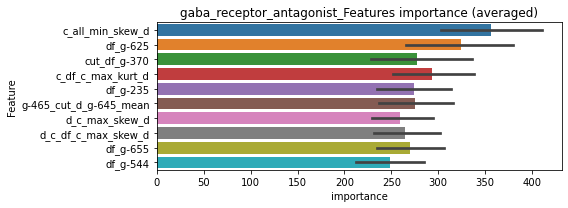

len(train_index) : 4212
len(valid_index) : 1405
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00557096	valid_1's binary_logloss: 0.047382


len(train_index) : 4213
len(valid_index) : 1404
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00389177	valid_1's binary_logloss: 0.0327032
Early stopping, best iteration is:
[1635]	training's binary_logloss: 0.00231371	valid_1's binary_logloss: 0.0302532


len(train_index) : 4213
len(valid_index) : 1404
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00372396	valid_1's binary_logloss: 0.0550381
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.00345174	valid_1's binary_logloss: 0.0545131


len(train_index) : 4213
len(valid_index) : 1404
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00390232	valid_1's binary_logloss: 0.038115
Early stopping, best iteration is:
[1845]	training's binary_logloss: 0.00205662	valid_1's binary_logloss: 0.0349002


gaba_receptor_antagonist logloss: 0.04176312586066732
gaba_receptor_antagonist is unpredictable(><)!
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00330136	valid_1's binary_logloss: 0.0354013
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00130156	valid_1's binary_logloss: 0.0309586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349746	valid_1's binary_logloss: 0.0206011
[600]	training's binary_logloss: 0.000642136	valid_1's binary_logloss: 0.0129563
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000529902	valid_1's binary_logloss: 0.0124411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377249	valid_1's binary_logloss: 0.0122493
[600]	training's binary_logloss: 0.000671812	valid_1's binary_logloss: 0.00595976
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000531062	valid_1's binary_logloss: 0.00561892
Training until validation scores don't improve for 30 rounds
[300]

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0054571, Threshold: 0.0187931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0187931, conf_0:0.01316, conf_1:0.02443
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0487931
threshold: 0.0487931, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00314794	valid_1's binary_logloss: 0.0352573
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00131962	valid_1's binary_logloss: 0.0303931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032535	valid_1's binary_logloss: 0.0182773
[600]	training's binary_logloss: 0.000622064	valid_1's binary_logloss: 0.0116054
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000503631	valid_1's binary_logloss: 0.0111637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00335367	valid_1's binary_logloss: 0.0105817
[600]	training's binary_logloss: 0.000644988	valid_1's binary_logloss: 0.00532228
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000525649	valid_1's binary_logloss: 0.00500632
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332290, Threshold: 0.0487931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0065294 Vs.target_rate: 0.00235
Num_p_label: 26.0, Expected: 9.4, Threshold: 0.0487931, conf_0:0.03903, conf_1:0.05855
Num_p_label: 15.0, Expected: 9.4, Adj_threshold_1: 0.0787931
threshold: 0.0787931, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319115	valid_1's binary_logloss: 0.0230585
[600]	training's binary_logloss: 0.000608337	valid_1's binary_logloss: 0.0160477
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000571714	valid_1's binary_logloss: 0.0158084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324083	valid_1's binary_logloss: 0.0164815
[600]	training's binary_logloss: 0.000615991	valid_1's binary_logloss: 0.0097967
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000597587	valid_1's binary_logloss: 0.00975078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034297	valid_1's binary_logloss: 0.0142205
[600]	training's binary_logloss: 0.000634822	valid_1's binary_logloss: 0.00733463
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000514481	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0229428, Threshold: 0.0787931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0025113 Vs.target_rate: 0.00235
Num_p_label: 10.0, Expected: 9.4, Threshold: 0.0787931, conf_0:0.07091, conf_1:0.08667
threshold: 0.0787931, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


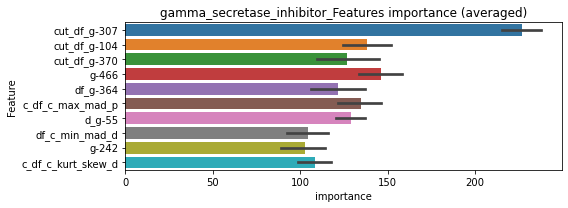

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000566276	valid_1's binary_logloss: 0.0203511


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000869366	valid_1's binary_logloss: 0.0193442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000525306	valid_1's binary_logloss: 0.0135149


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000723148	valid_1's binary_logloss: 0.0116636


gamma_secretase_inhibitor logloss: 0.016220351373522564


mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


unpredictable_cols:glucocorticoid_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0736129	valid_1's binary_logloss: 0.154241
[600]	training's binary_logloss: 0.0309923	valid_1's binary_logloss: 0.114844
[900]	training's binary_logloss: 0.0179946	valid_1's binary_logloss: 0.103495
[1200]	training's binary_logloss: 0.0122894	valid_1's binary_logloss: 0.0990589
Early stopping, best iteration is:
[1361]	training's binary_logloss: 0.0104382	valid_1's binary_logloss: 0.0974489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0748328	valid_1's binary_logloss: 0.155265
[600]	training's binary_logloss: 0.0316432	valid_1's binary_logloss: 0.112195
[900]	training's binary_logloss: 0.0182589	valid_1's binary_logloss: 0.0977478
[1200]	training's binary_logloss: 0.0124533	valid_1's binary_logloss: 0.0918491
[1500]	training's binary_logloss: 0.00934268	valid_1's binary_logloss: 0.0884706
[1800]	training's binary_logloss: 0.00741951	valid_1

1 / 3, AUC score:0.986, PR-AUC:0.975
y_Threshold: 0.0467047, Threshold: 0.1121570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 412 → Positive_corect_labels: 1371/8189
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.1121570, conf_0:0.07851, conf_1:0.14580
threshold: 0.1121570, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1371.0/8189, y_label_rate: 0.1674197
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.063921	valid_1's binary_logloss: 0.139263
[600]	training's binary_logloss: 0.0261965	valid_1's binary_logloss: 0.100405
[900]	training's binary_logloss: 0.015185	valid_1's binary_logloss: 0.0884442
[1200]	training's binary_logloss: 0.0104284	valid_1's binary_logloss: 0.0830114
[1500]	training's binary_logloss: 0.00787088	valid_1's binary_logloss: 0.0795679
[1800]	training's binary_logloss: 0.00629957	valid_1's binary_logloss: 0.0781273
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.00584652	valid_1's binary_logloss: 0.077469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0641145	valid_1's binary_logloss: 0.130779
[600]	training's binary_logloss: 0.0264486	valid_1's binary_logloss: 0.0914489
[900]	training's binary_logloss: 0.0153631	valid_1's binary_logloss: 0.0776289
[1200]	training's binary_logloss: 0.0105319	valid_1'

2 / 3, AUC score:0.994, PR-AUC:0.989
y_Threshold: 0.0727679, Threshold: 0.1121570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1325.0/8097
p_label_rate: 0.0165746 Vs.target_rate: 0.01117
Num_p_label: 66.0, Expected: 44.5, Threshold: 0.1121570, conf_0:0.08973, conf_1:0.13459
threshold: 0.1121570, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 1325.0/8097, y_label_rate: 0.1636409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0597153	valid_1's binary_logloss: 0.121797
[600]	training's binary_logloss: 0.0245979	valid_1's binary_logloss: 0.0800235
[900]	training's binary_logloss: 0.0143321	valid_1's binary_logloss: 0.0664731
[1200]	training's binary_logloss: 0.00983956	valid_1's binary_logloss: 0.0596889
[1500]	training's binary_logloss: 0.00742287	valid_1's binary_logloss: 0.0558853
[1800]	training's binary_logloss: 0.00594202	valid_1's binary_logloss: 0.0534235
[2100]	training's binary_logloss: 0.00494758	valid_1's binary_logloss: 0.0517787
[2400]	training's binary_logloss: 0.00424138	valid_1's binary_logloss: 0.0503495
Early stopping, best iteration is:
[2529]	training's binary_logloss: 0.00399442	valid_1's binary_logloss: 0.0498365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0595426	valid_1's binary_logloss: 0.124495
[600]	training's binary_logloss: 0.0244601	

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0734823, Threshold: 0.1121570, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 1292.0/8031
p_label_rate: 0.0160723 Vs.target_rate: 0.01117
Num_p_label: 64.0, Expected: 44.5, Threshold: 0.1121570, conf_0:0.10094, conf_1:0.12337
threshold: 0.1121570, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 1292.0/8031, y_label_rate: 0.1608766


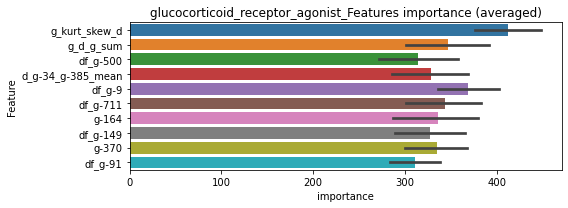

len(train_index) : 6023
len(valid_index) : 2008
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00497517	valid_1's binary_logloss: 0.0523619
Early stopping, best iteration is:
[1264]	training's binary_logloss: 0.00379437	valid_1's binary_logloss: 0.050111


len(train_index) : 6023
len(valid_index) : 2008
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00501736	valid_1's binary_logloss: 0.0464997
Early stopping, best iteration is:
[1606]	training's binary_logloss: 0.0029424	valid_1's binary_logloss: 0.0423582


len(train_index) : 6023
len(valid_index) : 2008
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00502778	valid_1's binary_logloss: 0.0499298
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.00389985	valid_1's binary_logloss: 0.0478582


len(train_index) : 6024
len(valid_index) : 2007
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00494552	valid_1's binary_logloss: 0.054849
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.00375635	valid_1's binary_logloss: 0.0525794


glucocorticoid_receptor_agonist logloss: 0.04822617842961193
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000679307	valid_1's binary_logloss: 0.00252259
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000247886	valid_1's binary_logloss: 0.00149474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672583	valid_1's binary_logloss: 0.00147764
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000251275	valid_1's binary_logloss: 0.000674497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000673804	valid_1's binary_logloss: 0.00124596
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000251045	valid_1's binary_logloss: 0.000566478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000668191	valid_1's binary_logloss: 0.00145624


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010609, Threshold: 0.0028324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0028324, conf_0:0.00198, conf_1:0.00368
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0328324


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000249964	valid_1's binary_logloss: 0.000772163


threshold: 0.0328324, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638687	valid_1's binary_logloss: 0.0022534
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000245994	valid_1's binary_logloss: 0.00143492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638467	valid_1's binary_logloss: 0.00132219
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000247647	valid_1's binary_logloss: 0.00061231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638014	valid_1's binary_logloss: 0.000807119
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000252347	valid_1's binary_logloss: 0.000335154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642053	valid_1's binary_logloss: 0.00107239


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0811574, Threshold: 0.0328324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00055
Num_p_label: 9.0, Expected: 2.2, Threshold: 0.0328324, conf_0:0.02627, conf_1:0.03940
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_1: 0.0628324
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_2: 0.0928324


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000245157	valid_1's binary_logloss: 0.000541655


threshold: 0.0928324, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638687	valid_1's binary_logloss: 0.0022534
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000245994	valid_1's binary_logloss: 0.00143492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638467	valid_1's binary_logloss: 0.00132219
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000247647	valid_1's binary_logloss: 0.00061231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638014	valid_1's binary_logloss: 0.000807119
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000252347	valid_1's binary_logloss: 0.000335154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642053	valid_1's binary_logloss: 0.00107239


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0811574, Threshold: 0.0928324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0928324, conf_0:0.08355, conf_1:0.10212
threshold: 0.0928324, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000245157	valid_1's binary_logloss: 0.000541655


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


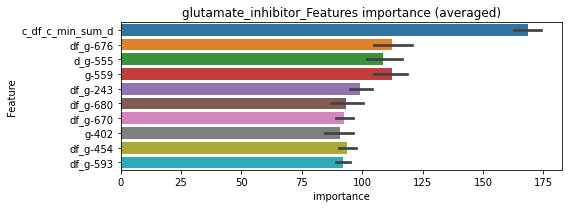

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000247107	valid_1's binary_logloss: 0.00107576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000245996	valid_1's binary_logloss: 0.000512965


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000248504	valid_1's binary_logloss: 0.000344903
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.0006228153544710913


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000250408	valid_1's binary_logloss: 0.00055707


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490468	valid_1's binary_logloss: 0.0407829
[600]	training's binary_logloss: 0.000830125	valid_1's binary_logloss: 0.0324136
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000611749	valid_1's binary_logloss: 0.0317819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503318	valid_1's binary_logloss: 0.0344859
[600]	training's binary_logloss: 0.000858297	valid_1's binary_logloss: 0.0255818
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000783709	valid_1's binary_logloss: 0.0252302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550501	valid_1's binary_logloss: 0.0338354
[600]	training's binary_logloss: 0.000885451	valid_1's binary_logloss: 0.0253821
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000651977	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0063573, Threshold: 0.2185190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.2185190, conf_0:0.15296, conf_1:0.28407
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_1: 0.2485190
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2785190
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_3: 0.3085190
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_4: 0.3385190
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_5: 0.3685190
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_6: 0.3985190
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4285190
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_8: 0.4585190
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_9: 0.4885190
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_10: 0.5185190
threshold: 0.5185190, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458058	valid_1's binary_logloss: 0.0345225
[600]	training's binary_logloss: 0.000792242	valid_1's binary_logloss: 0.0257191
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000653224	valid_1's binary_logloss: 0.0250112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455316	valid_1's binary_logloss: 0.0348919
[600]	training's binary_logloss: 0.000812598	valid_1's binary_logloss: 0.0262076
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000607714	valid_1's binary_logloss: 0.0254985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465049	valid_1's binary_logloss: 0.0341276
[600]	training's binary_logloss: 0.000815985	valid_1's binary_logloss: 0.0268677
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000761786	valid_1's binary_loglo

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0341378, Threshold: 0.5185190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0145655 Vs.target_rate: 0.00311
Num_p_label: 58.0, Expected: 12.4, Threshold: 0.5185190, conf_0:0.41482, conf_1:0.62222
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_1: 0.5485190
Num_p_label: 52.0, Expected: 12.4, Adj_threshold_2: 0.5785190
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_3: 0.6085190
Num_p_label: 46.0, Expected: 12.4, Adj_threshold_4: 0.6385190
Num_p_label: 45.0, Expected: 12.4, Adj_threshold_5: 0.6685190
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_6: 0.6985190
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.7285190
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_8: 0.7585190
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_9: 0.7885190
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_10: 0.8185190
threshold: 0.8185190, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
p

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438751	valid_1's binary_logloss: 0.0279816
[600]	training's binary_logloss: 0.000778248	valid_1's binary_logloss: 0.0195445
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000606691	valid_1's binary_logloss: 0.0188049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445999	valid_1's binary_logloss: 0.0267335
[600]	training's binary_logloss: 0.000782127	valid_1's binary_logloss: 0.0160817
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000615547	valid_1's binary_logloss: 0.0153796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041759	valid_1's binary_logloss: 0.0502303
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000931646	valid_1's binary_logloss: 0.042286
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0309556, Threshold: 0.8185190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0067805 Vs.target_rate: 0.00311
Num_p_label: 27.0, Expected: 12.4, Threshold: 0.8185190, conf_0:0.73667, conf_1:0.90037
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_1: 0.8485190
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_2: 0.8785190
threshold: 0.8785190, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3772, y_label_rate: 0.1702015


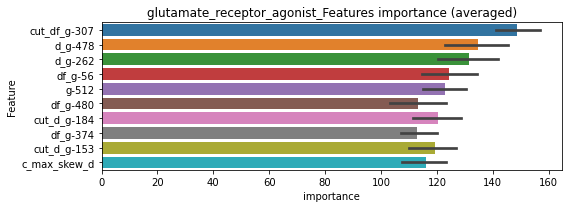

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00068322	valid_1's binary_logloss: 0.0200355


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000876759	valid_1's binary_logloss: 0.0210813


================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00080539	valid_1's binary_logloss: 0.0184765


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000884917	valid_1's binary_logloss: 0.0178682


glutamate_receptor_agonist logloss: 0.019365398367160076


mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


unpredictable_cols:glutamate_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0903375	valid_1's binary_logloss: 0.174677
[600]	training's binary_logloss: 0.0398258	valid_1's binary_logloss: 0.136358
[900]	training's binary_logloss: 0.0232381	valid_1's binary_logloss: 0.123395
[1200]	training's binary_logloss: 0.0157465	valid_1's binary_logloss: 0.11722
[1500]	training's binary_logloss: 0.0117722	valid_1's binary_logloss: 0.114306
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.0110087	valid_1's binary_logloss: 0.113751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0878084	valid_1's binary_logloss: 0.196896
[600]	training's binary_logloss: 0.0387802	valid_1's binary_logloss: 0.166595
[900]	training's binary_logloss: 0.0225447	valid_1's binary_logloss: 0.158867
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.0189135	valid_1's binary_logloss: 0.157886
Training until validatio

1 / 3, AUC score:0.964, PR-AUC:0.933
y_Threshold: 0.0674973, Threshold: 0.1569425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 591 → Positive_corect_labels: 1291/8063
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1569425, conf_0:0.10986, conf_1:0.20403
threshold: 0.1569425, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1291.0/8063, y_label_rate: 0.1601141
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0656671	valid_1's binary_logloss: 0.148139
[600]	training's binary_logloss: 0.0277474	valid_1's binary_logloss: 0.114965
[900]	training's binary_logloss: 0.0161044	valid_1's binary_logloss: 0.103369
[1200]	training's binary_logloss: 0.0110668	valid_1's binary_logloss: 0.098481
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0096143	valid_1's binary_logloss: 0.0974911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0658075	valid_1's binary_logloss: 0.145709
[600]	training's binary_logloss: 0.0279506	valid_1's binary_logloss: 0.114513
[900]	training's binary_logloss: 0.0163123	valid_1's binary_logloss: 0.105447
[1200]	training's binary_logloss: 0.0112006	valid_1's binary_logloss: 0.102395
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.00968538	valid_1's binary_logloss: 0.1009
Training until validatio

2 / 3, AUC score:0.991, PR-AUC:0.979
y_Threshold: 0.0867476, Threshold: 0.1569425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 1207.0/7895
p_label_rate: 0.0163235 Vs.target_rate: 0.01541
Num_p_label: 65.0, Expected: 61.4, Threshold: 0.1569425, conf_0:0.12555, conf_1:0.18833
threshold: 0.1569425, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 1207.0/7895, y_label_rate: 0.1528816
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0548192	valid_1's binary_logloss: 0.129416
[600]	training's binary_logloss: 0.0231889	valid_1's binary_logloss: 0.0985317
[900]	training's binary_logloss: 0.0135445	valid_1's binary_logloss: 0.0890032
[1200]	training's binary_logloss: 0.00932479	valid_1's binary_logloss: 0.0845757
[1500]	training's binary_logloss: 0.00704908	valid_1's binary_logloss: 0.0818423
[1800]	training's binary_logloss: 0.00564138	valid_1's binary_logloss: 0.0802554
Early stopping, best iteration is:
[1927]	training's binary_logloss: 0.00519836	valid_1's binary_logloss: 0.0795179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0555128	valid_1's binary_logloss: 0.112808
[600]	training's binary_logloss: 0.0231649	valid_1's binary_logloss: 0.0798389
[900]	training's binary_logloss: 0.0136146	valid_1's binary_logloss: 0.069719
[1200]	training's binary_logloss: 0.00938474	val

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0846324, Threshold: 0.1569425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1168.0/7817
p_label_rate: 0.0153189 Vs.target_rate: 0.01541
Num_p_label: 61.0, Expected: 61.4, Threshold: 0.1569425, conf_0:0.14125, conf_1:0.17264
threshold: 0.1569425, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 1168.0/7817, y_label_rate: 0.1494179


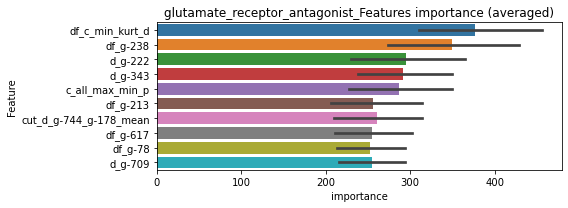

len(train_index) : 5862
len(valid_index) : 1955
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00463305	valid_1's binary_logloss: 0.0599691
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.00426706	valid_1's binary_logloss: 0.059054


len(train_index) : 5863
len(valid_index) : 1954
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00461209	valid_1's binary_logloss: 0.0610394
Early stopping, best iteration is:
[1367]	training's binary_logloss: 0.00323534	valid_1's binary_logloss: 0.0589072


len(train_index) : 5863
len(valid_index) : 1954
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00469422	valid_1's binary_logloss: 0.0505934
Early stopping, best iteration is:
[1399]	training's binary_logloss: 0.00320737	valid_1's binary_logloss: 0.0483734


len(train_index) : 5863
len(valid_index) : 1954
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.00521902	valid_1's binary_logloss: 0.0587573


glutamate_receptor_antagonist logloss: 0.05627333266992723
glutamate_receptor_antagonist is unpredictable(><)!
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112211	valid_1's binary_logloss: 0.00613274
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000330482	valid_1's binary_logloss: 0.00414801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112644	valid_1's binary_logloss: 0.00391682
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00033042	valid_1's binary_logloss: 0.0023812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115113	valid_1's binary_logloss: 0.00336622
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000324458	valid_1's binary_logloss: 0.00161499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114506	valid_1's binary_logloss: 0.00371398


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015809, Threshold: 0.0074955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0074955, conf_0:0.00525, conf_1:0.00974
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0374955


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00032838	valid_1's binary_logloss: 0.0020932


threshold: 0.0374955, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105901	valid_1's binary_logloss: 0.0061466
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000322429	valid_1's binary_logloss: 0.00431486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106718	valid_1's binary_logloss: 0.00441547
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000319176	valid_1's binary_logloss: 0.00293155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108149	valid_1's binary_logloss: 0.00235057
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000325518	valid_1's binary_logloss: 0.00103342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106689	valid_1's binary_logloss: 0.00362057


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304666, Threshold: 0.0374955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.0374955, conf_0:0.03000, conf_1:0.04499
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0674955
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0974955


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00032629	valid_1's binary_logloss: 0.00217996


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1274955
threshold: 0.1274955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105901	valid_1's binary_logloss: 0.0061466
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000322429	valid_1's binary_logloss: 0.00431486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106718	valid_1's binary_logloss: 0.00441547
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000319176	valid_1's binary_logloss: 0.00293155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108149	valid_1's binary_logloss: 0.00235057
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000325518	valid_1's binary_logloss: 0.00103342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106689	valid_1's binary_logloss: 0.00362057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0304666, Threshold: 0.1274955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00032629	valid_1's binary_logloss: 0.00217996


Num_p_label: 7.0, Expected: 3.0, Threshold: 0.1274955, conf_0:0.11475, conf_1:0.14025
threshold: 0.1274955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


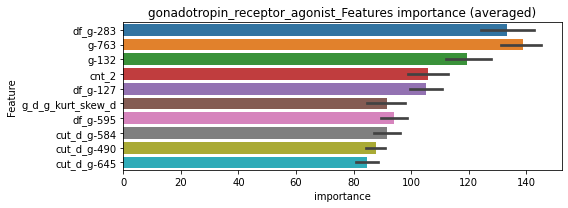

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000319037	valid_1's binary_logloss: 0.00279826


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.00031682	valid_1's binary_logloss: 0.00228986


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000321437	valid_1's binary_logloss: 0.00106141


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000314087	valid_1's binary_logloss: 0.00178305


gonadotropin_receptor_agonist logloss: 0.001986395415872488
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408318	valid_1's binary_logloss: 0.0296784
[600]	training's binary_logloss: 0.000751624	valid_1's binary_logloss: 0.0201611
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000554565	valid_1's binary_logloss: 0.0191928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415283	valid_1's binary_logloss: 0.0231848
[600]	training's binary_logloss: 0.000767246	valid_1's binary_logloss: 0.0129757
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00054943	valid_1's binary_logloss: 0.0119727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436967	valid_1's binary_logloss: 0.0135646
[600]	training's binary_logloss: 0.000779978	valid_1's binary_logloss: 0.00517984
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000571668	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0062336, Threshold: 0.0250926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0250926, conf_0:0.01756, conf_1:0.03262
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0550926
threshold: 0.0550926, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365585	valid_1's binary_logloss: 0.0294749
[600]	training's binary_logloss: 0.000713825	valid_1's binary_logloss: 0.0215829
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000566545	valid_1's binary_logloss: 0.0205909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381458	valid_1's binary_logloss: 0.0217112
[600]	training's binary_logloss: 0.000728868	valid_1's binary_logloss: 0.0125885
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000546057	valid_1's binary_logloss: 0.0116958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410213	valid_1's binary_logloss: 0.0100722
[600]	training's binary_logloss: 0.000756028	valid_1's binary_logloss: 0.00295924
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000563296	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253580, Threshold: 0.0550926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0135610 Vs.target_rate: 0.00252
Num_p_label: 54.0, Expected: 10.0, Threshold: 0.0550926, conf_0:0.04407, conf_1:0.06611
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0850926
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_2: 0.1150926
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_3: 0.1450926
threshold: 0.1450926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365585	valid_1's binary_logloss: 0.0294749
[600]	training's binary_logloss: 0.000713825	valid_1's binary_logloss: 0.0215829
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000566545	valid_1's binary_logloss: 0.0205909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381458	valid_1's binary_logloss: 0.0217112
[600]	training's binary_logloss: 0.000728868	valid_1's binary_logloss: 0.0125885
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000546057	valid_1's binary_logloss: 0.0116958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410213	valid_1's binary_logloss: 0.0100722
[600]	training's binary_logloss: 0.000756028	valid_1's binary_logloss: 0.00295924
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000563296	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253580, Threshold: 0.1450926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.1450926, conf_0:0.13058, conf_1:0.15960
threshold: 0.1450926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


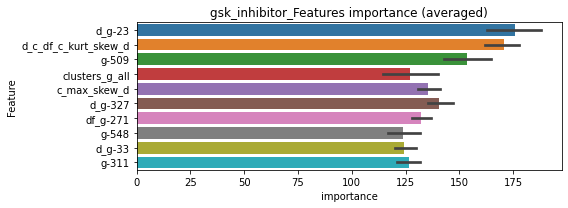

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000645362	valid_1's binary_logloss: 0.0186382


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000579178	valid_1's binary_logloss: 0.012543


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568903	valid_1's binary_logloss: 0.00306837
Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.000545322	valid_1's binary_logloss: 0.00301018


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548671	valid_1's binary_logloss: 0.0102205
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000546349	valid_1's binary_logloss: 0.0102131


gsk_inhibitor logloss: 0.011101747050922555
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492494	valid_1's binary_logloss: 0.0406049
[600]	training's binary_logloss: 0.000823206	valid_1's binary_logloss: 0.0309949
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000901991	valid_1's binary_logloss: 0.0308976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493796	valid_1's binary_logloss: 0.0306352
[600]	training's binary_logloss: 0.000850685	valid_1's binary_logloss: 0.0205261
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000598558	valid_1's binary_logloss: 0.0195982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487722	valid_1's binary_logloss: 0.0228664
[600]	training's binary_logloss: 0.000846912	valid_1's binary_logloss: 0.0145883
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00062498	valid_1's binary_loglos

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0061836, Threshold: 0.0161215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0161215, conf_0:0.01129, conf_1:0.02096
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_1: 0.0461215
threshold: 0.0461215, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428799	valid_1's binary_logloss: 0.0323475
[600]	training's binary_logloss: 0.000775248	valid_1's binary_logloss: 0.0261385
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000644902	valid_1's binary_logloss: 0.0257615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00446291	valid_1's binary_logloss: 0.0266571
[600]	training's binary_logloss: 0.000792988	valid_1's binary_logloss: 0.0170886
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000717254	valid_1's binary_logloss: 0.0167842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427472	valid_1's binary_logloss: 0.0237938
[600]	training's binary_logloss: 0.000795915	valid_1's binary_logloss: 0.015401
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000714053	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0330873, Threshold: 0.0461215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.0461215, conf_0:0.03690, conf_1:0.05535
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_1: 0.0761215
threshold: 0.0761215, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400783	valid_1's binary_logloss: 0.0321001
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000981181	valid_1's binary_logloss: 0.0249974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418304	valid_1's binary_logloss: 0.0299999
[600]	training's binary_logloss: 0.000771596	valid_1's binary_logloss: 0.0225147
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000642224	valid_1's binary_logloss: 0.022183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408861	valid_1's binary_logloss: 0.0323388
[600]	training's binary_logloss: 0.000763285	valid_1's binary_logloss: 0.0271243
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000684278	valid_1's binary_logloss: 0.0268381
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0332890, Threshold: 0.0761215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00302
Num_p_label: 20.0, Expected: 12.0, Threshold: 0.0761215, conf_0:0.06851, conf_1:0.08373
Num_p_label: 13.0, Expected: 12.0, Adj_threshold_1: 0.1061215
threshold: 0.1061215, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3790, y_label_rate: 0.1707124


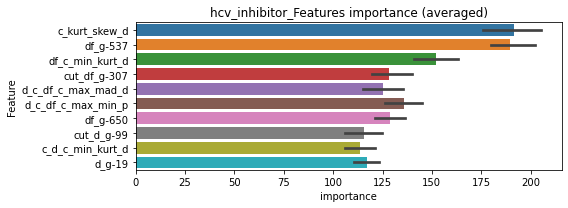

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000697976	valid_1's binary_logloss: 0.019255


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000755428	valid_1's binary_logloss: 0.0210379


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000690278	valid_1's binary_logloss: 0.0194409


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000633699	valid_1's binary_logloss: 0.0162318


hcv_inhibitor logloss: 0.018992019319482304
hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


unpredictable_cols:hdac_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0496892	valid_1's binary_logloss: 0.126007
[600]	training's binary_logloss: 0.0217829	valid_1's binary_logloss: 0.0974427
[900]	training's binary_logloss: 0.0132996	valid_1's binary_logloss: 0.0869905
[1200]	training's binary_logloss: 0.00943819	valid_1's binary_logloss: 0.0818522
[1500]	training's binary_logloss: 0.00730719	valid_1's binary_logloss: 0.0789237
[1800]	training's binary_logloss: 0.00595366	valid_1's binary_logloss: 0.0768242
Early stopping, best iteration is:
[1831]	training's binary_logloss: 0.0058419	valid_1's binary_logloss: 0.076711
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0511266	valid_1's binary_logloss: 0.117617
[600]	training's binary_logloss: 0.0223116	valid_1's binary_logloss: 0.0867638
[900]	training's binary_logloss: 0.0135835	valid_1's binary_logloss: 0.0772725
[1200]	training's binary_logloss: 0.00966366	val

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0301672, Threshold: 0.1013975, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3770
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1013975, conf_0:0.07098, conf_1:0.13182
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_1: 0.1313975
threshold: 0.1313975, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 641.0/3770, y_label_rate: 0.1700265
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0465926	valid_1's binary_logloss: 0.102258
[600]	training's binary_logloss: 0.0200421	valid_1's binary_logloss: 0.0736532
[900]	training's binary_logloss: 0.0122279	valid_1's binary_logloss: 0.0642803
[1200]	training's binary_logloss: 0.00873509	valid_1's binary_logloss: 0.0595523
[1500]	training's binary_logloss: 0.00677303	valid_1's binary_logloss: 0.0565237
[1800]	training's binary_logloss: 0.00552931	valid_1's binary_logloss: 0.0547697
[2100]	training's binary_logloss: 0.0046818	valid_1's binary_logloss: 0.0534367
[2400]	training's binary_logloss: 0.00406735	valid_1's binary_logloss: 0.0524451
[2700]	training's binary_logloss: 0.00359517	valid_1's binary_logloss: 0.0516598
Early stopping, best iteration is:
[2801]	training's binary_logloss: 0.00346157	valid_1's binary_logloss: 0.0514178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.047300

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0776618, Threshold: 0.1313975, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 626.0/3740
p_label_rate: 0.0135610 Vs.target_rate: 0.00445
Num_p_label: 54.0, Expected: 17.7, Threshold: 0.1313975, conf_0:0.10512, conf_1:0.15768
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_1: 0.1613975
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_2: 0.1913975
Num_p_label: 18.0, Expected: 17.7, Adj_threshold_3: 0.2213975
threshold: 0.2213975, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 626.0/3740, y_label_rate: 0.1673797
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437384	valid_1's binary_logloss: 0.108794
[600]	training's binary_logloss: 0.0186867	valid_1's binary_logloss: 0.0797062
[900]	training's binary_logloss: 0.0114207	valid_1's binary_logloss: 0.0696588
[1200]	training's binary_logloss: 0.00813621	valid_1's binary_logloss: 0.0645751
[1500]	training's binary_logloss: 0.00632707	valid_1's binary_logloss: 0.0616954
[1800]	training's binary_logloss: 0.0051831	valid_1's binary_logloss: 0.0597016
[2100]	training's binary_logloss: 0.00440041	valid_1's binary_logloss: 0.0584723
Early stopping, best iteration is:
[2109]	training's binary_logloss: 0.00438004	valid_1's binary_logloss: 0.0584441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0451742	valid_1's binary_logloss: 0.0868157
[600]	training's binary_logloss: 0.0193401	valid_1's binary_logloss: 0.0586837
[900]	training's binary_logloss: 0.0118095	va

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0720735, Threshold: 0.2213975, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 618.0/3724
p_label_rate: 0.0042692 Vs.target_rate: 0.00445
Num_p_label: 17.0, Expected: 17.7, Threshold: 0.2213975, conf_0:0.19926, conf_1:0.24354
threshold: 0.2213975, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 618.0/3724, y_label_rate: 0.1659506


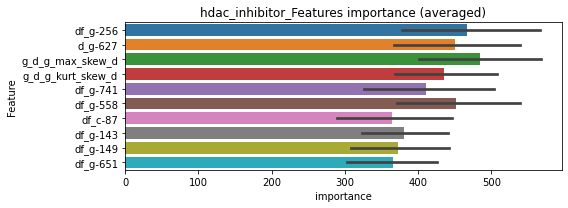

len(train_index) : 2793
len(valid_index) : 931
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00454574	valid_1's binary_logloss: 0.0512681
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.00352764	valid_1's binary_logloss: 0.0493386


len(train_index) : 2793
len(valid_index) : 931
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00461458	valid_1's binary_logloss: 0.0349919
[2000]	training's binary_logloss: 0.00229235	valid_1's binary_logloss: 0.0298614
Early stopping, best iteration is:
[2236]	training's binary_logloss: 0.00205997	valid_1's binary_logloss: 0.0292273


len(train_index) : 2793
len(valid_index) : 931
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0046748	valid_1's binary_logloss: 0.0343811
[2000]	training's binary_logloss: 0.00230728	valid_1's binary_logloss: 0.0292935
Early stopping, best iteration is:
[2391]	training's binary_logloss: 0.00194959	valid_1's binary_logloss: 0.0282649


len(train_index) : 2793
len(valid_index) : 931
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00458379	valid_1's binary_logloss: 0.0403582
Early stopping, best iteration is:
[1281]	training's binary_logloss: 0.00353924	valid_1's binary_logloss: 0.0383384


hdac_inhibitor logloss: 0.036292320462438535
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344115	valid_1's binary_logloss: 0.038053
[600]	training's binary_logloss: 0.000644245	valid_1's binary_logloss: 0.0307337
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000607757	valid_1's binary_logloss: 0.0304244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360184	valid_1's binary_logloss: 0.0355669
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000815708	valid_1's binary_logloss: 0.0294345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414476	valid_1's binary_logloss: 0.0146025
[600]	training's binary_logloss: 0.000717199	valid_1's binary_logloss: 0.00916353
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000558729	valid_1's binary_logloss: 0.00887041
Training until validation scores don't improve for 30 rounds
[300]

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050876, Threshold: 0.0126005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0126005, conf_0:0.00882, conf_1:0.01638
Num_p_label: 3.0, Expected: 9.9, Adj_threshold_1: 0.0426005
threshold: 0.0426005, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00330039	valid_1's binary_logloss: 0.0354292
[600]	training's binary_logloss: 0.000623729	valid_1's binary_logloss: 0.0284725
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000577997	valid_1's binary_logloss: 0.0283546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344896	valid_1's binary_logloss: 0.0312848
[600]	training's binary_logloss: 0.000642417	valid_1's binary_logloss: 0.0253725
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00068171	valid_1's binary_logloss: 0.0252263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384428	valid_1's binary_logloss: 0.0139091
[600]	training's binary_logloss: 0.000688446	valid_1's binary_logloss: 0.00869391
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000670707	valid_1's binary_loglo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0257559, Threshold: 0.0426005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0042692 Vs.target_rate: 0.00248
Num_p_label: 17.0, Expected: 9.9, Threshold: 0.0426005, conf_0:0.03408, conf_1:0.05112
threshold: 0.0426005, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361865	valid_1's binary_logloss: 0.0265986
[600]	training's binary_logloss: 0.000644848	valid_1's binary_logloss: 0.0204506
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000592519	valid_1's binary_logloss: 0.0203225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354514	valid_1's binary_logloss: 0.0200457
[600]	training's binary_logloss: 0.000659885	valid_1's binary_logloss: 0.0133507
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000631216	valid_1's binary_logloss: 0.0132046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342562	valid_1's binary_logloss: 0.0263021
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000855373	valid_1's binary_logloss: 0.0208168
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230840, Threshold: 0.0426005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0045203 Vs.target_rate: 0.00248
Num_p_label: 18.0, Expected: 9.9, Threshold: 0.0426005, conf_0:0.03834, conf_1:0.04686
threshold: 0.0426005, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


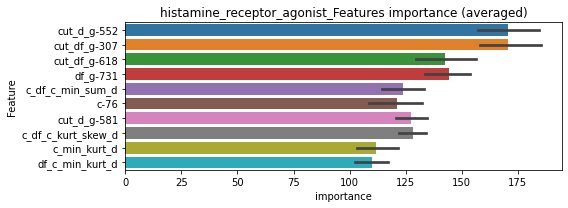

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772419	valid_1's binary_logloss: 0.0183903


================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000869618	valid_1's binary_logloss: 0.0193032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.00053414	valid_1's binary_logloss: 0.0146003


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


histamine_receptor_agonist logloss: 0.016774329696064693


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000790996	valid_1's binary_logloss: 0.0148035


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6823
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6823


unpredictable_cols:histamine_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0585646	valid_1's binary_logloss: 0.123808
[600]	training's binary_logloss: 0.025671	valid_1's binary_logloss: 0.106673
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.017685	valid_1's binary_logloss: 0.102664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0571851	valid_1's binary_logloss: 0.12789
[600]	training's binary_logloss: 0.0249186	valid_1's binary_logloss: 0.109057
[900]	training's binary_logloss: 0.0148415	valid_1's binary_logloss: 0.103484
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.0147014	valid_1's binary_logloss: 0.103398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0588958	valid_1's binary_logloss: 0.116836
[600]	training's binary_logloss: 0.0261913	valid_1's binary_logloss: 0.0954408
[900]	training's binary_logloss: 0.0157977	val

1 / 3, AUC score:0.984, PR-AUC:0.966
y_Threshold: 0.0385776, Threshold: 0.0688019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 428 → Positive_corect_labels: 1287/7759
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0688019, conf_0:0.04816, conf_1:0.08944
threshold: 0.0688019, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1287.0/7759, y_label_rate: 0.1658719
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440415	valid_1's binary_logloss: 0.108543
[600]	training's binary_logloss: 0.0187989	valid_1's binary_logloss: 0.0904059
[900]	training's binary_logloss: 0.0112403	valid_1's binary_logloss: 0.0860403
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.0114638	valid_1's binary_logloss: 0.085859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0459859	valid_1's binary_logloss: 0.0955965
[600]	training's binary_logloss: 0.0196492	valid_1's binary_logloss: 0.0739913
[900]	training's binary_logloss: 0.0116314	valid_1's binary_logloss: 0.0673986
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.0092182	valid_1's binary_logloss: 0.0651177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0482295	valid_1's binary_logloss: 0.0806284
[600]	training's binary_logloss: 0.02

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0603132, Threshold: 0.0688019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 1240.0/7665
p_label_rate: 0.0168257 Vs.target_rate: 0.01012
Num_p_label: 67.0, Expected: 40.3, Threshold: 0.0688019, conf_0:0.05504, conf_1:0.08256
Num_p_label: 32.0, Expected: 40.3, Adj_threshold_1: 0.0988019
threshold: 0.0988019, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1240.0/7665, y_label_rate: 0.1617743
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387069	valid_1's binary_logloss: 0.0767523
[600]	training's binary_logloss: 0.01647	valid_1's binary_logloss: 0.0593186
[900]	training's binary_logloss: 0.00989688	valid_1's binary_logloss: 0.0538582
[1200]	training's binary_logloss: 0.00695013	valid_1's binary_logloss: 0.0513815
Early stopping, best iteration is:
[1331]	training's binary_logloss: 0.00612976	valid_1's binary_logloss: 0.0508305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387341	valid_1's binary_logloss: 0.0851278
[600]	training's binary_logloss: 0.0166833	valid_1's binary_logloss: 0.0647107
[900]	training's binary_logloss: 0.00999401	valid_1's binary_logloss: 0.058109
[1200]	training's binary_logloss: 0.00700431	valid_1's binary_logloss: 0.0549635
[1500]	training's binary_logloss: 0.00535814	valid_1's binary_logloss: 0.0534006
[1800]	training's binary_logloss: 0.00431799	v

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0489447, Threshold: 0.0988019, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 1219.0/7623
p_label_rate: 0.0047715 Vs.target_rate: 0.01012
Num_p_label: 19.0, Expected: 40.3, Threshold: 0.0988019, conf_0:0.08892, conf_1:0.10868
threshold: 0.0988019, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 1219.0/7623, y_label_rate: 0.1599108


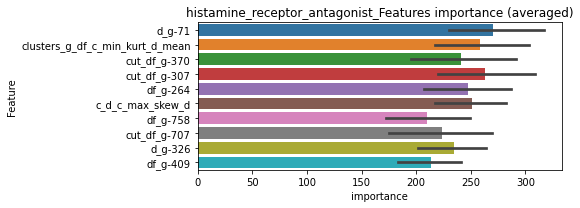

len(train_index) : 5717
len(valid_index) : 1906
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00359849	valid_1's binary_logloss: 0.0353088
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.00325128	valid_1's binary_logloss: 0.0348813


len(train_index) : 5717
len(valid_index) : 1906
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00526535	valid_1's binary_logloss: 0.0558453


len(train_index) : 5717
len(valid_index) : 1906
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.004544	valid_1's binary_logloss: 0.0413897


len(train_index) : 5718
len(valid_index) : 1905
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00391439	valid_1's binary_logloss: 0.0381791


histamine_receptor_antagonist logloss: 0.0425744114975045
histamine_receptor_antagonist is unpredictable(><)!
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015235	valid_1's binary_logloss: 0.00308703
[600]	training's binary_logloss: 0.000371184	valid_1's binary_logloss: 0.00105935
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000370156	valid_1's binary_logloss: 0.00105769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148248	valid_1's binary_logloss: 0.00485871
[600]	training's binary_logloss: 0.000363929	valid_1's binary_logloss: 0.00289252
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000365496	valid_1's binary_logloss: 0.00289203
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016015	valid_1's binary_logloss: 0.0029362
[600]	training's binary_logloss: 0.000377912	valid_1's binary_logloss: 0.000879113
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000378067	valid_1's binary

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021746, Threshold: 0.0214569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0214569, conf_0:0.01502, conf_1:0.02789
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_1: 0.0514569
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_2: 0.0814569
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_3: 0.1114569
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_4: 0.1414569
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.1714569
threshold: 0.1714569, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142592	valid_1's binary_logloss: 0.00319113
[600]	training's binary_logloss: 0.000359765	valid_1's binary_logloss: 0.00125927
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000358142	valid_1's binary_logloss: 0.00125646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141929	valid_1's binary_logloss: 0.00358973
[600]	training's binary_logloss: 0.000357636	valid_1's binary_logloss: 0.00162882
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000355508	valid_1's binary_logloss: 0.00162327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148705	valid_1's binary_logloss: 0.00258517
[600]	training's binary_logloss: 0.000367295	valid_1's binary_logloss: 0.000823777
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000362271	valid_1's bin

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1041130, Threshold: 0.1714569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00101
Num_p_label: 30.0, Expected: 4.0, Threshold: 0.1714569, conf_0:0.13717, conf_1:0.20575
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.2014569
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.2314569
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.2614569
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_4: 0.2914569
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_5: 0.3214569
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_6: 0.3514569
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_7: 0.3814569
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_8: 0.4114569
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_9: 0.4414569
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_10: 0.4714569
threshold: 0.4714569, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142592	valid_1's binary_logloss: 0.00319113
[600]	training's binary_logloss: 0.000359765	valid_1's binary_logloss: 0.00125927
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000358142	valid_1's binary_logloss: 0.00125646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141929	valid_1's binary_logloss: 0.00358973
[600]	training's binary_logloss: 0.000357636	valid_1's binary_logloss: 0.00162882
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000355508	valid_1's binary_logloss: 0.00162327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148705	valid_1's binary_logloss: 0.00258517
[600]	training's binary_logloss: 0.000367295	valid_1's binary_logloss: 0.000823777
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000362271	valid_1's bin

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1041130, Threshold: 0.4714569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, Expected: 4.0, Threshold: 0.4714569, conf_0:0.42431, conf_1:0.51860
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.5014569
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.5314569
threshold: 0.5314569, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


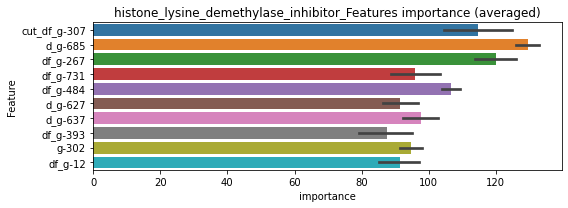

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000377373	valid_1's binary_logloss: 0.00173576


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000360342	valid_1's binary_logloss: 0.00279205


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000368091	valid_1's binary_logloss: 0.000773665


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000369115	valid_1's binary_logloss: 0.00208394


histone_lysine_demethylase_inhibitor logloss: 0.0018465306814231662
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186432	valid_1's binary_logloss: 0.0105085
[600]	training's binary_logloss: 0.000414848	valid_1's binary_logloss: 0.00742281
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000405964	valid_1's binary_logloss: 0.00740348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182338	valid_1's binary_logloss: 0.00769837
[600]	training's binary_logloss: 0.000420787	valid_1's binary_logloss: 0.00515805
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000439217	valid_1's binary_logloss: 0.00510532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019577	valid_1's binary_logloss: 0.00416999
[600]	training's binary_logloss: 0.000435909	valid_1's binary_logloss: 0.00132746
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000408361	valid_1's binary

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025686, Threshold: 0.0071250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0071250, conf_0:0.00499, conf_1:0.00926
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0371250
threshold: 0.0371250, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171671	valid_1's binary_logloss: 0.00469009
[600]	training's binary_logloss: 0.000407129	valid_1's binary_logloss: 0.00175184
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000383838	valid_1's binary_logloss: 0.00171165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170543	valid_1's binary_logloss: 0.00854696
[600]	training's binary_logloss: 0.000405648	valid_1's binary_logloss: 0.0064753
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000390335	valid_1's binary_logloss: 0.00642556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017254	valid_1's binary_logloss: 0.00755045
[600]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.0042394
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000388834	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00043257	valid_1's binary_logloss: 0.0101097


y_Threshold: 0.0106950, Threshold: 0.0371250, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0045203 Vs.target_rate: 0.00134
Num_p_label: 18.0, Expected: 5.4, Threshold: 0.0371250, conf_0:0.02970, conf_1:0.04455
Num_p_label: 6.0, Expected: 5.4, Adj_threshold_1: 0.0671250
threshold: 0.0671250, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171671	valid_1's binary_logloss: 0.00469009
[600]	training's binary_logloss: 0.000407129	valid_1's binary_logloss: 0.00175184
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000383838	valid_1's binary_logloss: 0.00171165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170543	valid_1's binary_logloss: 0.00854696
[600]	training's binary_logloss: 0.000405648	valid_1's binary_logloss: 0.0064753
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000390335	valid_1's binary_logloss: 0.00642556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017254	valid_1's binary_logloss: 0.00755045
[600]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.0042394
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000388834	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106950, Threshold: 0.0671250, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00043257	valid_1's binary_logloss: 0.0101097


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0015068 Vs.target_rate: 0.00134
Num_p_label: 6.0, Expected: 5.4, Threshold: 0.0671250, conf_0:0.06041, conf_1:0.07384
threshold: 0.0671250, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


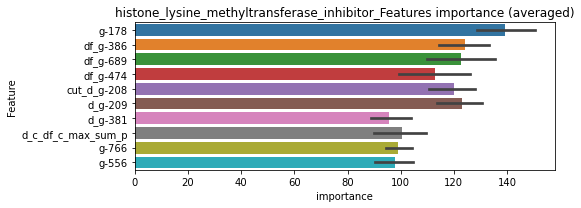

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390434	valid_1's binary_logloss: 0.00177316
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000390434	valid_1's binary_logloss: 0.00177316


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000430808	valid_1's binary_logloss: 0.00594732


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000402824	valid_1's binary_logloss: 0.004047


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000391868	valid_1's binary_logloss: 0.00732972


histone_lysine_methyltransferase_inhibitor logloss: 0.0047742990968173355
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447602	valid_1's binary_logloss: 0.0491246
[600]	training's binary_logloss: 0.000785117	valid_1's binary_logloss: 0.041824
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000767619	valid_1's binary_logloss: 0.0417084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445199	valid_1's binary_logloss: 0.0236303
[600]	training's binary_logloss: 0.000818648	valid_1's binary_logloss: 0.0125838
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000579561	valid_1's binary_logloss: 0.0111544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462221	valid_1's binary_logloss: 0.0209301
[600]	training's binary_logloss: 0.00083364	valid_1's binary_logloss: 0.0125051
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000631065	valid_1's binary_logloss

1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0054347, Threshold: 0.0948020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0948020, conf_0:0.06636, conf_1:0.12324
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_1: 0.1248020
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.1548020
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_3: 0.1848020
Num_p_label: 14.0, Expected: 12.0, Adj_threshold_4: 0.2148020
threshold: 0.2148020, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421554	valid_1's binary_logloss: 0.0353297
[600]	training's binary_logloss: 0.000778842	valid_1's binary_logloss: 0.0257295
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000619021	valid_1's binary_logloss: 0.0251357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409903	valid_1's binary_logloss: 0.0237476
[600]	training's binary_logloss: 0.000780114	valid_1's binary_logloss: 0.0162218
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000615392	valid_1's binary_logloss: 0.0155079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411512	valid_1's binary_logloss: 0.0302641
[600]	training's binary_logloss: 0.000773196	valid_1's binary_logloss: 0.0204149
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000598139	valid_1's binary_loglo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0424953, Threshold: 0.2148020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0135610 Vs.target_rate: 0.00302
Num_p_label: 54.0, Expected: 12.0, Threshold: 0.2148020, conf_0:0.17184, conf_1:0.25776
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_1: 0.2448020
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_2: 0.2748020
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_3: 0.3048020
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_4: 0.3348020
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_5: 0.3648020
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_6: 0.3948020
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_7: 0.4248020
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_8: 0.4548020
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_9: 0.4848020
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_10: 0.5148020
threshold: 0.5148020, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
po

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403284	valid_1's binary_logloss: 0.0297967
[600]	training's binary_logloss: 0.00076216	valid_1's binary_logloss: 0.0234187
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000780699	valid_1's binary_logloss: 0.0233284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411056	valid_1's binary_logloss: 0.0347473
[600]	training's binary_logloss: 0.000761566	valid_1's binary_logloss: 0.0250242
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000572639	valid_1's binary_logloss: 0.0238691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393297	valid_1's binary_logloss: 0.0311244
[600]	training's binary_logloss: 0.000751203	valid_1's binary_logloss: 0.0255182
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00078801	valid_1's binary_logloss

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0337263, Threshold: 0.5148020, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.5148020, conf_0:0.46332, conf_1:0.56628
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_1: 0.5448020
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_2: 0.5748020
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_3: 0.6048020
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_4: 0.6348020
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_5: 0.6648020
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_6: 0.6948020
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_7: 0.7248020
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_8: 0.7548020
threshold: 0.7548020, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


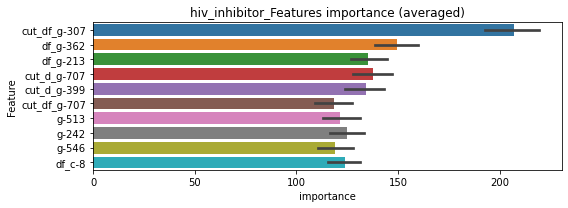

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000900854	valid_1's binary_logloss: 0.0249237


================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000730719	valid_1's binary_logloss: 0.0167726


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000580692	valid_1's binary_logloss: 0.0159472


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000687882	valid_1's binary_logloss: 0.0133552


hiv_inhibitor logloss: 0.01775082517696206


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


unpredictable_cols:hmgcr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0806248	valid_1's binary_logloss: 0.159822
[600]	training's binary_logloss: 0.0344123	valid_1's binary_logloss: 0.1131
[900]	training's binary_logloss: 0.0199087	valid_1's binary_logloss: 0.0959995
[1200]	training's binary_logloss: 0.0135456	valid_1's binary_logloss: 0.0882472
[1500]	training's binary_logloss: 0.0101353	valid_1's binary_logloss: 0.0838784
[1800]	training's binary_logloss: 0.0080358	valid_1's binary_logloss: 0.0806893
[2100]	training's binary_logloss: 0.00663659	valid_1's binary_logloss: 0.0790702
[2400]	training's binary_logloss: 0.00564698	valid_1's binary_logloss: 0.0777702
Early stopping, best iteration is:
[2425]	training's binary_logloss: 0.00557709	valid_1's binary_logloss: 0.077704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0813174	valid_1's binary_logloss: 0.154798
[600]	training's binary_logloss: 0.0342617	valid_

1 / 3, AUC score:0.988, PR-AUC:0.976
y_Threshold: 0.0502665, Threshold: 0.1231360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 414 → Positive_corect_labels: 1421/8466
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.1231360, conf_0:0.08620, conf_1:0.16008
threshold: 0.1231360, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1421.0/8466, y_label_rate: 0.1678479
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0704348	valid_1's binary_logloss: 0.159035
[600]	training's binary_logloss: 0.0291685	valid_1's binary_logloss: 0.116469
[900]	training's binary_logloss: 0.0168477	valid_1's binary_logloss: 0.10259
[1200]	training's binary_logloss: 0.0115388	valid_1's binary_logloss: 0.0958359
[1500]	training's binary_logloss: 0.00866364	valid_1's binary_logloss: 0.0926681
Early stopping, best iteration is:
[1764]	training's binary_logloss: 0.00708292	valid_1's binary_logloss: 0.0909899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0716463	valid_1's binary_logloss: 0.14492
[600]	training's binary_logloss: 0.0295569	valid_1's binary_logloss: 0.0990735
[900]	training's binary_logloss: 0.0171062	valid_1's binary_logloss: 0.083046
[1200]	training's binary_logloss: 0.0116827	valid_1's binary_logloss: 0.0756752
[1500]	training's binary_logloss: 0.00878354	valid_1's

2 / 3, AUC score:0.993, PR-AUC:0.987
y_Threshold: 0.0830881, Threshold: 0.1231360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 1366.0/8356
p_label_rate: 0.0180814 Vs.target_rate: 0.01188
Num_p_label: 72.0, Expected: 47.3, Threshold: 0.1231360, conf_0:0.09851, conf_1:0.14776
Num_p_label: 54.0, Expected: 47.3, Adj_threshold_1: 0.1531360
threshold: 0.1531360, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 1366.0/8356, y_label_rate: 0.1634753
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0661907	valid_1's binary_logloss: 0.1307
[600]	training's binary_logloss: 0.0272958	valid_1's binary_logloss: 0.0886535
[900]	training's binary_logloss: 0.0159203	valid_1's binary_logloss: 0.0749701
[1200]	training's binary_logloss: 0.0108674	valid_1's binary_logloss: 0.0681388
[1500]	training's binary_logloss: 0.00818116	valid_1's binary_logloss: 0.0646461
[1800]	training's binary_logloss: 0.00654258	valid_1's binary_logloss: 0.0623946
[2100]	training's binary_logloss: 0.00544177	valid_1's binary_logloss: 0.0609472
Early stopping, best iteration is:
[2341]	training's binary_logloss: 0.00478293	valid_1's binary_logloss: 0.0599603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0653386	valid_1's binary_logloss: 0.141091
[600]	training's binary_logloss: 0.0267063	valid_1's binary_logloss: 0.0992485
[900]	training's binary_logloss: 0.015431	valid_

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0785412, Threshold: 0.1531360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1329.0/8282
p_label_rate: 0.0128076 Vs.target_rate: 0.01188
Num_p_label: 51.0, Expected: 47.3, Threshold: 0.1531360, conf_0:0.13782, conf_1:0.16845
threshold: 0.1531360, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1329.0/8282, y_label_rate: 0.1604685


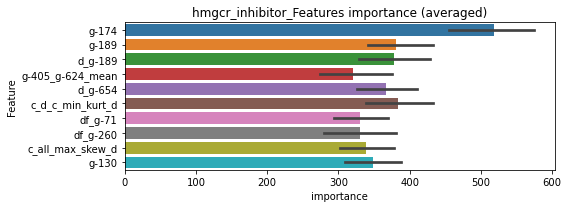

len(train_index) : 6211
len(valid_index) : 2071
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00555572	valid_1's binary_logloss: 0.041149
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.00285209	valid_1's binary_logloss: 0.0341865


len(train_index) : 6211
len(valid_index) : 2071
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00539812	valid_1's binary_logloss: 0.0616208
Early stopping, best iteration is:
[1089]	training's binary_logloss: 0.00488263	valid_1's binary_logloss: 0.0606117


len(train_index) : 6212
len(valid_index) : 2070
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00546585	valid_1's binary_logloss: 0.0521151
Early stopping, best iteration is:
[1769]	training's binary_logloss: 0.00286169	valid_1's binary_logloss: 0.0470396


len(train_index) : 6212
len(valid_index) : 2070
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00535561	valid_1's binary_logloss: 0.074189
Early stopping, best iteration is:
[1264]	training's binary_logloss: 0.00407284	valid_1's binary_logloss: 0.0718345


hmgcr_inhibitor logloss: 0.0534166312407766
hmgcr_inhibitor is unpredictable(><)!
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762741	valid_1's binary_logloss: 0.067268
[600]	training's binary_logloss: 0.00117576	valid_1's binary_logloss: 0.0565009
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000981867	valid_1's binary_logloss: 0.0561189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00811677	valid_1's binary_logloss: 0.0466741
[600]	training's binary_logloss: 0.00122766	valid_1's binary_logloss: 0.030897
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00103225	valid_1's binary_logloss: 0.0302613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815499	valid_1's binary_logloss: 0.0403349
[600]	training's binary_logloss: 0.00123516	valid_1's binary_logloss: 0.0250806
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000984731	valid_1's binary_logloss: 0.

1 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0124691, Threshold: 0.1352962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1352962, conf_0:0.09471, conf_1:0.17589
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_1: 0.1652962
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_2: 0.1952962
Num_p_label: 27.0, Expected: 15.6, Adj_threshold_3: 0.2252962
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_4: 0.2552962
threshold: 0.2552962, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616036	valid_1's binary_logloss: 0.0600203
[600]	training's binary_logloss: 0.00105458	valid_1's binary_logloss: 0.0478781
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000712425	valid_1's binary_logloss: 0.0466947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00621621	valid_1's binary_logloss: 0.0587029
[600]	training's binary_logloss: 0.00104802	valid_1's binary_logloss: 0.047713
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000959306	valid_1's binary_logloss: 0.0472431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00689245	valid_1's binary_logloss: 0.0293338
[600]	training's binary_logloss: 0.00113305	valid_1's binary_logloss: 0.0164217
[900]	training's binary_logloss: 0.000682689	valid_1's binary_logloss: 0.0149505
Early stopping, best iter

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0531348, Threshold: 0.2552962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 636.0/3759
p_label_rate: 0.0215972 Vs.target_rate: 0.00391
Num_p_label: 86.0, Expected: 15.6, Threshold: 0.2552962, conf_0:0.20424, conf_1:0.30636
Num_p_label: 76.0, Expected: 15.6, Adj_threshold_1: 0.2852962
Num_p_label: 69.0, Expected: 15.6, Adj_threshold_2: 0.3152962
Num_p_label: 66.0, Expected: 15.6, Adj_threshold_3: 0.3452962
Num_p_label: 63.0, Expected: 15.6, Adj_threshold_4: 0.3752962
Num_p_label: 57.0, Expected: 15.6, Adj_threshold_5: 0.4052962
Num_p_label: 51.0, Expected: 15.6, Adj_threshold_6: 0.4352962
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_7: 0.4652962
Num_p_label: 42.0, Expected: 15.6, Adj_threshold_8: 0.4952962
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_9: 0.5252962
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_10: 0.5552962
threshold: 0.5552962, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
p

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053078	valid_1's binary_logloss: 0.0433626
[600]	training's binary_logloss: 0.000964475	valid_1's binary_logloss: 0.0318616
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.0007175	valid_1's binary_logloss: 0.0308231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577332	valid_1's binary_logloss: 0.0423038
[600]	training's binary_logloss: 0.000994977	valid_1's binary_logloss: 0.0294689
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000699821	valid_1's binary_logloss: 0.028218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552711	valid_1's binary_logloss: 0.0331255
[600]	training's binary_logloss: 0.00100411	valid_1's binary_logloss: 0.0199269
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000733304	valid_1's binary_logloss: 0

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0631704, Threshold: 0.5552962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0158212 Vs.target_rate: 0.00391
Num_p_label: 63.0, Expected: 15.6, Threshold: 0.5552962, conf_0:0.49977, conf_1:0.61083
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_1: 0.5852962
Num_p_label: 50.0, Expected: 15.6, Adj_threshold_2: 0.6152962
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_3: 0.6452962
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_4: 0.6752962
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_5: 0.7052962
Num_p_label: 33.0, Expected: 15.6, Adj_threshold_6: 0.7352962
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_7: 0.7652962
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_8: 0.7952962
threshold: 0.7952962, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 631.0/3749, y_label_rate: 0.1683115


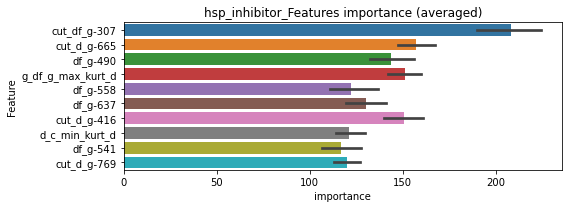

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00105045	valid_1's binary_logloss: 0.0282644


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000838626	valid_1's binary_logloss: 0.0309789


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000712231	valid_1's binary_logloss: 0.0212237


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hsp_inhibitor logloss: 0.027636629523546206


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00136751	valid_1's binary_logloss: 0.0300789


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022254	valid_1's binary_logloss: 0.0258615
[600]	training's binary_logloss: 0.000472965	valid_1's binary_logloss: 0.0198073
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000475654	valid_1's binary_logloss: 0.0197215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226127	valid_1's binary_logloss: 0.0124418
[600]	training's binary_logloss: 0.000477992	valid_1's binary_logloss: 0.00844645
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000449374	valid_1's binary_logloss: 0.00835642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247164	valid_1's binary_logloss: 0.00569619
[600]	training's binary_logloss: 0.000496169	valid_1's binary_logloss: 0.00186598
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000481834	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033617, Threshold: 0.0210173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0210173, conf_0:0.01471, conf_1:0.02732
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0510173
threshold: 0.0510173, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204463	valid_1's binary_logloss: 0.025704
[600]	training's binary_logloss: 0.000447527	valid_1's binary_logloss: 0.01942
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000471701	valid_1's binary_logloss: 0.0193798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218652	valid_1's binary_logloss: 0.0102184
[600]	training's binary_logloss: 0.000470544	valid_1's binary_logloss: 0.00685934
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00046845	valid_1's binary_logloss: 0.00685191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220347	valid_1's binary_logloss: 0.0055692
[600]	training's binary_logloss: 0.000475765	valid_1's binary_logloss: 0.0019321
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000448546	valid_1's binary_logloss

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0338202, Threshold: 0.0510173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0510173, conf_0:0.04081, conf_1:0.06122
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_1: 0.0810173
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_2: 0.1110173
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_3: 0.1410173
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_4: 0.1710173
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_5: 0.2010173
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_6: 0.2310173
threshold: 0.2310173, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202223	valid_1's binary_logloss: 0.0178615
[600]	training's binary_logloss: 0.000451962	valid_1's binary_logloss: 0.0133967
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000420439	valid_1's binary_logloss: 0.013304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216103	valid_1's binary_logloss: 0.00597121
[600]	training's binary_logloss: 0.000467583	valid_1's binary_logloss: 0.00223696
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000424859	valid_1's binary_logloss: 0.00214267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208087	valid_1's binary_logloss: 0.0151855
[600]	training's binary_logloss: 0.000460718	valid_1's binary_logloss: 0.0107949
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000475347	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0701416, Threshold: 0.2310173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.2310173, conf_0:0.20792, conf_1:0.25412
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.2610173
threshold: 0.2610173, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


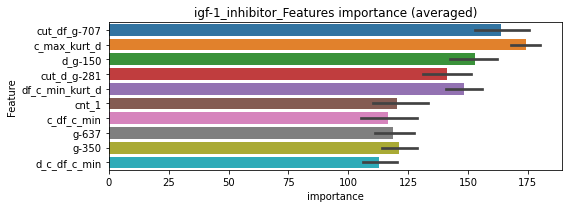

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000447517	valid_1's binary_logloss: 0.0113458


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000438915	valid_1's binary_logloss: 0.002288


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000549037	valid_1's binary_logloss: 0.00894544


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000437538	valid_1's binary_logloss: 0.00672517


igf-1_inhibitor logloss: 0.0073293803076006706
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141079	valid_1's binary_logloss: 0.0105759
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000376818	valid_1's binary_logloss: 0.0073586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147758	valid_1's binary_logloss: 0.00394611
[600]	training's binary_logloss: 0.000370502	valid_1's binary_logloss: 0.00156442
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000370502	valid_1's binary_logloss: 0.00156442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014676	valid_1's binary_logloss: 0.0029994
[600]	training's binary_logloss: 0.000367798	valid_1's binary_logloss: 0.000988561
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000361436	valid_1's binary_logloss: 0.000978982
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030495, Threshold: 0.0139048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0139048, conf_0:0.00973, conf_1:0.01808
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_1: 0.0439048
threshold: 0.0439048, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130881	valid_1's binary_logloss: 0.0114906
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000376363	valid_1's binary_logloss: 0.00809038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132713	valid_1's binary_logloss: 0.00347713
[600]	training's binary_logloss: 0.000348754	valid_1's binary_logloss: 0.00139851
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000341395	valid_1's binary_logloss: 0.00138803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135129	valid_1's binary_logloss: 0.00305265
[600]	training's binary_logloss: 0.000352383	valid_1's binary_logloss: 0.00102023
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000344895	valid_1's binary_logloss: 0.0010047
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0343411, Threshold: 0.0439048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00126
Num_p_label: 37.0, Expected: 5.0, Threshold: 0.0439048, conf_0:0.03512, conf_1:0.05269
Num_p_label: 27.0, Expected: 5.0, Adj_threshold_1: 0.0739048
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1039048
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1339048
threshold: 0.1339048, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130881	valid_1's binary_logloss: 0.0114906
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000376363	valid_1's binary_logloss: 0.00809038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132713	valid_1's binary_logloss: 0.00347713
[600]	training's binary_logloss: 0.000348754	valid_1's binary_logloss: 0.00139851
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000341395	valid_1's binary_logloss: 0.00138803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135129	valid_1's binary_logloss: 0.00305265
[600]	training's binary_logloss: 0.000352383	valid_1's binary_logloss: 0.00102023
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000344895	valid_1's binary_logloss: 0.0010047
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0343411, Threshold: 0.1339048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1339048, conf_0:0.12051, conf_1:0.14730
threshold: 0.1339048, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


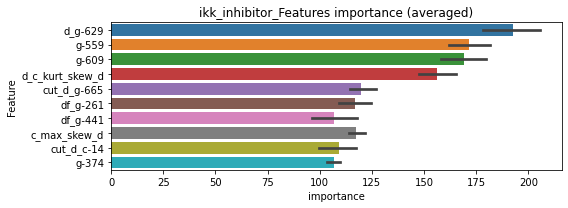

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.0003688	valid_1's binary_logloss: 0.00634665


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000346271	valid_1's binary_logloss: 0.00141502
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000346271	valid_1's binary_logloss: 0.00141502


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000349118	valid_1's binary_logloss: 0.000978709


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000348024	valid_1's binary_logloss: 0.00122969
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000346217	valid_1's binary_logloss: 0.00122427


ikk_inhibitor logloss: 0.002491164404468722
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141152	valid_1's binary_logloss: 0.00644172
[600]	training's binary_logloss: 0.000367841	valid_1's binary_logloss: 0.00405796
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000364837	valid_1's binary_logloss: 0.004047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136139	valid_1's binary_logloss: 0.0115124
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000371811	valid_1's binary_logloss: 0.00830447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139821	valid_1's binary_logloss: 0.0032576
[600]	training's binary_logloss: 0.000363292	valid_1's binary_logloss: 0.00131071
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000357398	valid_1's binary_logloss: 0.00129696
Training until validation scores don't improve for 30 rounds
[3

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020774, Threshold: 0.0105888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0105888, conf_0:0.00741, conf_1:0.01377
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.0405888
threshold: 0.0405888, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130219	valid_1's binary_logloss: 0.00612047
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000367272	valid_1's binary_logloss: 0.0038743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124742	valid_1's binary_logloss: 0.0129221
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000352165	valid_1's binary_logloss: 0.00991952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131342	valid_1's binary_logloss: 0.00277249
[600]	training's binary_logloss: 0.000358102	valid_1's binary_logloss: 0.00118494
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000358102	valid_1's binary_logloss: 0.00118494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129977	valid_1's binary_logloss: 0.00469424
[

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0324969, Threshold: 0.0405888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0075339 Vs.target_rate: 0.00130
Num_p_label: 30.0, Expected: 5.2, Threshold: 0.0405888, conf_0:0.03247, conf_1:0.04871
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0705888
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.1005888
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_3: 0.1305888
threshold: 0.1305888, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130219	valid_1's binary_logloss: 0.00612047
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000367272	valid_1's binary_logloss: 0.0038743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124742	valid_1's binary_logloss: 0.0129221
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000352165	valid_1's binary_logloss: 0.00991952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131342	valid_1's binary_logloss: 0.00277249
[600]	training's binary_logloss: 0.000358102	valid_1's binary_logloss: 0.00118494
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000358102	valid_1's binary_logloss: 0.00118494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129977	valid_1's binary_logloss: 0.00469424
[

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0324969, Threshold: 0.1305888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.1305888, conf_0:0.11753, conf_1:0.14365
threshold: 0.1305888, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


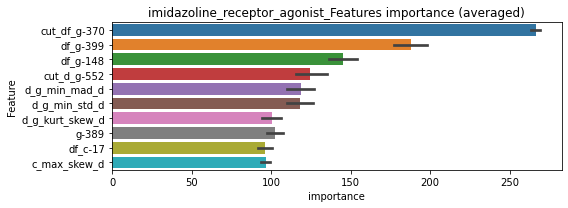

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000361607	valid_1's binary_logloss: 0.00289759


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000389159	valid_1's binary_logloss: 0.00955427


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000359394	valid_1's binary_logloss: 0.00106976


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000373206	valid_1's binary_logloss: 0.00219253


imidazoline_receptor_agonist logloss: 0.003928539198150835
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511704	valid_1's binary_logloss: 0.0403061
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00105675	valid_1's binary_logloss: 0.0332413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492413	valid_1's binary_logloss: 0.0434069
[600]	training's binary_logloss: 0.000844949	valid_1's binary_logloss: 0.0342231
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000899642	valid_1's binary_logloss: 0.0341297
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519074	valid_1's binary_logloss: 0.0362962
[600]	training's binary_logloss: 0.000862647	valid_1's binary_logloss: 0.0271148
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000713032	valid_1's binary_logloss: 0.0264022
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0075943, Threshold: 0.0199608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0199608, conf_0:0.01397, conf_1:0.02595
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0499608
threshold: 0.0499608, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3790, y_label_rate: 0.1717678
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00487577	valid_1's binary_logloss: 0.0262498
[600]	training's binary_logloss: 0.000852612	valid_1's binary_logloss: 0.0163139
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000622216	valid_1's binary_logloss: 0.0154128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451202	valid_1's binary_logloss: 0.0530779
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000980876	valid_1's binary_logloss: 0.0432425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462501	valid_1's binary_logloss: 0.0317685
[600]	training's binary_logloss: 0.000819022	valid_1's binary_logloss: 0.0224314
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000643678	valid_1's binary_logloss: 0.0219195
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0320153, Threshold: 0.0499608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.0499608, conf_0:0.03997, conf_1:0.05995
threshold: 0.0499608, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047909	valid_1's binary_logloss: 0.0333423
[600]	training's binary_logloss: 0.000835168	valid_1's binary_logloss: 0.0222968
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000584501	valid_1's binary_logloss: 0.0210426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438569	valid_1's binary_logloss: 0.041376
[600]	training's binary_logloss: 0.000798764	valid_1's binary_logloss: 0.0355002
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000876322	valid_1's binary_logloss: 0.0353802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449592	valid_1's binary_logloss: 0.037172
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00104984	valid_1's binary_logloss: 0.0309517
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0212811, Threshold: 0.0499608, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3780
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.0499608, conf_0:0.04496, conf_1:0.05496
threshold: 0.0499608, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3780, y_label_rate: 0.1708995


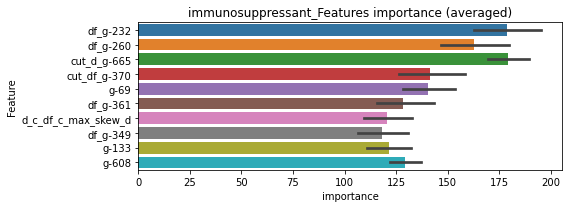

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 immunosuppressant=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00114494	valid_1's binary_logloss: 0.036132
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[225]	training's binary_logloss: 0.00272294	valid_1's binary_logloss: 0.0449469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000905702	valid_1's binary_logloss: 0.020348


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000666866	valid_1's binary_logloss: 0.0099443


immunosuppressant logloss: 0.02784280104232612
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158651	valid_1's binary_logloss: 0.0124482
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000497364	valid_1's binary_logloss: 0.00985468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163993	valid_1's binary_logloss: 0.00744079
[600]	training's binary_logloss: 0.000417294	valid_1's binary_logloss: 0.00448423
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000414796	valid_1's binary_logloss: 0.00445914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179599	valid_1's binary_logloss: 0.00356653
[600]	training's binary_logloss: 0.000424412	valid_1's binary_logloss: 0.00136558
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00041992	valid_1's binary_logloss: 0.0013584
Training until validation scores don't improve for 30 rounds
[

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026322, Threshold: 0.0095505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0095505, conf_0:0.00669, conf_1:0.01242
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0395505
threshold: 0.0395505, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014762	valid_1's binary_logloss: 0.0119728
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000409945	valid_1's binary_logloss: 0.00961435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160418	valid_1's binary_logloss: 0.00615703
[600]	training's binary_logloss: 0.000409132	valid_1's binary_logloss: 0.0032331
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000410038	valid_1's binary_logloss: 0.00323144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166669	valid_1's binary_logloss: 0.00305393
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000424362	valid_1's binary_logloss: 0.00102082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160797	valid_1's binary_logloss: 0.00923043
Ea

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199224, Threshold: 0.0395505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00126
Num_p_label: 29.0, Expected: 5.0, Threshold: 0.0395505, conf_0:0.03164, conf_1:0.04746
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0695505
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.0995505
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1295505
threshold: 0.1295505, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014762	valid_1's binary_logloss: 0.0119728
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000409945	valid_1's binary_logloss: 0.00961435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160418	valid_1's binary_logloss: 0.00615703
[600]	training's binary_logloss: 0.000409132	valid_1's binary_logloss: 0.0032331
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000410038	valid_1's binary_logloss: 0.00323144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166669	valid_1's binary_logloss: 0.00305393
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000424362	valid_1's binary_logloss: 0.00102082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160797	valid_1's binary_logloss: 0.00923043


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000434494	valid_1's binary_logloss: 0.00650048


y_Threshold: 0.0199224, Threshold: 0.1295505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.1295505, conf_0:0.11660, conf_1:0.14251
threshold: 0.1295505, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


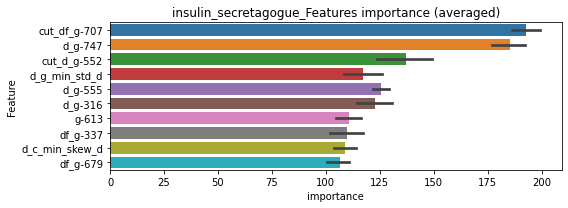

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000469089	valid_1's binary_logloss: 0.00810936


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000420956	valid_1's binary_logloss: 0.00337251


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.00041297	valid_1's binary_logloss: 0.000979637


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.00484891162973953


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000578389	valid_1's binary_logloss: 0.00693226


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031147	valid_1's binary_logloss: 0.0206639
[600]	training's binary_logloss: 0.000573154	valid_1's binary_logloss: 0.0133569
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000544983	valid_1's binary_logloss: 0.0131752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293993	valid_1's binary_logloss: 0.0104973
[600]	training's binary_logloss: 0.000567242	valid_1's binary_logloss: 0.00485973
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499772	valid_1's binary_logloss: 0.00463357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00303667	valid_1's binary_logloss: 0.0195546
[600]	training's binary_logloss: 0.000571485	valid_1's binary_logloss: 0.0147414
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000617017	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040643, Threshold: 0.0094616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0094616, conf_0:0.00662, conf_1:0.01230
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0394616
threshold: 0.0394616, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284119	valid_1's binary_logloss: 0.0170838
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000608751	valid_1's binary_logloss: 0.0107173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283194	valid_1's binary_logloss: 0.00980041
[600]	training's binary_logloss: 0.000556453	valid_1's binary_logloss: 0.00440564
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000482078	valid_1's binary_logloss: 0.00418814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291167	valid_1's binary_logloss: 0.0193895
[600]	training's binary_logloss: 0.000564316	valid_1's binary_logloss: 0.0144416
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000494296	valid_1's binary_logloss: 0.0142453
Training until validation scores don't improve for 30 rounds
[30

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0195630, Threshold: 0.0394616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0027624 Vs.target_rate: 0.00214
Num_p_label: 11.0, Expected: 8.5, Threshold: 0.0394616, conf_0:0.03157, conf_1:0.04735
threshold: 0.0394616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290086	valid_1's binary_logloss: 0.0140125
[600]	training's binary_logloss: 0.000554165	valid_1's binary_logloss: 0.00876228
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000476129	valid_1's binary_logloss: 0.00848695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266615	valid_1's binary_logloss: 0.0172385
[600]	training's binary_logloss: 0.000530023	valid_1's binary_logloss: 0.0116273
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000542133	valid_1's binary_logloss: 0.0115383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283258	valid_1's binary_logloss: 0.0114846
[600]	training's binary_logloss: 0.00055664	valid_1's binary_logloss: 0.0058807
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000490158	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0180533, Threshold: 0.0394616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0022602 Vs.target_rate: 0.00214
Num_p_label: 9.0, Expected: 8.5, Threshold: 0.0394616, conf_0:0.03552, conf_1:0.04341
threshold: 0.0394616, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


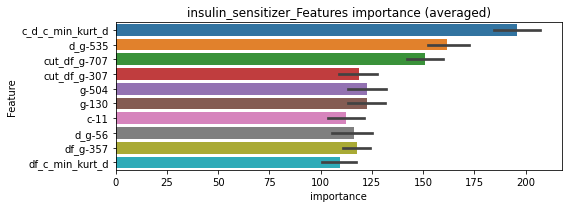

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000493853	valid_1's binary_logloss: 0.00778404


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.00054197	valid_1's binary_logloss: 0.0139192


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000538101	valid_1's binary_logloss: 0.00731295


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000488759	valid_1's binary_logloss: 0.0103499


insulin_sensitizer logloss: 0.009843919465856794
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267591	valid_1's binary_logloss: 0.018557
[600]	training's binary_logloss: 0.000501862	valid_1's binary_logloss: 0.0118443
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000444684	valid_1's binary_logloss: 0.0116542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273539	valid_1's binary_logloss: 0.0119432
[600]	training's binary_logloss: 0.000527335	valid_1's binary_logloss: 0.00660864
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000463311	valid_1's binary_logloss: 0.0064329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296788	valid_1's binary_logloss: 0.00844873
[600]	training's binary_logloss: 0.000540962	valid_1's binary_logloss: 0.00386683
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000458436	valid_1's binary_log

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041860, Threshold: 0.0150840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0150840, conf_0:0.01056, conf_1:0.01961
Num_p_label: 8.0, Expected: 7.0, Adj_threshold_1: 0.0450840
threshold: 0.0450840, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242119	valid_1's binary_logloss: 0.0156455
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0110069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248148	valid_1's binary_logloss: 0.0107074
[600]	training's binary_logloss: 0.000493985	valid_1's binary_logloss: 0.00578751
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000449335	valid_1's binary_logloss: 0.00571183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269697	valid_1's binary_logloss: 0.00735108
[600]	training's binary_logloss: 0.000520652	valid_1's binary_logloss: 0.00368991
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000463504	valid_1's binary_logloss: 0.0035328
Training until validation scores don't improve for 30 rounds
[3

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0492291, Threshold: 0.0450840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0450840, conf_0:0.03607, conf_1:0.05410
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.0750840
threshold: 0.0750840, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242119	valid_1's binary_logloss: 0.0156455
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0110069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248148	valid_1's binary_logloss: 0.0107074
[600]	training's binary_logloss: 0.000493985	valid_1's binary_logloss: 0.00578751
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000449335	valid_1's binary_logloss: 0.00571183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269697	valid_1's binary_logloss: 0.00735108
[600]	training's binary_logloss: 0.000520652	valid_1's binary_logloss: 0.00368991
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000463504	valid_1's binary_logloss: 0.0035328
Training until validation scores don't improve for 30 rounds
[3

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0492291, Threshold: 0.0750840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.0750840, conf_0:0.06758, conf_1:0.08259
threshold: 0.0750840, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


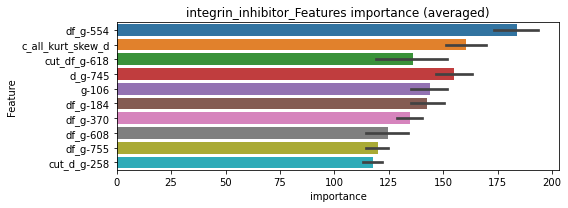

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000494924	valid_1's binary_logloss: 0.0114734


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000455094	valid_1's binary_logloss: 0.00565082


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00044846	valid_1's binary_logloss: 0.00401249
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000441761	valid_1's binary_logloss: 0.00398799


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438654	valid_1's binary_logloss: 0.00627531
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000434665	valid_1's binary_logloss: 0.00625568


integrin_inhibitor logloss: 0.006844108729168632
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0071593	valid_1's binary_logloss: 0.0681671
[600]	training's binary_logloss: 0.00111301	valid_1's binary_logloss: 0.0535809
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000849105	valid_1's binary_logloss: 0.0527698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713971	valid_1's binary_logloss: 0.0538013
[600]	training's binary_logloss: 0.00112429	valid_1's binary_logloss: 0.0408344
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00102718	valid_1's binary_logloss: 0.0407359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00740094	valid_1's binary_logloss: 0.0337872
[600]	training's binary_logloss: 0.00116791	valid_1's binary_logloss: 0.0194346
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000838563	valid_1's binary_logloss: 0

1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0094625, Threshold: 0.1358948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1358948, conf_0:0.09513, conf_1:0.17666
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_1: 0.1658948
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_2: 0.1958948
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_3: 0.2258948
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.2558948
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_5: 0.2858948
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.3158948
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_7: 0.3458948
threshold: 0.3458948, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00643181	valid_1's binary_logloss: 0.0415729
[600]	training's binary_logloss: 0.00106061	valid_1's binary_logloss: 0.0274804
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000733924	valid_1's binary_logloss: 0.0261039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676253	valid_1's binary_logloss: 0.0445694
[600]	training's binary_logloss: 0.0010838	valid_1's binary_logloss: 0.0310256
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000728054	valid_1's binary_logloss: 0.0303515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649086	valid_1's binary_logloss: 0.0438686
[600]	training's binary_logloss: 0.00106212	valid_1's binary_logloss: 0.0297756
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000699749	valid_1's binary_logloss: 

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0410138, Threshold: 0.3458948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0095429 Vs.target_rate: 0.00386
Num_p_label: 38.0, Expected: 15.4, Threshold: 0.3458948, conf_0:0.27672, conf_1:0.41507
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.3758948
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.4058948
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_3: 0.4358948
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.4658948
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.4958948
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_6: 0.5258948
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_7: 0.5558948
threshold: 0.5558948, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604561	valid_1's binary_logloss: 0.043648
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00130923	valid_1's binary_logloss: 0.0339822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649273	valid_1's binary_logloss: 0.0403146
[600]	training's binary_logloss: 0.00104194	valid_1's binary_logloss: 0.0276376
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000674767	valid_1's binary_logloss: 0.0262572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649745	valid_1's binary_logloss: 0.0314819
[600]	training's binary_logloss: 0.00106113	valid_1's binary_logloss: 0.0202547
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00070434	valid_1's binary_logloss: 0.0190903
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0432980, Threshold: 0.5558948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3774
p_label_rate: 0.0055249 Vs.target_rate: 0.00386
Num_p_label: 22.0, Expected: 15.4, Threshold: 0.5558948, conf_0:0.50031, conf_1:0.61148
threshold: 0.5558948, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3774, y_label_rate: 0.1701113


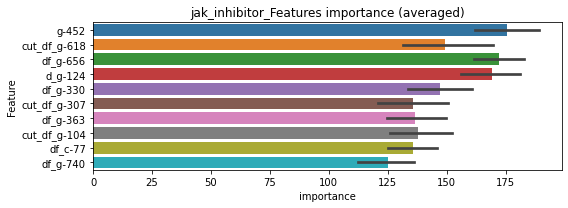

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000844168	valid_1's binary_logloss: 0.0285577


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00136758	valid_1's binary_logloss: 0.0301914
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000689858	valid_1's binary_logloss: 0.016037
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000689858	valid_1's binary_logloss: 0.016037


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00109171	valid_1's binary_logloss: 0.0264107


jak_inhibitor logloss: 0.02530134835441851


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


unpredictable_cols:kit_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0700498	valid_1's binary_logloss: 0.14562
[600]	training's binary_logloss: 0.0303716	valid_1's binary_logloss: 0.114854
[900]	training's binary_logloss: 0.0178142	valid_1's binary_logloss: 0.104309
[1200]	training's binary_logloss: 0.0122265	valid_1's binary_logloss: 0.099973
[1500]	training's binary_logloss: 0.0091987	valid_1's binary_logloss: 0.0972914
Early stopping, best iteration is:
[1719]	training's binary_logloss: 0.00776656	valid_1's binary_logloss: 0.0960509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.067617	valid_1's binary_logloss: 0.156419
[600]	training's binary_logloss: 0.029619	valid_1's binary_logloss: 0.128925
[900]	training's binary_logloss: 0.0173934	valid_1's binary_logloss: 0.120116
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.0136982	valid_1's binary_logloss: 0.117487
Training until validati

1 / 3, AUC score:0.984, PR-AUC:0.969
y_Threshold: 0.0427141, Threshold: 0.0864831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 424 → Positive_corect_labels: 1294/7791
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.0864831, conf_0:0.06054, conf_1:0.11243
threshold: 0.0864831, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1294.0/7791, y_label_rate: 0.1660891
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0580311	valid_1's binary_logloss: 0.118883
[600]	training's binary_logloss: 0.0246968	valid_1's binary_logloss: 0.0879674
[900]	training's binary_logloss: 0.0145978	valid_1's binary_logloss: 0.0767843
[1200]	training's binary_logloss: 0.0101105	valid_1's binary_logloss: 0.0713633
[1500]	training's binary_logloss: 0.0076579	valid_1's binary_logloss: 0.0682489
[1800]	training's binary_logloss: 0.00612646	valid_1's binary_logloss: 0.0660559
[2100]	training's binary_logloss: 0.00510827	valid_1's binary_logloss: 0.0646424
Early stopping, best iteration is:
[2149]	training's binary_logloss: 0.00497293	valid_1's binary_logloss: 0.0644969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0574009	valid_1's binary_logloss: 0.124736
[600]	training's binary_logloss: 0.0244927	valid_1's binary_logloss: 0.0938667
[900]	training's binary_logloss: 0.0144065	vali

2 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0710990, Threshold: 0.0864831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1250.0/7703
p_label_rate: 0.0158212 Vs.target_rate: 0.01146
Num_p_label: 63.0, Expected: 45.6, Threshold: 0.0864831, conf_0:0.06919, conf_1:0.10378
threshold: 0.0864831, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1250.0/7703, y_label_rate: 0.1622744
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0516936	valid_1's binary_logloss: 0.111903
[600]	training's binary_logloss: 0.0220264	valid_1's binary_logloss: 0.0851586
[900]	training's binary_logloss: 0.0130343	valid_1's binary_logloss: 0.0760905
[1200]	training's binary_logloss: 0.0090991	valid_1's binary_logloss: 0.0722753
Early stopping, best iteration is:
[1459]	training's binary_logloss: 0.00715181	valid_1's binary_logloss: 0.0701868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0508695	valid_1's binary_logloss: 0.112181
[600]	training's binary_logloss: 0.0215238	valid_1's binary_logloss: 0.0844669
[900]	training's binary_logloss: 0.0127911	valid_1's binary_logloss: 0.0755501
[1200]	training's binary_logloss: 0.0088956	valid_1's binary_logloss: 0.0709515
[1500]	training's binary_logloss: 0.00677583	valid_1's binary_logloss: 0.0688764
Early stopping, best iteration is:
[1485]	trainin

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0686723, Threshold: 0.0864831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1215.0/7633
p_label_rate: 0.0175791 Vs.target_rate: 0.01146
Num_p_label: 70.0, Expected: 45.6, Threshold: 0.0864831, conf_0:0.07783, conf_1:0.09513
Num_p_label: 35.0, Expected: 45.6, Adj_threshold_1: 0.1164831
threshold: 0.1164831, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1215.0/7633, y_label_rate: 0.1591773


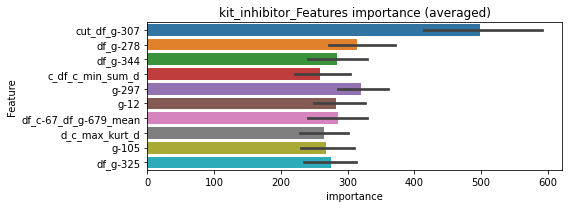

len(train_index) : 5724
len(valid_index) : 1909
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00461168	valid_1's binary_logloss: 0.0443383
Early stopping, best iteration is:
[1665]	training's binary_logloss: 0.00263112	valid_1's binary_logloss: 0.0404735


len(train_index) : 5725
len(valid_index) : 1908
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00789833	valid_1's binary_logloss: 0.0635893


len(train_index) : 5725
len(valid_index) : 1908
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00450629	valid_1's binary_logloss: 0.0575814
Early stopping, best iteration is:
[1372]	training's binary_logloss: 0.00316424	valid_1's binary_logloss: 0.0556443


len(train_index) : 5725
len(valid_index) : 1908
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00758601	valid_1's binary_logloss: 0.0578444


kit_inhibitor logloss: 0.05438605006727141
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000314257	valid_1's binary_logloss: 0.000424765
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000151629	valid_1's binary_logloss: 0.000205264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306802	valid_1's binary_logloss: 0.00159586
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000150364	valid_1's binary_logloss: 0.00131376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315093	valid_1's binary_logloss: 0.000365533
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00015257	valid_1's binary_logloss: 0.000180769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000318649	valid_1's binary_logloss: 0.000384313


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004397, Threshold: 0.0012073, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012073, conf_0:0.00085, conf_1:0.00157
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312073
threshold: 0.0312073, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000153742	valid_1's binary_logloss: 0.000205757


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299236	valid_1's binary_logloss: 0.000358947
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000144565	valid_1's binary_logloss: 0.000178753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000294677	valid_1's binary_logloss: 0.00138642
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00016769	valid_1's binary_logloss: 0.00117926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301797	valid_1's binary_logloss: 0.000318837
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143831	valid_1's binary_logloss: 0.000151913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299922	valid_1's binary_logloss: 0.000367057


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0698625, Threshold: 0.0312073, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312073, conf_0:0.02497, conf_1:0.03745
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0612073
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0912073
threshold: 0.0912073, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000142854	valid_1's binary_logloss: 0.000186406


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299236	valid_1's binary_logloss: 0.000358947
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000144565	valid_1's binary_logloss: 0.000178753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000294677	valid_1's binary_logloss: 0.00138642
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00016769	valid_1's binary_logloss: 0.00117926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301797	valid_1's binary_logloss: 0.000318837
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143831	valid_1's binary_logloss: 0.000151913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299922	valid_1's binary_logloss: 0.000367057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0698625, Threshold: 0.0912073, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0912073, conf_0:0.08209, conf_1:0.10033
threshold: 0.0912073, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000142854	valid_1's binary_logloss: 0.000186406


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


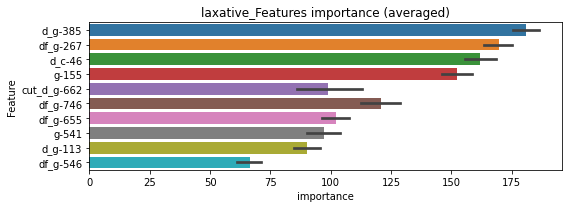

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148116	valid_1's binary_logloss: 0.000188387


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1144]	training's binary_logloss: 0.000145237	valid_1's binary_logloss: 0.00018476
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014819	valid_1's binary_logloss: 0.00107831
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000145923	valid_1's binary_logloss: 0.00107168


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148285	valid_1's binary_logloss: 0.000154518


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000145605	valid_1's binary_logloss: 0.0001516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148298	valid_1's binary_logloss: 0.000184681


laxative logloss: 0.00039715330542780406


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000144997	valid_1's binary_logloss: 0.000180792


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000327362	valid_1's binary_logloss: 0.000667375
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000161678	valid_1's binary_logloss: 0.000441019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321674	valid_1's binary_logloss: 0.00682347
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000159265	valid_1's binary_logloss: 0.00589004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000329591	valid_1's binary_logloss: 0.000386739
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000160039	valid_1's binary_logloss: 0.000192516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000327895	valid_1's binary_logloss: 0.000401639


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005287, Threshold: 0.0012457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012457, conf_0:0.00087, conf_1:0.00162
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312457
threshold: 0.0312457, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000157941	valid_1's binary_logloss: 0.000195816


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307307	valid_1's binary_logloss: 0.000911671
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000151638	valid_1's binary_logloss: 0.000642826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309553	valid_1's binary_logloss: 0.00248803
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000150653	valid_1's binary_logloss: 0.00203004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000310918	valid_1's binary_logloss: 0.000318428
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000151877	valid_1's binary_logloss: 0.000156806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309751	valid_1's binary_logloss: 0.000354948


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0330468, Threshold: 0.0312457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312457, conf_0:0.02500, conf_1:0.03749
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0612457
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0912457
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1212457
threshold: 0.1212457, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000150601	valid_1's binary_logloss: 0.000174375


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307307	valid_1's binary_logloss: 0.000911671
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000151638	valid_1's binary_logloss: 0.000642826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309553	valid_1's binary_logloss: 0.00248803
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000150653	valid_1's binary_logloss: 0.00203004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000310918	valid_1's binary_logloss: 0.000318428
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000151877	valid_1's binary_logloss: 0.000156806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309751	valid_1's binary_logloss: 0.000354948


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0330468, Threshold: 0.1212457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1212457, conf_0:0.10912, conf_1:0.13337
threshold: 0.1212457, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000150601	valid_1's binary_logloss: 0.000174375


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


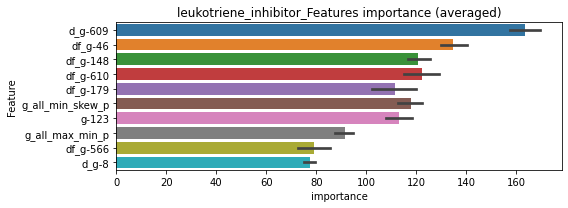

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151075	valid_1's binary_logloss: 0.000398653
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000150609	valid_1's binary_logloss: 0.000398096


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151823	valid_1's binary_logloss: 0.000848363
Early stopping, best iteration is:
[1078]	training's binary_logloss: 0.000149974	valid_1's binary_logloss: 0.000840596


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151507	valid_1's binary_logloss: 0.000170025


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000149335	valid_1's binary_logloss: 0.00016766
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151186	valid_1's binary_logloss: 0.000177482
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000150552	valid_1's binary_logloss: 0.000176683


leukotriene_inhibitor logloss: 0.00039576904175668846
leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324801	valid_1's binary_logloss: 0.0425675
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000854648	valid_1's binary_logloss: 0.0375613
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331175	valid_1's binary_logloss: 0.0427855
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00107363	valid_1's binary_logloss: 0.0395197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384566	valid_1's binary_logloss: 0.0122536
[600]	training's binary_logloss: 0.000720882	valid_1's binary_logloss: 0.00635227
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000585995	valid_1's binary_logloss: 0.00603745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347392	valid_1's binary_logloss: 0.0259313
[600]	

1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0048107, Threshold: 0.0105148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0105148, conf_0:0.00736, conf_1:0.01367
Num_p_label: 2.0, Expected: 10.4, Adj_threshold_1: 0.0405148
threshold: 0.0405148, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323588	valid_1's binary_logloss: 0.0350734
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000799453	valid_1's binary_logloss: 0.0319101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309534	valid_1's binary_logloss: 0.0298293
[600]	training's binary_logloss: 0.000649278	valid_1's binary_logloss: 0.0265874
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000682273	valid_1's binary_logloss: 0.0264961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00330831	valid_1's binary_logloss: 0.0196716
[600]	training's binary_logloss: 0.000670802	valid_1's binary_logloss: 0.0138914
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000573248	valid_1's binary_logloss: 0.0135561
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0179998, Threshold: 0.0405148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0405148, conf_0:0.03241, conf_1:0.04862
threshold: 0.0405148, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309899	valid_1's binary_logloss: 0.0229599
[600]	training's binary_logloss: 0.000652165	valid_1's binary_logloss: 0.0172146
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00056791	valid_1's binary_logloss: 0.0170549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310335	valid_1's binary_logloss: 0.0293912
[600]	training's binary_logloss: 0.000647151	valid_1's binary_logloss: 0.0232033
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000563737	valid_1's binary_logloss: 0.0230498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327759	valid_1's binary_logloss: 0.0281884
[600]	training's binary_logloss: 0.000657731	valid_1's binary_logloss: 0.0231081
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000705645	valid_1's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0145327, Threshold: 0.0405148, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0405148, conf_0:0.03646, conf_1:0.04457
threshold: 0.0405148, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


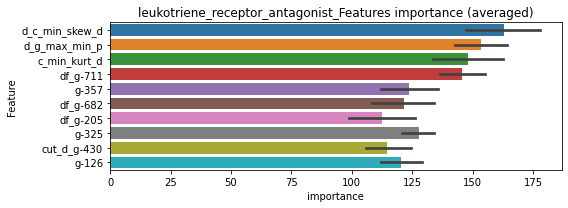

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00106787	valid_1's binary_logloss: 0.0269797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000578189	valid_1's binary_logloss: 0.0163018


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000792577	valid_1's binary_logloss: 0.0209196


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.02070457359525463


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00116877	valid_1's binary_logloss: 0.0186106


lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000546638	valid_1's binary_logloss: 0.00453669
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000471122	valid_1's binary_logloss: 0.00446254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000554912	valid_1's binary_logloss: 0.00192126
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000218904	valid_1's binary_logloss: 0.00105138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059013	valid_1's binary_logloss: 0.00075833
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000226703	valid_1's binary_logloss: 0.000300325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00055176	valid_1's binary_logloss: 0.00180418


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010954, Threshold: 0.0021892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0021892, conf_0:0.00153, conf_1:0.00285
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0321892


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000218257	valid_1's binary_logloss: 0.00102066


threshold: 0.0321892, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000519708	valid_1's binary_logloss: 0.00774723
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000222329	valid_1's binary_logloss: 0.00718066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000536038	valid_1's binary_logloss: 0.00146523
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000214658	valid_1's binary_logloss: 0.000744318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000539976	valid_1's binary_logloss: 0.00063827
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000211409	valid_1's binary_logloss: 0.000253756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000524302	valid_1's binary_logloss: 0.0015359


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0088729, Threshold: 0.0321892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, Expected: 2.0, Threshold: 0.0321892, conf_0:0.02575, conf_1:0.03863
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0621892
threshold: 0.0621892, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000211843	valid_1's binary_logloss: 0.000979809


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000519708	valid_1's binary_logloss: 0.00774723
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000222329	valid_1's binary_logloss: 0.00718066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000536038	valid_1's binary_logloss: 0.00146523
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000214658	valid_1's binary_logloss: 0.000744318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000539976	valid_1's binary_logloss: 0.00063827
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000211409	valid_1's binary_logloss: 0.000253756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000524302	valid_1's binary_logloss: 0.0015359


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0088729, Threshold: 0.0621892, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0621892, conf_0:0.05597, conf_1:0.06841
threshold: 0.0621892, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000211843	valid_1's binary_logloss: 0.000979809


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


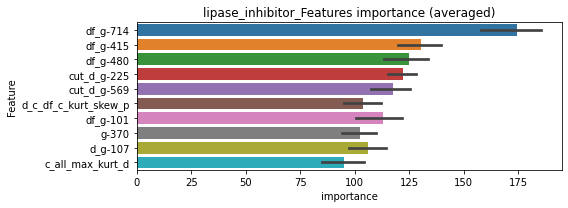

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000236332	valid_1's binary_logloss: 0.00530842
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000213235	valid_1's binary_logloss: 0.000511319
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000213109	valid_1's binary_logloss: 0.000511141


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000215383	valid_1's binary_logloss: 0.000261968
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000215383	valid_1's binary_logloss: 0.000261968


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000210766	valid_1's binary_logloss: 0.000701453
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000210651	valid_1's binary_logloss: 0.000701251


lipase_inhibitor logloss: 0.001696647124141565
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380958	valid_1's binary_logloss: 0.025917
[600]	training's binary_logloss: 0.000704871	valid_1's binary_logloss: 0.0183965
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000653941	valid_1's binary_logloss: 0.0182028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00396117	valid_1's binary_logloss: 0.0202982
[600]	training's binary_logloss: 0.000706995	valid_1's binary_logloss: 0.011094
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000534551	valid_1's binary_logloss: 0.0104511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373848	valid_1's binary_logloss: 0.0191848
[600]	training's binary_logloss: 0.000710285	valid_1's binary_logloss: 0.0126037
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000610146	valid_1's binary_logloss

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061791, Threshold: 0.0840575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0840575, conf_0:0.05884, conf_1:0.10927
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_1: 0.1140575
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1440575
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_3: 0.1740575
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_4: 0.2040575
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_5: 0.2340575
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_6: 0.2640575
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2940575
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_8: 0.3240575
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_9: 0.3540575
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.3840575
threshold: 0.3840575, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
po

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348805	valid_1's binary_logloss: 0.0282701
[600]	training's binary_logloss: 0.000677827	valid_1's binary_logloss: 0.0227746
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000706988	valid_1's binary_logloss: 0.0227595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343954	valid_1's binary_logloss: 0.0248722
[600]	training's binary_logloss: 0.000677958	valid_1's binary_logloss: 0.0179147
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000532141	valid_1's binary_logloss: 0.017275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362416	valid_1's binary_logloss: 0.0158395
[600]	training's binary_logloss: 0.000688156	valid_1's binary_logloss: 0.0094245
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000541658	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0248340, Threshold: 0.3840575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0095429 Vs.target_rate: 0.00256
Num_p_label: 38.0, Expected: 10.2, Threshold: 0.3840575, conf_0:0.30725, conf_1:0.46087
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_1: 0.4140575
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_2: 0.4440575
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_3: 0.4740575
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_4: 0.5040575
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_5: 0.5340575
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_6: 0.5640575
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_7: 0.5940575
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_8: 0.6240575
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_9: 0.6540575
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_10: 0.6840575
threshold: 0.6840575, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329734	valid_1's binary_logloss: 0.0270215
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00105322	valid_1's binary_logloss: 0.022286
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332612	valid_1's binary_logloss: 0.0236829
[600]	training's binary_logloss: 0.000658438	valid_1's binary_logloss: 0.0173172
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000573399	valid_1's binary_logloss: 0.0168662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328711	valid_1's binary_logloss: 0.0184109
[600]	training's binary_logloss: 0.000654407	valid_1's binary_logloss: 0.011473
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000572722	valid_1's binary_logloss: 0.0112876
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259227, Threshold: 0.6840575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0042692 Vs.target_rate: 0.00256
Num_p_label: 17.0, Expected: 10.2, Threshold: 0.6840575, conf_0:0.61565, conf_1:0.75246
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_1: 0.7140575
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_2: 0.7440575
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_3: 0.7740575
threshold: 0.7740575, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


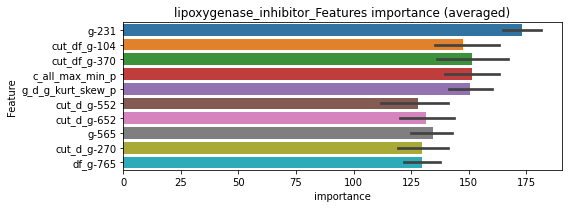

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000757498	valid_1's binary_logloss: 0.0135888


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00135961	valid_1's binary_logloss: 0.0212811
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000537845	valid_1's binary_logloss: 0.00845249
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.00054086	valid_1's binary_logloss: 0.00843706


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000617883	valid_1's binary_logloss: 0.0154351


lipoxygenase_inhibitor logloss: 0.014686586266341235
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000337305	valid_1's binary_logloss: 0.0011969
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000169202	valid_1's binary_logloss: 0.000766736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000339885	valid_1's binary_logloss: 0.00166824
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000168958	valid_1's binary_logloss: 0.00123361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000344613	valid_1's binary_logloss: 0.000380758
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000170378	valid_1's binary_logloss: 0.000193115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000338361	valid_1's binary_logloss: 0.000904285


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004581, Threshold: 0.0020205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0020205, conf_0:0.00141, conf_1:0.00263
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0320205
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0620205
threshold: 0.0620205, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000166903	valid_1's binary_logloss: 0.000513738


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305225	valid_1's binary_logloss: 0.00152071
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000150994	valid_1's binary_logloss: 0.00122609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302892	valid_1's binary_logloss: 0.00127005
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000149121	valid_1's binary_logloss: 0.000869327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309937	valid_1's binary_logloss: 0.000329286
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00015164	valid_1's binary_logloss: 0.0001619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030811	valid_1's binary_logloss: 0.000423788


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0759894, Threshold: 0.0620205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, Expected: 1.0, Threshold: 0.0620205, conf_0:0.04962, conf_1:0.07442
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0920205
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1220205
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.1520205
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.1820205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.2120205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_6: 0.2420205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.2720205
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3020205


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000150832	valid_1's binary_logloss: 0.000226008


Num_p_label: 7.0, Expected: 1.0, Adj_threshold_9: 0.3320205
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_10: 0.3620205
threshold: 0.3620205, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305225	valid_1's binary_logloss: 0.00152071
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000150994	valid_1's binary_logloss: 0.00122609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302892	valid_1's binary_logloss: 0.00127005
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000149121	valid_1's binary_logloss: 0.000869327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309937	valid_1's binary_logloss: 0.000329286
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00015164	valid_1's binary_logloss: 0.0001619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030811	valid_1's binary_logloss: 0.000423788


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0759894, Threshold: 0.3620205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, Expected: 1.0, Threshold: 0.3620205, conf_0:0.32582, conf_1:0.39822
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.3920205
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.4220205
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4520205
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.4820205
threshold: 0.4820205, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000150832	valid_1's binary_logloss: 0.000226008


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


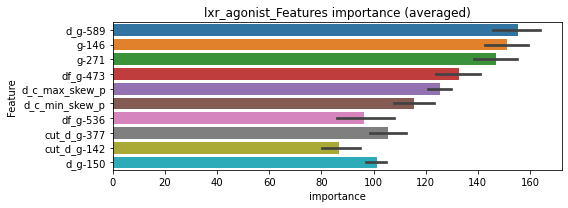

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000155317	valid_1's binary_logloss: 0.000719022


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152494	valid_1's binary_logloss: 0.00100474
Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000151352	valid_1's binary_logloss: 0.00099911


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154786	valid_1's binary_logloss: 0.000162801
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.000154227	valid_1's binary_logloss: 0.00016221


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153896	valid_1's binary_logloss: 0.000199518


lxr_agonist logloss: 0.0005194607737268766


Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.000152064	valid_1's binary_logloss: 0.000197428


mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188785	valid_1's binary_logloss: 0.00948434
[600]	training's binary_logloss: 0.000421158	valid_1's binary_logloss: 0.00579642
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000419587	valid_1's binary_logloss: 0.00577934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188681	valid_1's binary_logloss: 0.00584229
[600]	training's binary_logloss: 0.000421566	valid_1's binary_logloss: 0.00262776
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000412398	valid_1's binary_logloss: 0.00261233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018817	valid_1's binary_logloss: 0.00571182
[600]	training's binary_logloss: 0.00042235	valid_1's binary_logloss: 0.00302238
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000414196	valid_1's binary

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027276, Threshold: 0.0364871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0364871, conf_0:0.02554, conf_1:0.04743
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.0664871
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_2: 0.0964871
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_3: 0.1264871
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.1564871
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.1864871
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2164871
threshold: 0.2164871, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168743	valid_1's binary_logloss: 0.00852786
[600]	training's binary_logloss: 0.0004057	valid_1's binary_logloss: 0.00516337
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000406726	valid_1's binary_logloss: 0.00515896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167664	valid_1's binary_logloss: 0.00621313
[600]	training's binary_logloss: 0.000398914	valid_1's binary_logloss: 0.00339422
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000391003	valid_1's binary_logloss: 0.00336575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167268	valid_1's binary_logloss: 0.00337436
[600]	training's binary_logloss: 0.000401181	valid_1's binary_logloss: 0.00106702
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000401181	valid_1's binary

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388526, Threshold: 0.2164871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0085384 Vs.target_rate: 0.00130
Num_p_label: 34.0, Expected: 5.2, Threshold: 0.2164871, conf_0:0.17319, conf_1:0.25978
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_1: 0.2464871
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_2: 0.2764871
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_3: 0.3064871
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_4: 0.3364871
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_5: 0.3664871
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_6: 0.3964871
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_7: 0.4264871
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_8: 0.4564871
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_9: 0.4864871
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_10: 0.5164871
threshold: 0.5164871, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168743	valid_1's binary_logloss: 0.00852786
[600]	training's binary_logloss: 0.0004057	valid_1's binary_logloss: 0.00516337
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000406726	valid_1's binary_logloss: 0.00515896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167664	valid_1's binary_logloss: 0.00621313
[600]	training's binary_logloss: 0.000398914	valid_1's binary_logloss: 0.00339422
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000391003	valid_1's binary_logloss: 0.00336575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167268	valid_1's binary_logloss: 0.00337436
[600]	training's binary_logloss: 0.000401181	valid_1's binary_logloss: 0.00106702
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000401181	valid_1's binary

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388526, Threshold: 0.5164871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0035158 Vs.target_rate: 0.00130
Num_p_label: 14.0, Expected: 5.2, Threshold: 0.5164871, conf_0:0.46484, conf_1:0.56814
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_1: 0.5464871
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_2: 0.5764871
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.6064871
threshold: 0.6064871, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


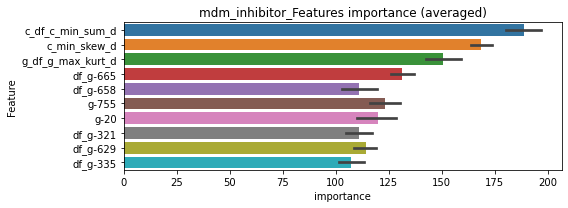

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000397505	valid_1's binary_logloss: 0.00414359


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000403255	valid_1's binary_logloss: 0.00270327


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000407289	valid_1's binary_logloss: 0.00103766


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000416487	valid_1's binary_logloss: 0.0028014


mdm_inhibitor logloss: 0.0026730420977219595
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575624	valid_1's binary_logloss: 0.041132
[600]	training's binary_logloss: 0.000903581	valid_1's binary_logloss: 0.0292503
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000686935	valid_1's binary_logloss: 0.0285325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585712	valid_1's binary_logloss: 0.0381877
[600]	training's binary_logloss: 0.000908431	valid_1's binary_logloss: 0.0253543
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000663336	valid_1's binary_logloss: 0.023922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600391	valid_1's binary_logloss: 0.0184244
[600]	training's binary_logloss: 0.00092662	valid_1's binary_logloss: 0.00662362
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000598992	valid_1's binary_logloss

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0060640, Threshold: 0.0201628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0201628, conf_0:0.01411, conf_1:0.02621
Num_p_label: 6.0, Expected: 12.0, Adj_threshold_1: 0.0501628
threshold: 0.0501628, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535948	valid_1's binary_logloss: 0.0381313
[600]	training's binary_logloss: 0.000872181	valid_1's binary_logloss: 0.0272606
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000616256	valid_1's binary_logloss: 0.0266106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528974	valid_1's binary_logloss: 0.0345685
[600]	training's binary_logloss: 0.000872099	valid_1's binary_logloss: 0.0229225
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000591744	valid_1's binary_logloss: 0.0215415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568124	valid_1's binary_logloss: 0.0184495
[600]	training's binary_logloss: 0.000908649	valid_1's binary_logloss: 0.00649503
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000592124	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232613, Threshold: 0.0501628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3789
p_label_rate: 0.0070316 Vs.target_rate: 0.00302
Num_p_label: 28.0, Expected: 12.0, Threshold: 0.0501628, conf_0:0.04013, conf_1:0.06020
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0801628
threshold: 0.0801628, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522127	valid_1's binary_logloss: 0.026871
[600]	training's binary_logloss: 0.000867952	valid_1's binary_logloss: 0.0158776
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000654643	valid_1's binary_logloss: 0.0153874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478285	valid_1's binary_logloss: 0.0445708
[600]	training's binary_logloss: 0.000824063	valid_1's binary_logloss: 0.0332024
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000618399	valid_1's binary_logloss: 0.0320727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541325	valid_1's binary_logloss: 0.0246653
[600]	training's binary_logloss: 0.000885878	valid_1's binary_logloss: 0.013727
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000619164	valid_1's binary_logloss

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245157, Threshold: 0.0801628, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0801628, conf_0:0.07215, conf_1:0.08818
threshold: 0.0801628, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


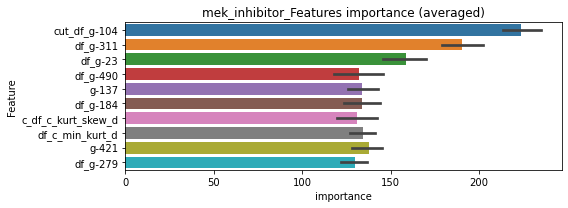

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000732474	valid_1's binary_logloss: 0.0141375


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000631094	valid_1's binary_logloss: 0.0194609


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000739139	valid_1's binary_logloss: 0.0189164


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000969239	valid_1's binary_logloss: 0.0228256


mek_inhibitor logloss: 0.01883388234998603
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453465	valid_1's binary_logloss: 0.0303539
[600]	training's binary_logloss: 0.000811978	valid_1's binary_logloss: 0.0218868
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00066823	valid_1's binary_logloss: 0.0215895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470809	valid_1's binary_logloss: 0.0357542
[600]	training's binary_logloss: 0.000829052	valid_1's binary_logloss: 0.0275324
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000631213	valid_1's binary_logloss: 0.0269484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448011	valid_1's binary_logloss: 0.0369436
[600]	training's binary_logloss: 0.000824114	valid_1's binary_logloss: 0.0309231
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000776453	valid_1's binary_loglos

1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0057587, Threshold: 0.0168221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0168221, conf_0:0.01178, conf_1:0.02187
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0468221
threshold: 0.0468221, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429824	valid_1's binary_logloss: 0.0318636
[600]	training's binary_logloss: 0.000785236	valid_1's binary_logloss: 0.0242737
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000719113	valid_1's binary_logloss: 0.024064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384502	valid_1's binary_logloss: 0.0411995
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.0011623	valid_1's binary_logloss: 0.0367372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417984	valid_1's binary_logloss: 0.0312363
[600]	training's binary_logloss: 0.000779861	valid_1's binary_logloss: 0.0237944
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000741523	valid_1's binary_logloss: 0.0236661
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253892, Threshold: 0.0468221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0047715 Vs.target_rate: 0.00311
Num_p_label: 19.0, Expected: 12.4, Threshold: 0.0468221, conf_0:0.03746, conf_1:0.05619
Num_p_label: 5.0, Expected: 12.4, Adj_threshold_1: 0.0768221
threshold: 0.0768221, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379793	valid_1's binary_logloss: 0.0284324
[600]	training's binary_logloss: 0.000738749	valid_1's binary_logloss: 0.0208692
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000564784	valid_1's binary_logloss: 0.0199922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376393	valid_1's binary_logloss: 0.030906
[600]	training's binary_logloss: 0.000740945	valid_1's binary_logloss: 0.0238151
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00060965	valid_1's binary_logloss: 0.0231954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381745	valid_1's binary_logloss: 0.0361389
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00104266	valid_1's binary_logloss: 0.0321661
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217083, Threshold: 0.0768221, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0012557 Vs.target_rate: 0.00311
Num_p_label: 5.0, Expected: 12.4, Threshold: 0.0768221, conf_0:0.06914, conf_1:0.08450
threshold: 0.0768221, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


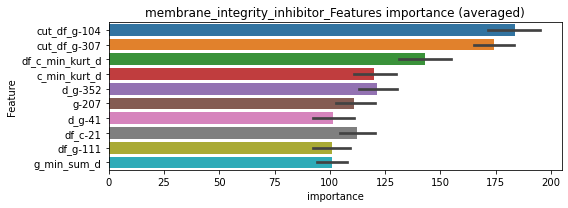

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000882717	valid_1's binary_logloss: 0.0219954


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00108129	valid_1's binary_logloss: 0.0322329
Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.0012064	valid_1's binary_logloss: 0.0274968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00078069	valid_1's binary_logloss: 0.0163243


membrane_integrity_inhibitor logloss: 0.024512353908099707
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133296	valid_1's binary_logloss: 0.00457109
[600]	training's binary_logloss: 0.000346599	valid_1's binary_logloss: 0.00213581
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035157	valid_1's binary_logloss: 0.00213319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139435	valid_1's binary_logloss: 0.00472902
[600]	training's binary_logloss: 0.000351585	valid_1's binary_logloss: 0.00264627
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000352769	valid_1's binary_logloss: 0.00264476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140831	valid_1's binary_logloss: 0.00313019
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000365404	valid_1's binary_logloss: 0.00140263
Training until validation scores don't improve for 30 rounds

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018115, Threshold: 0.0052006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0052006, conf_0:0.00364, conf_1:0.00676
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0352006
threshold: 0.0352006, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130226	valid_1's binary_logloss: 0.0039712
[600]	training's binary_logloss: 0.000343496	valid_1's binary_logloss: 0.00183051
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000349166	valid_1's binary_logloss: 0.00182007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131319	valid_1's binary_logloss: 0.00460732
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000350375	valid_1's binary_logloss: 0.00281165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129403	valid_1's binary_logloss: 0.00403808
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352231	valid_1's binary_logloss: 0.00222262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127725	valid_1's binary_logloss: 0.0106611


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129143, Threshold: 0.0352006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0352006, conf_0:0.02816, conf_1:0.04224


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000352204	valid_1's binary_logloss: 0.00835993


threshold: 0.0352006, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130226	valid_1's binary_logloss: 0.0039712
[600]	training's binary_logloss: 0.000343496	valid_1's binary_logloss: 0.00183051
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000349166	valid_1's binary_logloss: 0.00182007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131319	valid_1's binary_logloss: 0.00460732
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000350375	valid_1's binary_logloss: 0.00281165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129403	valid_1's binary_logloss: 0.00403808
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352231	valid_1's binary_logloss: 0.00222262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127725	valid_1's binary_logloss: 0.0106611


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129143, Threshold: 0.0352006, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0352006, conf_0:0.03168, conf_1:0.03872


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000352204	valid_1's binary_logloss: 0.00835993


threshold: 0.0352006, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


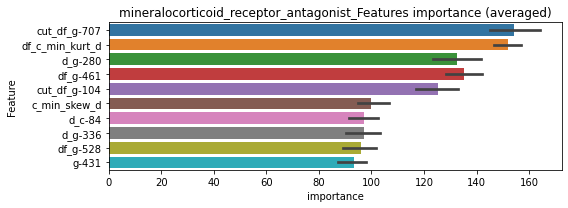

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000339757	valid_1's binary_logloss: 0.00158337


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00036499	valid_1's binary_logloss: 0.00333498


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000335639	valid_1's binary_logloss: 0.00129012


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000362116	valid_1's binary_logloss: 0.00700484


mineralocorticoid_receptor_antagonist logloss: 0.003303316491649186
monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000552047	valid_1's binary_logloss: 0.00338976
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000225977	valid_1's binary_logloss: 0.00243615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000557917	valid_1's binary_logloss: 0.00413506
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000233174	valid_1's binary_logloss: 0.00339877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570916	valid_1's binary_logloss: 0.00100554
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000231408	valid_1's binary_logloss: 0.00048016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000575101	valid_1's binary_logloss: 0.000866812


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008732, Threshold: 0.0019711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019711, conf_0:0.00138, conf_1:0.00256
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319711
threshold: 0.0319711, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000230694	valid_1's binary_logloss: 0.000393604


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000515394	valid_1's binary_logloss: 0.00380131
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000216428	valid_1's binary_logloss: 0.0028687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000512373	valid_1's binary_logloss: 0.00460992
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000221099	valid_1's binary_logloss: 0.00402982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00053169	valid_1's binary_logloss: 0.000603067
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000220037	valid_1's binary_logloss: 0.000261985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000514745	valid_1's binary_logloss: 0.000709841


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113127, Threshold: 0.0319711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.0319711, conf_0:0.02558, conf_1:0.03837


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000216902	valid_1's binary_logloss: 0.000329651


threshold: 0.0319711, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000515394	valid_1's binary_logloss: 0.00380131
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000216428	valid_1's binary_logloss: 0.0028687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000512373	valid_1's binary_logloss: 0.00460992
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000221099	valid_1's binary_logloss: 0.00402982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00053169	valid_1's binary_logloss: 0.000603067
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000220037	valid_1's binary_logloss: 0.000261985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000514745	valid_1's binary_logloss: 0.000709841
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000216

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113127, Threshold: 0.0319711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.0319711, conf_0:0.02877, conf_1:0.03517
threshold: 0.0319711, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


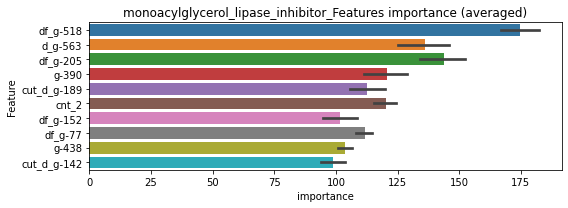

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000214376	valid_1's binary_logloss: 0.0013618
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000224359	valid_1's binary_logloss: 0.00317239
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000217333	valid_1's binary_logloss: 0.00028596
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000215622	valid_1's binary_logloss: 0.000312611


monoacylglycerol_lipase_inhibitor logloss: 0.0012832300505515898
monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


unpredictable_cols:monoamine_oxidase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0429584	valid_1's binary_logloss: 0.0941904
[600]	training's binary_logloss: 0.0185391	valid_1's binary_logloss: 0.0682737
[900]	training's binary_logloss: 0.0113517	valid_1's binary_logloss: 0.0594087
[1200]	training's binary_logloss: 0.00805792	valid_1's binary_logloss: 0.0550503
[1500]	training's binary_logloss: 0.00624226	valid_1's binary_logloss: 0.0522776
[1800]	training's binary_logloss: 0.00510146	valid_1's binary_logloss: 0.0505616
[2100]	training's binary_logloss: 0.00431043	valid_1's binary_logloss: 0.0493623
[2400]	training's binary_logloss: 0.00373905	valid_1's binary_logloss: 0.0485365
Early stopping, best iteration is:
[2603]	training's binary_logloss: 0.00343528	valid_1's binary_logloss: 0.0479764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0432173	valid_1's binary_logloss: 0.090832
[600]	training's binary_logloss: 0.018571

1 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0240837, Threshold: 0.0627471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3778
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0627471, conf_0:0.04392, conf_1:0.08157
Num_p_label: 17.0, Expected: 14.2, Adj_threshold_1: 0.0927471
threshold: 0.0927471, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3778, y_label_rate: 0.1709899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040727	valid_1's binary_logloss: 0.089435
[600]	training's binary_logloss: 0.0174008	valid_1's binary_logloss: 0.0636778
[900]	training's binary_logloss: 0.0106379	valid_1's binary_logloss: 0.0560612
[1200]	training's binary_logloss: 0.00756908	valid_1's binary_logloss: 0.0520735
[1500]	training's binary_logloss: 0.00587653	valid_1's binary_logloss: 0.0498672
[1800]	training's binary_logloss: 0.00480793	valid_1's binary_logloss: 0.0484613
Early stopping, best iteration is:
[2009]	training's binary_logloss: 0.00426151	valid_1's binary_logloss: 0.0473701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0393996	valid_1's binary_logloss: 0.0931339
[600]	training's binary_logloss: 0.0168469	valid_1's binary_logloss: 0.0691215
[900]	training's binary_logloss: 0.0103321	valid_1's binary_logloss: 0.0617217
[1200]	training's binary_logloss: 0.00736355	va

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0533064, Threshold: 0.0927471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 640.0/3766
p_label_rate: 0.0075339 Vs.target_rate: 0.00357
Num_p_label: 30.0, Expected: 14.2, Threshold: 0.0927471, conf_0:0.07420, conf_1:0.11130
Num_p_label: 17.0, Expected: 14.2, Adj_threshold_1: 0.1227471
threshold: 0.1227471, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0386826	valid_1's binary_logloss: 0.0897637
[600]	training's binary_logloss: 0.0164717	valid_1's binary_logloss: 0.0647965
[900]	training's binary_logloss: 0.0100642	valid_1's binary_logloss: 0.0562749
[1200]	training's binary_logloss: 0.00718504	valid_1's binary_logloss: 0.0525634
[1500]	training's binary_logloss: 0.00557633	valid_1's binary_logloss: 0.0497973
[1800]	training's binary_logloss: 0.00457565	valid_1's binary_logloss: 0.0482139
Early stopping, best iteration is:
[1834]	training's binary_logloss: 0.00448075	valid_1's binary_logloss: 0.0478756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0393584	valid_1's binary_logloss: 0.0950518
[600]	training's binary_logloss: 0.0166626	valid_1's binary_logloss: 0.0699103
[900]	training's binary_logloss: 0.010209	valid_1's binary_logloss: 0.0618369
[1200]	training's binary_logloss: 0.00727834	v

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0546325, Threshold: 0.1227471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0045203 Vs.target_rate: 0.00357
Num_p_label: 18.0, Expected: 14.2, Threshold: 0.1227471, conf_0:0.11047, conf_1:0.13502
threshold: 0.1227471, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 634.0/3754, y_label_rate: 0.1688865


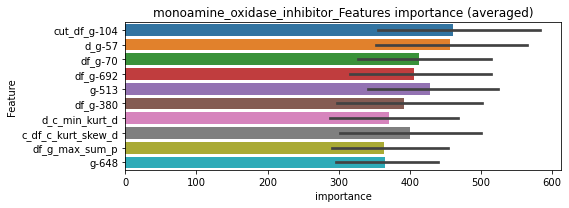

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00412201	valid_1's binary_logloss: 0.035328
Early stopping, best iteration is:
[1630]	training's binary_logloss: 0.00249376	valid_1's binary_logloss: 0.0322287


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00400264	valid_1's binary_logloss: 0.0435386
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.00367154	valid_1's binary_logloss: 0.0430044


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00408224	valid_1's binary_logloss: 0.0320024
Early stopping, best iteration is:
[1880]	training's binary_logloss: 0.00215012	valid_1's binary_logloss: 0.0276734


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.00455891	valid_1's binary_logloss: 0.0372026


monoamine_oxidase_inhibitor logloss: 0.035028639830005086
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000999621	valid_1's binary_logloss: 0.00178773
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000310168	valid_1's binary_logloss: 0.00067825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000988688	valid_1's binary_logloss: 0.00362511
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00031072	valid_1's binary_logloss: 0.00176144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000992347	valid_1's binary_logloss: 0.00285123
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000314099	valid_1's binary_logloss: 0.00146217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000965474	valid_1's binary_logloss: 0.0039826


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016133, Threshold: 0.0160353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0160353, conf_0:0.01122, conf_1:0.02085
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.0460353


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000305242	valid_1's binary_logloss: 0.00215648


Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.0760353
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.1060353
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1360353
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1660353
threshold: 0.1660353, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901405	valid_1's binary_logloss: 0.00165617
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000296267	valid_1's binary_logloss: 0.000690272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901488	valid_1's binary_logloss: 0.00473993
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000296546	valid_1's binary_logloss: 0.00290718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914394	valid_1's binary_logloss: 0.00317728
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304972	valid_1's binary_logloss: 0.00202093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000894085	valid_1's binary_logloss: 0.00365447


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0565427, Threshold: 0.1660353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0075339 Vs.target_rate: 0.00076
Num_p_label: 30.0, Expected: 3.0, Threshold: 0.1660353, conf_0:0.13283, conf_1:0.19924
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.1960353
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.2260353
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_3: 0.2560353
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2860353
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.3160353


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00029565	valid_1's binary_logloss: 0.0021992


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3460353
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.3760353
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.4060353
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.4360353
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_10: 0.4660353
threshold: 0.4660353, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901405	valid_1's binary_logloss: 0.00165617
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000296267	valid_1's binary_logloss: 0.000690272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000901488	valid_1's binary_logloss: 0.00473993
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000296546	valid_1's binary_logloss: 0.00290718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914394	valid_1's binary_logloss: 0.00317728
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304972	valid_1's binary_logloss: 0.00202093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000894085	valid_1's binary_logloss: 0.00365447


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0565427, Threshold: 0.4660353, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.4660353, conf_0:0.41943, conf_1:0.51264


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00029565	valid_1's binary_logloss: 0.0021992


threshold: 0.4660353, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


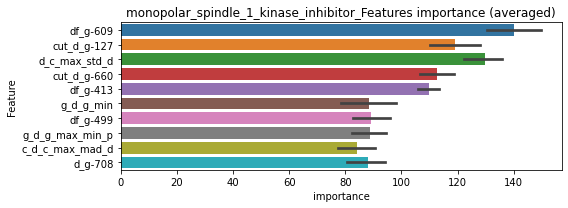

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000298555	valid_1's binary_logloss: 0.000683854


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000300143	valid_1's binary_logloss: 0.00192367


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000300811	valid_1's binary_logloss: 0.00157205


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000303849	valid_1's binary_logloss: 0.00162379


monopolar_spindle_1_kinase_inhibitor logloss: 0.0014509670178729657
mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


mutually exclusive columns: mtor_inhibitor
selected negative label: 2722


unpredictable_cols:mtor_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0705983	valid_1's binary_logloss: 0.162185
[600]	training's binary_logloss: 0.0314854	valid_1's binary_logloss: 0.123977
[900]	training's binary_logloss: 0.0193438	valid_1's binary_logloss: 0.110787
[1200]	training's binary_logloss: 0.0137422	valid_1's binary_logloss: 0.104333
[1500]	training's binary_logloss: 0.0106077	valid_1's binary_logloss: 0.100581
[1800]	training's binary_logloss: 0.0086239	valid_1's binary_logloss: 0.0982815
Early stopping, best iteration is:
[1921]	training's binary_logloss: 0.00801365	valid_1's binary_logloss: 0.0975685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0700388	valid_1's binary_logloss: 0.166545
[600]	training's binary_logloss: 0.0312044	valid_1's binary_logloss: 0.128526
[900]	training's binary_logloss: 0.0190765	valid_1's binary_logloss: 0.116025
[1200]	training's binary_logloss: 0.0135463	valid_1's b

1 / 3, AUC score:0.975, PR-AUC:0.959
y_Threshold: 0.0637669, Threshold: 0.1549042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 508/3084
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1549042, conf_0:0.10843, conf_1:0.20138
Num_p_label: 24.0, Expected: 21.7, Adj_threshold_1: 0.1849042
threshold: 0.1849042, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 508.0/3084, y_label_rate: 0.1647211
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0594799	valid_1's binary_logloss: 0.139927
[600]	training's binary_logloss: 0.0260336	valid_1's binary_logloss: 0.101933
[900]	training's binary_logloss: 0.015958	valid_1's binary_logloss: 0.087958
[1200]	training's binary_logloss: 0.0113502	valid_1's binary_logloss: 0.0815292
[1500]	training's binary_logloss: 0.00878978	valid_1's binary_logloss: 0.0777703
[1800]	training's binary_logloss: 0.00716625	valid_1's binary_logloss: 0.0753853
Early stopping, best iteration is:
[1944]	training's binary_logloss: 0.00658458	valid_1's binary_logloss: 0.0743595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0605873	valid_1's binary_logloss: 0.132128
[600]	training's binary_logloss: 0.0265921	valid_1's binary_logloss: 0.0926487
[900]	training's binary_logloss: 0.0162659	valid_1's binary_logloss: 0.0788877
[1200]	training's binary_logloss: 0.0115762	valid_1

2 / 3, AUC score:0.992, PR-AUC:0.982
y_Threshold: 0.0997909, Threshold: 0.1849042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 480.0/3028
p_label_rate: 0.0130588 Vs.target_rate: 0.00546
Num_p_label: 52.0, Expected: 21.7, Threshold: 0.1849042, conf_0:0.14792, conf_1:0.22189
Num_p_label: 44.0, Expected: 21.7, Adj_threshold_1: 0.2149042
Num_p_label: 38.0, Expected: 21.7, Adj_threshold_2: 0.2449042
Num_p_label: 31.0, Expected: 21.7, Adj_threshold_3: 0.2749042
threshold: 0.2749042, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 480.0/3028, y_label_rate: 0.1585205
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0554219	valid_1's binary_logloss: 0.126967
[600]	training's binary_logloss: 0.0242138	valid_1's binary_logloss: 0.0896095
[900]	training's binary_logloss: 0.0148813	valid_1's binary_logloss: 0.0775271
[1200]	training's binary_logloss: 0.0106025	valid_1's binary_logloss: 0.0716045
[1500]	training's binary_logloss: 0.00824494	valid_1's binary_logloss: 0.0687074
[1800]	training's binary_logloss: 0.00673597	valid_1's binary_logloss: 0.0664389
[2100]	training's binary_logloss: 0.00569853	valid_1's binary_logloss: 0.0647512
Early stopping, best iteration is:
[2303]	training's binary_logloss: 0.00515954	valid_1's binary_logloss: 0.0639831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0555351	valid_1's binary_logloss: 0.116434
[600]	training's binary_logloss: 0.0242766	valid_1's binary_logloss: 0.0797962
[900]	training's binary_logloss: 0.014888	vali

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.1096140, Threshold: 0.2749042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 468.0/3004
p_label_rate: 0.0072828 Vs.target_rate: 0.00546
Num_p_label: 29.0, Expected: 21.7, Threshold: 0.2749042, conf_0:0.24741, conf_1:0.30239
threshold: 0.2749042, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 468.0/3004, y_label_rate: 0.1557923


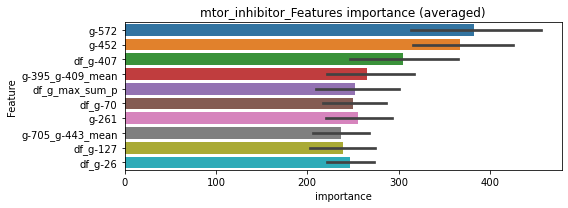

len(train_index) : 2253
len(valid_index) : 751
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00572919	valid_1's binary_logloss: 0.0567499
Early stopping, best iteration is:
[1275]	training's binary_logloss: 0.0044295	valid_1's binary_logloss: 0.0536883


len(train_index) : 2253
len(valid_index) : 751
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00591961	valid_1's binary_logloss: 0.0474068
[2000]	training's binary_logloss: 0.0029075	valid_1's binary_logloss: 0.0407733
Early stopping, best iteration is:
[2020]	training's binary_logloss: 0.00287894	valid_1's binary_logloss: 0.040687


len(train_index) : 2253
len(valid_index) : 751
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00583099	valid_1's binary_logloss: 0.0447979
Early stopping, best iteration is:
[1829]	training's binary_logloss: 0.00313666	valid_1's binary_logloss: 0.0386301


len(train_index) : 2253
len(valid_index) : 751
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00574891	valid_1's binary_logloss: 0.0704818
Early stopping, best iteration is:
[1796]	training's binary_logloss: 0.00314223	valid_1's binary_logloss: 0.0644027


mtor_inhibitor logloss: 0.049352034697815975
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287859	valid_1's binary_logloss: 0.0178629
[600]	training's binary_logloss: 0.000568683	valid_1's binary_logloss: 0.0112459
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000495732	valid_1's binary_logloss: 0.0110295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290316	valid_1's binary_logloss: 0.0166609
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000651595	valid_1's binary_logloss: 0.0100371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298806	valid_1's binary_logloss: 0.00771873
[600]	training's binary_logloss: 0.000583632	valid_1's binary_logloss: 0.00311323
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000491424	valid_1's binary_logloss: 0.00282067
Training until validation scores don't improve for 30 rounds
[30

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043230, Threshold: 0.1074090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1074090, conf_0:0.07519, conf_1:0.13963
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1374090
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_2: 0.1674090
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_3: 0.1974090
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.2274090
threshold: 0.2274090, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261138	valid_1's binary_logloss: 0.0136026
[600]	training's binary_logloss: 0.000531392	valid_1's binary_logloss: 0.0071599
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000457644	valid_1's binary_logloss: 0.00693096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026632	valid_1's binary_logloss: 0.0102296
[600]	training's binary_logloss: 0.000538127	valid_1's binary_logloss: 0.0047434
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000468583	valid_1's binary_logloss: 0.00448292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260683	valid_1's binary_logloss: 0.0110027
[600]	training's binary_logloss: 0.00053602	valid_1's binary_logloss: 0.00631652
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000466158	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0858691, Threshold: 0.2274090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0173280 Vs.target_rate: 0.00202
Num_p_label: 69.0, Expected: 8.0, Threshold: 0.2274090, conf_0:0.18193, conf_1:0.27289
Num_p_label: 69.0, Expected: 8.0, Adj_threshold_1: 0.2574090
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_2: 0.2874090
Num_p_label: 60.0, Expected: 8.0, Adj_threshold_3: 0.3174090
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_4: 0.3474090
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_5: 0.3774090
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_6: 0.4074090
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_7: 0.4374090
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_8: 0.4674090
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_9: 0.4974090
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_10: 0.5274090
threshold: 0.5274090, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260746	valid_1's binary_logloss: 0.010727
[600]	training's binary_logloss: 0.000529979	valid_1's binary_logloss: 0.00639711
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000504879	valid_1's binary_logloss: 0.00629867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262899	valid_1's binary_logloss: 0.0112094
[600]	training's binary_logloss: 0.000527457	valid_1's binary_logloss: 0.005746
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000469996	valid_1's binary_logloss: 0.00562161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253712	valid_1's binary_logloss: 0.0117023
[600]	training's binary_logloss: 0.000523355	valid_1's binary_logloss: 0.00625284
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000472222	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1205882, Threshold: 0.5274090, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0110497 Vs.target_rate: 0.00202
Num_p_label: 44.0, Expected: 8.0, Threshold: 0.5274090, conf_0:0.47467, conf_1:0.58015
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.5574090
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.5874090
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_3: 0.6174090
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_4: 0.6474090
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.6774090
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.7074090
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_7: 0.7374090
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_8: 0.7674090
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_9: 0.7974090
threshold: 0.7974090, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


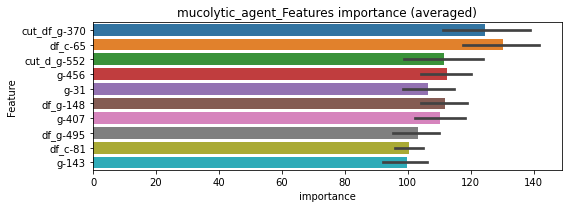

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000474939	valid_1's binary_logloss: 0.00581105


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 mucolytic_agent=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.001004	valid_1's binary_logloss: 0.0126182
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000495391	valid_1's binary_logloss: 0.00510418


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000484574	valid_1's binary_logloss: 0.00596486


mucolytic_agent logloss: 0.007375548527722608
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017931	valid_1's binary_logloss: 0.0145596
[600]	training's binary_logloss: 0.000420894	valid_1's binary_logloss: 0.0109699
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000422041	valid_1's binary_logloss: 0.0109529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191689	valid_1's binary_logloss: 0.00693949
[600]	training's binary_logloss: 0.000440893	valid_1's binary_logloss: 0.00323268
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000430256	valid_1's binary_logloss: 0.00319979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192069	valid_1's binary_logloss: 0.00974816
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000516138	valid_1's binary_logloss: 0.00758584
Training until validation scores don't improve for 30 rounds
[3

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027855, Threshold: 0.0128504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0128504, conf_0:0.00900, conf_1:0.01671
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0428504
threshold: 0.0428504, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172479	valid_1's binary_logloss: 0.0128843
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000438416	valid_1's binary_logloss: 0.00987131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179386	valid_1's binary_logloss: 0.00659032
[600]	training's binary_logloss: 0.000422646	valid_1's binary_logloss: 0.0031305
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000426189	valid_1's binary_logloss: 0.00312391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180504	valid_1's binary_logloss: 0.00935262
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000467183	valid_1's binary_logloss: 0.00684765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176657	valid_1's binary_logloss: 0.00943289
[

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178211, Threshold: 0.0428504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0428504, conf_0:0.03428, conf_1:0.05142
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_1: 0.0728504
threshold: 0.0728504, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172479	valid_1's binary_logloss: 0.0128843
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000438416	valid_1's binary_logloss: 0.00987131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179386	valid_1's binary_logloss: 0.00659032
[600]	training's binary_logloss: 0.000422646	valid_1's binary_logloss: 0.0031305
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000426189	valid_1's binary_logloss: 0.00312391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180504	valid_1's binary_logloss: 0.00935262
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000467183	valid_1's binary_logloss: 0.00684765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176657	valid_1's binary_logloss: 0.00943289
[

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178211, Threshold: 0.0728504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00155
Num_p_label: 4.0, Expected: 6.2, Threshold: 0.0728504, conf_0:0.06557, conf_1:0.08014
threshold: 0.0728504, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


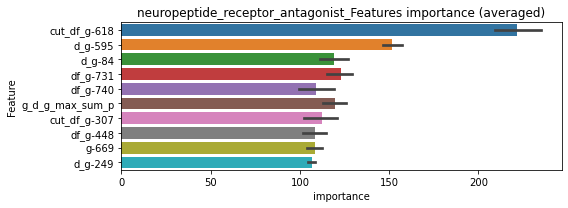

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000457722	valid_1's binary_logloss: 0.00864475


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000429333	valid_1's binary_logloss: 0.00382127


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000709215	valid_1's binary_logloss: 0.00671087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00042739	valid_1's binary_logloss: 0.00608819


neuropeptide_receptor_antagonist logloss: 0.006317012300384692


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10338
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10338


unpredictable_cols:nfkb_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.142922	valid_1's binary_logloss: 0.280336
[600]	training's binary_logloss: 0.071967	valid_1's binary_logloss: 0.253311
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.045969	valid_1's binary_logloss: 0.247228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.144256	valid_1's binary_logloss: 0.276408
[600]	training's binary_logloss: 0.0719555	valid_1's binary_logloss: 0.249194
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.0453972	valid_1's binary_logloss: 0.241902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.142252	valid_1's binary_logloss: 0.276887
[600]	training's binary_logloss: 0.0718468	valid_1's binary_logloss: 0.249513
[900]	training's binary_logloss: 0.0431382	valid_1's binary_logloss: 0.243031
Early stopping, best iteration is:
[894]	training

1 / 3, AUC score:0.884, PR-AUC:0.813
y_Threshold: 0.1073129, Threshold: 0.2054047, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1434 → Positive_corect_labels: 1557/10971
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2054047, conf_0:0.14378, conf_1:0.26703
threshold: 0.2054047, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1557.0/10971, y_label_rate: 0.1419196
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0835058	valid_1's binary_logloss: 0.168627
[600]	training's binary_logloss: 0.036699	valid_1's binary_logloss: 0.129388
[900]	training's binary_logloss: 0.0213087	valid_1's binary_logloss: 0.115497
[1200]	training's binary_logloss: 0.0143655	valid_1's binary_logloss: 0.110079
[1500]	training's binary_logloss: 0.0106006	valid_1's binary_logloss: 0.106593
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.00927868	valid_1's binary_logloss: 0.105319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.080874	valid_1's binary_logloss: 0.176265
[600]	training's binary_logloss: 0.0353792	valid_1's binary_logloss: 0.141752
[900]	training's binary_logloss: 0.0205523	valid_1's binary_logloss: 0.131241
[1200]	training's binary_logloss: 0.0139126	valid_1's binary_logloss: 0.127023
Early stopping, best iteration is:
[1188]	training's binary_

2 / 3, AUC score:0.985, PR-AUC:0.958
y_Threshold: 0.0901955, Threshold: 0.2054047, pos_neg_ratio: 0.8000000
Remove_noisy_data: 320 → Positive_corect_labels: 1397.0/10651
p_label_rate: 0.0120542 Vs.target_rate: 0.03494
Num_p_label: 48.0, Expected: 139.1, Threshold: 0.2054047, conf_0:0.16432, conf_1:0.24649
threshold: 0.2054047, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1397.0/10651, y_label_rate: 0.1311614
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0668109	valid_1's binary_logloss: 0.130694
[600]	training's binary_logloss: 0.0285817	valid_1's binary_logloss: 0.0981482
[900]	training's binary_logloss: 0.0165266	valid_1's binary_logloss: 0.0872464
[1200]	training's binary_logloss: 0.0112731	valid_1's binary_logloss: 0.0823448
[1500]	training's binary_logloss: 0.00840967	valid_1's binary_logloss: 0.0797083
Early stopping, best iteration is:
[1668]	training's binary_logloss: 0.00734935	valid_1's binary_logloss: 0.0788693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0651777	valid_1's binary_logloss: 0.151209
[600]	training's binary_logloss: 0.0278886	valid_1's binary_logloss: 0.121392
[900]	training's binary_logloss: 0.0160964	valid_1's binary_logloss: 0.111922
Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.0120878	valid_1's binary_logloss: 0.107703
Training until va

3 / 3, AUC score:0.989, PR-AUC:0.973
y_Threshold: 0.0850155, Threshold: 0.2054047, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 1303.0/10463
p_label_rate: 0.0130588 Vs.target_rate: 0.03494
Num_p_label: 52.0, Expected: 139.1, Threshold: 0.2054047, conf_0:0.18486, conf_1:0.22595
threshold: 0.2054047, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1303.0/10463, y_label_rate: 0.1245341


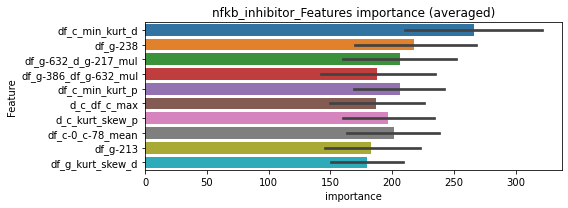

len(train_index) : 7847
len(valid_index) : 2616
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.00695997	valid_1's binary_logloss: 0.0725495


len(train_index) : 7847
len(valid_index) : 2616
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00502881	valid_1's binary_logloss: 0.065671
Early stopping, best iteration is:
[1279]	training's binary_logloss: 0.00375234	valid_1's binary_logloss: 0.0636737


len(train_index) : 7847
len(valid_index) : 2616
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.00567965	valid_1's binary_logloss: 0.0708307


len(train_index) : 7848
len(valid_index) : 2615
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00505564	valid_1's binary_logloss: 0.0601681
Early stopping, best iteration is:
[1699]	training's binary_logloss: 0.00273224	valid_1's binary_logloss: 0.0558433


nfkb_inhibitor logloss: 0.0657252485574896
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064209	valid_1's binary_logloss: 0.00411817
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000240525	valid_1's binary_logloss: 0.00276025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000627325	valid_1's binary_logloss: 0.00178322
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00023804	valid_1's binary_logloss: 0.000941499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000639159	valid_1's binary_logloss: 0.000997788
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000249202	valid_1's binary_logloss: 0.000437199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000642069	valid_1's binary_logloss: 0.00126891


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008989, Threshold: 0.0045661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0045661, conf_0:0.00320, conf_1:0.00594
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0345661
threshold: 0.0345661, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00024148	valid_1's binary_logloss: 0.00066313


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000606925	valid_1's binary_logloss: 0.0018883
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000238124	valid_1's binary_logloss: 0.00109145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000603185	valid_1's binary_logloss: 0.00340934
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000247059	valid_1's binary_logloss: 0.00252009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000601167	valid_1's binary_logloss: 0.000827061
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000237238	valid_1's binary_logloss: 0.000355826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596555	valid_1's binary_logloss: 0.00131687


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0702433, Threshold: 0.0345661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00050
Num_p_label: 17.0, Expected: 2.0, Threshold: 0.0345661, conf_0:0.02765, conf_1:0.04148
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.0645661
threshold: 0.0645661, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000234139	valid_1's binary_logloss: 0.000702369


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000606925	valid_1's binary_logloss: 0.0018883
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000238124	valid_1's binary_logloss: 0.00109145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000603185	valid_1's binary_logloss: 0.00340934
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000247059	valid_1's binary_logloss: 0.00252009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000601167	valid_1's binary_logloss: 0.000827061
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000237238	valid_1's binary_logloss: 0.000355826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000596555	valid_1's binary_logloss: 0.00131687
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000234

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0702433, Threshold: 0.0645661, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.0645661, conf_0:0.05811, conf_1:0.07102
threshold: 0.0645661, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


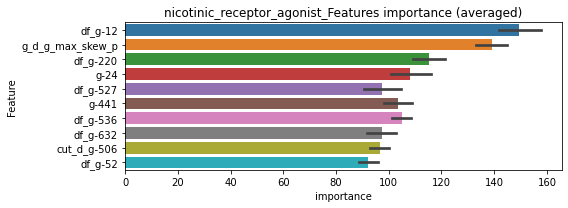

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000238462	valid_1's binary_logloss: 0.000582508


================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000236613	valid_1's binary_logloss: 0.00116193
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000244451	valid_1's binary_logloss: 0.000376785
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000235568	valid_1's binary_logloss: 0.000431895
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000235009	valid_1's binary_logloss: 0.000431156


nicotinic_receptor_agonist logloss: 0.0006382487783791872
nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145125	valid_1's binary_logloss: 0.00897568
[600]	training's binary_logloss: 0.0003663	valid_1's binary_logloss: 0.00637482
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000365818	valid_1's binary_logloss: 0.00636473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150816	valid_1's binary_logloss: 0.00566017
[600]	training's binary_logloss: 0.000361393	valid_1's binary_logloss: 0.00246774
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000361393	valid_1's binary_logloss: 0.00246774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015591	valid_1's binary_logloss: 0.00409532
[600]	training's binary_logloss: 0.000375431	valid_1's binary_logloss: 0.00155038
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00037634	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027454, Threshold: 0.0334058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0334058, conf_0:0.02338, conf_1:0.04343
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_1: 0.0634058
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0934058
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1234058
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_4: 0.1534058
threshold: 0.1534058, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132437	valid_1's binary_logloss: 0.00935437
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000354774	valid_1's binary_logloss: 0.00659162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137098	valid_1's binary_logloss: 0.00388619
[600]	training's binary_logloss: 0.000349746	valid_1's binary_logloss: 0.00168534
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000349746	valid_1's binary_logloss: 0.00168534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139643	valid_1's binary_logloss: 0.00332165
[600]	training's binary_logloss: 0.000350545	valid_1's binary_logloss: 0.00122942
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000350545	valid_1's binary_logloss: 0.00122942
Training until validation scores don't improve for 30 round

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390373, Threshold: 0.1534058, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000342683	valid_1's binary_logloss: 0.00175932
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000348647	valid_1's binary_logloss: 0.00175397


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.1534058, conf_0:0.12272, conf_1:0.18409
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.1834058
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2134058
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2434058
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2734058
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_5: 0.3034058
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3334058
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_7: 0.3634058
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.3934058
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.4234058
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_10: 0.4534058
threshold: 0.4534058, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132437	valid_1's binary_logloss: 0.00935437
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000354774	valid_1's binary_logloss: 0.00659162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137098	valid_1's binary_logloss: 0.00388619
[600]	training's binary_logloss: 0.000349746	valid_1's binary_logloss: 0.00168534
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000349746	valid_1's binary_logloss: 0.00168534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139643	valid_1's binary_logloss: 0.00332165
[600]	training's binary_logloss: 0.000350545	valid_1's binary_logloss: 0.00122942
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000350545	valid_1's binary_logloss: 0.00122942
Training until validation scores don't improve for 30 round

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390373, Threshold: 0.4534058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4534058, conf_0:0.40807, conf_1:0.49875
threshold: 0.4534058, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


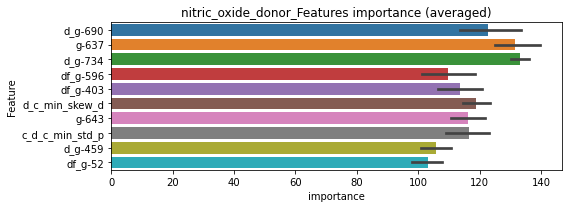

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.00034759	valid_1's binary_logloss: 0.00501805


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000352858	valid_1's binary_logloss: 0.0013299


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000361201	valid_1's binary_logloss: 0.00121137


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000356193	valid_1's binary_logloss: 0.00151175


nitric_oxide_donor logloss: 0.002267768188476891
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147269	valid_1's binary_logloss: 0.00674484
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000377124	valid_1's binary_logloss: 0.00472486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140017	valid_1's binary_logloss: 0.00839934
[600]	training's binary_logloss: 0.000355091	valid_1's binary_logloss: 0.00552947
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000360082	valid_1's binary_logloss: 0.00551093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152829	valid_1's binary_logloss: 0.00351765
[600]	training's binary_logloss: 0.000366402	valid_1's binary_logloss: 0.00122946
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000360272	valid_1's binary_logloss: 0.00121468
Training until validation scores don't improve for 30 round

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021560, Threshold: 0.0072773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0072773, conf_0:0.00509, conf_1:0.00946
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_1: 0.0372773
threshold: 0.0372773, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134342	valid_1's binary_logloss: 0.00736857
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000455099	valid_1's binary_logloss: 0.0056878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134856	valid_1's binary_logloss: 0.00663281
[600]	training's binary_logloss: 0.000343796	valid_1's binary_logloss: 0.00401231
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000343055	valid_1's binary_logloss: 0.00400719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142651	valid_1's binary_logloss: 0.00324625
[600]	training's binary_logloss: 0.000358526	valid_1's binary_logloss: 0.00104155
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000353959	valid_1's binary_logloss: 0.00102888
Training until validation scores don't improve for 30 rounds

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244242, Threshold: 0.0372773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00122
Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0372773, conf_0:0.02982, conf_1:0.04473
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0672773
threshold: 0.0672773, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134342	valid_1's binary_logloss: 0.00736857
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000455099	valid_1's binary_logloss: 0.0056878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134856	valid_1's binary_logloss: 0.00663281
[600]	training's binary_logloss: 0.000343796	valid_1's binary_logloss: 0.00401231
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000343055	valid_1's binary_logloss: 0.00400719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142651	valid_1's binary_logloss: 0.00324625
[600]	training's binary_logloss: 0.000358526	valid_1's binary_logloss: 0.00104155
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000353959	valid_1's binary_logloss: 0.00102888
Training until validation scores don't improve for 30 rounds

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244242, Threshold: 0.0672773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00122
Num_p_label: 3.0, Expected: 4.8, Threshold: 0.0672773, conf_0:0.06055, conf_1:0.07401
threshold: 0.0672773, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


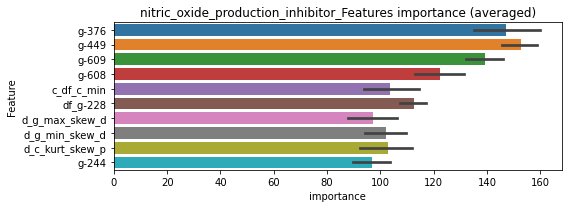

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000455869	valid_1's binary_logloss: 0.00517296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000343933	valid_1's binary_logloss: 0.00421003


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000354888	valid_1's binary_logloss: 0.000966999


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.00184862
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000345475	valid_1's binary_logloss: 0.00184693


nitric_oxide_production_inhibitor logloss: 0.0030514506540903824
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151072	valid_1's binary_logloss: 0.00611552
[600]	training's binary_logloss: 0.000379531	valid_1's binary_logloss: 0.00321576
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000381085	valid_1's binary_logloss: 0.00320795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152135	valid_1's binary_logloss: 0.00355773
[600]	training's binary_logloss: 0.000394597	valid_1's binary_logloss: 0.00135457
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000394597	valid_1's binary_logloss: 0.00135457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150481	valid_1's binary_logloss: 0.00303482
[600]	training's binary_logloss: 0.000387024	valid_1's binary_logloss: 0.00103549
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000387024	valid_1's bina

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026611, Threshold: 0.0225383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0225383, conf_0:0.01578, conf_1:0.02930
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.0525383
threshold: 0.0525383, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139628	valid_1's binary_logloss: 0.00701729
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000390663	valid_1's binary_logloss: 0.00426111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001422	valid_1's binary_logloss: 0.00324182
[600]	training's binary_logloss: 0.000382949	valid_1's binary_logloss: 0.00127679
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000382949	valid_1's binary_logloss: 0.00127679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142057	valid_1's binary_logloss: 0.00262582
[600]	training's binary_logloss: 0.000372262	valid_1's binary_logloss: 0.000859979
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000372262	valid_1's binary_logloss: 0.000859979
Training until validation scores don't improve for 30 round

2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00038529	valid_1's binary_logloss: 0.00266494


y_Threshold: 0.0519132, Threshold: 0.0525383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0113009 Vs.target_rate: 0.00109
Num_p_label: 45.0, Expected: 4.3, Threshold: 0.0525383, conf_0:0.04203, conf_1:0.06305
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_1: 0.0825383
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_2: 0.1125383
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_3: 0.1425383
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.1725383
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_5: 0.2025383
threshold: 0.2025383, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139628	valid_1's binary_logloss: 0.00701729
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000390663	valid_1's binary_logloss: 0.00426111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001422	valid_1's binary_logloss: 0.00324182
[600]	training's binary_logloss: 0.000382949	valid_1's binary_logloss: 0.00127679
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000382949	valid_1's binary_logloss: 0.00127679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142057	valid_1's binary_logloss: 0.00262582
[600]	training's binary_logloss: 0.000372262	valid_1's binary_logloss: 0.000859979
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000372262	valid_1's binary_logloss: 0.000859979
Training until validation scores don't improve for 30 round

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0519132, Threshold: 0.2025383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2025383, conf_0:0.18228, conf_1:0.22279
threshold: 0.2025383, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


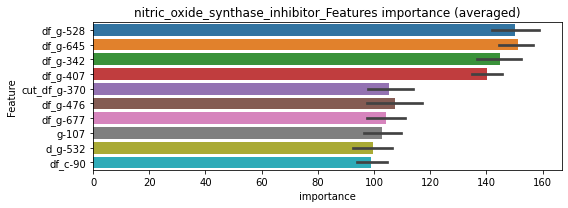

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000379845	valid_1's binary_logloss: 0.00361757


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000380416	valid_1's binary_logloss: 0.00107603


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000381574	valid_1's binary_logloss: 0.000923724


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000375874	valid_1's binary_logloss: 0.00189747


nitric_oxide_synthase_inhibitor logloss: 0.0018786962260774816
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000375502	valid_1's binary_logloss: 0.00223101
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000185662	valid_1's binary_logloss: 0.00172353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000368501	valid_1's binary_logloss: 0.00378106
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000187113	valid_1's binary_logloss: 0.00290602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000380289	valid_1's binary_logloss: 0.000456703
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000185682	valid_1's binary_logloss: 0.00023107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00037843	valid_1's binary_logloss: 0.000543823


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005772, Threshold: 0.0026930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0026930, conf_0:0.00189, conf_1:0.00350
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0326930
threshold: 0.0326930, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000186468	valid_1's binary_logloss: 0.000274365


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000357401	valid_1's binary_logloss: 0.00336191
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000180639	valid_1's binary_logloss: 0.00284461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348566	valid_1's binary_logloss: 0.00224393
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000178105	valid_1's binary_logloss: 0.00171775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000363384	valid_1's binary_logloss: 0.000371732
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000177282	valid_1's binary_logloss: 0.000181216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353032	valid_1's binary_logloss: 0.000419825


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0206934, Threshold: 0.0326930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00029


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000174457	valid_1's binary_logloss: 0.000211698


Num_p_label: 20.0, Expected: 1.2, Threshold: 0.0326930, conf_0:0.02615, conf_1:0.03923
Num_p_label: 11.0, Expected: 1.2, Adj_threshold_1: 0.0626930
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.0926930
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.1226930
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.1526930
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_5: 0.1826930
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_6: 0.2126930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_7: 0.2426930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.2726930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3026930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3326930
threshold: 0.3326930, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000357401	valid_1's binary_logloss: 0.00336191
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000180639	valid_1's binary_logloss: 0.00284461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348566	valid_1's binary_logloss: 0.00224393
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000178105	valid_1's binary_logloss: 0.00171775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000363384	valid_1's binary_logloss: 0.000371732
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000177282	valid_1's binary_logloss: 0.000181216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353032	valid_1's binary_logloss: 0.000419825


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0206934, Threshold: 0.3326930, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3326930, conf_0:0.29942, conf_1:0.36596
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3626930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3926930
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4226930
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_4: 0.4526930
threshold: 0.4526930, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000174457	valid_1's binary_logloss: 0.000211698


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


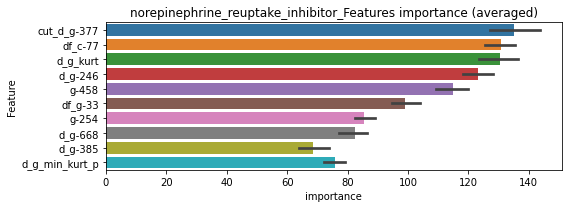

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000179487	valid_1's binary_logloss: 0.00153714
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000176751	valid_1's binary_logloss: 0.000802375
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000179053	valid_1's binary_logloss: 0.000192508
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0006908031671329312


Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00017739	valid_1's binary_logloss: 0.000229987


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000763866	valid_1's binary_logloss: 0.00456513
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000271884	valid_1's binary_logloss: 0.00304281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000793971	valid_1's binary_logloss: 0.0052979
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000269338	valid_1's binary_logloss: 0.00362201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000822001	valid_1's binary_logloss: 0.00111471
[600]	training's binary_logloss: 0.000270926	valid_1's binary_logloss: 0.000401672
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000270721	valid_1's binary_logloss: 0.000401534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000809234	valid_1's binary_logloss: 0.001

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011909, Threshold: 0.0042377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808


[600]	training's binary_logloss: 0.000266207	valid_1's binary_logloss: 0.000910486
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000268756	valid_1's binary_logloss: 0.000910127


p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042377, conf_0:0.00297, conf_1:0.00551
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342377
threshold: 0.0342377, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000729477	valid_1's binary_logloss: 0.00364072
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000271981	valid_1's binary_logloss: 0.00235696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000729768	valid_1's binary_logloss: 0.00498459
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000264193	valid_1's binary_logloss: 0.00362322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000756573	valid_1's binary_logloss: 0.00100137
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000262111	valid_1's binary_logloss: 0.000367653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757297	valid_1's binary_logloss: 0.00150465
[600]	training's binary_logloss: 0.000259267	valid_1's binary_logloss: 0.000

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232914, Threshold: 0.0342377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0342377, conf_0:0.02739, conf_1:0.04109
threshold: 0.0342377, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000729477	valid_1's binary_logloss: 0.00364072
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000271981	valid_1's binary_logloss: 0.00235696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000729768	valid_1's binary_logloss: 0.00498459
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000264193	valid_1's binary_logloss: 0.00362322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000756573	valid_1's binary_logloss: 0.00100137
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000262111	valid_1's binary_logloss: 0.000367653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757297	valid_1's binary_logloss: 0.00150465


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232914, Threshold: 0.0342377, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000259267	valid_1's binary_logloss: 0.000682647
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000259267	valid_1's binary_logloss: 0.000682647


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0342377, conf_0:0.03081, conf_1:0.03766
threshold: 0.0342377, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


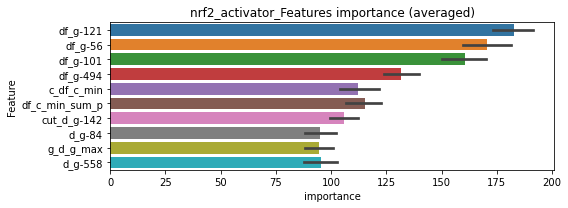

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000266487	valid_1's binary_logloss: 0.00151377


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000262855	valid_1's binary_logloss: 0.00264846


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000263859	valid_1's binary_logloss: 0.000365911
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000263859	valid_1's binary_logloss: 0.000365911


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000261254	valid_1's binary_logloss: 0.000921158


nrf2_activator logloss: 0.0013623702444794006
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365803	valid_1's binary_logloss: 0.0319337
[600]	training's binary_logloss: 0.000697817	valid_1's binary_logloss: 0.0244686
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000661008	valid_1's binary_logloss: 0.0242146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385799	valid_1's binary_logloss: 0.0337484
[600]	training's binary_logloss: 0.000701544	valid_1's binary_logloss: 0.0264633
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000724349	valid_1's binary_logloss: 0.0264262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395531	valid_1's binary_logloss: 0.0224571
[600]	training's binary_logloss: 0.000730475	valid_1's binary_logloss: 0.0159824
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000582435	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0047689, Threshold: 0.0161905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0161905, conf_0:0.01133, conf_1:0.02105
Num_p_label: 4.0, Expected: 10.2, Adj_threshold_1: 0.0461905
threshold: 0.0461905, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343043	valid_1's binary_logloss: 0.0368117
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00102334	valid_1's binary_logloss: 0.0321153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344752	valid_1's binary_logloss: 0.029202
[600]	training's binary_logloss: 0.000676568	valid_1's binary_logloss: 0.02145
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000630831	valid_1's binary_logloss: 0.0213056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364079	valid_1's binary_logloss: 0.0223217
[600]	training's binary_logloss: 0.00069718	valid_1's binary_logloss: 0.0156087
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000587138	valid_1's binary_logloss: 0.0152325
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354399, Threshold: 0.0461905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0148167 Vs.target_rate: 0.00256
Num_p_label: 59.0, Expected: 10.2, Threshold: 0.0461905, conf_0:0.03695, conf_1:0.05543
Num_p_label: 44.0, Expected: 10.2, Adj_threshold_1: 0.0761905
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1061905
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.1361905
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.1661905
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_5: 0.1961905
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_6: 0.2261905
threshold: 0.2261905, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352164	valid_1's binary_logloss: 0.0428485
[600]	training's binary_logloss: 0.000664485	valid_1's binary_logloss: 0.035143
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000641787	valid_1's binary_logloss: 0.0350401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344816	valid_1's binary_logloss: 0.0279977
[600]	training's binary_logloss: 0.000664137	valid_1's binary_logloss: 0.0219335
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000702538	valid_1's binary_logloss: 0.0219236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351925	valid_1's binary_logloss: 0.0201257
[600]	training's binary_logloss: 0.000675672	valid_1's binary_logloss: 0.0123355
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000593644	valid_1's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482339, Threshold: 0.2261905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0052737 Vs.target_rate: 0.00256
Num_p_label: 21.0, Expected: 10.2, Threshold: 0.2261905, conf_0:0.20357, conf_1:0.24881
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_1: 0.2561905
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_2: 0.2861905
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_3: 0.3161905
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_4: 0.3461905
threshold: 0.3461905, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


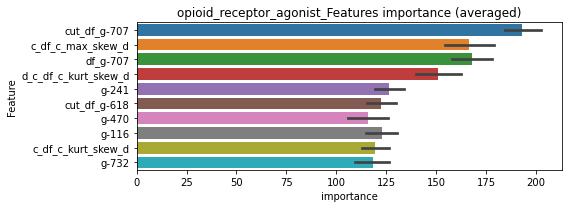

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000647443	valid_1's binary_logloss: 0.0245599


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000560452	valid_1's binary_logloss: 0.0165575


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000554783	valid_1's binary_logloss: 0.0109015


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000889352	valid_1's binary_logloss: 0.0226191


opioid_receptor_agonist logloss: 0.018661280975708697
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720922	valid_1's binary_logloss: 0.0640612
[600]	training's binary_logloss: 0.00114776	valid_1's binary_logloss: 0.054085
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000901623	valid_1's binary_logloss: 0.0537353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00694333	valid_1's binary_logloss: 0.0570364
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00139872	valid_1's binary_logloss: 0.0477569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721037	valid_1's binary_logloss: 0.0508634
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00129065	valid_1's binary_logloss: 0.0436914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00756573	valid_1's binary_logloss: 0.073142
Early stoppi

1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0105242, Threshold: 0.0415741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0415741, conf_0:0.02910, conf_1:0.05405
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_1: 0.0715741
threshold: 0.0715741, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580975	valid_1's binary_logloss: 0.0602746
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0017133	valid_1's binary_logloss: 0.0520588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538922	valid_1's binary_logloss: 0.0646521
[600]	training's binary_logloss: 0.000978783	valid_1's binary_logloss: 0.0571468
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00105777	valid_1's binary_logloss: 0.0569067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599292	valid_1's binary_logloss: 0.0455247
[600]	training's binary_logloss: 0.00102778	valid_1's binary_logloss: 0.03715
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00101272	valid_1's binary_logloss: 0.0370445
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0405464, Threshold: 0.0715741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 630.0/3751
p_label_rate: 0.0210949 Vs.target_rate: 0.00403
Num_p_label: 84.0, Expected: 16.1, Threshold: 0.0715741, conf_0:0.05726, conf_1:0.08589
Num_p_label: 69.0, Expected: 16.1, Adj_threshold_1: 0.1015741
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_2: 0.1315741
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_3: 0.1615741
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_4: 0.1915741
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_5: 0.2215741
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_6: 0.2515741
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_7: 0.2815741
threshold: 0.2815741, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 630.0/3751, y_label_rate: 0.1679552
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492656	valid_1's binary_logloss: 0.0541471
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000997292	valid_1's binary_logloss: 0.0460103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524114	valid_1's binary_logloss: 0.0396984
[600]	training's binary_logloss: 0.000943158	valid_1's binary_logloss: 0.0317377
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000824486	valid_1's binary_logloss: 0.0314305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535322	valid_1's binary_logloss: 0.0372866
[600]	training's binary_logloss: 0.000950488	valid_1's binary_logloss: 0.0271062
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000716393	valid_1's binary_logloss: 0.026455
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0347248, Threshold: 0.2815741, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 621.0/3733
p_label_rate: 0.0097941 Vs.target_rate: 0.00403
Num_p_label: 39.0, Expected: 16.1, Threshold: 0.2815741, conf_0:0.25342, conf_1:0.30973
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_1: 0.3115741
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_2: 0.3415741
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_3: 0.3715741
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_4: 0.4015741
threshold: 0.4015741, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 621.0/3733, y_label_rate: 0.1663541


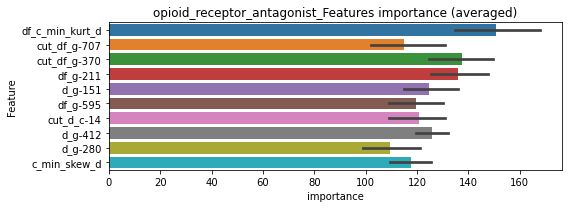

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00151875	valid_1's binary_logloss: 0.041621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000796854	valid_1's binary_logloss: 0.0271376


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00107637	valid_1's binary_logloss: 0.026268


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


opioid_receptor_antagonist logloss: 0.029718555595805857


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00126717	valid_1's binary_logloss: 0.0238349


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206787	valid_1's binary_logloss: 0.0147918
[600]	training's binary_logloss: 0.000441493	valid_1's binary_logloss: 0.0102532
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000420036	valid_1's binary_logloss: 0.0101347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207929	valid_1's binary_logloss: 0.0134233
[600]	training's binary_logloss: 0.000441051	valid_1's binary_logloss: 0.00872583
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000431417	valid_1's binary_logloss: 0.00869077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218935	valid_1's binary_logloss: 0.00577944
[600]	training's binary_logloss: 0.000455855	valid_1's binary_logloss: 0.00245611
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000437105	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029644, Threshold: 0.0070740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0070740, conf_0:0.00495, conf_1:0.00920
Num_p_label: 2.0, Expected: 6.2, Adj_threshold_1: 0.0370740
threshold: 0.0370740, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192117	valid_1's binary_logloss: 0.0122736
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000475463	valid_1's binary_logloss: 0.0085291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019309	valid_1's binary_logloss: 0.0119889
[600]	training's binary_logloss: 0.000427879	valid_1's binary_logloss: 0.00795268
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000410726	valid_1's binary_logloss: 0.00791626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209338	valid_1's binary_logloss: 0.00613616
[600]	training's binary_logloss: 0.000442963	valid_1's binary_logloss: 0.00313557
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000414949	valid_1's binary_logloss: 0.00305743
Training until validation scores don't improve for 30 rounds
[3

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238773, Threshold: 0.0370740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00155
Num_p_label: 18.0, Expected: 6.2, Threshold: 0.0370740, conf_0:0.02966, conf_1:0.04449
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0670740
threshold: 0.0670740, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192117	valid_1's binary_logloss: 0.0122736
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000475463	valid_1's binary_logloss: 0.0085291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019309	valid_1's binary_logloss: 0.0119889
[600]	training's binary_logloss: 0.000427879	valid_1's binary_logloss: 0.00795268
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000410726	valid_1's binary_logloss: 0.00791626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209338	valid_1's binary_logloss: 0.00613616
[600]	training's binary_logloss: 0.000442963	valid_1's binary_logloss: 0.00313557
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000414949	valid_1's binary_logloss: 0.00305743
Training until validation scores don't improve for 30 rounds
[3

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238773, Threshold: 0.0670740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0670740, conf_0:0.06037, conf_1:0.07378
threshold: 0.0670740, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


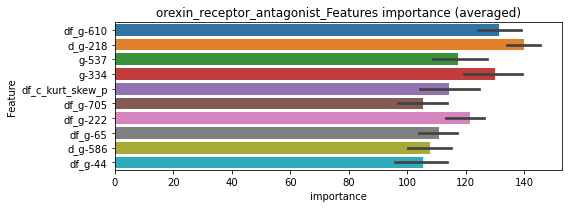

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000489526	valid_1's binary_logloss: 0.00732738


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000397223	valid_1's binary_logloss: 0.00697513
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000399188	valid_1's binary_logloss: 0.00696989


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000448879	valid_1's binary_logloss: 0.0028978


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000403501	valid_1's binary_logloss: 0.00230882
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.000397163	valid_1's binary_logloss: 0.00229514


orexin_receptor_antagonist logloss: 0.0048735009264895554
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409875	valid_1's binary_logloss: 0.0260971
[600]	training's binary_logloss: 0.000723545	valid_1's binary_logloss: 0.0197519
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000556835	valid_1's binary_logloss: 0.0193051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414082	valid_1's binary_logloss: 0.0277498
[600]	training's binary_logloss: 0.000722661	valid_1's binary_logloss: 0.0193107
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000604751	valid_1's binary_logloss: 0.0190438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418912	valid_1's binary_logloss: 0.0182338
[600]	training's binary_logloss: 0.000740106	valid_1's binary_logloss: 0.0111063
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000677633	valid_1's binary_loglo

1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0059359, Threshold: 0.0322591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0322591, conf_0:0.02258, conf_1:0.04194
Num_p_label: 19.0, Expected: 10.4, Adj_threshold_1: 0.0622591
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_2: 0.0922591
threshold: 0.0922591, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355608	valid_1's binary_logloss: 0.0295755
[600]	training's binary_logloss: 0.000666586	valid_1's binary_logloss: 0.0205994
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000573295	valid_1's binary_logloss: 0.0203503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036858	valid_1's binary_logloss: 0.0171937
[600]	training's binary_logloss: 0.000684009	valid_1's binary_logloss: 0.00980551
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000584477	valid_1's binary_logloss: 0.00955606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371607	valid_1's binary_logloss: 0.0224874
[600]	training's binary_logloss: 0.000690502	valid_1's binary_logloss: 0.0150443
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000540684	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0231243, Threshold: 0.0922591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0055249 Vs.target_rate: 0.00260
Num_p_label: 22.0, Expected: 10.4, Threshold: 0.0922591, conf_0:0.07381, conf_1:0.11071
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1222591
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1522591
threshold: 0.1522591, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357731	valid_1's binary_logloss: 0.0235553
[600]	training's binary_logloss: 0.000680596	valid_1's binary_logloss: 0.0151195
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000523699	valid_1's binary_logloss: 0.0146417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035765	valid_1's binary_logloss: 0.0236955
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000768365	valid_1's binary_logloss: 0.0162377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362915	valid_1's binary_logloss: 0.0187106
[600]	training's binary_logloss: 0.000679212	valid_1's binary_logloss: 0.0102894
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000525695	valid_1's binary_logloss: 0.00982264
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0363436, Threshold: 0.1522591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0027624 Vs.target_rate: 0.00260
Num_p_label: 11.0, Expected: 10.4, Threshold: 0.1522591, conf_0:0.13703, conf_1:0.16749
threshold: 0.1522591, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


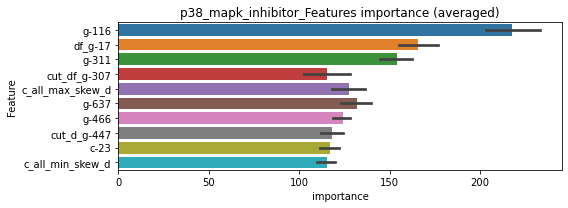

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00067024	valid_1's binary_logloss: 0.0182443


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000627934	valid_1's binary_logloss: 0.0106787


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000597459	valid_1's binary_logloss: 0.00725312


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000783046	valid_1's binary_logloss: 0.0259168


p38_mapk_inhibitor logloss: 0.01552394506520267
p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132288	valid_1's binary_logloss: 0.00329368
[600]	training's binary_logloss: 0.000334497	valid_1's binary_logloss: 0.00123885
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000332629	valid_1's binary_logloss: 0.00123589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132186	valid_1's binary_logloss: 0.00928937
[600]	training's binary_logloss: 0.000331674	valid_1's binary_logloss: 0.00637172
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000327259	valid_1's binary_logloss: 0.00635666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135153	valid_1's binary_logloss: 0.00260533
[600]	training's binary_logloss: 0.000337591	valid_1's binary_logloss: 0.000843707
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000336023	valid_1's bin

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019446, Threshold: 0.0120821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0120821, conf_0:0.00846, conf_1:0.01571
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0420821
threshold: 0.0420821, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122304	valid_1's binary_logloss: 0.00277646
[600]	training's binary_logloss: 0.000321965	valid_1's binary_logloss: 0.00107446
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000321965	valid_1's binary_logloss: 0.00107446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121874	valid_1's binary_logloss: 0.00907456
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033	valid_1's binary_logloss: 0.00630482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130319	valid_1's binary_logloss: 0.00210915
[600]	training's binary_logloss: 0.000325765	valid_1's binary_logloss: 0.000637475
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000318893	valid_1's binary_logloss: 0.000627182
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153956, Threshold: 0.0420821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0420821, conf_0:0.03367, conf_1:0.05050
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0720821
threshold: 0.0720821, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122304	valid_1's binary_logloss: 0.00277646
[600]	training's binary_logloss: 0.000321965	valid_1's binary_logloss: 0.00107446
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000321965	valid_1's binary_logloss: 0.00107446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121874	valid_1's binary_logloss: 0.00907456
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033	valid_1's binary_logloss: 0.00630482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130319	valid_1's binary_logloss: 0.00210915
[600]	training's binary_logloss: 0.000325765	valid_1's binary_logloss: 0.000637475
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000318893	valid_1's binary_logloss: 0.000627182
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153956, Threshold: 0.0720821, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0720821, conf_0:0.06487, conf_1:0.07929
threshold: 0.0720821, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


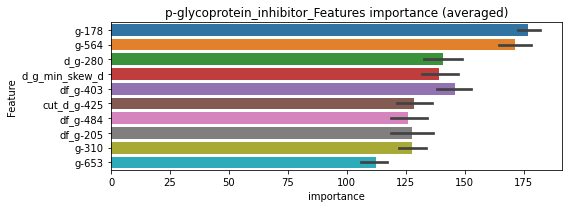

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031485	valid_1's binary_logloss: 0.00113747
Early stopping, best iteration is:
[1035]	training's binary_logloss: 0.000313316	valid_1's binary_logloss: 0.00113348


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000316707	valid_1's binary_logloss: 0.00353775


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000318019	valid_1's binary_logloss: 0.000669509
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000315683	valid_1's binary_logloss: 0.000665606


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000321855	valid_1's binary_logloss: 0.000848309


p-glycoprotein_inhibitor logloss: 0.001546672610713838
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336848	valid_1's binary_logloss: 0.0420971
[600]	training's binary_logloss: 0.000666821	valid_1's binary_logloss: 0.035607
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000674445	valid_1's binary_logloss: 0.0355225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345429	valid_1's binary_logloss: 0.0209208
[600]	training's binary_logloss: 0.000683786	valid_1's binary_logloss: 0.0133215
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000581151	valid_1's binary_logloss: 0.0131185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349539	valid_1's binary_logloss: 0.0143871
[600]	training's binary_logloss: 0.000697499	valid_1's binary_logloss: 0.00962046
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000699194	valid_1's binary_loglo

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052940, Threshold: 0.0162957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0162957, conf_0:0.01141, conf_1:0.02118
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_1: 0.0462957
threshold: 0.0462957, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032468	valid_1's binary_logloss: 0.0194669
[600]	training's binary_logloss: 0.000656741	valid_1's binary_logloss: 0.0118025
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000583495	valid_1's binary_logloss: 0.0115197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318403	valid_1's binary_logloss: 0.0197348
[600]	training's binary_logloss: 0.000652706	valid_1's binary_logloss: 0.0135792
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000553808	valid_1's binary_logloss: 0.0133881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331859	valid_1's binary_logloss: 0.0121262
[600]	training's binary_logloss: 0.000669107	valid_1's binary_logloss: 0.00614391
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000534744	valid_1's binary_loglo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0387952, Threshold: 0.0462957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0077850 Vs.target_rate: 0.00256
Num_p_label: 31.0, Expected: 10.2, Threshold: 0.0462957, conf_0:0.03704, conf_1:0.05555
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.0762957
Num_p_label: 10.0, Expected: 10.2, Adj_threshold_2: 0.1062957
threshold: 0.1062957, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307549	valid_1's binary_logloss: 0.0270397
[600]	training's binary_logloss: 0.000643944	valid_1's binary_logloss: 0.020485
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000597175	valid_1's binary_logloss: 0.0202537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00303206	valid_1's binary_logloss: 0.0302045
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000912576	valid_1's binary_logloss: 0.0250482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031582	valid_1's binary_logloss: 0.0126194
[600]	training's binary_logloss: 0.000660645	valid_1's binary_logloss: 0.00652935
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00060188	valid_1's binary_logloss: 0.00641252
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0300142, Threshold: 0.1062957, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0035158 Vs.target_rate: 0.00256
Num_p_label: 14.0, Expected: 10.2, Threshold: 0.1062957, conf_0:0.09567, conf_1:0.11693
threshold: 0.1062957, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


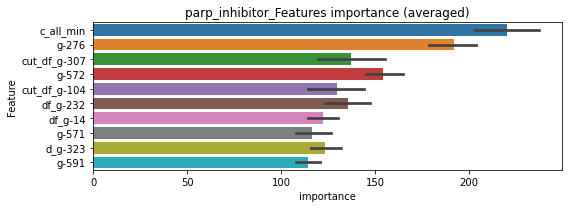

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00056754	valid_1's binary_logloss: 0.0103296


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000633039	valid_1's binary_logloss: 0.0147734


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555033	valid_1's binary_logloss: 0.00616918
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000554454	valid_1's binary_logloss: 0.006159


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000588964	valid_1's binary_logloss: 0.015299


parp_inhibitor logloss: 0.011639340249610287


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7380
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7380


unpredictable_cols:pdgfr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0713858	valid_1's binary_logloss: 0.154468
[600]	training's binary_logloss: 0.0319011	valid_1's binary_logloss: 0.129242
[900]	training's binary_logloss: 0.0189779	valid_1's binary_logloss: 0.121389
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.0148322	valid_1's binary_logloss: 0.119546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0717502	valid_1's binary_logloss: 0.155429
[600]	training's binary_logloss: 0.0316785	valid_1's binary_logloss: 0.128331
[900]	training's binary_logloss: 0.0188822	valid_1's binary_logloss: 0.120725
[1200]	training's binary_logloss: 0.0130744	valid_1's binary_logloss: 0.117803
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.0133372	valid_1's binary_logloss: 0.117718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.072876

1 / 3, AUC score:0.978, PR-AUC:0.958
y_Threshold: 0.0469454, Threshold: 0.0778832, pos_neg_ratio: 0.8000000
Remove_noisy_data: 496 → Positive_corect_labels: 1376/8360
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.0778832, conf_0:0.05452, conf_1:0.10125
threshold: 0.0778832, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1376.0/8360, y_label_rate: 0.1645933
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0588254	valid_1's binary_logloss: 0.120756
[600]	training's binary_logloss: 0.0251758	valid_1's binary_logloss: 0.0888564
[900]	training's binary_logloss: 0.0147527	valid_1's binary_logloss: 0.0784516
[1200]	training's binary_logloss: 0.0101727	valid_1's binary_logloss: 0.0728106
[1500]	training's binary_logloss: 0.00767393	valid_1's binary_logloss: 0.0701892
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.00687712	valid_1's binary_logloss: 0.069184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0571513	valid_1's binary_logloss: 0.125951
[600]	training's binary_logloss: 0.0244451	valid_1's binary_logloss: 0.097233
[900]	training's binary_logloss: 0.0144014	valid_1's binary_logloss: 0.0888138
[1200]	training's binary_logloss: 0.00994501	valid_1's binary_logloss: 0.0853826
Early stopping, best iteration is:
[1290]	training

2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0663963, Threshold: 0.0778832, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 1323.0/8254
p_label_rate: 0.0158212 Vs.target_rate: 0.01247
Num_p_label: 63.0, Expected: 49.7, Threshold: 0.0778832, conf_0:0.06231, conf_1:0.09346
threshold: 0.0778832, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1323.0/8254, y_label_rate: 0.1602859
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0521153	valid_1's binary_logloss: 0.10673
[600]	training's binary_logloss: 0.022177	valid_1's binary_logloss: 0.0771579
[900]	training's binary_logloss: 0.013108	valid_1's binary_logloss: 0.0675203
[1200]	training's binary_logloss: 0.00906115	valid_1's binary_logloss: 0.0634776
[1500]	training's binary_logloss: 0.00688117	valid_1's binary_logloss: 0.0612692
[1800]	training's binary_logloss: 0.00553679	valid_1's binary_logloss: 0.0599118
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.00516929	valid_1's binary_logloss: 0.059321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0504687	valid_1's binary_logloss: 0.111856
[600]	training's binary_logloss: 0.0212125	valid_1's binary_logloss: 0.086341
[900]	training's binary_logloss: 0.0125613	valid_1's binary_logloss: 0.0788337
[1200]	training's binary_logloss: 0.0087583	valid_1'

3 / 3, AUC score:0.995, PR-AUC:0.992
y_Threshold: 0.0650094, Threshold: 0.0778832, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1287.0/8182
p_label_rate: 0.0140633 Vs.target_rate: 0.01247
Num_p_label: 56.0, Expected: 49.7, Threshold: 0.0778832, conf_0:0.07009, conf_1:0.08567
threshold: 0.0778832, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 1287.0/8182, y_label_rate: 0.1572965


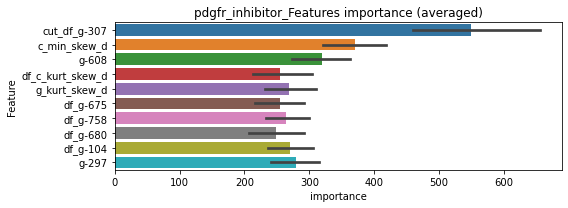

len(train_index) : 6136
len(valid_index) : 2046
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00453606	valid_1's binary_logloss: 0.0431542
Early stopping, best iteration is:
[1645]	training's binary_logloss: 0.00263837	valid_1's binary_logloss: 0.0398356


len(train_index) : 6136
len(valid_index) : 2046
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.00520097	valid_1's binary_logloss: 0.0619728


len(train_index) : 6137
len(valid_index) : 2045
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00460928	valid_1's binary_logloss: 0.0392521
Early stopping, best iteration is:
[1256]	training's binary_logloss: 0.00357169	valid_1's binary_logloss: 0.0378062


len(train_index) : 6137
len(valid_index) : 2045
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00450842	valid_1's binary_logloss: 0.0478108
Early stopping, best iteration is:
[1624]	training's binary_logloss: 0.00264726	valid_1's binary_logloss: 0.0449594


pdgfr_inhibitor logloss: 0.046144674657893174
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000940218	valid_1's binary_logloss: 0.00202414
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000304271	valid_1's binary_logloss: 0.000892234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00088816	valid_1's binary_logloss: 0.00560712
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000305909	valid_1's binary_logloss: 0.00431062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000925201	valid_1's binary_logloss: 0.00315528
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000315404	valid_1's binary_logloss: 0.00206239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000927743	valid_1's binary_logloss: 0.00233692


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016664, Threshold: 0.0075581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0075581, conf_0:0.00529, conf_1:0.00983
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0375581


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000304058	valid_1's binary_logloss: 0.00114249


threshold: 0.0375581, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876763	valid_1's binary_logloss: 0.00171624
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000297554	valid_1's binary_logloss: 0.000744259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000832572	valid_1's binary_logloss: 0.00575449
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000294711	valid_1's binary_logloss: 0.00438474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00086636	valid_1's binary_logloss: 0.00385896
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000301437	valid_1's binary_logloss: 0.00288555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000883156	valid_1's binary_logloss: 0.00165239


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259495, Threshold: 0.0375581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, Expected: 3.0, Threshold: 0.0375581, conf_0:0.03005, conf_1:0.04507
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0675581
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0975581
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1275581


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000297086	valid_1's binary_logloss: 0.000729317


threshold: 0.1275581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876763	valid_1's binary_logloss: 0.00171624
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000297554	valid_1's binary_logloss: 0.000744259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000832572	valid_1's binary_logloss: 0.00575449
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000294711	valid_1's binary_logloss: 0.00438474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00086636	valid_1's binary_logloss: 0.00385896
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000301437	valid_1's binary_logloss: 0.00288555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000883156	valid_1's binary_logloss: 0.00165239


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259495, Threshold: 0.1275581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.1275581, conf_0:0.11480, conf_1:0.14031


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000297086	valid_1's binary_logloss: 0.000729317


threshold: 0.1275581, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


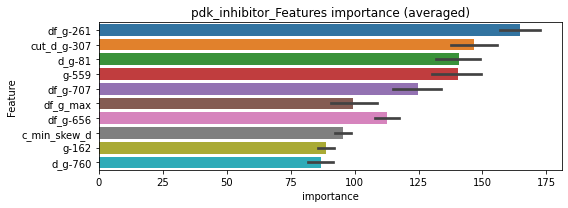

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000295306	valid_1's binary_logloss: 0.000678853


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000314865	valid_1's binary_logloss: 0.00301209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00031522	valid_1's binary_logloss: 0.00204934


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000299235	valid_1's binary_logloss: 0.000680517


pdk_inhibitor logloss: 0.0016049754939133289


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 7176
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 7176


unpredictable_cols:phosphodiesterase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0605407	valid_1's binary_logloss: 0.133347
[600]	training's binary_logloss: 0.0266082	valid_1's binary_logloss: 0.115958
[900]	training's binary_logloss: 0.0157173	valid_1's binary_logloss: 0.111889
Early stopping, best iteration is:
[941]	training's binary_logloss: 0.014844	valid_1's binary_logloss: 0.111657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0610156	valid_1's binary_logloss: 0.128923
[600]	training's binary_logloss: 0.027171	valid_1's binary_logloss: 0.109209
[900]	training's binary_logloss: 0.0162984	valid_1's binary_logloss: 0.103552
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.0156048	valid_1's binary_logloss: 0.102994
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0608743	valid_1's binary_logloss: 0.133093
[600]	training's binary_logloss: 0.0268128	val

1 / 3, AUC score:0.980, PR-AUC:0.959
y_Threshold: 0.0437051, Threshold: 0.0850819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 478 → Positive_corect_labels: 1340/8133
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0850819, conf_0:0.05956, conf_1:0.11061
threshold: 0.0850819, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1340.0/8133, y_label_rate: 0.1647609
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0460895	valid_1's binary_logloss: 0.0907649
[600]	training's binary_logloss: 0.0196622	valid_1's binary_logloss: 0.0697231
[900]	training's binary_logloss: 0.0116433	valid_1's binary_logloss: 0.0632288
[1200]	training's binary_logloss: 0.00812038	valid_1's binary_logloss: 0.0602549
[1500]	training's binary_logloss: 0.00618345	valid_1's binary_logloss: 0.0587501
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.00520817	valid_1's binary_logloss: 0.0580011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0451872	valid_1's binary_logloss: 0.0979804
[600]	training's binary_logloss: 0.0192095	valid_1's binary_logloss: 0.079459
[900]	training's binary_logloss: 0.0113714	valid_1's binary_logloss: 0.0743093
Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.00858901	valid_1's binary_logloss: 0.0722028
Training un

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0551833, Threshold: 0.0850819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 1288.0/8029
p_label_rate: 0.0138122 Vs.target_rate: 0.01109
Num_p_label: 55.0, Expected: 44.1, Threshold: 0.0850819, conf_0:0.06807, conf_1:0.10210
threshold: 0.0850819, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1288.0/8029, y_label_rate: 0.1604185
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0380358	valid_1's binary_logloss: 0.083248
[600]	training's binary_logloss: 0.0159415	valid_1's binary_logloss: 0.064136
[900]	training's binary_logloss: 0.0095076	valid_1's binary_logloss: 0.0587399
[1200]	training's binary_logloss: 0.0066514	valid_1's binary_logloss: 0.0564596
[1500]	training's binary_logloss: 0.00509622	valid_1's binary_logloss: 0.0552796
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.00492995	valid_1's binary_logloss: 0.0550936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0386085	valid_1's binary_logloss: 0.0813139
[600]	training's binary_logloss: 0.0164398	valid_1's binary_logloss: 0.0610526
[900]	training's binary_logloss: 0.00977737	valid_1's binary_logloss: 0.0552396
[1200]	training's binary_logloss: 0.0068396	valid_1's binary_logloss: 0.0529049
Early stopping, best iteration is:
[1290]	traini

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0530218, Threshold: 0.0850819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1265.0/7983
p_label_rate: 0.0145655 Vs.target_rate: 0.01109
Num_p_label: 58.0, Expected: 44.1, Threshold: 0.0850819, conf_0:0.07657, conf_1:0.09359
threshold: 0.0850819, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1265.0/7983, y_label_rate: 0.1584617


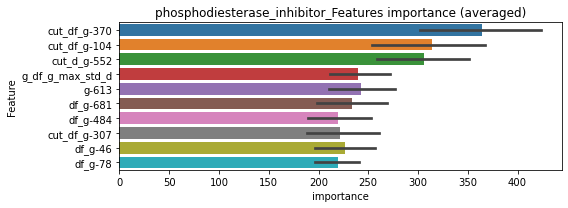

len(train_index) : 5987
len(valid_index) : 1996
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00346507	valid_1's binary_logloss: 0.0444621
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.00349419	valid_1's binary_logloss: 0.0444126


len(train_index) : 5987
len(valid_index) : 1996
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00505957	valid_1's binary_logloss: 0.0593389


len(train_index) : 5987
len(valid_index) : 1996
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00358326	valid_1's binary_logloss: 0.0338823
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.00331114	valid_1's binary_logloss: 0.0334956


len(train_index) : 5988
len(valid_index) : 1995
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.0043866	valid_1's binary_logloss: 0.0420901


phosphodiesterase_inhibitor logloss: 0.04483465306904638
phosphodiesterase_inhibitor is unpredictable(><)!
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133114	valid_1's binary_logloss: 0.0062606
[600]	training's binary_logloss: 0.000345718	valid_1's binary_logloss: 0.00389516
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000343633	valid_1's binary_logloss: 0.0038773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131335	valid_1's binary_logloss: 0.0103996
[600]	training's binary_logloss: 0.000344247	valid_1's binary_logloss: 0.00737013
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000340607	valid_1's binary_logloss: 0.00735473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136553	valid_1's binary_logloss: 0.00388135
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000364106	valid_1's binary_logloss: 0.00209834
Training until validation scores don't improve for 30 rounds
[

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021175, Threshold: 0.0076945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0076945, conf_0:0.00539, conf_1:0.01000
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_1: 0.0376945
threshold: 0.0376945, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128139	valid_1's binary_logloss: 0.00629727
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000353001	valid_1's binary_logloss: 0.00362665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126424	valid_1's binary_logloss: 0.0103858
[600]	training's binary_logloss: 0.000336834	valid_1's binary_logloss: 0.00707476
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00033349	valid_1's binary_logloss: 0.00706058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128619	valid_1's binary_logloss: 0.00409021
[600]	training's binary_logloss: 0.000336981	valid_1's binary_logloss: 0.00217576
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000345536	valid_1's binary_logloss: 0.00217536
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298682, Threshold: 0.0376945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0376945, conf_0:0.03016, conf_1:0.04523
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0676945
threshold: 0.0676945, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128139	valid_1's binary_logloss: 0.00629727
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000353001	valid_1's binary_logloss: 0.00362665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126424	valid_1's binary_logloss: 0.0103858
[600]	training's binary_logloss: 0.000336834	valid_1's binary_logloss: 0.00707476
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00033349	valid_1's binary_logloss: 0.00706058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128619	valid_1's binary_logloss: 0.00409021
[600]	training's binary_logloss: 0.000336981	valid_1's binary_logloss: 0.00217576
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000345536	valid_1's binary_logloss: 0.00217536
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298682, Threshold: 0.0676945, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0676945, conf_0:0.06093, conf_1:0.07446
threshold: 0.0676945, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


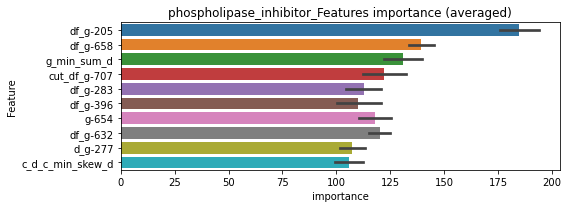

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000334501	valid_1's binary_logloss: 0.00202428


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000358197	valid_1's binary_logloss: 0.00407364


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000344979	valid_1's binary_logloss: 0.00190887


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000350412	valid_1's binary_logloss: 0.00178075


phospholipase_inhibitor logloss: 0.0024469378771120607
pi3k_inhibitor, len(trt): 151, len(othr): 4110
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


mutually exclusive columns: pi3k_inhibitor
selected negative label: 4110


unpredictable_cols:pi3k_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0593957	valid_1's binary_logloss: 0.117493
[600]	training's binary_logloss: 0.0264819	valid_1's binary_logloss: 0.0882889
[900]	training's binary_logloss: 0.0164137	valid_1's binary_logloss: 0.0778504
[1200]	training's binary_logloss: 0.011886	valid_1's binary_logloss: 0.0730249
[1500]	training's binary_logloss: 0.00937478	valid_1's binary_logloss: 0.0701554
[1800]	training's binary_logloss: 0.00781123	valid_1's binary_logloss: 0.0687073
[2100]	training's binary_logloss: 0.00672881	valid_1's binary_logloss: 0.0675367
Early stopping, best iteration is:
[2094]	training's binary_logloss: 0.00674661	valid_1's binary_logloss: 0.0674578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0577756	valid_1's binary_logloss: 0.139397
[600]	training's binary_logloss: 0.025337	valid_1's binary_logloss: 0.110156
[900]	training's binary_logloss: 0.0153524	valid

1 / 3, AUC score:0.992, PR-AUC:0.976
y_Threshold: 0.0428351, Threshold: 0.1042132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 219 → Positive_corect_labels: 795/4713
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1042132, conf_0:0.07295, conf_1:0.13548
Num_p_label: 21.0, Expected: 25.2, Adj_threshold_1: 0.1342132
threshold: 0.1342132, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 795.0/4713, y_label_rate: 0.1686824
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0524807	valid_1's binary_logloss: 0.112471
[600]	training's binary_logloss: 0.022503	valid_1's binary_logloss: 0.0809228
[900]	training's binary_logloss: 0.0135471	valid_1's binary_logloss: 0.069679
[1200]	training's binary_logloss: 0.00956439	valid_1's binary_logloss: 0.0637463
[1500]	training's binary_logloss: 0.00735555	valid_1's binary_logloss: 0.0608598
[1800]	training's binary_logloss: 0.0059698	valid_1's binary_logloss: 0.0587379
[2100]	training's binary_logloss: 0.00502441	valid_1's binary_logloss: 0.0572425
[2400]	training's binary_logloss: 0.00435467	valid_1's binary_logloss: 0.0560647
Early stopping, best iteration is:
[2616]	training's binary_logloss: 0.00396357	valid_1's binary_logloss: 0.0550814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0520207	valid_1's binary_logloss: 0.110711
[600]	training's binary_logloss: 0.0223443	val

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0821593, Threshold: 0.1342132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 768.0/4659
p_label_rate: 0.0143144 Vs.target_rate: 0.00634
Num_p_label: 57.0, Expected: 25.2, Threshold: 0.1342132, conf_0:0.10737, conf_1:0.16106
Num_p_label: 39.0, Expected: 25.2, Adj_threshold_1: 0.1642132
Num_p_label: 29.0, Expected: 25.2, Adj_threshold_2: 0.1942132
threshold: 0.1942132, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 768.0/4659, y_label_rate: 0.1648422
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0497021	valid_1's binary_logloss: 0.103905
[600]	training's binary_logloss: 0.021212	valid_1's binary_logloss: 0.0720775
[900]	training's binary_logloss: 0.0128559	valid_1's binary_logloss: 0.0609187
[1200]	training's binary_logloss: 0.00909527	valid_1's binary_logloss: 0.0556294
[1500]	training's binary_logloss: 0.00699525	valid_1's binary_logloss: 0.0522764
[1800]	training's binary_logloss: 0.00568234	valid_1's binary_logloss: 0.0501636
[2100]	training's binary_logloss: 0.00478415	valid_1's binary_logloss: 0.048614
[2400]	training's binary_logloss: 0.00414146	valid_1's binary_logloss: 0.0475122
[2700]	training's binary_logloss: 0.00365117	valid_1's binary_logloss: 0.0465628
[3000]	training's binary_logloss: 0.00327036	valid_1's binary_logloss: 0.0456493
Early stopping, best iteration is:
[3066]	training's binary_logloss: 0.00319573	valid_1's binary_logloss: 0.0454511
Training until validat

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0752171, Threshold: 0.1942132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 755.0/4633
p_label_rate: 0.0082873 Vs.target_rate: 0.00634
Num_p_label: 33.0, Expected: 25.2, Threshold: 0.1942132, conf_0:0.17479, conf_1:0.21363
threshold: 0.1942132, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 755.0/4633, y_label_rate: 0.1629614


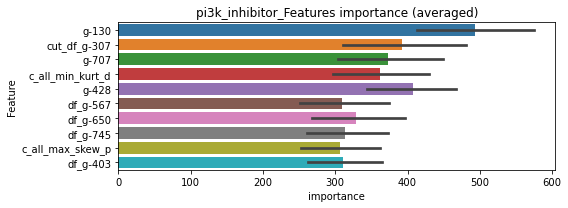

len(train_index) : 3474
len(valid_index) : 1159
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00479123	valid_1's binary_logloss: 0.0555096
Early stopping, best iteration is:
[1469]	training's binary_logloss: 0.00318249	valid_1's binary_logloss: 0.0527187


len(train_index) : 3475
len(valid_index) : 1158
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00491111	valid_1's binary_logloss: 0.0451601
Early stopping, best iteration is:
[1265]	training's binary_logloss: 0.00380522	valid_1's binary_logloss: 0.0430877


len(train_index) : 3475
len(valid_index) : 1158
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00479793	valid_1's binary_logloss: 0.0450512
Early stopping, best iteration is:
[1352]	training's binary_logloss: 0.00346501	valid_1's binary_logloss: 0.0423817


len(train_index) : 3475
len(valid_index) : 1158
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00483113	valid_1's binary_logloss: 0.0531819
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.0044725	valid_1's binary_logloss: 0.052489


pi3k_inhibitor logloss: 0.0476703255499262
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017049	valid_1's binary_logloss: 0.00772297
[600]	training's binary_logloss: 0.000413192	valid_1's binary_logloss: 0.00472737
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000408809	valid_1's binary_logloss: 0.00471703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168582	valid_1's binary_logloss: 0.00732174
[600]	training's binary_logloss: 0.000417294	valid_1's binary_logloss: 0.00463398
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000427115	valid_1's binary_logloss: 0.00459992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174037	valid_1's binary_logloss: 0.00318349
[600]	training's binary_logloss: 0.000423141	valid_1's binary_logloss: 0.00108265
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000414613	valid_1's binar

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023843, Threshold: 0.0068035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0068035, conf_0:0.00476, conf_1:0.00884
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0368035
threshold: 0.0368035, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162075	valid_1's binary_logloss: 0.00732146
[600]	training's binary_logloss: 0.000406312	valid_1's binary_logloss: 0.00440431
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000412109	valid_1's binary_logloss: 0.0043681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162429	valid_1's binary_logloss: 0.00679403
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000429242	valid_1's binary_logloss: 0.0042785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016557	valid_1's binary_logloss: 0.00316855
[600]	training's binary_logloss: 0.000414024	valid_1's binary_logloss: 0.00114736
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000414024	valid_1's binary_logloss: 0.00114736
Training until validation scores don't improve for 30 rounds
[

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0339684, Threshold: 0.0368035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00130
Num_p_label: 14.0, Expected: 5.2, Threshold: 0.0368035, conf_0:0.02944, conf_1:0.04416
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_1: 0.0668035
threshold: 0.0668035, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162075	valid_1's binary_logloss: 0.00732146
[600]	training's binary_logloss: 0.000406312	valid_1's binary_logloss: 0.00440431
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000412109	valid_1's binary_logloss: 0.0043681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162429	valid_1's binary_logloss: 0.00679403
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000429242	valid_1's binary_logloss: 0.0042785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016557	valid_1's binary_logloss: 0.00316855
[600]	training's binary_logloss: 0.000414024	valid_1's binary_logloss: 0.00114736
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000414024	valid_1's binary_logloss: 0.00114736
Training until validation scores don't improve for 30 rounds
[

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0339684, Threshold: 0.0668035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00130
Num_p_label: 6.0, Expected: 5.2, Threshold: 0.0668035, conf_0:0.06012, conf_1:0.07348
threshold: 0.0668035, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


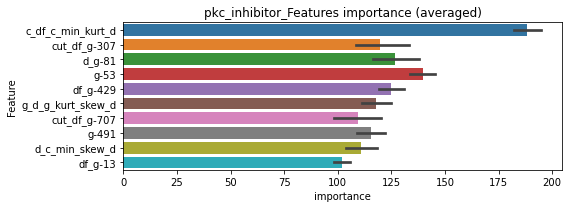

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000411918	valid_1's binary_logloss: 0.00303297


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.0004155	valid_1's binary_logloss: 0.00347342


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000406907	valid_1's binary_logloss: 0.00121442


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000407709	valid_1's binary_logloss: 0.00392895


pkc_inhibitor logloss: 0.00291270900623659
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331497	valid_1's binary_logloss: 0.0298504
[600]	training's binary_logloss: 0.00063289	valid_1's binary_logloss: 0.0227578
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000599243	valid_1's binary_logloss: 0.0225255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336281	valid_1's binary_logloss: 0.0163019
[600]	training's binary_logloss: 0.000647871	valid_1's binary_logloss: 0.00998712
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000543525	valid_1's binary_logloss: 0.00963871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351298	valid_1's binary_logloss: 0.0199947
[600]	training's binary_logloss: 0.000654198	valid_1's binary_logloss: 0.0137708
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000655802	valid_1's binary_logl

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0048284, Threshold: 0.0233133, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0233133, conf_0:0.01632, conf_1:0.03031
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0533133
threshold: 0.0533133, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295638	valid_1's binary_logloss: 0.0239249
[600]	training's binary_logloss: 0.000592617	valid_1's binary_logloss: 0.0184421
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000587025	valid_1's binary_logloss: 0.0183903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307328	valid_1's binary_logloss: 0.019876
[600]	training's binary_logloss: 0.000612585	valid_1's binary_logloss: 0.0129005
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000568256	valid_1's binary_logloss: 0.0127054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310222	valid_1's binary_logloss: 0.0210432
[600]	training's binary_logloss: 0.000611609	valid_1's binary_logloss: 0.0149248
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000516879	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0330723, Threshold: 0.0533133, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0205927 Vs.target_rate: 0.00231
Num_p_label: 82.0, Expected: 9.2, Threshold: 0.0533133, conf_0:0.04265, conf_1:0.06398
Num_p_label: 54.0, Expected: 9.2, Adj_threshold_1: 0.0833133
Num_p_label: 41.0, Expected: 9.2, Adj_threshold_2: 0.1133133
Num_p_label: 39.0, Expected: 9.2, Adj_threshold_3: 0.1433133
Num_p_label: 30.0, Expected: 9.2, Adj_threshold_4: 0.1733133
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_5: 0.2033133
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_6: 0.2333133
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_7: 0.2633133
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_8: 0.2933133
threshold: 0.2933133, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299924	valid_1's binary_logloss: 0.0162792
[600]	training's binary_logloss: 0.000600695	valid_1's binary_logloss: 0.00984137
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000564244	valid_1's binary_logloss: 0.00973916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297037	valid_1's binary_logloss: 0.0239333
[600]	training's binary_logloss: 0.000594442	valid_1's binary_logloss: 0.0185164
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000514448	valid_1's binary_logloss: 0.0182427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298961	valid_1's binary_logloss: 0.0216422
[600]	training's binary_logloss: 0.000596972	valid_1's binary_logloss: 0.0155133
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000571369	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0466714, Threshold: 0.2933133, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0087896 Vs.target_rate: 0.00231
Num_p_label: 35.0, Expected: 9.2, Threshold: 0.2933133, conf_0:0.26398, conf_1:0.32264
Num_p_label: 33.0, Expected: 9.2, Adj_threshold_1: 0.3233133
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_2: 0.3533133
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_3: 0.3833133
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_4: 0.4133133
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_5: 0.4433133
threshold: 0.4433133, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


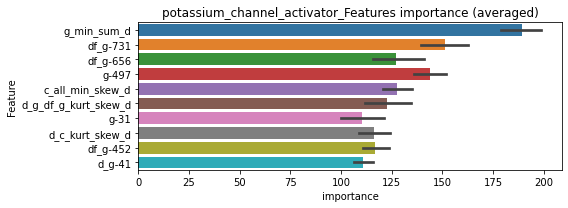

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000515094	valid_1's binary_logloss: 0.0144304


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000515688	valid_1's binary_logloss: 0.005133


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000660163	valid_1's binary_logloss: 0.0109643


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000539607	valid_1's binary_logloss: 0.0047587


potassium_channel_activator logloss: 0.00882570714031934
potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


unpredictable_cols:potassium_channel_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0449543	valid_1's binary_logloss: 0.112377
[600]	training's binary_logloss: 0.0197864	valid_1's binary_logloss: 0.0884932
[900]	training's binary_logloss: 0.0120988	valid_1's binary_logloss: 0.0803839
[1200]	training's binary_logloss: 0.00858799	valid_1's binary_logloss: 0.0762558
Early stopping, best iteration is:
[1451]	training's binary_logloss: 0.0069026	valid_1's binary_logloss: 0.0742211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0459042	valid_1's binary_logloss: 0.101094
[600]	training's binary_logloss: 0.0201719	valid_1's binary_logloss: 0.0757889
[900]	training's binary_logloss: 0.0123376	valid_1's binary_logloss: 0.0671036
[1200]	training's binary_logloss: 0.00876838	valid_1's binary_logloss: 0.0629984
[1500]	training's binary_logloss: 0.00680485	valid_1's binary_logloss: 0.0603695
Early stopping, best iteration is:
[1715]	train

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0338297, Threshold: 0.0676579, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0676579, conf_0:0.04736, conf_1:0.08796
Num_p_label: 18.0, Expected: 16.4, Adj_threshold_1: 0.0976579
threshold: 0.0976579, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 643.0/3773, y_label_rate: 0.1704214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412461	valid_1's binary_logloss: 0.111659
[600]	training's binary_logloss: 0.0180731	valid_1's binary_logloss: 0.0916824
[900]	training's binary_logloss: 0.0110387	valid_1's binary_logloss: 0.0854655
[1200]	training's binary_logloss: 0.00785875	valid_1's binary_logloss: 0.0824315
[1500]	training's binary_logloss: 0.00611548	valid_1's binary_logloss: 0.0810525
Early stopping, best iteration is:
[1475]	training's binary_logloss: 0.00622837	valid_1's binary_logloss: 0.0809367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.042841	valid_1's binary_logloss: 0.0991461
[600]	training's binary_logloss: 0.0187339	valid_1's binary_logloss: 0.0735265
[900]	training's binary_logloss: 0.0114768	valid_1's binary_logloss: 0.0651828
[1200]	training's binary_logloss: 0.00817662	valid_1's binary_logloss: 0.0607525
[1500]	training's binary_logloss: 0.00634226	va

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0568511, Threshold: 0.0976579, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0976579, conf_0:0.07813, conf_1:0.11719
Num_p_label: 22.0, Expected: 16.4, Adj_threshold_1: 0.1276579
threshold: 0.1276579, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 631.0/3749, y_label_rate: 0.1683115
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412426	valid_1's binary_logloss: 0.0925432
[600]	training's binary_logloss: 0.0177823	valid_1's binary_logloss: 0.0691313
[900]	training's binary_logloss: 0.0108363	valid_1's binary_logloss: 0.0613017
[1200]	training's binary_logloss: 0.00774617	valid_1's binary_logloss: 0.0574074
[1500]	training's binary_logloss: 0.00601845	valid_1's binary_logloss: 0.0555624
Early stopping, best iteration is:
[1493]	training's binary_logloss: 0.0060499	valid_1's binary_logloss: 0.055543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0408401	valid_1's binary_logloss: 0.0910244
[600]	training's binary_logloss: 0.0175885	valid_1's binary_logloss: 0.0686941
[900]	training's binary_logloss: 0.0107601	valid_1's binary_logloss: 0.0615687
[1200]	training's binary_logloss: 0.00766914	valid_1's binary_logloss: 0.0580766
[1500]	training's binary_logloss: 0.00594907	va

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0597574, Threshold: 0.1276579, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 618.0/3723
p_label_rate: 0.0062783 Vs.target_rate: 0.00412
Num_p_label: 25.0, Expected: 16.4, Threshold: 0.1276579, conf_0:0.11489, conf_1:0.14042
Num_p_label: 17.0, Expected: 16.4, Adj_threshold_1: 0.1576579
threshold: 0.1576579, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 618.0/3723, y_label_rate: 0.1659952


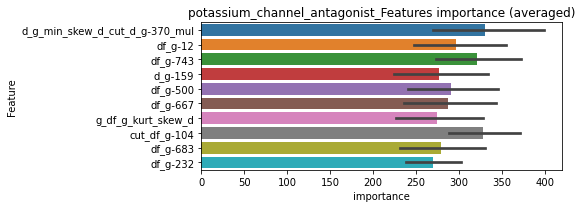

len(train_index) : 2792
len(valid_index) : 931
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00415177	valid_1's binary_logloss: 0.0497962
Early stopping, best iteration is:
[1261]	training's binary_logloss: 0.00325563	valid_1's binary_logloss: 0.0481812


len(train_index) : 2792
len(valid_index) : 931
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0041931	valid_1's binary_logloss: 0.0456689
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.00398584	valid_1's binary_logloss: 0.0453006


len(train_index) : 2792
len(valid_index) : 931
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00419888	valid_1's binary_logloss: 0.0457506
Early stopping, best iteration is:
[1270]	training's binary_logloss: 0.00326995	valid_1's binary_logloss: 0.044234


len(train_index) : 2793
len(valid_index) : 930
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00471342	valid_1's binary_logloss: 0.0543754


potassium_channel_antagonist logloss: 0.04802112234941867
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


unpredictable_cols:ppar_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0512051	valid_1's binary_logloss: 0.128737
[600]	training's binary_logloss: 0.0224687	valid_1's binary_logloss: 0.104899
[900]	training's binary_logloss: 0.0138308	valid_1's binary_logloss: 0.0988537
[1200]	training's binary_logloss: 0.00984025	valid_1's binary_logloss: 0.0960768
[1500]	training's binary_logloss: 0.00757644	valid_1's binary_logloss: 0.094628
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.00647922	valid_1's binary_logloss: 0.0941468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0531765	valid_1's binary_logloss: 0.116842
[600]	training's binary_logloss: 0.0235177	valid_1's binary_logloss: 0.0902768
[900]	training's binary_logloss: 0.0143563	valid_1's binary_logloss: 0.0817678
[1200]	training's binary_logloss: 0.010198	valid_1's binary_logloss: 0.0778695
[1500]	training's binary_logloss: 0.0078569	valid_

1 / 3, AUC score:0.990, PR-AUC:0.979
y_Threshold: 0.0361959, Threshold: 0.0995864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 176 → Positive_corect_labels: 633/3755
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0995864, conf_0:0.06971, conf_1:0.12946
Num_p_label: 23.0, Expected: 19.2, Adj_threshold_1: 0.1295864
threshold: 0.1295864, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 633.0/3755, y_label_rate: 0.1685752
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0461901	valid_1's binary_logloss: 0.108479
[600]	training's binary_logloss: 0.0200845	valid_1's binary_logloss: 0.0809702
[900]	training's binary_logloss: 0.012408	valid_1's binary_logloss: 0.0718439
[1200]	training's binary_logloss: 0.00885049	valid_1's binary_logloss: 0.0668944
[1500]	training's binary_logloss: 0.00685995	valid_1's binary_logloss: 0.0642593
[1800]	training's binary_logloss: 0.00560988	valid_1's binary_logloss: 0.0622859
Early stopping, best iteration is:
[2010]	training's binary_logloss: 0.00497418	valid_1's binary_logloss: 0.061279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0461545	valid_1's binary_logloss: 0.110229
[600]	training's binary_logloss: 0.0200388	valid_1's binary_logloss: 0.0846438
[900]	training's binary_logloss: 0.0122614	valid_1's binary_logloss: 0.0768753
[1200]	training's binary_logloss: 0.00874527	vali

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0609036, Threshold: 0.1295864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 619.0/3727
p_label_rate: 0.0097941 Vs.target_rate: 0.00483
Num_p_label: 39.0, Expected: 19.2, Threshold: 0.1295864, conf_0:0.10367, conf_1:0.15550
Num_p_label: 22.0, Expected: 19.2, Adj_threshold_1: 0.1595864
threshold: 0.1595864, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 619.0/3727, y_label_rate: 0.1660853
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0436699	valid_1's binary_logloss: 0.0941166
[600]	training's binary_logloss: 0.0189857	valid_1's binary_logloss: 0.0710966
[900]	training's binary_logloss: 0.0116212	valid_1's binary_logloss: 0.0636257
[1200]	training's binary_logloss: 0.00829344	valid_1's binary_logloss: 0.0603881
Early stopping, best iteration is:
[1193]	training's binary_logloss: 0.00834864	valid_1's binary_logloss: 0.0603289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0441588	valid_1's binary_logloss: 0.0954031
[600]	training's binary_logloss: 0.0193877	valid_1's binary_logloss: 0.070952
[900]	training's binary_logloss: 0.0119606	valid_1's binary_logloss: 0.0629789
[1200]	training's binary_logloss: 0.00852706	valid_1's binary_logloss: 0.0587761
[1500]	training's binary_logloss: 0.00661426	valid_1's binary_logloss: 0.0566131
[1800]	training's binary_logloss: 0.00541221	v

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0753099, Threshold: 0.1595864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 609.0/3707
p_label_rate: 0.0055249 Vs.target_rate: 0.00483
Num_p_label: 22.0, Expected: 19.2, Threshold: 0.1595864, conf_0:0.14363, conf_1:0.17555
threshold: 0.1595864, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 609.0/3707, y_label_rate: 0.1642838


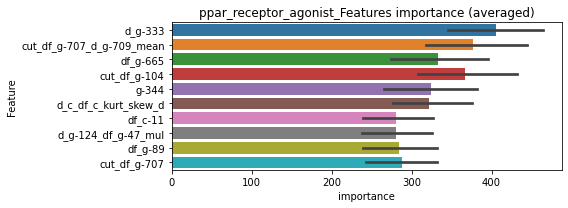

len(train_index) : 2780
len(valid_index) : 927
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.00483072	valid_1's binary_logloss: 0.0547076


len(train_index) : 2780
len(valid_index) : 927
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00458946	valid_1's binary_logloss: 0.0388843
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.00411523	valid_1's binary_logloss: 0.038078


len(train_index) : 2780
len(valid_index) : 927
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00461988	valid_1's binary_logloss: 0.0360114
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.00358858	valid_1's binary_logloss: 0.0342262


len(train_index) : 2781
len(valid_index) : 926
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00470566	valid_1's binary_logloss: 0.035903
Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.00413975	valid_1's binary_logloss: 0.0348734


ppar_receptor_agonist logloss: 0.04047281420953354
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162565	valid_1's binary_logloss: 0.00849848
[600]	training's binary_logloss: 0.000382684	valid_1's binary_logloss: 0.00602183
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000361	valid_1's binary_logloss: 0.00595991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156392	valid_1's binary_logloss: 0.0113527
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000404041	valid_1's binary_logloss: 0.00736217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166372	valid_1's binary_logloss: 0.00896352
[600]	training's binary_logloss: 0.000389642	valid_1's binary_logloss: 0.00595252
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000377751	valid_1's binary_logloss: 0.00591872
Training until validation scores don't improve for 30 rounds
[3

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019500, Threshold: 0.0046178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0046178, conf_0:0.00323, conf_1:0.00600
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0346178
threshold: 0.0346178, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156665	valid_1's binary_logloss: 0.00781104
[600]	training's binary_logloss: 0.000376126	valid_1's binary_logloss: 0.00542978
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000367562	valid_1's binary_logloss: 0.00540026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150317	valid_1's binary_logloss: 0.00981159
[600]	training's binary_logloss: 0.000374154	valid_1's binary_logloss: 0.00614521
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000381975	valid_1's binary_logloss: 0.00609272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159635	valid_1's binary_logloss: 0.008855
[600]	training's binary_logloss: 0.000380381	valid_1's binary_logloss: 0.0061251
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000370512	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175270, Threshold: 0.0346178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0346178, conf_0:0.02769, conf_1:0.04154
threshold: 0.0346178, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156665	valid_1's binary_logloss: 0.00781104
[600]	training's binary_logloss: 0.000376126	valid_1's binary_logloss: 0.00542978
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000367562	valid_1's binary_logloss: 0.00540026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150317	valid_1's binary_logloss: 0.00981159
[600]	training's binary_logloss: 0.000374154	valid_1's binary_logloss: 0.00614521
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000381975	valid_1's binary_logloss: 0.00609272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159635	valid_1's binary_logloss: 0.008855
[600]	training's binary_logloss: 0.000380381	valid_1's binary_logloss: 0.0061251
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000370512	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175270, Threshold: 0.0346178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0346178, conf_0:0.03116, conf_1:0.03808
threshold: 0.0346178, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


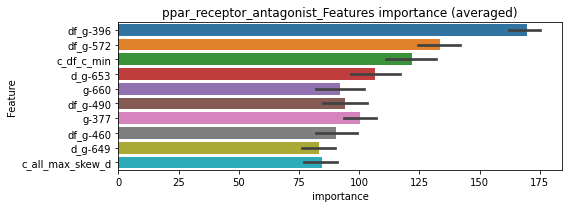

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000395445	valid_1's binary_logloss: 0.00510769


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000396178	valid_1's binary_logloss: 0.00619452


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000405617	valid_1's binary_logloss: 0.00479557


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000404128	valid_1's binary_logloss: 0.00650263


ppar_receptor_antagonist logloss: 0.005650103193615031
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


unpredictable_cols:progesterone_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0523118	valid_1's binary_logloss: 0.136683
[600]	training's binary_logloss: 0.0233005	valid_1's binary_logloss: 0.11238
[900]	training's binary_logloss: 0.0142857	valid_1's binary_logloss: 0.104881
[1200]	training's binary_logloss: 0.0101409	valid_1's binary_logloss: 0.101482
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.0104071	valid_1's binary_logloss: 0.101398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0534732	valid_1's binary_logloss: 0.124232
[600]	training's binary_logloss: 0.0236756	valid_1's binary_logloss: 0.100334
[900]	training's binary_logloss: 0.0144889	valid_1's binary_logloss: 0.0924666
[1200]	training's binary_logloss: 0.0102994	valid_1's binary_logloss: 0.0889908
[1500]	training's binary_logloss: 0.00795032	valid_1's binary_logloss: 0.0871277
Early stopping, best iteration is:
[1545]	training's bi

1 / 3, AUC score:0.989, PR-AUC:0.976
y_Threshold: 0.0419386, Threshold: 0.2630546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 625/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2630546, conf_0:0.18414, conf_1:0.34197
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_1: 0.2930546
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_2: 0.3230546
threshold: 0.3230546, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 625.0/3733, y_label_rate: 0.1674257
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0456913	valid_1's binary_logloss: 0.104038
[600]	training's binary_logloss: 0.0202275	valid_1's binary_logloss: 0.0800448
[900]	training's binary_logloss: 0.0124666	valid_1's binary_logloss: 0.0721153
[1200]	training's binary_logloss: 0.00888608	valid_1's binary_logloss: 0.0677837
[1500]	training's binary_logloss: 0.00688728	valid_1's binary_logloss: 0.065306
Early stopping, best iteration is:
[1542]	training's binary_logloss: 0.00667797	valid_1's binary_logloss: 0.0650922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0453075	valid_1's binary_logloss: 0.105355
[600]	training's binary_logloss: 0.0200511	valid_1's binary_logloss: 0.0810025
[900]	training's binary_logloss: 0.0123563	valid_1's binary_logloss: 0.0729212
[1200]	training's binary_logloss: 0.00883115	valid_1's binary_logloss: 0.0690788
[1500]	training's binary_logloss: 0.00686455	val

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0792357, Threshold: 0.3230546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 602.0/3687
p_label_rate: 0.0236062 Vs.target_rate: 0.00500
Num_p_label: 94.0, Expected: 19.9, Threshold: 0.3230546, conf_0:0.25844, conf_1:0.38767
Num_p_label: 83.0, Expected: 19.9, Adj_threshold_1: 0.3530546
Num_p_label: 80.0, Expected: 19.9, Adj_threshold_2: 0.3830546
Num_p_label: 78.0, Expected: 19.9, Adj_threshold_3: 0.4130546
Num_p_label: 77.0, Expected: 19.9, Adj_threshold_4: 0.4430546
Num_p_label: 71.0, Expected: 19.9, Adj_threshold_5: 0.4730546
Num_p_label: 62.0, Expected: 19.9, Adj_threshold_6: 0.5030546
Num_p_label: 53.0, Expected: 19.9, Adj_threshold_7: 0.5330546
Num_p_label: 48.0, Expected: 19.9, Adj_threshold_8: 0.5630546
Num_p_label: 43.0, Expected: 19.9, Adj_threshold_9: 0.5930546
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_10: 0.6230546
threshold: 0.6230546, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
p

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0410594	valid_1's binary_logloss: 0.088025
[600]	training's binary_logloss: 0.0182537	valid_1's binary_logloss: 0.0638945
[900]	training's binary_logloss: 0.0112687	valid_1's binary_logloss: 0.0552006
[1200]	training's binary_logloss: 0.00806835	valid_1's binary_logloss: 0.0508106
[1500]	training's binary_logloss: 0.00629364	valid_1's binary_logloss: 0.0481293
[1800]	training's binary_logloss: 0.00515956	valid_1's binary_logloss: 0.0463443
Early stopping, best iteration is:
[2056]	training's binary_logloss: 0.00446545	valid_1's binary_logloss: 0.0450829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416106	valid_1's binary_logloss: 0.0993902
[600]	training's binary_logloss: 0.0184328	valid_1's binary_logloss: 0.0738311
[900]	training's binary_logloss: 0.0113932	valid_1's binary_logloss: 0.065075
[1200]	training's binary_logloss: 0.00815961	va

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0687502, Threshold: 0.6230546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 590.0/3663
p_label_rate: 0.0138122 Vs.target_rate: 0.00500
Num_p_label: 55.0, Expected: 19.9, Threshold: 0.6230546, conf_0:0.56075, conf_1:0.68536
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_1: 0.6530546
Num_p_label: 46.0, Expected: 19.9, Adj_threshold_2: 0.6830546
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_3: 0.7130546
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_4: 0.7430546
threshold: 0.7430546, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 590.0/3663, y_label_rate: 0.1610702


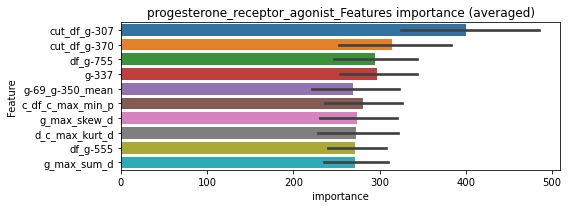

len(train_index) : 2747
len(valid_index) : 916
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00442427	valid_1's binary_logloss: 0.0440146
Early stopping, best iteration is:
[1413]	training's binary_logloss: 0.00309117	valid_1's binary_logloss: 0.04179


len(train_index) : 2747
len(valid_index) : 916
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00625027	valid_1's binary_logloss: 0.0572491


len(train_index) : 2747
len(valid_index) : 916
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00452711	valid_1's binary_logloss: 0.0269494
[2000]	training's binary_logloss: 0.00223876	valid_1's binary_logloss: 0.0218951
[3000]	training's binary_logloss: 0.00153908	valid_1's binary_logloss: 0.0200475
Early stopping, best iteration is:
[3044]	training's binary_logloss: 0.00151943	valid_1's binary_logloss: 0.0199472


len(train_index) : 2748
len(valid_index) : 915
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00495485	valid_1's binary_logloss: 0.0454413


progesterone_receptor_agonist logloss: 0.04110570790547048
progesterone_receptor_agonist is unpredictable(><)!
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866419	valid_1's binary_logloss: 0.00222574
[600]	training's binary_logloss: 0.000273962	valid_1's binary_logloss: 0.000962022
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000273978	valid_1's binary_logloss: 0.000961992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000840662	valid_1's binary_logloss: 0.0033235
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.0002796	valid_1's binary_logloss: 0.00182258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000867152	valid_1's binary_logloss: 0.00228663
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000284118	valid_1's binary_logloss: 0.00109229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000850162	valid_1's binary_logloss: 0.00359

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016903, Threshold: 0.0081822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0081822, conf_0:0.00573, conf_1:0.01064
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0381822
threshold: 0.0381822, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796345	valid_1's binary_logloss: 0.00174634
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00026441	valid_1's binary_logloss: 0.000735057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782715	valid_1's binary_logloss: 0.00398549
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000263281	valid_1's binary_logloss: 0.00235333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808473	valid_1's binary_logloss: 0.00144942
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000266736	valid_1's binary_logloss: 0.000556476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000773158	valid_1's binary_logloss: 0.00408441


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0752537, Threshold: 0.0381822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, Expected: 3.0, Threshold: 0.0381822, conf_0:0.03055, conf_1:0.04582
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0681822
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0981822
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.1281822


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000262217	valid_1's binary_logloss: 0.00270079


threshold: 0.1281822, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796345	valid_1's binary_logloss: 0.00174634
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00026441	valid_1's binary_logloss: 0.000735057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782715	valid_1's binary_logloss: 0.00398549
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000263281	valid_1's binary_logloss: 0.00235333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808473	valid_1's binary_logloss: 0.00144942
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000266736	valid_1's binary_logloss: 0.000556476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000773158	valid_1's binary_logloss: 0.00408441


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0752537, Threshold: 0.1281822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.1281822, conf_0:0.11536, conf_1:0.14100


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000262217	valid_1's binary_logloss: 0.00270079


threshold: 0.1281822, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


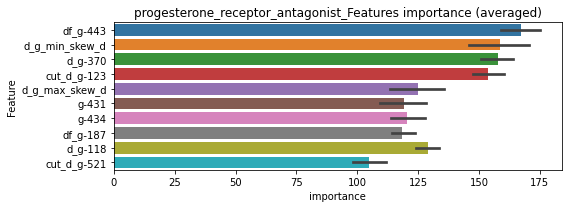

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000263447	valid_1's binary_logloss: 0.000665863


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000265921	valid_1's binary_logloss: 0.000835489


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000271979	valid_1's binary_logloss: 0.000506418


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0009128141471884874


Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000275215	valid_1's binary_logloss: 0.00164425


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187692	valid_1's binary_logloss: 0.010212
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000460807	valid_1's binary_logloss: 0.00656343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184294	valid_1's binary_logloss: 0.0175874
[600]	training's binary_logloss: 0.000418068	valid_1's binary_logloss: 0.0139764
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000423919	valid_1's binary_logloss: 0.0139522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187361	valid_1's binary_logloss: 0.0200638
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00131647	valid_1's binary_logloss: 0.0195573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188243	valid_1's binary_logloss: 0.00717157
[600]	t

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033489, Threshold: 0.0156248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0156248, conf_0:0.01094, conf_1:0.02031
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0456248
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0756248
threshold: 0.0756248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174724	valid_1's binary_logloss: 0.0169384
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000444389	valid_1's binary_logloss: 0.0146394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187632	valid_1's binary_logloss: 0.00508422
[600]	training's binary_logloss: 0.000422162	valid_1's binary_logloss: 0.00189866
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.0004018	valid_1's binary_logloss: 0.00183618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187475	valid_1's binary_logloss: 0.00553615
[600]	training's binary_logloss: 0.000418916	valid_1's binary_logloss: 0.00217657
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410949	valid_1's binary_logloss: 0.00216144
Training until validation scores don't improve for 30 rounds
[3

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0166477, Threshold: 0.0756248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, Expected: 6.0, Threshold: 0.0756248, conf_0:0.06050, conf_1:0.09075
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.1056248
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.1356248
threshold: 0.1356248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179465	valid_1's binary_logloss: 0.00914426
[600]	training's binary_logloss: 0.000413131	valid_1's binary_logloss: 0.00624624
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408925	valid_1's binary_logloss: 0.00622219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183286	valid_1's binary_logloss: 0.006731
[600]	training's binary_logloss: 0.000418178	valid_1's binary_logloss: 0.0033067
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000412956	valid_1's binary_logloss: 0.00329275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175286	valid_1's binary_logloss: 0.0202594
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000554547	valid_1's binary_logloss: 0.018813
Training until validation scores don't improve for 30 rounds
[300

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129869, Threshold: 0.1356248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.1356248, conf_0:0.12206, conf_1:0.14919
threshold: 0.1356248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


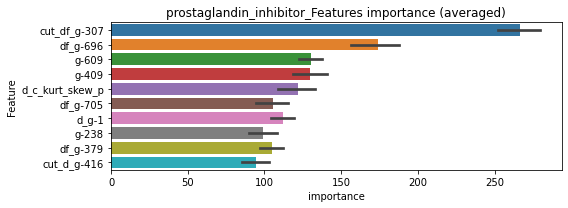

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000405086	valid_1's binary_logloss: 0.00403286


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000405483	valid_1's binary_logloss: 0.00400068


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000408245	valid_1's binary_logloss: 0.0128266


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000425099	valid_1's binary_logloss: 0.00240735


prostaglandin_inhibitor logloss: 0.005816683210423605
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576043	valid_1's binary_logloss: 0.0567802
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00184757	valid_1's binary_logloss: 0.0520573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624738	valid_1's binary_logloss: 0.0493946
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00120916	valid_1's binary_logloss: 0.0408769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067375	valid_1's binary_logloss: 0.0400879
[600]	training's binary_logloss: 0.00103711	valid_1's binary_logloss: 0.0326373
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000890378	valid_1's binary_logloss: 0.0323898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653438	valid_1's binary_logloss: 0.0404183
[600]	train

1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0088321, Threshold: 0.0384197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0384197, conf_0:0.02689, conf_1:0.04995
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_1: 0.0684197
Num_p_label: 20.0, Expected: 14.0, Adj_threshold_2: 0.0984197
threshold: 0.0984197, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523468	valid_1's binary_logloss: 0.0529494
[600]	training's binary_logloss: 0.000902696	valid_1's binary_logloss: 0.0430805
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000913261	valid_1's binary_logloss: 0.0430324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546272	valid_1's binary_logloss: 0.0423842
[600]	training's binary_logloss: 0.000920571	valid_1's binary_logloss: 0.0323608
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000870981	valid_1's binary_logloss: 0.0320891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00536006	valid_1's binary_logloss: 0.0382946
[600]	training's binary_logloss: 0.000925979	valid_1's binary_logloss: 0.0312264
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000922945	valid_1's binary_loglo

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0289382, Threshold: 0.0984197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 641.0/3773
p_label_rate: 0.0138122 Vs.target_rate: 0.00353
Num_p_label: 55.0, Expected: 14.0, Threshold: 0.0984197, conf_0:0.07874, conf_1:0.11810
Num_p_label: 49.0, Expected: 14.0, Adj_threshold_1: 0.1284197
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_2: 0.1584197
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_3: 0.1884197
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_4: 0.2184197
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_5: 0.2484197
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_6: 0.2784197
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_7: 0.3084197
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_8: 0.3384197
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_9: 0.3684197
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_10: 0.3984197
threshold: 0.3984197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
p

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478776	valid_1's binary_logloss: 0.0426965
[600]	training's binary_logloss: 0.000852942	valid_1's binary_logloss: 0.0344468
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000790383	valid_1's binary_logloss: 0.0342768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493849	valid_1's binary_logloss: 0.0342296
[600]	training's binary_logloss: 0.000864053	valid_1's binary_logloss: 0.0273639
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00090191	valid_1's binary_logloss: 0.0272416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478363	valid_1's binary_logloss: 0.0308241
[600]	training's binary_logloss: 0.000856153	valid_1's binary_logloss: 0.0209818
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000693369	valid_1's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0294442, Threshold: 0.3984197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 637.0/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.3984197, conf_0:0.35858, conf_1:0.43826
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_1: 0.4284197
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_2: 0.4584197
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_3: 0.4884197
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_4: 0.5184197
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_5: 0.5484197
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_6: 0.5784197
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_7: 0.6084197
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_8: 0.6384197
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_9: 0.6684197
threshold: 0.6684197, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 637.0/3765, y_label_rate: 0.1691899


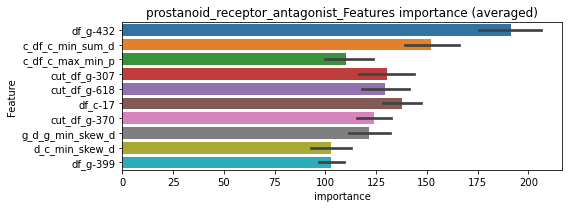

len(train_index) : 2823
len(valid_index) : 942
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000746504	valid_1's binary_logloss: 0.0279054


len(train_index) : 2824
len(valid_index) : 941
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000850311	valid_1's binary_logloss: 0.017291


len(train_index) : 2824
len(valid_index) : 941
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00083009	valid_1's binary_logloss: 0.0286119


len(train_index) : 2824
len(valid_index) : 941
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


prostanoid_receptor_antagonist logloss: 0.025197265393244784


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00129257	valid_1's binary_logloss: 0.0269778
mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


unpredictable_cols:proteasome_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.130087	valid_1's binary_logloss: 0.252271
[600]	training's binary_logloss: 0.0640313	valid_1's binary_logloss: 0.224379
[900]	training's binary_logloss: 0.037535	valid_1's binary_logloss: 0.217706
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.033389	valid_1's binary_logloss: 0.21682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.130326	valid_1's binary_logloss: 0.25483
[600]	training's binary_logloss: 0.0636217	valid_1's binary_logloss: 0.230552
[900]	training's binary_logloss: 0.0375372	valid_1's binary_logloss: 0.222765
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.0356779	valid_1's binary_logloss: 0.222213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.130802	valid_1's binary_logloss: 0.246451
[600]	training's binary_logloss: 0.0642679	valid_1'

1 / 3, AUC score:0.908, PR-AUC:0.851
y_Threshold: 0.0907682, Threshold: 0.1662206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1262 → Positive_corect_labels: 1619/11012
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1662206, conf_0:0.11635, conf_1:0.21609
threshold: 0.1662206, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1619.0/11012, y_label_rate: 0.1470214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0799125	valid_1's binary_logloss: 0.153365
[600]	training's binary_logloss: 0.0351712	valid_1's binary_logloss: 0.117811
[900]	training's binary_logloss: 0.0204028	valid_1's binary_logloss: 0.106547
[1200]	training's binary_logloss: 0.0137885	valid_1's binary_logloss: 0.100859
[1500]	training's binary_logloss: 0.0102221	valid_1's binary_logloss: 0.0976028
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.00890778	valid_1's binary_logloss: 0.0966279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0777086	valid_1's binary_logloss: 0.162418
[600]	training's binary_logloss: 0.0343406	valid_1's binary_logloss: 0.129792
[900]	training's binary_logloss: 0.0200002	valid_1's binary_logloss: 0.118128
Early stopping, best iteration is:
[1105]	training's binary_logloss: 0.0150994	valid_1's binary_logloss: 0.114415
Training until valida

2 / 3, AUC score:0.989, PR-AUC:0.969
y_Threshold: 0.0836877, Threshold: 0.1662206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 274 → Positive_corect_labels: 1482.0/10738
p_label_rate: 0.0087896 Vs.target_rate: 0.03049
Num_p_label: 35.0, Expected: 121.4, Threshold: 0.1662206, conf_0:0.13298, conf_1:0.19946
threshold: 0.1662206, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1482.0/10738, y_label_rate: 0.1380145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0635761	valid_1's binary_logloss: 0.127365
[600]	training's binary_logloss: 0.0273822	valid_1's binary_logloss: 0.0958598
[900]	training's binary_logloss: 0.0159041	valid_1's binary_logloss: 0.0852793
[1200]	training's binary_logloss: 0.0108218	valid_1's binary_logloss: 0.0804081
[1500]	training's binary_logloss: 0.00808493	valid_1's binary_logloss: 0.0775032
Early stopping, best iteration is:
[1526]	training's binary_logloss: 0.00790723	valid_1's binary_logloss: 0.0770307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0636077	valid_1's binary_logloss: 0.126693
[600]	training's binary_logloss: 0.0273113	valid_1's binary_logloss: 0.0989943
[900]	training's binary_logloss: 0.0158002	valid_1's binary_logloss: 0.0889888
[1200]	training's binary_logloss: 0.0107825	valid_1's binary_logloss: 0.0849771
[1500]	training's binary_logloss: 0.00805811	vali

3 / 3, AUC score:0.993, PR-AUC:0.982
y_Threshold: 0.0747420, Threshold: 0.1662206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 1406.0/10586
p_label_rate: 0.0115520 Vs.target_rate: 0.03049
Num_p_label: 46.0, Expected: 121.4, Threshold: 0.1662206, conf_0:0.14960, conf_1:0.18284
threshold: 0.1662206, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1406.0/10586, y_label_rate: 0.1328169


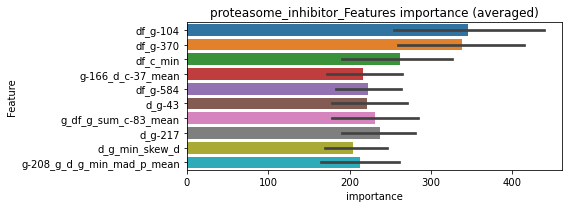

len(train_index) : 7939
len(valid_index) : 2647
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00669072	valid_1's binary_logloss: 0.0654977


len(train_index) : 7939
len(valid_index) : 2647
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00497209	valid_1's binary_logloss: 0.0684382
Early stopping, best iteration is:
[1093]	training's binary_logloss: 0.00447387	valid_1's binary_logloss: 0.0678498


len(train_index) : 7940
len(valid_index) : 2646
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00737151	valid_1's binary_logloss: 0.0688662


len(train_index) : 7940
len(valid_index) : 2646
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.00568372	valid_1's binary_logloss: 0.0658553


proteasome_inhibitor logloss: 0.06701719940956774
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294138	valid_1's binary_logloss: 0.0254523
[600]	training's binary_logloss: 0.000567152	valid_1's binary_logloss: 0.017666
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000499197	valid_1's binary_logloss: 0.0172734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031153	valid_1's binary_logloss: 0.0195022
[600]	training's binary_logloss: 0.000589117	valid_1's binary_logloss: 0.0135251
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000573291	valid_1's binary_logloss: 0.0134708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309156	valid_1's binary_logloss: 0.0126193
[600]	training's binary_logloss: 0.000598639	valid_1's binary_logloss: 0.00673137
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000508534	valid_1's binary_loglos

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039048, Threshold: 0.0095205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0095205, conf_0:0.00666, conf_1:0.01238
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_1: 0.0395205
threshold: 0.0395205, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270736	valid_1's binary_logloss: 0.0253353
[600]	training's binary_logloss: 0.0005437	valid_1's binary_logloss: 0.0176143
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.0004945	valid_1's binary_logloss: 0.0174749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292527	valid_1's binary_logloss: 0.0172841
[600]	training's binary_logloss: 0.000571033	valid_1's binary_logloss: 0.0110214
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000550187	valid_1's binary_logloss: 0.0109884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028833	valid_1's binary_logloss: 0.0108975
[600]	training's binary_logloss: 0.000577509	valid_1's binary_logloss: 0.00522337
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000497401	valid_1's binary_logloss: 

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192804, Threshold: 0.0395205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0030136 Vs.target_rate: 0.00202
Num_p_label: 12.0, Expected: 8.0, Threshold: 0.0395205, conf_0:0.03162, conf_1:0.04742
threshold: 0.0395205, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264645	valid_1's binary_logloss: 0.0165363
[600]	training's binary_logloss: 0.000543366	valid_1's binary_logloss: 0.0113787
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00051433	valid_1's binary_logloss: 0.0112554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283712	valid_1's binary_logloss: 0.0115844
[600]	training's binary_logloss: 0.000565512	valid_1's binary_logloss: 0.00718495
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000507934	valid_1's binary_logloss: 0.00711474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029983	valid_1's binary_logloss: 0.0114876
[600]	training's binary_logloss: 0.00058051	valid_1's binary_logloss: 0.0052604
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000487144	valid_1's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0220003, Threshold: 0.0395205, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0395205, conf_0:0.03557, conf_1:0.04347
threshold: 0.0395205, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


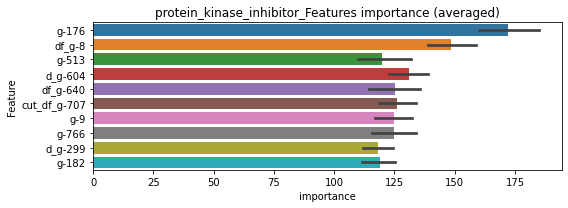

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000501841	valid_1's binary_logloss: 0.0124157


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000499379	valid_1's binary_logloss: 0.00824114


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00050241	valid_1's binary_logloss: 0.00510265


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00060794	valid_1's binary_logloss: 0.00922154


protein_kinase_inhibitor logloss: 0.008746273278506538
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114241	valid_1's binary_logloss: 0.00462075
[600]	training's binary_logloss: 0.000329332	valid_1's binary_logloss: 0.00269957
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000325071	valid_1's binary_logloss: 0.00267707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112842	valid_1's binary_logloss: 0.00506473
[600]	training's binary_logloss: 0.000324977	valid_1's binary_logloss: 0.00294711
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000326348	valid_1's binary_logloss: 0.00294064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012219	valid_1's binary_logloss: 0.00250091
[600]	training's binary_logloss: 0.000334483	valid_1's binary_logloss: 0.000935426
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000332072	valid_1's bina

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015555, Threshold: 0.0050752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0050752, conf_0:0.00355, conf_1:0.00660
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0350752


[600]	training's binary_logloss: 0.000339063	valid_1's binary_logloss: 0.00221764
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000342643	valid_1's binary_logloss: 0.00220934


threshold: 0.0350752, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109828	valid_1's binary_logloss: 0.00518243
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000329944	valid_1's binary_logloss: 0.00361246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010979	valid_1's binary_logloss: 0.00444017
[600]	training's binary_logloss: 0.000316571	valid_1's binary_logloss: 0.00261719
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000318114	valid_1's binary_logloss: 0.00260989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112125	valid_1's binary_logloss: 0.00229587
[600]	training's binary_logloss: 0.000324113	valid_1's binary_logloss: 0.000891351
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000324113	valid_1's binary_logloss: 0.000891351
Training until validation scores don't improve for 30 roun

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0446185, Threshold: 0.0350752, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00032271	valid_1's binary_logloss: 0.00271354
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000326295	valid_1's binary_logloss: 0.00270656


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0350752, conf_0:0.02806, conf_1:0.04209
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0650752
threshold: 0.0650752, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109828	valid_1's binary_logloss: 0.00518243
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000329944	valid_1's binary_logloss: 0.00361246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010979	valid_1's binary_logloss: 0.00444017
[600]	training's binary_logloss: 0.000316571	valid_1's binary_logloss: 0.00261719
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000318114	valid_1's binary_logloss: 0.00260989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112125	valid_1's binary_logloss: 0.00229587
[600]	training's binary_logloss: 0.000324113	valid_1's binary_logloss: 0.000891351
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000324113	valid_1's binary_logloss: 0.000891351
Training until validation scores don't improve for 30 roun

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0446185, Threshold: 0.0650752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0650752, conf_0:0.05857, conf_1:0.07158
threshold: 0.0650752, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


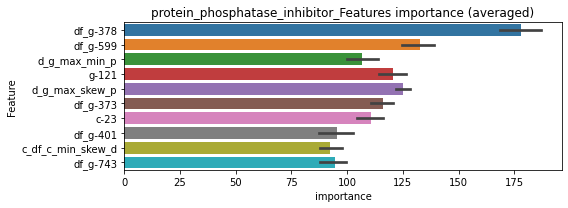

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000329877	valid_1's binary_logloss: 0.00235271


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000352913	valid_1's binary_logloss: 0.00245523


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00032761	valid_1's binary_logloss: 0.000870315


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000371814	valid_1's binary_logloss: 0.00232701


protein_phosphatase_inhibitor logloss: 0.0020020237046833055
protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


unpredictable_cols:protein_synthesis_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464285	valid_1's binary_logloss: 0.12055
[600]	training's binary_logloss: 0.0204345	valid_1's binary_logloss: 0.0961198
[900]	training's binary_logloss: 0.0125036	valid_1's binary_logloss: 0.0892719
[1200]	training's binary_logloss: 0.00891373	valid_1's binary_logloss: 0.0857873
[1500]	training's binary_logloss: 0.00690074	valid_1's binary_logloss: 0.0837617
Early stopping, best iteration is:
[1609]	training's binary_logloss: 0.00637327	valid_1's binary_logloss: 0.0834197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0472814	valid_1's binary_logloss: 0.115075
[600]	training's binary_logloss: 0.0206063	valid_1's binary_logloss: 0.0911728
[900]	training's binary_logloss: 0.0125881	valid_1's binary_logloss: 0.0844602
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.0106551	valid_1's binary_logloss: 0.0824163
Training unti

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0282527, Threshold: 0.1102062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1102062, conf_0:0.07714, conf_1:0.14327
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_1: 0.1402062
Num_p_label: 26.0, Expected: 17.2, Adj_threshold_2: 0.1702062
Num_p_label: 22.0, Expected: 17.2, Adj_threshold_3: 0.2002062
threshold: 0.2002062, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 641.0/3769, y_label_rate: 0.1700716
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437359	valid_1's binary_logloss: 0.10357
[600]	training's binary_logloss: 0.018965	valid_1's binary_logloss: 0.0806739
[900]	training's binary_logloss: 0.0116346	valid_1's binary_logloss: 0.0735328
[1200]	training's binary_logloss: 0.00830038	valid_1's binary_logloss: 0.0696121
Early stopping, best iteration is:
[1396]	training's binary_logloss: 0.00697305	valid_1's binary_logloss: 0.0683136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0447108	valid_1's binary_logloss: 0.0921579
[600]	training's binary_logloss: 0.0195206	valid_1's binary_logloss: 0.0670824
[900]	training's binary_logloss: 0.0119716	valid_1's binary_logloss: 0.0588384
[1200]	training's binary_logloss: 0.00854509	valid_1's binary_logloss: 0.0546371
[1500]	training's binary_logloss: 0.00661884	valid_1's binary_logloss: 0.0524609
Early stopping, best iteration is:
[1686]	traini

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0569474, Threshold: 0.2002062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 625.0/3737
p_label_rate: 0.0070316 Vs.target_rate: 0.00433
Num_p_label: 28.0, Expected: 17.2, Threshold: 0.2002062, conf_0:0.16016, conf_1:0.24025
Num_p_label: 22.0, Expected: 17.2, Adj_threshold_1: 0.2302062
threshold: 0.2302062, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 625.0/3737, y_label_rate: 0.1672465
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0424462	valid_1's binary_logloss: 0.0870617
[600]	training's binary_logloss: 0.0182951	valid_1's binary_logloss: 0.0623316
[900]	training's binary_logloss: 0.0112195	valid_1's binary_logloss: 0.0543654
[1200]	training's binary_logloss: 0.00798313	valid_1's binary_logloss: 0.0504029
[1500]	training's binary_logloss: 0.0061952	valid_1's binary_logloss: 0.0480125
[1800]	training's binary_logloss: 0.0050725	valid_1's binary_logloss: 0.046649
[2100]	training's binary_logloss: 0.00429446	valid_1's binary_logloss: 0.0456586
[2400]	training's binary_logloss: 0.0037344	valid_1's binary_logloss: 0.0448655
[2700]	training's binary_logloss: 0.00330879	valid_1's binary_logloss: 0.0442358
Early stopping, best iteration is:
[2685]	training's binary_logloss: 0.00332706	valid_1's binary_logloss: 0.044224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0412725	v

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0447431, Threshold: 0.2302062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 618.0/3723
p_label_rate: 0.0067805 Vs.target_rate: 0.00433
Num_p_label: 27.0, Expected: 17.2, Threshold: 0.2302062, conf_0:0.20719, conf_1:0.25323
Num_p_label: 20.0, Expected: 17.2, Adj_threshold_1: 0.2602062
threshold: 0.2602062, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 618.0/3723, y_label_rate: 0.1659952


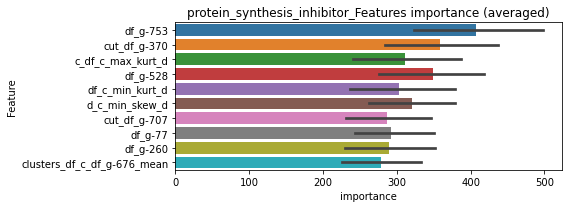

len(train_index) : 2792
len(valid_index) : 931
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00445749	valid_1's binary_logloss: 0.0420344
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.00337261	valid_1's binary_logloss: 0.0402983


len(train_index) : 2792
len(valid_index) : 931
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00446123	valid_1's binary_logloss: 0.0437891
Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.00333366	valid_1's binary_logloss: 0.0420062


len(train_index) : 2792
len(valid_index) : 931
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00445436	valid_1's binary_logloss: 0.0394984
[2000]	training's binary_logloss: 0.00221069	valid_1's binary_logloss: 0.0351323
Early stopping, best iteration is:
[2068]	training's binary_logloss: 0.00213971	valid_1's binary_logloss: 0.0349223


len(train_index) : 2793
len(valid_index) : 930
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00442609	valid_1's binary_logloss: 0.0488728
Early stopping, best iteration is:
[1270]	training's binary_logloss: 0.00344042	valid_1's binary_logloss: 0.0474132


protein_synthesis_inhibitor logloss: 0.041158351937045846
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111192	valid_1's binary_logloss: 0.00362791
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000346831	valid_1's binary_logloss: 0.00207156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108548	valid_1's binary_logloss: 0.00623059
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000347073	valid_1's binary_logloss: 0.00429476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112032	valid_1's binary_logloss: 0.00205524
[600]	training's binary_logloss: 0.0003094	valid_1's binary_logloss: 0.000740028
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000309116	valid_1's binary_logloss: 0.000739686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114465	valid_1's binary_logloss: 0.00228293

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016256, Threshold: 0.0050502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050502, conf_0:0.00354, conf_1:0.00657
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350502
threshold: 0.0350502, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102085	valid_1's binary_logloss: 0.00304923
[600]	training's binary_logloss: 0.000297896	valid_1's binary_logloss: 0.00163942
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298169	valid_1's binary_logloss: 0.00163829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103873	valid_1's binary_logloss: 0.00581259
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00034391	valid_1's binary_logloss: 0.00409069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106895	valid_1's binary_logloss: 0.00175597
[600]	training's binary_logloss: 0.000301764	valid_1's binary_logloss: 0.000576988
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000301764	valid_1's binary_logloss: 0.000576988
Training until validation scores don't improve for 30 roun

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176227, Threshold: 0.0350502, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000296744	valid_1's binary_logloss: 0.000826623
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298103	valid_1's binary_logloss: 0.000825698


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0350502, conf_0:0.02804, conf_1:0.04206
threshold: 0.0350502, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102085	valid_1's binary_logloss: 0.00304923
[600]	training's binary_logloss: 0.000297896	valid_1's binary_logloss: 0.00163942
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298169	valid_1's binary_logloss: 0.00163829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103873	valid_1's binary_logloss: 0.00581259
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00034391	valid_1's binary_logloss: 0.00409069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106895	valid_1's binary_logloss: 0.00175597
[600]	training's binary_logloss: 0.000301764	valid_1's binary_logloss: 0.000576988
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000301764	valid_1's binary_logloss: 0.000576988
Training until validation scores don't improve for 30 roun

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176227, Threshold: 0.0350502, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000296744	valid_1's binary_logloss: 0.000826623
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000298103	valid_1's binary_logloss: 0.000825698


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0350502, conf_0:0.03155, conf_1:0.03856
threshold: 0.0350502, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


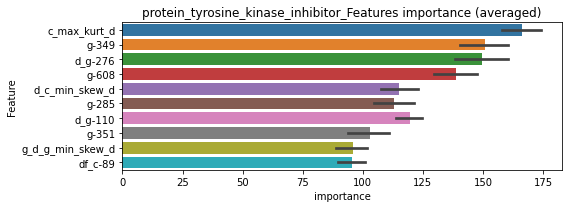

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000295386	valid_1's binary_logloss: 0.00136272
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.00029638	valid_1's binary_logloss: 0.00136109


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000320127	valid_1's binary_logloss: 0.00317085


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000300505	valid_1's binary_logloss: 0.000541442


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000297369	valid_1's binary_logloss: 0.000664595
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000297369	valid_1's binary_logloss: 0.000664595


protein_tyrosine_kinase_inhibitor logloss: 0.0014346916991659418
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382118	valid_1's binary_logloss: 0.0336211
[600]	training's binary_logloss: 0.000687342	valid_1's binary_logloss: 0.0248819
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000586466	valid_1's binary_logloss: 0.0244628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040813	valid_1's binary_logloss: 0.0165135
[600]	training's binary_logloss: 0.000702981	valid_1's binary_logloss: 0.00840076
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561363	valid_1's binary_logloss: 0.00806679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428977	valid_1's binary_logloss: 0.0112655
[600]	training's binary_logloss: 0.000742203	valid_1's binary_logloss: 0.00401599
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000560049	valid_1's binary_log

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050410, Threshold: 0.0124574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0124574, conf_0:0.00872, conf_1:0.01619
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0424574
threshold: 0.0424574, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356756	valid_1's binary_logloss: 0.0294202
[600]	training's binary_logloss: 0.000667422	valid_1's binary_logloss: 0.0206402
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000558321	valid_1's binary_logloss: 0.0203063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371654	valid_1's binary_logloss: 0.0153552
[600]	training's binary_logloss: 0.000691383	valid_1's binary_logloss: 0.0077976
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000558792	valid_1's binary_logloss: 0.00740274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400217	valid_1's binary_logloss: 0.0113136
[600]	training's binary_logloss: 0.000708197	valid_1's binary_logloss: 0.0042788
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000556882	valid_1's binary_logl

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426284, Threshold: 0.0424574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0424574, conf_0:0.03397, conf_1:0.05095
threshold: 0.0424574, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356756	valid_1's binary_logloss: 0.0294202
[600]	training's binary_logloss: 0.000667422	valid_1's binary_logloss: 0.0206402
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000558321	valid_1's binary_logloss: 0.0203063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371654	valid_1's binary_logloss: 0.0153552
[600]	training's binary_logloss: 0.000691383	valid_1's binary_logloss: 0.0077976
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000558792	valid_1's binary_logloss: 0.00740274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400217	valid_1's binary_logloss: 0.0113136
[600]	training's binary_logloss: 0.000708197	valid_1's binary_logloss: 0.0042788
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000556882	valid_1's binary_logl

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426284, Threshold: 0.0424574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0424574, conf_0:0.03821, conf_1:0.04670
threshold: 0.0424574, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


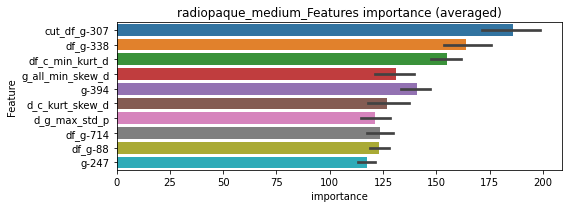

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000573019	valid_1's binary_logloss: 0.016636


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000552174	valid_1's binary_logloss: 0.00759243


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.00057287	valid_1's binary_logloss: 0.00315362


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000577841	valid_1's binary_logloss: 0.0104007


radiopaque_medium logloss: 0.009448381810545857
raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


unpredictable_cols:raf_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0889858	valid_1's binary_logloss: 0.239916
[600]	training's binary_logloss: 0.040629	valid_1's binary_logloss: 0.215297
[900]	training's binary_logloss: 0.0247243	valid_1's binary_logloss: 0.208751
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.023921	valid_1's binary_logloss: 0.207768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0892363	valid_1's binary_logloss: 0.239426
[600]	training's binary_logloss: 0.0408189	valid_1's binary_logloss: 0.209119
[900]	training's binary_logloss: 0.0249126	valid_1's binary_logloss: 0.200691
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.0242815	valid_1's binary_logloss: 0.200097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0901809	valid_1's binary_logloss: 0.223127
[600]	training's binary_logloss: 0.0414691	val

1 / 3, AUC score:0.937, PR-AUC:0.892
y_Threshold: 0.0852784, Threshold: 0.4422859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 331 → Positive_corect_labels: 551/3578
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.4422859, conf_0:0.30960, conf_1:0.57497
threshold: 0.4422859, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 551.0/3578, y_label_rate: 0.1539966
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0675277	valid_1's binary_logloss: 0.167483
[600]	training's binary_logloss: 0.02992	valid_1's binary_logloss: 0.133875
[900]	training's binary_logloss: 0.0182021	valid_1's binary_logloss: 0.123024
[1200]	training's binary_logloss: 0.0128729	valid_1's binary_logloss: 0.11802
Early stopping, best iteration is:
[1190]	training's binary_logloss: 0.0129925	valid_1's binary_logloss: 0.11793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0675469	valid_1's binary_logloss: 0.167584
[600]	training's binary_logloss: 0.0298192	valid_1's binary_logloss: 0.134307
[900]	training's binary_logloss: 0.0181411	valid_1's binary_logloss: 0.123202
[1200]	training's binary_logloss: 0.012868	valid_1's binary_logloss: 0.118311
[1500]	training's binary_logloss: 0.00990035	valid_1's binary_logloss: 0.115347
Early stopping, best iteration is:
[1660]	training's binary_log

2 / 3, AUC score:0.984, PR-AUC:0.962
y_Threshold: 0.0935132, Threshold: 0.4422859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 502.0/3480
p_label_rate: 0.0288800 Vs.target_rate: 0.00936
Num_p_label: 115.0, Expected: 37.3, Threshold: 0.4422859, conf_0:0.35383, conf_1:0.53074
Num_p_label: 110.0, Expected: 37.3, Adj_threshold_1: 0.4722859
Num_p_label: 107.0, Expected: 37.3, Adj_threshold_2: 0.5022859
Num_p_label: 99.0, Expected: 37.3, Adj_threshold_3: 0.5322859
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_4: 0.5622859
Num_p_label: 88.0, Expected: 37.3, Adj_threshold_5: 0.5922859
Num_p_label: 87.0, Expected: 37.3, Adj_threshold_6: 0.6222859
Num_p_label: 81.0, Expected: 37.3, Adj_threshold_7: 0.6522859
Num_p_label: 71.0, Expected: 37.3, Adj_threshold_8: 0.6822859
Num_p_label: 64.0, Expected: 37.3, Adj_threshold_9: 0.7122859
Num_p_label: 52.0, Expected: 37.3, Adj_threshold_10: 0.7422859
threshold: 0.7422859, positive_p_label: 52.0/3982, p_label_rate: 0.013058

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0602273	valid_1's binary_logloss: 0.138248
[600]	training's binary_logloss: 0.0264349	valid_1's binary_logloss: 0.102314
[900]	training's binary_logloss: 0.0161076	valid_1's binary_logloss: 0.0910206
[1200]	training's binary_logloss: 0.0113942	valid_1's binary_logloss: 0.0844792
[1500]	training's binary_logloss: 0.00880059	valid_1's binary_logloss: 0.0809814
[1800]	training's binary_logloss: 0.00716795	valid_1's binary_logloss: 0.0789154
[2100]	training's binary_logloss: 0.00604573	valid_1's binary_logloss: 0.0773929
[2400]	training's binary_logloss: 0.00523245	valid_1's binary_logloss: 0.0762233
Early stopping, best iteration is:
[2443]	training's binary_logloss: 0.0051323	valid_1's binary_logloss: 0.0760479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0595453	valid_1's binary_logloss: 0.135565
[600]	training's binary_logloss: 0.0261613	val

3 / 3, AUC score:0.991, PR-AUC:0.979
y_Threshold: 0.0957219, Threshold: 0.7422859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 471.0/3418
p_label_rate: 0.0248619 Vs.target_rate: 0.00936
Num_p_label: 99.0, Expected: 37.3, Threshold: 0.7422859, conf_0:0.66806, conf_1:0.81651
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_1: 0.7722859
Num_p_label: 90.0, Expected: 37.3, Adj_threshold_2: 0.8022859
Num_p_label: 79.0, Expected: 37.3, Adj_threshold_3: 0.8322859
Num_p_label: 68.0, Expected: 37.3, Adj_threshold_4: 0.8622859
Num_p_label: 55.0, Expected: 37.3, Adj_threshold_5: 0.8922859
threshold: 0.8922859, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 471.0/3418, y_label_rate: 0.1377999


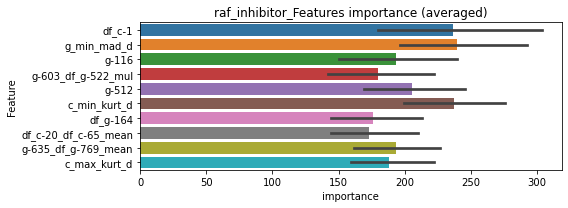

len(train_index) : 2563
len(valid_index) : 855
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.005701	valid_1's binary_logloss: 0.0925938
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.00501901	valid_1's binary_logloss: 0.091543


len(train_index) : 2563
len(valid_index) : 855
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00572025	valid_1's binary_logloss: 0.0746714
Early stopping, best iteration is:
[1414]	training's binary_logloss: 0.00395526	valid_1's binary_logloss: 0.0707869


len(train_index) : 2564
len(valid_index) : 854
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00834337	valid_1's binary_logloss: 0.079014


len(train_index) : 2564
len(valid_index) : 854
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00572172	valid_1's binary_logloss: 0.0682411
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.00560727	valid_1's binary_logloss: 0.0681239


raf_inhibitor logloss: 0.07736918694089528
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000591819	valid_1's binary_logloss: 0.00237632
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000245311	valid_1's binary_logloss: 0.00164699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000580106	valid_1's binary_logloss: 0.00190868
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000239281	valid_1's binary_logloss: 0.00126088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577757	valid_1's binary_logloss: 0.00224529
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000240282	valid_1's binary_logloss: 0.00136306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000599941	valid_1's binary_logloss: 0.00153938


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010363, Threshold: 0.0136325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0136325, conf_0:0.00954, conf_1:0.01772
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.0436325
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0736325
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1036325


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000244248	valid_1's binary_logloss: 0.000826792


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1336325
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1636325
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1936325
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2236325
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2536325
threshold: 0.2536325, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000516805	valid_1's binary_logloss: 0.00204247
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000222363	valid_1's binary_logloss: 0.0014503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00052105	valid_1's binary_logloss: 0.00148247
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000222846	valid_1's binary_logloss: 0.00101672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000536406	valid_1's binary_logloss: 0.000614404
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000226764	valid_1's binary_logloss: 0.000267845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000529966	valid_1's binary_logloss: 0.00190858


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0862808, Threshold: 0.2536325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.2536325, conf_0:0.20291, conf_1:0.30436
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_1: 0.2836325
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3136325
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_3: 0.3436325
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_4: 0.3736325
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.4036325


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000222378	valid_1's binary_logloss: 0.00118037


Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.4336325
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_7: 0.4636325
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_8: 0.4936325
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.5236325
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_10: 0.5536325
threshold: 0.5536325, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000516805	valid_1's binary_logloss: 0.00204247
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000222363	valid_1's binary_logloss: 0.0014503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00052105	valid_1's binary_logloss: 0.00148247
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000222846	valid_1's binary_logloss: 0.00101672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000536406	valid_1's binary_logloss: 0.000614404
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000226764	valid_1's binary_logloss: 0.000267845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000529966	valid_1's binary_logloss: 0.00190858


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0862808, Threshold: 0.5536325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, Expected: 2.0, Threshold: 0.5536325, conf_0:0.49827, conf_1:0.60900
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.5836325


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000222378	valid_1's binary_logloss: 0.00118037


Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.6136325
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.6436325
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.6736325
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.7036325
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.7336325
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.7636325
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.7936325
threshold: 0.7936325, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


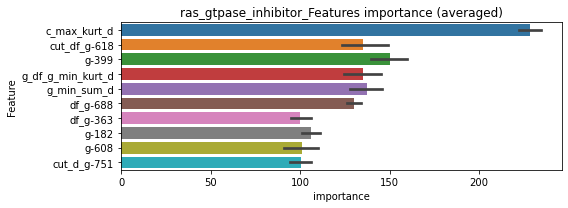

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000224236	valid_1's binary_logloss: 0.00062735
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000223173	valid_1's binary_logloss: 0.000833143
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000227618	valid_1's binary_logloss: 0.000310751
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.0006222908974812771


Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000224101	valid_1's binary_logloss: 0.000717657


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438442	valid_1's binary_logloss: 0.0295069
[600]	training's binary_logloss: 0.000773893	valid_1's binary_logloss: 0.0197461
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000570195	valid_1's binary_logloss: 0.0191497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451538	valid_1's binary_logloss: 0.023642
[600]	training's binary_logloss: 0.000795444	valid_1's binary_logloss: 0.0139103
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000612782	valid_1's binary_logloss: 0.0131291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433543	valid_1's binary_logloss: 0.0322395
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00125195	valid_1's binary_logloss: 0.0275424
Training until validation scores don't improve for 30 rounds
[300]	tr

1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0084040, Threshold: 0.1144267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1144267, conf_0:0.08010, conf_1:0.14875
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_1: 0.1444267
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_2: 0.1744267
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_3: 0.2044267
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_4: 0.2344267
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_5: 0.2644267
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_6: 0.2944267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_7: 0.3244267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.3544267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_9: 0.3844267
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_10: 0.4144267
threshold: 0.4144267, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
po

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401644	valid_1's binary_logloss: 0.0211063
[600]	training's binary_logloss: 0.000737126	valid_1's binary_logloss: 0.0120437
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000552317	valid_1's binary_logloss: 0.0113705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395208	valid_1's binary_logloss: 0.0342531
[600]	training's binary_logloss: 0.000731711	valid_1's binary_logloss: 0.0257164
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000571274	valid_1's binary_logloss: 0.024963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390683	valid_1's binary_logloss: 0.0262776
[600]	training's binary_logloss: 0.000733548	valid_1's binary_logloss: 0.0180002
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000553251	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0363943, Threshold: 0.4144267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3792
p_label_rate: 0.0060271 Vs.target_rate: 0.00281
Num_p_label: 24.0, Expected: 11.2, Threshold: 0.4144267, conf_0:0.33154, conf_1:0.49731
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_1: 0.4444267
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_2: 0.4744267
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_3: 0.5044267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_4: 0.5344267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5644267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5944267
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_7: 0.6244267
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_8: 0.6544267
threshold: 0.6544267, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382038	valid_1's binary_logloss: 0.0187095
[600]	training's binary_logloss: 0.000728186	valid_1's binary_logloss: 0.0103905
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000563232	valid_1's binary_logloss: 0.0097109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390651	valid_1's binary_logloss: 0.0204939
[600]	training's binary_logloss: 0.000732614	valid_1's binary_logloss: 0.0112412
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000548869	valid_1's binary_logloss: 0.0105516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380692	valid_1's binary_logloss: 0.0354946
[600]	training's binary_logloss: 0.000719336	valid_1's binary_logloss: 0.0291516
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000669788	valid_1's binary_loglo

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0395433, Threshold: 0.6544267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6544267, conf_0:0.58898, conf_1:0.71987
threshold: 0.6544267, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


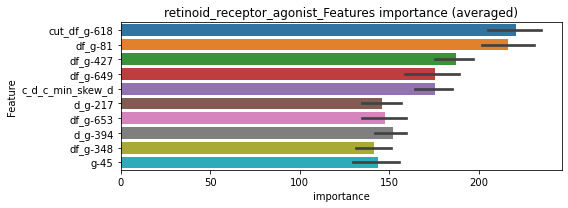

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000647356	valid_1's binary_logloss: 0.0235728


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557954	valid_1's binary_logloss: 0.00853488
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000540426	valid_1's binary_logloss: 0.00842808


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000573506	valid_1's binary_logloss: 0.00908042


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000756238	valid_1's binary_logloss: 0.013422


retinoid_receptor_agonist logloss: 0.01362721536353915
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000319872	valid_1's binary_logloss: 0.000418686
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000157995	valid_1's binary_logloss: 0.000221445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000313734	valid_1's binary_logloss: 0.00181591
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000154757	valid_1's binary_logloss: 0.00139666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00031743	valid_1's binary_logloss: 0.000372766
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000156458	valid_1's binary_logloss: 0.000187003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321544	valid_1's binary_logloss: 0.000382688


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004468, Threshold: 0.0019027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0019027, conf_0:0.00133, conf_1:0.00247
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0319027
threshold: 0.0319027, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000158077	valid_1's binary_logloss: 0.000195969


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000304308	valid_1's binary_logloss: 0.000401665
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000145216	valid_1's binary_logloss: 0.000205391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301354	valid_1's binary_logloss: 0.000465804
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000144299	valid_1's binary_logloss: 0.000246759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030079	valid_1's binary_logloss: 0.00033723
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000145189	valid_1's binary_logloss: 0.000164084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302195	valid_1's binary_logloss: 0.000333193


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658356, Threshold: 0.0319027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0319027, conf_0:0.02552, conf_1:0.03828
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0619027
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0919027
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1219027
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1519027


[600]	training's binary_logloss: 0.00014477	valid_1's binary_logloss: 0.000161116
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00014477	valid_1's binary_logloss: 0.000161116


threshold: 0.1519027, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000304308	valid_1's binary_logloss: 0.000401665
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000145216	valid_1's binary_logloss: 0.000205391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301354	valid_1's binary_logloss: 0.000465804
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000144299	valid_1's binary_logloss: 0.000246759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030079	valid_1's binary_logloss: 0.00033723
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000145189	valid_1's binary_logloss: 0.000164084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302195	valid_1's binary_logloss: 0.000333193


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658356, Threshold: 0.1519027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1519027, conf_0:0.13671, conf_1:0.16709
threshold: 0.1519027, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[600]	training's binary_logloss: 0.00014477	valid_1's binary_logloss: 0.000161116
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00014477	valid_1's binary_logloss: 0.000161116


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


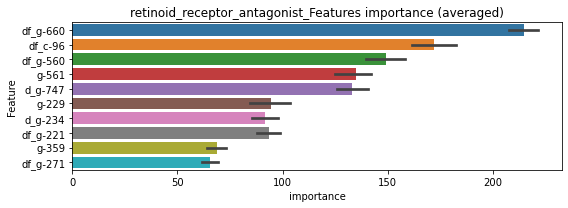

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015063	valid_1's binary_logloss: 0.000266022
Early stopping, best iteration is:
[1186]	training's binary_logloss: 0.000147748	valid_1's binary_logloss: 0.000262111


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149932	valid_1's binary_logloss: 0.000202256


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1223]	training's binary_logloss: 0.00014728	valid_1's binary_logloss: 0.000199099
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149364	valid_1's binary_logloss: 0.00017901


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1208]	training's binary_logloss: 0.000146827	valid_1's binary_logloss: 0.000176098
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151134	valid_1's binary_logloss: 0.000166903


retinoid_receptor_antagonist logloss: 0.0002001603085365686


Early stopping, best iteration is:
[1276]	training's binary_logloss: 0.000147821	valid_1's binary_logloss: 0.000163268


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186305	valid_1's binary_logloss: 0.00993515
[600]	training's binary_logloss: 0.000417123	valid_1's binary_logloss: 0.00574799
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000398863	valid_1's binary_logloss: 0.00565749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195502	valid_1's binary_logloss: 0.00577168
[600]	training's binary_logloss: 0.000432367	valid_1's binary_logloss: 0.00247113
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000393779	valid_1's binary_logloss: 0.002373
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193626	valid_1's binary_logloss: 0.00465013
[600]	training's binary_logloss: 0.00043305	valid_1's binary_logloss: 0.00180661
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000400369	valid_1's binary_

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030325, Threshold: 0.0085413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0085413, conf_0:0.00598, conf_1:0.01110
Num_p_label: 6.0, Expected: 5.9, Adj_threshold_1: 0.0385413
threshold: 0.0385413, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168056	valid_1's binary_logloss: 0.00947052
[600]	training's binary_logloss: 0.000396484	valid_1's binary_logloss: 0.00547128
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00543339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017675	valid_1's binary_logloss: 0.00508495
[600]	training's binary_logloss: 0.000407966	valid_1's binary_logloss: 0.00204675
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000379075	valid_1's binary_logloss: 0.00196263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177993	valid_1's binary_logloss: 0.00370759
[600]	training's binary_logloss: 0.000408265	valid_1's binary_logloss: 0.00129913
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000383913	valid_1's binar

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0327854, Threshold: 0.0385413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00147
Num_p_label: 20.0, Expected: 5.9, Threshold: 0.0385413, conf_0:0.03083, conf_1:0.04625
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0685413
threshold: 0.0685413, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168056	valid_1's binary_logloss: 0.00947052
[600]	training's binary_logloss: 0.000396484	valid_1's binary_logloss: 0.00547128
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00543339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017675	valid_1's binary_logloss: 0.00508495
[600]	training's binary_logloss: 0.000407966	valid_1's binary_logloss: 0.00204675
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000379075	valid_1's binary_logloss: 0.00196263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177993	valid_1's binary_logloss: 0.00370759
[600]	training's binary_logloss: 0.000408265	valid_1's binary_logloss: 0.00129913
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000383913	valid_1's binar

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0327854, Threshold: 0.0685413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0685413, conf_0:0.06169, conf_1:0.07540
threshold: 0.0685413, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


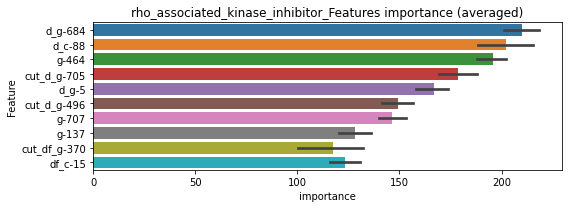

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000394255	valid_1's binary_logloss: 0.00525707


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000403453	valid_1's binary_logloss: 0.00204465


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390379	valid_1's binary_logloss: 0.00170023
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000391446	valid_1's binary_logloss: 0.00169861


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000400719	valid_1's binary_logloss: 0.00658105


rho_associated_kinase_inhibitor logloss: 0.003895345113753753
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221595	valid_1's binary_logloss: 0.00905329
[600]	training's binary_logloss: 0.00046166	valid_1's binary_logloss: 0.00478137
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000433098	valid_1's binary_logloss: 0.00470982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214629	valid_1's binary_logloss: 0.0204092
[600]	training's binary_logloss: 0.000448597	valid_1's binary_logloss: 0.0148527
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000426867	valid_1's binary_logloss: 0.0146798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218603	valid_1's binary_logloss: 0.00697877
[600]	training's binary_logloss: 0.000464877	valid_1's binary_logloss: 0.00284355
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000430277	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0047570, Threshold: 0.0191065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0191065, conf_0:0.01337, conf_1:0.02484
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0491065
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_2: 0.0791065
threshold: 0.0791065, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193536	valid_1's binary_logloss: 0.00870761
[600]	training's binary_logloss: 0.000433321	valid_1's binary_logloss: 0.00501074
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00493099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192535	valid_1's binary_logloss: 0.021027
[600]	training's binary_logloss: 0.000424789	valid_1's binary_logloss: 0.016459
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409602	valid_1's binary_logloss: 0.0164385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195129	valid_1's binary_logloss: 0.00423523
[600]	training's binary_logloss: 0.000437994	valid_1's binary_logloss: 0.00146734
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000412751	valid_1's binary_lo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0319909, Threshold: 0.0791065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0072828 Vs.target_rate: 0.00155
Num_p_label: 29.0, Expected: 6.2, Threshold: 0.0791065, conf_0:0.06329, conf_1:0.09493
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.1091065
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.1391065
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_3: 0.1691065
threshold: 0.1691065, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183217	valid_1's binary_logloss: 0.0147369
[600]	training's binary_logloss: 0.000419408	valid_1's binary_logloss: 0.010047
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000401642	valid_1's binary_logloss: 0.00995939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196633	valid_1's binary_logloss: 0.00503774
[600]	training's binary_logloss: 0.000436272	valid_1's binary_logloss: 0.00196377
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000404224	valid_1's binary_logloss: 0.00189924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194594	valid_1's binary_logloss: 0.00451453
[600]	training's binary_logloss: 0.000432984	valid_1's binary_logloss: 0.00152294
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000419682	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353096, Threshold: 0.1691065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.1691065, conf_0:0.15220, conf_1:0.18602
threshold: 0.1691065, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


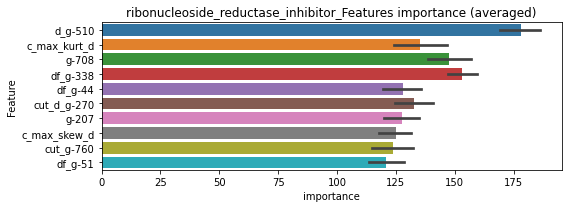

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000410098	valid_1's binary_logloss: 0.00787625


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409934	valid_1's binary_logloss: 0.00171309
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000410136	valid_1's binary_logloss: 0.00171273


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000422522	valid_1's binary_logloss: 0.00127722


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000420108	valid_1's binary_logloss: 0.00592043


ribonucleoside_reductase_inhibitor logloss: 0.004197713487817082
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124081	valid_1's binary_logloss: 0.0034554
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00035733	valid_1's binary_logloss: 0.00165225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123685	valid_1's binary_logloss: 0.00660038
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000342097	valid_1's binary_logloss: 0.00407272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124228	valid_1's binary_logloss: 0.00253202
[600]	training's binary_logloss: 0.000347436	valid_1's binary_logloss: 0.000894094
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000347436	valid_1's binary_logloss: 0.000894094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126045	valid_1's binary_logloss: 0.00269405

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020290, Threshold: 0.0063757, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000353007	valid_1's binary_logloss: 0.00101692


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0063757, conf_0:0.00446, conf_1:0.00829
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0363757
threshold: 0.0363757, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118616	valid_1's binary_logloss: 0.00325461
[600]	training's binary_logloss: 0.00033462	valid_1's binary_logloss: 0.00146468
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00033462	valid_1's binary_logloss: 0.00146468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114668	valid_1's binary_logloss: 0.00444797
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000339069	valid_1's binary_logloss: 0.00236353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012152	valid_1's binary_logloss: 0.00242279
[600]	training's binary_logloss: 0.000336561	valid_1's binary_logloss: 0.000806621
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000336727	valid_1's binary_logloss: 0.000806452
Training until validation scores don't improve for 30 rounds

2 / 3, AUC score:1.000, PR-AUC:1.000


[600]	training's binary_logloss: 0.000340311	valid_1's binary_logloss: 0.000717538
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000340311	valid_1's binary_logloss: 0.000717538


y_Threshold: 0.1260689, Threshold: 0.0363757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, Expected: 4.2, Threshold: 0.0363757, conf_0:0.02910, conf_1:0.04365
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0663757
threshold: 0.0663757, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118616	valid_1's binary_logloss: 0.00325461
[600]	training's binary_logloss: 0.00033462	valid_1's binary_logloss: 0.00146468
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00033462	valid_1's binary_logloss: 0.00146468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114668	valid_1's binary_logloss: 0.00444797
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000339069	valid_1's binary_logloss: 0.00236353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012152	valid_1's binary_logloss: 0.00242279
[600]	training's binary_logloss: 0.000336561	valid_1's binary_logloss: 0.000806621
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000336727	valid_1's binary_logloss: 0.000806452
Training until validation scores don't improve for 30 rounds

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1260689, Threshold: 0.0663757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


[600]	training's binary_logloss: 0.000340311	valid_1's binary_logloss: 0.000717538
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000340311	valid_1's binary_logloss: 0.000717538


p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, Expected: 4.2, Threshold: 0.0663757, conf_0:0.05974, conf_1:0.07301
threshold: 0.0663757, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


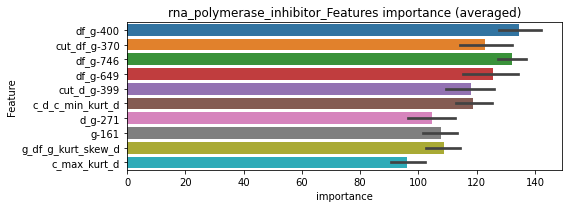

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000341293	valid_1's binary_logloss: 0.00128771


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000337094	valid_1's binary_logloss: 0.00199639


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000344705	valid_1's binary_logloss: 0.000737387


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.00035203	valid_1's binary_logloss: 0.000728994


rna_polymerase_inhibitor logloss: 0.0011878942667661757


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 6230
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 6230


unpredictable_cols:serotonin_receptor_agonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0596526	valid_1's binary_logloss: 0.138965
[600]	training's binary_logloss: 0.0265802	valid_1's binary_logloss: 0.118447
[900]	training's binary_logloss: 0.016047	valid_1's binary_logloss: 0.113157
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.0120449	valid_1's binary_logloss: 0.11105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.059213	valid_1's binary_logloss: 0.144731
[600]	training's binary_logloss: 0.0262165	valid_1's binary_logloss: 0.126561
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.0195536	valid_1's binary_logloss: 0.124332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0643986	valid_1's binary_logloss: 0.107147
[600]	training's binary_logloss: 0.0287269	valid_1's binary_logloss: 0.0839407
[900]	training's binary_logloss: 0.0174228	va

1 / 3, AUC score:0.976, PR-AUC:0.955
y_Threshold: 0.0498710, Threshold: 0.1038075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 422 → Positive_corect_labels: 1160/7054
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1038075, conf_0:0.07267, conf_1:0.13495
threshold: 0.1038075, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1160.0/7054, y_label_rate: 0.1644457
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0446218	valid_1's binary_logloss: 0.0961325
[600]	training's binary_logloss: 0.0190242	valid_1's binary_logloss: 0.0754226
[900]	training's binary_logloss: 0.0113698	valid_1's binary_logloss: 0.0697211
[1200]	training's binary_logloss: 0.00798317	valid_1's binary_logloss: 0.0669535
Early stopping, best iteration is:
[1321]	training's binary_logloss: 0.00710416	valid_1's binary_logloss: 0.06623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0443929	valid_1's binary_logloss: 0.105553
[600]	training's binary_logloss: 0.0188118	valid_1's binary_logloss: 0.0836012
[900]	training's binary_logloss: 0.0112477	valid_1's binary_logloss: 0.0770595
Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.00836204	valid_1's binary_logloss: 0.0747685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0715520, Threshold: 0.1038075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1116.0/6966
p_label_rate: 0.0158212 Vs.target_rate: 0.00991
Num_p_label: 63.0, Expected: 39.5, Threshold: 0.1038075, conf_0:0.08305, conf_1:0.12457
Num_p_label: 41.0, Expected: 39.5, Adj_threshold_1: 0.1338075
threshold: 0.1338075, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 1116.0/6966, y_label_rate: 0.1602067
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0386285	valid_1's binary_logloss: 0.0790065
[600]	training's binary_logloss: 0.0164074	valid_1's binary_logloss: 0.0581007
[900]	training's binary_logloss: 0.00983182	valid_1's binary_logloss: 0.0511971
[1200]	training's binary_logloss: 0.00691361	valid_1's binary_logloss: 0.0482266
Early stopping, best iteration is:
[1367]	training's binary_logloss: 0.00591828	valid_1's binary_logloss: 0.0469963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.038412	valid_1's binary_logloss: 0.0863469
[600]	training's binary_logloss: 0.0161025	valid_1's binary_logloss: 0.0669976
[900]	training's binary_logloss: 0.00963409	valid_1's binary_logloss: 0.0611838
[1200]	training's binary_logloss: 0.00674964	valid_1's binary_logloss: 0.0592686
[1500]	training's binary_logloss: 0.0051714	valid_1's binary_logloss: 0.0578899
Early stopping, best iteration is:
[1670]	tra

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0673800, Threshold: 0.1338075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 1090.0/6914
p_label_rate: 0.0118031 Vs.target_rate: 0.00991
Num_p_label: 47.0, Expected: 39.5, Threshold: 0.1338075, conf_0:0.12043, conf_1:0.14719
threshold: 0.1338075, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 1090.0/6914, y_label_rate: 0.1576511


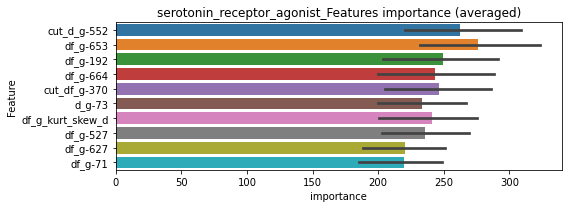

len(train_index) : 5185
len(valid_index) : 1729
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.00396717	valid_1's binary_logloss: 0.0394498


len(train_index) : 5185
len(valid_index) : 1729
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00353855	valid_1's binary_logloss: 0.0325697
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.00322006	valid_1's binary_logloss: 0.0321966


len(train_index) : 5186
len(valid_index) : 1728
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.003474	valid_1's binary_logloss: 0.0420405
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.00328194	valid_1's binary_logloss: 0.0416939


len(train_index) : 5186
len(valid_index) : 1728
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00430931	valid_1's binary_logloss: 0.0465744


serotonin_receptor_agonist logloss: 0.0399774892014657
serotonin_receptor_agonist is unpredictable(><)!


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 7510
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 7510


unpredictable_cols:serotonin_receptor_antagonist → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0970095	valid_1's binary_logloss: 0.194912
[600]	training's binary_logloss: 0.0448882	valid_1's binary_logloss: 0.160551
[900]	training's binary_logloss: 0.0271216	valid_1's binary_logloss: 0.149606
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.0214054	valid_1's binary_logloss: 0.147566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0969121	valid_1's binary_logloss: 0.201098
[600]	training's binary_logloss: 0.0449298	valid_1's binary_logloss: 0.166054
[900]	training's binary_logloss: 0.0273477	valid_1's binary_logloss: 0.156291
Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.020769	valid_1's binary_logloss: 0.153189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0966295	valid_1's binary_logloss: 0.207205
[600]	training's binary_logloss: 0.0449053	

1 / 3, AUC score:0.959, PR-AUC:0.922
y_Threshold: 0.0771055, Threshold: 0.1595718, pos_neg_ratio: 0.8000000
Remove_noisy_data: 623 → Positive_corect_labels: 1341/8389
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1595718, conf_0:0.11170, conf_1:0.20744
threshold: 0.1595718, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1341.0/8389, y_label_rate: 0.1598522
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0707048	valid_1's binary_logloss: 0.148804
[600]	training's binary_logloss: 0.0300464	valid_1's binary_logloss: 0.114833
[900]	training's binary_logloss: 0.0175513	valid_1's binary_logloss: 0.103413
[1200]	training's binary_logloss: 0.01203	valid_1's binary_logloss: 0.0985901
[1500]	training's binary_logloss: 0.00906169	valid_1's binary_logloss: 0.0961287
Early stopping, best iteration is:
[1763]	training's binary_logloss: 0.00740544	valid_1's binary_logloss: 0.0943551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.069436	valid_1's binary_logloss: 0.15005
[600]	training's binary_logloss: 0.0297593	valid_1's binary_logloss: 0.115909
[900]	training's binary_logloss: 0.0174322	valid_1's binary_logloss: 0.104443
[1200]	training's binary_logloss: 0.0119807	valid_1's binary_logloss: 0.0996905
Early stopping, best iteration is:
[1315]	training's bina

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0937807, Threshold: 0.1595718, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1269.0/8245
p_label_rate: 0.0155701 Vs.target_rate: 0.01696
Num_p_label: 62.0, Expected: 67.6, Threshold: 0.1595718, conf_0:0.12766, conf_1:0.19149
threshold: 0.1595718, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 1269.0/8245, y_label_rate: 0.1539115
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0617452	valid_1's binary_logloss: 0.128607
[600]	training's binary_logloss: 0.0262432	valid_1's binary_logloss: 0.0941537
[900]	training's binary_logloss: 0.0154653	valid_1's binary_logloss: 0.0820559
[1200]	training's binary_logloss: 0.0106456	valid_1's binary_logloss: 0.0761856
[1500]	training's binary_logloss: 0.00804754	valid_1's binary_logloss: 0.0733325
Early stopping, best iteration is:
[1732]	training's binary_logloss: 0.00674534	valid_1's binary_logloss: 0.0717976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0628134	valid_1's binary_logloss: 0.136442
[600]	training's binary_logloss: 0.0266467	valid_1's binary_logloss: 0.101535
[900]	training's binary_logloss: 0.0155664	valid_1's binary_logloss: 0.0897728
[1200]	training's binary_logloss: 0.0106929	valid_1's binary_logloss: 0.083813
[1500]	training's binary_logloss: 0.0080722	valid_1

3 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0919087, Threshold: 0.1595718, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1223.0/8153
p_label_rate: 0.0163235 Vs.target_rate: 0.01696
Num_p_label: 65.0, Expected: 67.6, Threshold: 0.1595718, conf_0:0.14361, conf_1:0.17553
threshold: 0.1595718, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 1223.0/8153, y_label_rate: 0.1500061


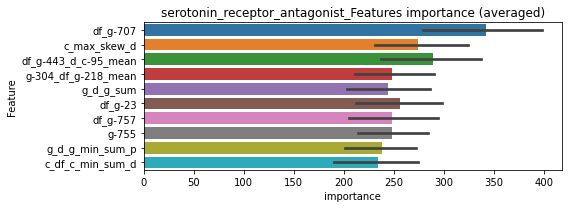

len(train_index) : 6114
len(valid_index) : 2039
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00535398	valid_1's binary_logloss: 0.0569935
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.00495764	valid_1's binary_logloss: 0.0563432


len(train_index) : 6115
len(valid_index) : 2038
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00521236	valid_1's binary_logloss: 0.0678188
Early stopping, best iteration is:
[1256]	training's binary_logloss: 0.00399986	valid_1's binary_logloss: 0.0652903


len(train_index) : 6115
len(valid_index) : 2038
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00520001	valid_1's binary_logloss: 0.0692738
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.00430342	valid_1's binary_logloss: 0.0677974


len(train_index) : 6115
len(valid_index) : 2038
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.0060718	valid_1's binary_logloss: 0.0703605


serotonin_receptor_antagonist logloss: 0.0649467714846784
serotonin_receptor_antagonist is unpredictable(><)!
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245421	valid_1's binary_logloss: 0.0179671
[600]	training's binary_logloss: 0.000508345	valid_1's binary_logloss: 0.0129796
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000482477	valid_1's binary_logloss: 0.0127933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242463	valid_1's binary_logloss: 0.0219449
[600]	training's binary_logloss: 0.000509652	valid_1's binary_logloss: 0.0169373
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000504318	valid_1's binary_logloss: 0.016898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025835	valid_1's binary_logloss: 0.0118353
[600]	training's binary_logloss: 0.000525957	valid_1's binary_logloss: 0.00678495
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000510682	valid_1's binary_loglos

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032812, Threshold: 0.0350547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0350547, conf_0:0.02454, conf_1:0.04557
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_1: 0.0650547
Num_p_label: 13.0, Expected: 7.4, Adj_threshold_2: 0.0950547
threshold: 0.0950547, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226389	valid_1's binary_logloss: 0.017408
[600]	training's binary_logloss: 0.000484513	valid_1's binary_logloss: 0.0126934
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000452315	valid_1's binary_logloss: 0.0125854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222654	valid_1's binary_logloss: 0.0226993
[600]	training's binary_logloss: 0.000488556	valid_1's binary_logloss: 0.0182498
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000501791	valid_1's binary_logloss: 0.0181875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239152	valid_1's binary_logloss: 0.011197
[600]	training's binary_logloss: 0.000503966	valid_1's binary_logloss: 0.00637304
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000479026	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0278598, Threshold: 0.0950547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0195881 Vs.target_rate: 0.00185
Num_p_label: 78.0, Expected: 7.4, Threshold: 0.0950547, conf_0:0.07604, conf_1:0.11407
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1250547
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1550547
Num_p_label: 51.0, Expected: 7.4, Adj_threshold_3: 0.1850547
Num_p_label: 45.0, Expected: 7.4, Adj_threshold_4: 0.2150547
Num_p_label: 43.0, Expected: 7.4, Adj_threshold_5: 0.2450547
Num_p_label: 39.0, Expected: 7.4, Adj_threshold_6: 0.2750547
Num_p_label: 35.0, Expected: 7.4, Adj_threshold_7: 0.3050547
Num_p_label: 32.0, Expected: 7.4, Adj_threshold_8: 0.3350547
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_9: 0.3650547
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_10: 0.3950547
threshold: 0.3950547, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_la

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217575	valid_1's binary_logloss: 0.0117831
[600]	training's binary_logloss: 0.000487042	valid_1's binary_logloss: 0.00755931
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000477546	valid_1's binary_logloss: 0.00749353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218591	valid_1's binary_logloss: 0.0169918
[600]	training's binary_logloss: 0.000481081	valid_1's binary_logloss: 0.0132651
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000471817	valid_1's binary_logloss: 0.0132585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230025	valid_1's binary_logloss: 0.0170326
[600]	training's binary_logloss: 0.000491611	valid_1's binary_logloss: 0.0121769
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000465128	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311988, Threshold: 0.3950547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3950547, conf_0:0.35555, conf_1:0.43456
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_1: 0.4250547
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_2: 0.4550547
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_3: 0.4850547
Num_p_label: 20.0, Expected: 7.4, Adj_threshold_4: 0.5150547
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5450547
threshold: 0.5450547, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


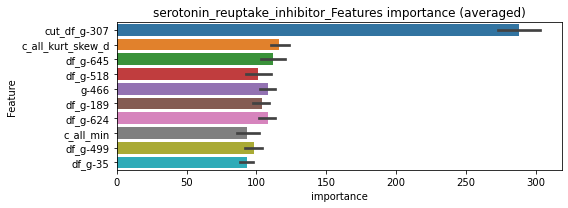

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00055444	valid_1's binary_logloss: 0.0105111


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000478542	valid_1's binary_logloss: 0.00774996


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000666487	valid_1's binary_logloss: 0.0161782


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000497993	valid_1's binary_logloss: 0.00942371


serotonin_reuptake_inhibitor logloss: 0.010965743703367597
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188546	valid_1's binary_logloss: 0.0112617
[600]	training's binary_logloss: 0.00042432	valid_1's binary_logloss: 0.00704192
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000410248	valid_1's binary_logloss: 0.00697391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173872	valid_1's binary_logloss: 0.0247806
[600]	training's binary_logloss: 0.000414169	valid_1's binary_logloss: 0.0200137
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000404654	valid_1's binary_logloss: 0.0199389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196459	valid_1's binary_logloss: 0.00645114
[600]	training's binary_logloss: 0.000428421	valid_1's binary_logloss: 0.00391932
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000419348	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023272, Threshold: 0.0283097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0283097, conf_0:0.01982, conf_1:0.03680
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.0583097
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0883097
threshold: 0.0883097, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171534	valid_1's binary_logloss: 0.00994521
[600]	training's binary_logloss: 0.000405655	valid_1's binary_logloss: 0.0058828
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000407486	valid_1's binary_logloss: 0.00587778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164601	valid_1's binary_logloss: 0.021776
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000409752	valid_1's binary_logloss: 0.0171204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177806	valid_1's binary_logloss: 0.00543919
[600]	training's binary_logloss: 0.000410532	valid_1's binary_logloss: 0.00342931
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000402081	valid_1's binary_logloss: 0.00340543
Training until validation scores don't improve for 30 rounds
[3

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0124293, Threshold: 0.0883097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0118031 Vs.target_rate: 0.00151
Num_p_label: 47.0, Expected: 6.0, Threshold: 0.0883097, conf_0:0.07065, conf_1:0.10597
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_1: 0.1183097
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_2: 0.1483097
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_3: 0.1783097
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_4: 0.2083097
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.2383097
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_6: 0.2683097
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_7: 0.2983097
threshold: 0.2983097, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171534	valid_1's binary_logloss: 0.00994521
[600]	training's binary_logloss: 0.000405655	valid_1's binary_logloss: 0.0058828
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000407486	valid_1's binary_logloss: 0.00587778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164601	valid_1's binary_logloss: 0.021776
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000409752	valid_1's binary_logloss: 0.0171204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177806	valid_1's binary_logloss: 0.00543919
[600]	training's binary_logloss: 0.000410532	valid_1's binary_logloss: 0.00342931
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000402081	valid_1's binary_logloss: 0.00340543
Training until validation scores don't improve for 30 rounds
[3

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0124293, Threshold: 0.2983097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2983097, conf_0:0.26848, conf_1:0.32814
threshold: 0.2983097, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


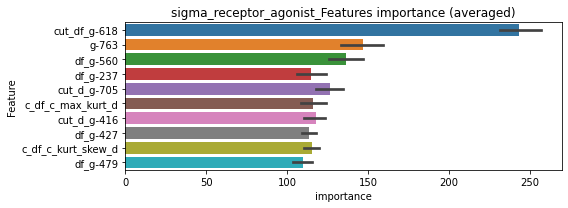

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000405353	valid_1's binary_logloss: 0.00401005


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000522137	valid_1's binary_logloss: 0.0152463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000397861	valid_1's binary_logloss: 0.00235625


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000395526	valid_1's binary_logloss: 0.00293067


sigma_receptor_agonist logloss: 0.006139183773788306
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228129	valid_1's binary_logloss: 0.014368
[600]	training's binary_logloss: 0.000464799	valid_1's binary_logloss: 0.00926878
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000489228	valid_1's binary_logloss: 0.009223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221412	valid_1's binary_logloss: 0.0133405
[600]	training's binary_logloss: 0.000463561	valid_1's binary_logloss: 0.00922965
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000473848	valid_1's binary_logloss: 0.00921164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225566	valid_1's binary_logloss: 0.00881823
[600]	training's binary_logloss: 0.000466664	valid_1's binary_logloss: 0.00468427
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000432535	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029944, Threshold: 0.0085381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0085381, conf_0:0.00598, conf_1:0.01110
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0385381
threshold: 0.0385381, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204317	valid_1's binary_logloss: 0.0146811
[600]	training's binary_logloss: 0.000447862	valid_1's binary_logloss: 0.0103912
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000418636	valid_1's binary_logloss: 0.0103615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209532	valid_1's binary_logloss: 0.0121517
[600]	training's binary_logloss: 0.000452876	valid_1's binary_logloss: 0.00864842
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00043591	valid_1's binary_logloss: 0.00860874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020764	valid_1's binary_logloss: 0.00816395
[600]	training's binary_logloss: 0.000446008	valid_1's binary_logloss: 0.00457284
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000415679	valid_1's binary_log

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0344678, Threshold: 0.0385381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0385381, conf_0:0.03083, conf_1:0.04625
threshold: 0.0385381, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204317	valid_1's binary_logloss: 0.0146811
[600]	training's binary_logloss: 0.000447862	valid_1's binary_logloss: 0.0103912
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000418636	valid_1's binary_logloss: 0.0103615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209532	valid_1's binary_logloss: 0.0121517
[600]	training's binary_logloss: 0.000452876	valid_1's binary_logloss: 0.00864842
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00043591	valid_1's binary_logloss: 0.00860874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020764	valid_1's binary_logloss: 0.00816395
[600]	training's binary_logloss: 0.000446008	valid_1's binary_logloss: 0.00457284
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000415679	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0344678, Threshold: 0.0385381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0385381, conf_0:0.03468, conf_1:0.04239
threshold: 0.0385381, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


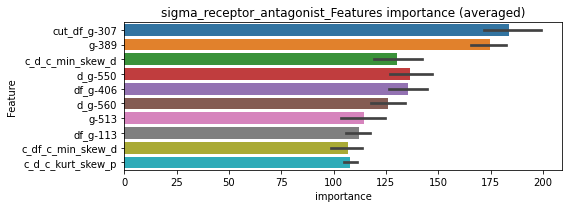

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000579696	valid_1's binary_logloss: 0.00805666


================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000503535	valid_1's binary_logloss: 0.00679817


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000524134	valid_1's binary_logloss: 0.00483924


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000430653	valid_1's binary_logloss: 0.00374411


sigma_receptor_antagonist logloss: 0.0058605285467085875
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132729	valid_1's binary_logloss: 0.00364575
[600]	training's binary_logloss: 0.000337882	valid_1's binary_logloss: 0.00156239
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000334837	valid_1's binary_logloss: 0.00155419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125583	valid_1's binary_logloss: 0.00839397
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000337544	valid_1's binary_logloss: 0.00593617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131007	valid_1's binary_logloss: 0.0022238
[600]	training's binary_logloss: 0.000335379	valid_1's binary_logloss: 0.000686604
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000330057	valid_1's binary_logloss: 0.00067804
Training until validation scores don't improve for 30 round

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018288, Threshold: 0.0053198, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0053198, conf_0:0.00372, conf_1:0.00692
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0353198
threshold: 0.0353198, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124679	valid_1's binary_logloss: 0.00285163
[600]	training's binary_logloss: 0.000326749	valid_1's binary_logloss: 0.00108726
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000324523	valid_1's binary_logloss: 0.00108355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119224	valid_1's binary_logloss: 0.00855356
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000338754	valid_1's binary_logloss: 0.00610348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124162	valid_1's binary_logloss: 0.00203931
[600]	training's binary_logloss: 0.000326034	valid_1's binary_logloss: 0.000642032
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000323243	valid_1's binary_logloss: 0.000637727
Training until validation scores don't improve for 30 rou

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226271, Threshold: 0.0353198, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0353198, conf_0:0.02826, conf_1:0.04238
threshold: 0.0353198, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124679	valid_1's binary_logloss: 0.00285163
[600]	training's binary_logloss: 0.000326749	valid_1's binary_logloss: 0.00108726
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000324523	valid_1's binary_logloss: 0.00108355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119224	valid_1's binary_logloss: 0.00855356
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000338754	valid_1's binary_logloss: 0.00610348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124162	valid_1's binary_logloss: 0.00203931
[600]	training's binary_logloss: 0.000326034	valid_1's binary_logloss: 0.000642032
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000323243	valid_1's binary_logloss: 0.000637727
Training until validation scores don't improve for 30 rou

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226271, Threshold: 0.0353198, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0353198, conf_0:0.03179, conf_1:0.03885
threshold: 0.0353198, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


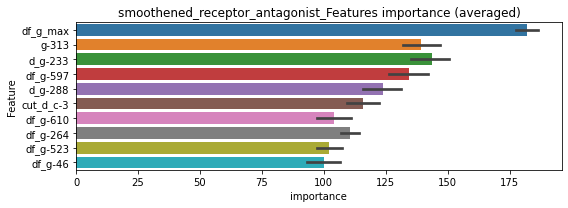

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000331273	valid_1's binary_logloss: 0.000878547


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000320643	valid_1's binary_logloss: 0.0041088


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000323881	valid_1's binary_logloss: 0.000665633
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000323881	valid_1's binary_logloss: 0.000665633


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000323919	valid_1's binary_logloss: 0.000868921
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000323919	valid_1's binary_logloss: 0.000868921


smoothened_receptor_antagonist logloss: 0.0016309289802269233


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


unpredictable_cols:sodium_channel_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0642208	valid_1's binary_logloss: 0.130071
[600]	training's binary_logloss: 0.0277254	valid_1's binary_logloss: 0.106892
[900]	training's binary_logloss: 0.016164	valid_1's binary_logloss: 0.10003
[1200]	training's binary_logloss: 0.0110986	valid_1's binary_logloss: 0.0969751
Early stopping, best iteration is:
[1308]	training's binary_logloss: 0.00995939	valid_1's binary_logloss: 0.0962859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0625216	valid_1's binary_logloss: 0.14307
[600]	training's binary_logloss: 0.0271016	valid_1's binary_logloss: 0.123938
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.018526	valid_1's binary_logloss: 0.119767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0633938	valid_1's binary_logloss: 0.130695
[600]	training's binary_logloss: 0.0276626	

1 / 3, AUC score:0.983, PR-AUC:0.963
y_Threshold: 0.0475006, Threshold: 0.0964934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 451 → Positive_corect_labels: 1284/7781
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0964934, conf_0:0.06755, conf_1:0.12544
threshold: 0.0964934, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1284.0/7781, y_label_rate: 0.1650173
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0487905	valid_1's binary_logloss: 0.110052
[600]	training's binary_logloss: 0.0207475	valid_1's binary_logloss: 0.0876915
[900]	training's binary_logloss: 0.0122896	valid_1's binary_logloss: 0.0811995
[1200]	training's binary_logloss: 0.00849293	valid_1's binary_logloss: 0.0784615
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.00874024	valid_1's binary_logloss: 0.0782191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0485076	valid_1's binary_logloss: 0.107262
[600]	training's binary_logloss: 0.0208454	valid_1's binary_logloss: 0.0850023
[900]	training's binary_logloss: 0.0123213	valid_1's binary_logloss: 0.0789301
[1200]	training's binary_logloss: 0.00855784	valid_1's binary_logloss: 0.0754669
Early stopping, best iteration is:
[1301]	training's binary_logloss: 0.00774246	valid_1's binary_logloss: 0.0747935
Training unt

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0619124, Threshold: 0.0964934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 1229.0/7671
p_label_rate: 0.0138122 Vs.target_rate: 0.01121
Num_p_label: 55.0, Expected: 44.6, Threshold: 0.0964934, conf_0:0.07719, conf_1:0.11579
threshold: 0.0964934, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1229.0/7671, y_label_rate: 0.1602138
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0411021	valid_1's binary_logloss: 0.0862348
[600]	training's binary_logloss: 0.017356	valid_1's binary_logloss: 0.0662146
[900]	training's binary_logloss: 0.0103033	valid_1's binary_logloss: 0.060078
[1200]	training's binary_logloss: 0.00720431	valid_1's binary_logloss: 0.0573169
Early stopping, best iteration is:
[1384]	training's binary_logloss: 0.00603434	valid_1's binary_logloss: 0.0559619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0422904	valid_1's binary_logloss: 0.0793301
[600]	training's binary_logloss: 0.0178328	valid_1's binary_logloss: 0.0597555
[900]	training's binary_logloss: 0.0106087	valid_1's binary_logloss: 0.0547123
[1200]	training's binary_logloss: 0.00739157	valid_1's binary_logloss: 0.0520745
[1500]	training's binary_logloss: 0.00561733	valid_1's binary_logloss: 0.0508856
Early stopping, best iteration is:
[1540]	train

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0530967, Threshold: 0.0964934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1198.0/7609
p_label_rate: 0.0120542 Vs.target_rate: 0.01121
Num_p_label: 48.0, Expected: 44.6, Threshold: 0.0964934, conf_0:0.08684, conf_1:0.10614
threshold: 0.0964934, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1198.0/7609, y_label_rate: 0.1574451


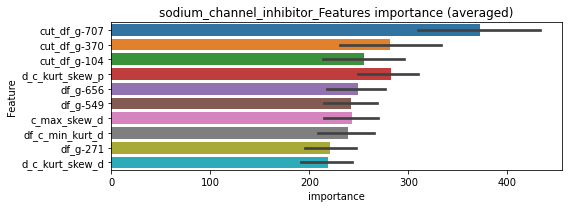

len(train_index) : 5706
len(valid_index) : 1903
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.00402619	valid_1's binary_logloss: 0.0511952


len(train_index) : 5707
len(valid_index) : 1902
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00444257	valid_1's binary_logloss: 0.050272


len(train_index) : 5707
len(valid_index) : 1902
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0036951	valid_1's binary_logloss: 0.0337877
Early stopping, best iteration is:
[1530]	training's binary_logloss: 0.00231977	valid_1's binary_logloss: 0.0319101


len(train_index) : 5707
len(valid_index) : 1902
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00368799	valid_1's binary_logloss: 0.0299913
Early stopping, best iteration is:
[1645]	training's binary_logloss: 0.00214686	valid_1's binary_logloss: 0.0275448


sodium_channel_inhibitor logloss: 0.04023198137591483
sodium_channel_inhibitor is unpredictable(><)!
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174194	valid_1's binary_logloss: 0.00722181
[600]	training's binary_logloss: 0.000400388	valid_1's binary_logloss: 0.00474498
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000415153	valid_1's binary_logloss: 0.0047319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170285	valid_1's binary_logloss: 0.0093885
[600]	training's binary_logloss: 0.000394469	valid_1's binary_logloss: 0.00554319
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00039289	valid_1's binary_logloss: 0.00553416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181698	valid_1's binary_logloss: 0.00799444
[600]	training's binary_logloss: 0.000402669	valid_1's binary_logloss: 0.0049157
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0004036	valid_1's binary_log

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024586, Threshold: 0.0063225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0063225, conf_0:0.00443, conf_1:0.00822
Num_p_label: 5.0, Expected: 5.4, Adj_threshold_1: 0.0363225
threshold: 0.0363225, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016706	valid_1's binary_logloss: 0.00755956
[600]	training's binary_logloss: 0.000388355	valid_1's binary_logloss: 0.00507577
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000391552	valid_1's binary_logloss: 0.00505628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165093	valid_1's binary_logloss: 0.00840509
[600]	training's binary_logloss: 0.000385281	valid_1's binary_logloss: 0.00479004
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000396655	valid_1's binary_logloss: 0.00477109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168934	valid_1's binary_logloss: 0.00778811
[600]	training's binary_logloss: 0.000392276	valid_1's binary_logloss: 0.00518165
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000387327	valid_1's binar

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0221856, Threshold: 0.0363225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, Expected: 5.4, Threshold: 0.0363225, conf_0:0.02906, conf_1:0.04359
threshold: 0.0363225, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016706	valid_1's binary_logloss: 0.00755956
[600]	training's binary_logloss: 0.000388355	valid_1's binary_logloss: 0.00507577
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000391552	valid_1's binary_logloss: 0.00505628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165093	valid_1's binary_logloss: 0.00840509
[600]	training's binary_logloss: 0.000385281	valid_1's binary_logloss: 0.00479004
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000396655	valid_1's binary_logloss: 0.00477109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168934	valid_1's binary_logloss: 0.00778811
[600]	training's binary_logloss: 0.000392276	valid_1's binary_logloss: 0.00518165
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000387327	valid_1's binar

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0221856, Threshold: 0.0363225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, Expected: 5.4, Threshold: 0.0363225, conf_0:0.03269, conf_1:0.03995
threshold: 0.0363225, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


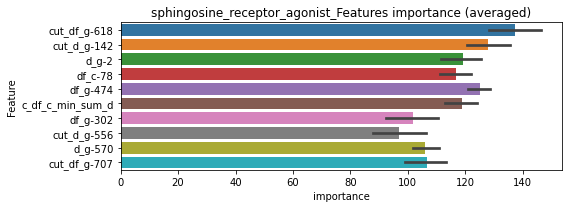

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000406468	valid_1's binary_logloss: 0.00427192


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.00038229	valid_1's binary_logloss: 0.00455635


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000402624	valid_1's binary_logloss: 0.0045074


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000384555	valid_1's binary_logloss: 0.00196678


sphingosine_receptor_agonist logloss: 0.0038259465268073705
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420763	valid_1's binary_logloss: 0.0600689
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000917196	valid_1's binary_logloss: 0.0538077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439002	valid_1's binary_logloss: 0.043008
[600]	training's binary_logloss: 0.00079639	valid_1's binary_logloss: 0.0357881
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000658873	valid_1's binary_logloss: 0.0353893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494531	valid_1's binary_logloss: 0.0136213
[600]	training's binary_logloss: 0.000865725	valid_1's binary_logloss: 0.00503474
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000616232	valid_1's binary_logloss: 0.00417663
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0055368, Threshold: 0.0359383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0359383, conf_0:0.02516, conf_1:0.04672
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_1: 0.0659383
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_2: 0.0959383
threshold: 0.0959383, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401276	valid_1's binary_logloss: 0.0224706
[600]	training's binary_logloss: 0.00075813	valid_1's binary_logloss: 0.0146852
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000580897	valid_1's binary_logloss: 0.014127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397415	valid_1's binary_logloss: 0.0307282
[600]	training's binary_logloss: 0.000752452	valid_1's binary_logloss: 0.0201398
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000567823	valid_1's binary_logloss: 0.0195131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391866	valid_1's binary_logloss: 0.0466553
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00108544	valid_1's binary_logloss: 0.0407245
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0217263, Threshold: 0.0959383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0085384 Vs.target_rate: 0.00298
Num_p_label: 34.0, Expected: 11.9, Threshold: 0.0959383, conf_0:0.07675, conf_1:0.11513
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_1: 0.1259383
Num_p_label: 24.0, Expected: 11.9, Adj_threshold_2: 0.1559383
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_3: 0.1859383
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_4: 0.2159383
threshold: 0.2159383, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3789, y_label_rate: 0.1707575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397256	valid_1's binary_logloss: 0.0334697
[600]	training's binary_logloss: 0.000750254	valid_1's binary_logloss: 0.0248508
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000599841	valid_1's binary_logloss: 0.0244381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038066	valid_1's binary_logloss: 0.0388769
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00112535	valid_1's binary_logloss: 0.0319499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387901	valid_1's binary_logloss: 0.0261639
[600]	training's binary_logloss: 0.000740969	valid_1's binary_logloss: 0.015538
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000562371	valid_1's binary_logloss: 0.0150403
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0370965, Threshold: 0.2159383, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3787
p_label_rate: 0.0045203 Vs.target_rate: 0.00298
Num_p_label: 18.0, Expected: 11.9, Threshold: 0.2159383, conf_0:0.19434, conf_1:0.23753
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_1: 0.2459383
threshold: 0.2459383, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3787, y_label_rate: 0.1705836


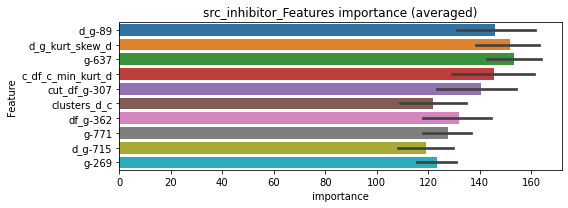

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000693604	valid_1's binary_logloss: 0.0215646


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.0007801	valid_1's binary_logloss: 0.0248505


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000572826	valid_1's binary_logloss: 0.00670381
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000569245	valid_1's binary_logloss: 0.00669255


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000713651	valid_1's binary_logloss: 0.0183976


src_inhibitor logloss: 0.01787616090093718
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585855	valid_1's binary_logloss: 0.0476229
[600]	training's binary_logloss: 0.000963878	valid_1's binary_logloss: 0.035706
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000931273	valid_1's binary_logloss: 0.0356393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00587198	valid_1's binary_logloss: 0.0426439
[600]	training's binary_logloss: 0.000964692	valid_1's binary_logloss: 0.0324283
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000842584	valid_1's binary_logloss: 0.0322196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00596294	valid_1's binary_logloss: 0.0405115
[600]	training's binary_logloss: 0.000994259	valid_1's binary_logloss: 0.0323547
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000729281	valid_1's binary_loglos

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0087172, Threshold: 0.2681301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2681301, conf_0:0.18769, conf_1:0.34857
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2981301
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_2: 0.3281301
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_3: 0.3581301
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_4: 0.3881301
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_5: 0.4181301
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_6: 0.4481301
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4781301
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.5081301
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_9: 0.5381301
threshold: 0.5381301, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535428	valid_1's binary_logloss: 0.0369882
[600]	training's binary_logloss: 0.000926824	valid_1's binary_logloss: 0.0258814
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000757589	valid_1's binary_logloss: 0.0253757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0050534	valid_1's binary_logloss: 0.0407079
[600]	training's binary_logloss: 0.000894565	valid_1's binary_logloss: 0.0320193
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000856267	valid_1's binary_logloss: 0.0318923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519497	valid_1's binary_logloss: 0.0389254
[600]	training's binary_logloss: 0.000896264	valid_1's binary_logloss: 0.0293686
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000723943	valid_1's binary_loglos

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0355460, Threshold: 0.5381301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0123054 Vs.target_rate: 0.00332
Num_p_label: 49.0, Expected: 13.2, Threshold: 0.5381301, conf_0:0.43050, conf_1:0.64576
Num_p_label: 46.0, Expected: 13.2, Adj_threshold_1: 0.5681301
Num_p_label: 42.0, Expected: 13.2, Adj_threshold_2: 0.5981301
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_3: 0.6281301
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_4: 0.6581301
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_5: 0.6881301
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_6: 0.7181301
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_7: 0.7481301
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.7781301
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_9: 0.8081301
threshold: 0.8081301, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3786, y_label_rate: 0.1706286
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491387	valid_1's binary_logloss: 0.0404189
[600]	training's binary_logloss: 0.00087384	valid_1's binary_logloss: 0.0305222
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000645641	valid_1's binary_logloss: 0.0297884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467549	valid_1's binary_logloss: 0.044695
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00124412	valid_1's binary_logloss: 0.0381086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488749	valid_1's binary_logloss: 0.029146
[600]	training's binary_logloss: 0.000873332	valid_1's binary_logloss: 0.0183826
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000588932	valid_1's binary_logloss: 0.017608
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420722, Threshold: 0.8081301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3776
p_label_rate: 0.0047715 Vs.target_rate: 0.00332
Num_p_label: 19.0, Expected: 13.2, Threshold: 0.8081301, conf_0:0.72732, conf_1:0.88894
threshold: 0.8081301, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 641.0/3776, y_label_rate: 0.1697564


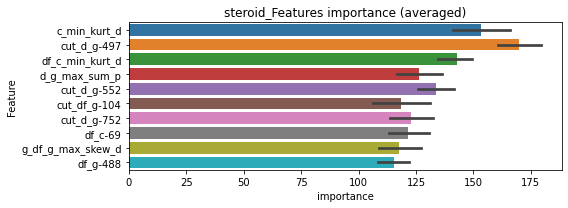

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 steroid=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00147106	valid_1's binary_logloss: 0.0249294
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00118108	valid_1's binary_logloss: 0.0218392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.0007172	valid_1's binary_logloss: 0.0174337


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000642973	valid_1's binary_logloss: 0.0115162


steroid logloss: 0.01892960954648865
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104001	valid_1's binary_logloss: 0.00288969
[600]	training's binary_logloss: 0.000305478	valid_1's binary_logloss: 0.00145961
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000305478	valid_1's binary_logloss: 0.00145961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102648	valid_1's binary_logloss: 0.00212491
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000311812	valid_1's binary_logloss: 0.000851421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106207	valid_1's binary_logloss: 0.00188806
[600]	training's binary_logloss: 0.000306633	valid_1's binary_logloss: 0.000700369
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000306633	valid_1's binary_logloss: 0.000700369
Training until validation scores don't improve for 30 ro

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015407, Threshold: 0.0047317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0047317, conf_0:0.00331, conf_1:0.00615
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0347317


[600]	training's binary_logloss: 0.000302379	valid_1's binary_logloss: 0.0011352
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000304526	valid_1's binary_logloss: 0.00113487


threshold: 0.0347317, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974826	valid_1's binary_logloss: 0.00240807
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00029961	valid_1's binary_logloss: 0.00126692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000980094	valid_1's binary_logloss: 0.00187598
[600]	training's binary_logloss: 0.000297082	valid_1's binary_logloss: 0.000718645
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297082	valid_1's binary_logloss: 0.000718645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100097	valid_1's binary_logloss: 0.00172859
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000302936	valid_1's binary_logloss: 0.00065489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000980482	valid_1's binary_logloss: 0.0023

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1483595, Threshold: 0.0347317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.0347317, conf_0:0.02779, conf_1:0.04168
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_1: 0.0647317


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309114	valid_1's binary_logloss: 0.000889284


threshold: 0.0647317, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974826	valid_1's binary_logloss: 0.00240807
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00029961	valid_1's binary_logloss: 0.00126692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000980094	valid_1's binary_logloss: 0.00187598
[600]	training's binary_logloss: 0.000297082	valid_1's binary_logloss: 0.000718645
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297082	valid_1's binary_logloss: 0.000718645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100097	valid_1's binary_logloss: 0.00172859
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000302936	valid_1's binary_logloss: 0.00065489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000980482	valid_1's binary_logloss: 0.0023

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1483595, Threshold: 0.0647317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0647317, conf_0:0.05826, conf_1:0.07120


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309114	valid_1's binary_logloss: 0.000889284


threshold: 0.0647317, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


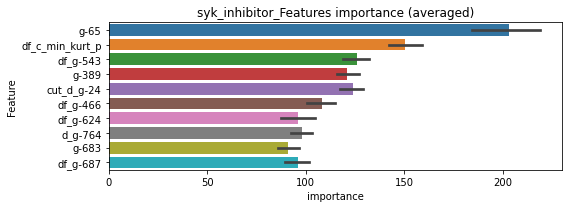

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000301594	valid_1's binary_logloss: 0.00150418


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000298644	valid_1's binary_logloss: 0.000681566
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000298644	valid_1's binary_logloss: 0.000681566


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000308804	valid_1's binary_logloss: 0.000554184


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000306179	valid_1's binary_logloss: 0.000819642


syk_inhibitor logloss: 0.0008901887879762993
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363143	valid_1's binary_logloss: 0.0377923
[600]	training's binary_logloss: 0.00068192	valid_1's binary_logloss: 0.0305529
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000615769	valid_1's binary_logloss: 0.0303033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399119	valid_1's binary_logloss: 0.0219605
[600]	training's binary_logloss: 0.000727114	valid_1's binary_logloss: 0.0128279
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000553681	valid_1's binary_logloss: 0.0120068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041357	valid_1's binary_logloss: 0.014589
[600]	training's binary_logloss: 0.000742645	valid_1's binary_logloss: 0.00726345
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000562512	valid_1's binary_logloss

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0046939, Threshold: 0.0119886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0119886, conf_0:0.00839, conf_1:0.01559
Num_p_label: 4.0, Expected: 10.0, Adj_threshold_1: 0.0419886
threshold: 0.0419886, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365389	valid_1's binary_logloss: 0.036962
[600]	training's binary_logloss: 0.000673785	valid_1's binary_logloss: 0.0286971
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000621556	valid_1's binary_logloss: 0.0286183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374204	valid_1's binary_logloss: 0.0215942
[600]	training's binary_logloss: 0.000709145	valid_1's binary_logloss: 0.0128973
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000560205	valid_1's binary_logloss: 0.0124922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393555	valid_1's binary_logloss: 0.013644
[600]	training's binary_logloss: 0.000729893	valid_1's binary_logloss: 0.00673377
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000569243	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259141, Threshold: 0.0419886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0025113 Vs.target_rate: 0.00252
Num_p_label: 10.0, Expected: 10.0, Threshold: 0.0419886, conf_0:0.03359, conf_1:0.05039
threshold: 0.0419886, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366649	valid_1's binary_logloss: 0.0175712
[600]	training's binary_logloss: 0.000686834	valid_1's binary_logloss: 0.010133
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000543666	valid_1's binary_logloss: 0.00969594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003729	valid_1's binary_logloss: 0.0241144
[600]	training's binary_logloss: 0.000688517	valid_1's binary_logloss: 0.0160291
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000569587	valid_1's binary_logloss: 0.015635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384901	valid_1's binary_logloss: 0.0210338
[600]	training's binary_logloss: 0.000700802	valid_1's binary_logloss: 0.0134443
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000557706	valid_1's binary_logloss:

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0277474, Threshold: 0.0419886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0419886, conf_0:0.03779, conf_1:0.04619
threshold: 0.0419886, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


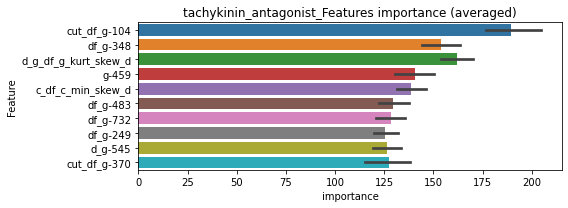

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000573414	valid_1's binary_logloss: 0.00892279


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000601321	valid_1's binary_logloss: 0.0116355


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000707459	valid_1's binary_logloss: 0.0268863


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000672471	valid_1's binary_logloss: 0.0104843


tachykinin_antagonist logloss: 0.0144832806576685
tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197464	valid_1's binary_logloss: 0.00710983
[600]	training's binary_logloss: 0.000425238	valid_1's binary_logloss: 0.00278553
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000403183	valid_1's binary_logloss: 0.00272181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196751	valid_1's binary_logloss: 0.00634506
[600]	training's binary_logloss: 0.00042722	valid_1's binary_logloss: 0.00266824
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000400827	valid_1's binary_logloss: 0.00260501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197966	valid_1's binary_logloss: 0.00395555
[600]	training's binary_logloss: 0.00043576	valid_1's binary_logloss: 0.0011605
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000403566	valid_1's binary_

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026539, Threshold: 0.0076442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0076442, conf_0:0.00535, conf_1:0.00994
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0376442
threshold: 0.0376442, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183514	valid_1's binary_logloss: 0.00648
[600]	training's binary_logloss: 0.000414517	valid_1's binary_logloss: 0.00261949
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000386165	valid_1's binary_logloss: 0.00254107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172342	valid_1's binary_logloss: 0.00556897
[600]	training's binary_logloss: 0.000410379	valid_1's binary_logloss: 0.00237685
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000385891	valid_1's binary_logloss: 0.00233029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177615	valid_1's binary_logloss: 0.00361035
[600]	training's binary_logloss: 0.000417445	valid_1's binary_logloss: 0.00108077
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000394667	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0614792, Threshold: 0.0376442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, Expected: 5.0, Threshold: 0.0376442, conf_0:0.03012, conf_1:0.04517
threshold: 0.0376442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183514	valid_1's binary_logloss: 0.00648
[600]	training's binary_logloss: 0.000414517	valid_1's binary_logloss: 0.00261949
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000386165	valid_1's binary_logloss: 0.00254107
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172342	valid_1's binary_logloss: 0.00556897
[600]	training's binary_logloss: 0.000410379	valid_1's binary_logloss: 0.00237685
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000385891	valid_1's binary_logloss: 0.00233029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177615	valid_1's binary_logloss: 0.00361035
[600]	training's binary_logloss: 0.000417445	valid_1's binary_logloss: 0.00108077
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000394667	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0614792, Threshold: 0.0376442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, Expected: 5.0, Threshold: 0.0376442, conf_0:0.03388, conf_1:0.04141
threshold: 0.0376442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


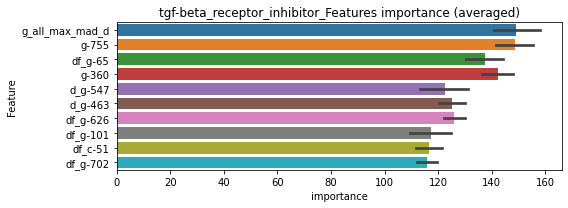

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.00040404	valid_1's binary_logloss: 0.00290949


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000404092	valid_1's binary_logloss: 0.00262532


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000395537	valid_1's binary_logloss: 0.0010154
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000395537	valid_1's binary_logloss: 0.0010154


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000403466	valid_1's binary_logloss: 0.00284336


tgf-beta_receptor_inhibitor logloss: 0.0023482616213395236
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000940076	valid_1's binary_logloss: 0.00344229
[600]	training's binary_logloss: 0.000295135	valid_1's binary_logloss: 0.00184968
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000295907	valid_1's binary_logloss: 0.00184803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947947	valid_1's binary_logloss: 0.00440745
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000302805	valid_1's binary_logloss: 0.00246101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000983692	valid_1's binary_logloss: 0.00170351
[600]	training's binary_logloss: 0.000305065	valid_1's binary_logloss: 0.000616109
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000305223	valid_1's binary_logloss: 0.000616013
Training until validation scores don't improve for 30 

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019984, Threshold: 0.0068550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0068550, conf_0:0.00480, conf_1:0.00891
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0368550


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000313879	valid_1's binary_logloss: 0.00137557


threshold: 0.0368550, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891624	valid_1's binary_logloss: 0.00341021
[600]	training's binary_logloss: 0.000288876	valid_1's binary_logloss: 0.00215098
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000288917	valid_1's binary_logloss: 0.00215022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000870129	valid_1's binary_logloss: 0.00474158
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000300503	valid_1's binary_logloss: 0.00312931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891178	valid_1's binary_logloss: 0.00149156
[600]	training's binary_logloss: 0.000294566	valid_1's binary_logloss: 0.000545476
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000294566	valid_1's binary_logloss: 0.000545476
Training until validation scores don't improve for 30 

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637829, Threshold: 0.0368550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00080
Num_p_label: 23.0, Expected: 3.2, Threshold: 0.0368550, conf_0:0.02948, conf_1:0.04423
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0668550
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0968550


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000297423	valid_1's binary_logloss: 0.00135084


threshold: 0.0968550, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891624	valid_1's binary_logloss: 0.00341021
[600]	training's binary_logloss: 0.000288876	valid_1's binary_logloss: 0.00215098
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000288917	valid_1's binary_logloss: 0.00215022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000870129	valid_1's binary_logloss: 0.00474158
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000300503	valid_1's binary_logloss: 0.00312931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891178	valid_1's binary_logloss: 0.00149156
[600]	training's binary_logloss: 0.000294566	valid_1's binary_logloss: 0.000545476
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000294566	valid_1's binary_logloss: 0.000545476
Training until validation scores don't improve for 30 

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637829, Threshold: 0.0968550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0968550, conf_0:0.08717, conf_1:0.10654
threshold: 0.0968550, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


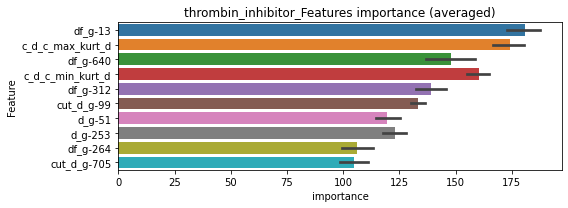

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000295298	valid_1's binary_logloss: 0.00282534


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000289517	valid_1's binary_logloss: 0.00141889
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000289517	valid_1's binary_logloss: 0.00141889


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000295482	valid_1's binary_logloss: 0.000522523


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000295486	valid_1's binary_logloss: 0.000989672


thrombin_inhibitor logloss: 0.0014394688423908031
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249922	valid_1's binary_logloss: 0.0129023
[600]	training's binary_logloss: 0.000487527	valid_1's binary_logloss: 0.0079044
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000454988	valid_1's binary_logloss: 0.00780777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237932	valid_1's binary_logloss: 0.014734
[600]	training's binary_logloss: 0.000478331	valid_1's binary_logloss: 0.00871491
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000457589	valid_1's binary_logloss: 0.00868866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255726	valid_1's binary_logloss: 0.00584416
[600]	training's binary_logloss: 0.000499296	valid_1's binary_logloss: 0.0018898
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000454626	valid_1's binary_lo

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029610, Threshold: 0.0130963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130963, conf_0:0.00917, conf_1:0.01703
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430963
threshold: 0.0430963, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228731	valid_1's binary_logloss: 0.012635
[600]	training's binary_logloss: 0.000472132	valid_1's binary_logloss: 0.00779575
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000481775	valid_1's binary_logloss: 0.00776282
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216247	valid_1's binary_logloss: 0.0152676
[600]	training's binary_logloss: 0.000463122	valid_1's binary_logloss: 0.0104126
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00048684	valid_1's binary_logloss: 0.0104109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236806	valid_1's binary_logloss: 0.00579107
[600]	training's binary_logloss: 0.000479184	valid_1's binary_logloss: 0.00216467
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000449234	valid_1's binary_log

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0368069, Threshold: 0.0430963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0082873 Vs.target_rate: 0.00155
Num_p_label: 33.0, Expected: 6.2, Threshold: 0.0430963, conf_0:0.03448, conf_1:0.05172
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730963
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.1030963
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330963
threshold: 0.1330963, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220478	valid_1's binary_logloss: 0.0110382
[600]	training's binary_logloss: 0.000463447	valid_1's binary_logloss: 0.00611865
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000453471	valid_1's binary_logloss: 0.00608706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231111	valid_1's binary_logloss: 0.00615197
[600]	training's binary_logloss: 0.000475974	valid_1's binary_logloss: 0.00220761
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000446263	valid_1's binary_logloss: 0.00216655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247139	valid_1's binary_logloss: 0.00491909
[600]	training's binary_logloss: 0.000483851	valid_1's binary_logloss: 0.00125932
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000445424	valid_1's binar

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509195, Threshold: 0.1330963, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, Expected: 6.2, Threshold: 0.1330963, conf_0:0.11979, conf_1:0.14641
threshold: 0.1330963, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


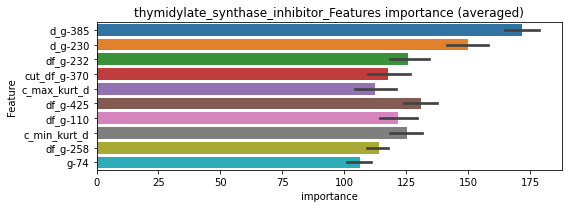

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000447765	valid_1's binary_logloss: 0.0056682


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.00044485	valid_1's binary_logloss: 0.00298115


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000453413	valid_1's binary_logloss: 0.00116567


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000435942	valid_1's binary_logloss: 0.0041708


thymidylate_synthase_inhibitor logloss: 0.003497239975708776
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156978	valid_1's binary_logloss: 0.00825308
[600]	training's binary_logloss: 0.000380879	valid_1's binary_logloss: 0.00568272
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000376904	valid_1's binary_logloss: 0.0056575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156986	valid_1's binary_logloss: 0.011323
[600]	training's binary_logloss: 0.000377162	valid_1's binary_logloss: 0.00845318
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000376268	valid_1's binary_logloss: 0.00844536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158195	valid_1's binary_logloss: 0.00391576
[600]	training's binary_logloss: 0.000384843	valid_1's binary_logloss: 0.00160526
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000381339	valid_1's binary_

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024142, Threshold: 0.0107792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0107792, conf_0:0.00755, conf_1:0.01401
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0407792
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0707792
threshold: 0.0707792, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149722	valid_1's binary_logloss: 0.00765681
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000381906	valid_1's binary_logloss: 0.00505349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145875	valid_1's binary_logloss: 0.0132368
[600]	training's binary_logloss: 0.000361286	valid_1's binary_logloss: 0.0104181
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000357577	valid_1's binary_logloss: 0.0103979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150232	valid_1's binary_logloss: 0.00325126
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000378653	valid_1's binary_logloss: 0.00132551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148088	valid_1's binary_logloss: 0.00426551
[6

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153599, Threshold: 0.0707792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0707792, conf_0:0.05662, conf_1:0.08494
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.1007792
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.1307792
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.1607792
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_4: 0.1907792
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_5: 0.2207792
threshold: 0.2207792, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141077	valid_1's binary_logloss: 0.00863454
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000523425	valid_1's binary_logloss: 0.0065759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150114	valid_1's binary_logloss: 0.00368736
[600]	training's binary_logloss: 0.000364888	valid_1's binary_logloss: 0.00134912
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000358374	valid_1's binary_logloss: 0.00134205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152135	valid_1's binary_logloss: 0.00382689
[600]	training's binary_logloss: 0.00036456	valid_1's binary_logloss: 0.00147565
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000363105	valid_1's binary_logloss: 0.00147327
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269860, Threshold: 0.2207792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.2207792, conf_0:0.19870, conf_1:0.24286
threshold: 0.2207792, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


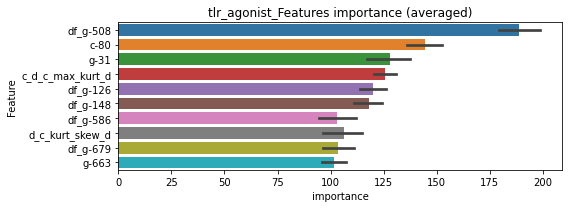

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000380848	valid_1's binary_logloss: 0.00612659


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000365908	valid_1's binary_logloss: 0.00107093


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000366576	valid_1's binary_logloss: 0.00125573


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000378889	valid_1's binary_logloss: 0.00780239


tlr_agonist logloss: 0.004063672985216968
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409483	valid_1's binary_logloss: 0.000552504
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000191871	valid_1's binary_logloss: 0.000269056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000407645	valid_1's binary_logloss: 0.00177221
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000191904	valid_1's binary_logloss: 0.00123755
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413542	valid_1's binary_logloss: 0.000512795
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000192669	valid_1's binary_logloss: 0.000248007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000414294	valid_1's binary_logloss: 0.000491032


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005696, Threshold: 0.0011637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0011637, conf_0:0.00081, conf_1:0.00151
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0311637
threshold: 0.0311637, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00019122	valid_1's binary_logloss: 0.000235205


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396787	valid_1's binary_logloss: 0.00065435
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00018953	valid_1's binary_logloss: 0.000358565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397893	valid_1's binary_logloss: 0.0012136
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000187624	valid_1's binary_logloss: 0.000771573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395703	valid_1's binary_logloss: 0.000461419
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000190013	valid_1's binary_logloss: 0.000223508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000401923	valid_1's binary_logloss: 0.000463477


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1164823, Threshold: 0.0311637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, Expected: 1.2, Threshold: 0.0311637, conf_0:0.02493, conf_1:0.03740
threshold: 0.0311637, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000190377	valid_1's binary_logloss: 0.000227763


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396787	valid_1's binary_logloss: 0.00065435
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00018953	valid_1's binary_logloss: 0.000358565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397893	valid_1's binary_logloss: 0.0012136
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000187624	valid_1's binary_logloss: 0.000771573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395703	valid_1's binary_logloss: 0.000461419
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000190013	valid_1's binary_logloss: 0.000223508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000401923	valid_1's binary_logloss: 0.000463477


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1164823, Threshold: 0.0311637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, Expected: 1.2, Threshold: 0.0311637, conf_0:0.02805, conf_1:0.03428
threshold: 0.0311637, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000190377	valid_1's binary_logloss: 0.000227763


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


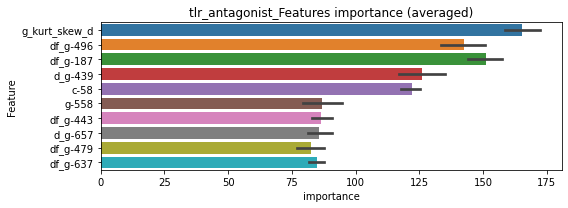

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000186711	valid_1's binary_logloss: 0.000253052
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000186711	valid_1's binary_logloss: 0.000253052


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185378	valid_1's binary_logloss: 0.000384611
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000185349	valid_1's binary_logloss: 0.000384572


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00018545	valid_1's binary_logloss: 0.00023782
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.00018545	valid_1's binary_logloss: 0.00023782


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185689	valid_1's binary_logloss: 0.000228697
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000185355	valid_1's binary_logloss: 0.000228317


tlr_antagonist logloss: 0.0002759342211805464
tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229094	valid_1's binary_logloss: 0.0143849
[600]	training's binary_logloss: 0.000470718	valid_1's binary_logloss: 0.00956007
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000457369	valid_1's binary_logloss: 0.00953044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220063	valid_1's binary_logloss: 0.0152791
[600]	training's binary_logloss: 0.000460363	valid_1's binary_logloss: 0.00979044
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000465319	valid_1's binary_logloss: 0.00976903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022277	valid_1's binary_logloss: 0.00884928
[600]	training's binary_logloss: 0.00047343	valid_1's binary_logloss: 0.00469803
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000450843	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037255, Threshold: 0.0217859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0217859, conf_0:0.01525, conf_1:0.02832
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0517859
threshold: 0.0517859, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198499	valid_1's binary_logloss: 0.0132445
[600]	training's binary_logloss: 0.000451445	valid_1's binary_logloss: 0.00874853
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000449193	valid_1's binary_logloss: 0.00872189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205896	valid_1's binary_logloss: 0.0147245
[600]	training's binary_logloss: 0.000446352	valid_1's binary_logloss: 0.0097139
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000453585	valid_1's binary_logloss: 0.00969334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206362	valid_1's binary_logloss: 0.00703293
[600]	training's binary_logloss: 0.000456228	valid_1's binary_logloss: 0.00345055
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000430925	valid_1's binary_

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0384642, Threshold: 0.0517859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0517859, conf_0:0.04143, conf_1:0.06214
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.0817859
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.1117859
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_3: 0.1417859
threshold: 0.1417859, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198499	valid_1's binary_logloss: 0.0132445
[600]	training's binary_logloss: 0.000451445	valid_1's binary_logloss: 0.00874853
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000449193	valid_1's binary_logloss: 0.00872189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205896	valid_1's binary_logloss: 0.0147245
[600]	training's binary_logloss: 0.000446352	valid_1's binary_logloss: 0.0097139
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000453585	valid_1's binary_logloss: 0.00969334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206362	valid_1's binary_logloss: 0.00703293
[600]	training's binary_logloss: 0.000456228	valid_1's binary_logloss: 0.00345055
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000430925	valid_1's binary_

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0384642, Threshold: 0.1417859, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00052636	valid_1's binary_logloss: 0.00888557


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.1417859, conf_0:0.12761, conf_1:0.15596
threshold: 0.1417859, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


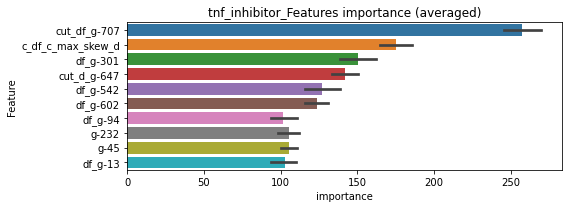

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000448797	valid_1's binary_logloss: 0.00722257


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000502923	valid_1's binary_logloss: 0.00736276


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00045907	valid_1's binary_logloss: 0.00301475


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000473951	valid_1's binary_logloss: 0.00796426


tnf_inhibitor logloss: 0.006390672693477185
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


unpredictable_cols:topoisomerase_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.056456	valid_1's binary_logloss: 0.150202
[600]	training's binary_logloss: 0.025143	valid_1's binary_logloss: 0.122601
[900]	training's binary_logloss: 0.0153615	valid_1's binary_logloss: 0.114263
[1200]	training's binary_logloss: 0.0108665	valid_1's binary_logloss: 0.110608
Early stopping, best iteration is:
[1291]	training's binary_logloss: 0.00996982	valid_1's binary_logloss: 0.109831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0573607	valid_1's binary_logloss: 0.12969
[600]	training's binary_logloss: 0.025258	valid_1's binary_logloss: 0.0981428
[900]	training's binary_logloss: 0.0154351	valid_1's binary_logloss: 0.0879832
[1200]	training's binary_logloss: 0.0109328	valid_1's binary_logloss: 0.0832112
[1500]	training's binary_logloss: 0.00844039	valid_1's binary_logloss: 0.0806897
Early stopping, best iteration is:
[1494]	training's bin

1 / 3, AUC score:0.991, PR-AUC:0.980
y_Threshold: 0.0424636, Threshold: 0.2077979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 176 → Positive_corect_labels: 633/3755
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.2077979, conf_0:0.14546, conf_1:0.27014
Num_p_label: 31.0, Expected: 21.2, Adj_threshold_1: 0.2377979
threshold: 0.2377979, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 633.0/3755, y_label_rate: 0.1685752
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0518991	valid_1's binary_logloss: 0.107764
[600]	training's binary_logloss: 0.0227408	valid_1's binary_logloss: 0.0764658
[900]	training's binary_logloss: 0.013931	valid_1's binary_logloss: 0.0663286
[1200]	training's binary_logloss: 0.00990074	valid_1's binary_logloss: 0.0609591
[1500]	training's binary_logloss: 0.00764516	valid_1's binary_logloss: 0.0575483
[1800]	training's binary_logloss: 0.00624121	valid_1's binary_logloss: 0.0556445
[2100]	training's binary_logloss: 0.00527133	valid_1's binary_logloss: 0.0539543
[2400]	training's binary_logloss: 0.00457202	valid_1's binary_logloss: 0.0528363
[2700]	training's binary_logloss: 0.00404169	valid_1's binary_logloss: 0.051863
[3000]	training's binary_logloss: 0.00362545	valid_1's binary_logloss: 0.0511574
[3300]	training's binary_logloss: 0.00329163	valid_1's binary_logloss: 0.0505604
Early stopping, best iteration is:
[3318]	training's bina

2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0714968, Threshold: 0.2377979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 615.0/3719
p_label_rate: 0.0195881 Vs.target_rate: 0.00533
Num_p_label: 78.0, Expected: 21.2, Threshold: 0.2377979, conf_0:0.19024, conf_1:0.28536
Num_p_label: 70.0, Expected: 21.2, Adj_threshold_1: 0.2677979
Num_p_label: 57.0, Expected: 21.2, Adj_threshold_2: 0.2977979
Num_p_label: 48.0, Expected: 21.2, Adj_threshold_3: 0.3277979
Num_p_label: 42.0, Expected: 21.2, Adj_threshold_4: 0.3577979
Num_p_label: 38.0, Expected: 21.2, Adj_threshold_5: 0.3877979
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_6: 0.4177979
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_7: 0.4477979
threshold: 0.4477979, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 615.0/3719, y_label_rate: 0.1653670
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0492552	valid_1's binary_logloss: 0.0987455
[600]	training's binary_logloss: 0.021309	valid_1's binary_logloss: 0.0685623
[900]	training's binary_logloss: 0.0130459	valid_1's binary_logloss: 0.0582429
[1200]	training's binary_logloss: 0.00928435	valid_1's binary_logloss: 0.0529061
[1500]	training's binary_logloss: 0.00718872	valid_1's binary_logloss: 0.0499322
[1800]	training's binary_logloss: 0.00587328	valid_1's binary_logloss: 0.0479047
[2100]	training's binary_logloss: 0.00496952	valid_1's binary_logloss: 0.0464224
[2400]	training's binary_logloss: 0.00432272	valid_1's binary_logloss: 0.0453755
[2700]	training's binary_logloss: 0.00381979	valid_1's binary_logloss: 0.044348
[3000]	training's binary_logloss: 0.00342795	valid_1's binary_logloss: 0.0437231
Early stopping, best iteration is:
[3238]	training's binary_logloss: 0.00317219	valid_1's binary_logloss: 0.0430981
Training until valida

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0852152, Threshold: 0.4477979, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 606.0/3701
p_label_rate: 0.0118031 Vs.target_rate: 0.00533
Num_p_label: 47.0, Expected: 21.2, Threshold: 0.4477979, conf_0:0.40302, conf_1:0.49258
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_1: 0.4777979
Num_p_label: 42.0, Expected: 21.2, Adj_threshold_2: 0.5077979
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_3: 0.5377979
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_4: 0.5677979
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_5: 0.5977979
threshold: 0.5977979, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 606.0/3701, y_label_rate: 0.1637395


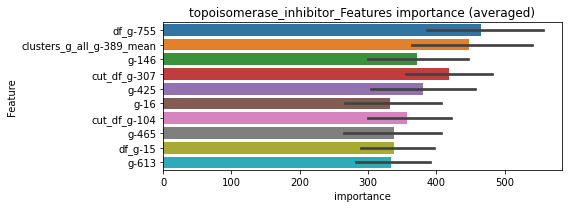

len(train_index) : 2775
len(valid_index) : 926
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00500923	valid_1's binary_logloss: 0.0594409
Early stopping, best iteration is:
[1575]	training's binary_logloss: 0.00312336	valid_1's binary_logloss: 0.055972


len(train_index) : 2776
len(valid_index) : 925
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00492712	valid_1's binary_logloss: 0.0641554
Early stopping, best iteration is:
[1880]	training's binary_logloss: 0.00257942	valid_1's binary_logloss: 0.0596836


len(train_index) : 2776
len(valid_index) : 925
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00516922	valid_1's binary_logloss: 0.0369436
Early stopping, best iteration is:
[1311]	training's binary_logloss: 0.00387533	valid_1's binary_logloss: 0.0344859


len(train_index) : 2776
len(valid_index) : 925
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00490262	valid_1's binary_logloss: 0.0584567
Early stopping, best iteration is:
[1638]	training's binary_logloss: 0.00294628	valid_1's binary_logloss: 0.0552872


topoisomerase_inhibitor logloss: 0.05135843140359526
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010321	valid_1's binary_logloss: 0.00182966
[600]	training's binary_logloss: 0.000308796	valid_1's binary_logloss: 0.000684605
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000308796	valid_1's binary_logloss: 0.000684605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000990171	valid_1's binary_logloss: 0.00445138
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000314137	valid_1's binary_logloss: 0.00247633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100762	valid_1's binary_logloss: 0.00401087
[600]	training's binary_logloss: 0.000307959	valid_1's binary_logloss: 0.00249046
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000307959	valid_1's binary_logloss: 0.00249046
Training until validation scores don't improve for 30 rou

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016235, Threshold: 0.0137626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0137626, conf_0:0.00963, conf_1:0.01789


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000319663	valid_1's binary_logloss: 0.00127661


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0437626
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0737626
threshold: 0.0737626, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923271	valid_1's binary_logloss: 0.00161634
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000301735	valid_1's binary_logloss: 0.000648189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000907817	valid_1's binary_logloss: 0.0036106
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000299578	valid_1's binary_logloss: 0.00209294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00092769	valid_1's binary_logloss: 0.00360658
[600]	training's binary_logloss: 0.0002968	valid_1's binary_logloss: 0.00245623
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.0002968	valid_1's binary_logloss: 0.00245623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000912066	valid_1's binary_logloss: 0.00285327


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658072, Threshold: 0.0737626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0148167 Vs.target_rate: 0.00076
Num_p_label: 59.0, Expected: 3.0, Threshold: 0.0737626, conf_0:0.05901, conf_1:0.08852
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.1037626


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00030167	valid_1's binary_logloss: 0.00152757


Num_p_label: 44.0, Expected: 3.0, Adj_threshold_2: 0.1337626
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.1637626
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_4: 0.1937626
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_5: 0.2237626
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_6: 0.2537626
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_7: 0.2837626
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_8: 0.3137626
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.3437626
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_10: 0.3737626
threshold: 0.3737626, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923271	valid_1's binary_logloss: 0.00161634
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000301735	valid_1's binary_logloss: 0.000648189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000907817	valid_1's binary_logloss: 0.0036106
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000299578	valid_1's binary_logloss: 0.00209294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00092769	valid_1's binary_logloss: 0.00360658
[600]	training's binary_logloss: 0.0002968	valid_1's binary_logloss: 0.00245623
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.0002968	valid_1's binary_logloss: 0.00245623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000912066	valid_1's binary_logloss: 0.00285327


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1658072, Threshold: 0.3737626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00076
Num_p_label: 21.0, Expected: 3.0, Threshold: 0.3737626, conf_0:0.33639, conf_1:0.41114
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.4037626
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.4337626
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.4637626
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.4937626


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00030167	valid_1's binary_logloss: 0.00152757


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.5237626
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5537626
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5837626
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.6137626
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.6437626
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.6737626
threshold: 0.6737626, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


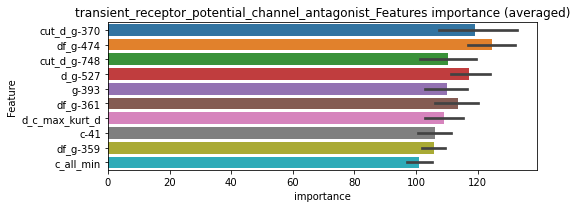

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000303056	valid_1's binary_logloss: 0.000644849


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000301397	valid_1's binary_logloss: 0.00149904


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000303664	valid_1's binary_logloss: 0.00152908


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000298647	valid_1's binary_logloss: 0.00101258


transient_receptor_potential_channel_antagonist logloss: 0.0011716963037974113
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321031	valid_1's binary_logloss: 0.000691809
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000160418	valid_1's binary_logloss: 0.000438868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000311577	valid_1's binary_logloss: 0.000796301
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000157384	valid_1's binary_logloss: 0.000484556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000322328	valid_1's binary_logloss: 0.000360802
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000158404	valid_1's binary_logloss: 0.000183156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000320792	valid_1's binary_logloss: 0.000396206


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004535, Threshold: 0.0012575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012575, conf_0:0.00088, conf_1:0.00163


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000159131	valid_1's binary_logloss: 0.000206254


Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312575
threshold: 0.0312575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000310136	valid_1's binary_logloss: 0.000579971
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000153633	valid_1's binary_logloss: 0.000348121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298581	valid_1's binary_logloss: 0.000742424
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000146912	valid_1's binary_logloss: 0.000468395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307655	valid_1's binary_logloss: 0.00033873
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000150764	valid_1's binary_logloss: 0.000167963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309828	valid_1's binary_logloss: 0.000337547


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1411787, Threshold: 0.0312575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0312575, conf_0:0.02501, conf_1:0.03751
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0612575
threshold: 0.0612575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000148317	valid_1's binary_logloss: 0.000164247


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000310136	valid_1's binary_logloss: 0.000579971
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000153633	valid_1's binary_logloss: 0.000348121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000298581	valid_1's binary_logloss: 0.000742424
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000146912	valid_1's binary_logloss: 0.000468395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307655	valid_1's binary_logloss: 0.00033873
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000150764	valid_1's binary_logloss: 0.000167963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309828	valid_1's binary_logloss: 0.000337547


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1411787, Threshold: 0.0612575, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0612575, conf_0:0.05513, conf_1:0.06738
threshold: 0.0612575, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000148317	valid_1's binary_logloss: 0.000164247


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


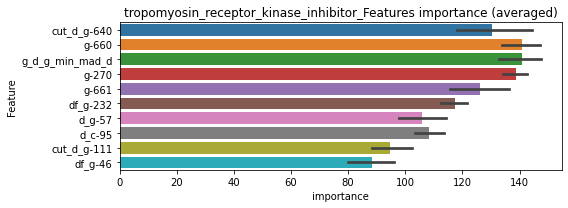

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000152546	valid_1's binary_logloss: 0.000443059
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000148401	valid_1's binary_logloss: 0.000460967
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000148443	valid_1's binary_logloss: 0.000460947
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000149822	valid_1's binary_logloss: 0.000173501
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000149822	valid_1's binary_logloss: 0.000173501
Training until validation scores don't improve for 30 rounds


tropomyosin_receptor_kinase_inhibitor logloss: 0.00031265554048185643


Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000151268	valid_1's binary_logloss: 0.000172959


trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143436	valid_1's binary_logloss: 0.00308755
[600]	training's binary_logloss: 0.000367257	valid_1's binary_logloss: 0.00118539
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000367257	valid_1's binary_logloss: 0.00118539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135598	valid_1's binary_logloss: 0.00471762
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000377045	valid_1's binary_logloss: 0.00234849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147027	valid_1's binary_logloss: 0.00383146
[600]	training's binary_logloss: 0.000370422	valid_1's binary_logloss: 0.00162714
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000367862	valid_1's binary_logloss: 0.00162139
Training until validation scores don't improve for 30 round

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020348, Threshold: 0.0080751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0080751, conf_0:0.00565, conf_1:0.01050
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0380751
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0680751
threshold: 0.0680751, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132439	valid_1's binary_logloss: 0.00266079
[600]	training's binary_logloss: 0.000358538	valid_1's binary_logloss: 0.000990893
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000358538	valid_1's binary_logloss: 0.000990893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129763	valid_1's binary_logloss: 0.0042806
[600]	training's binary_logloss: 0.000354755	valid_1's binary_logloss: 0.00216409
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000350332	valid_1's binary_logloss: 0.00216144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134017	valid_1's binary_logloss: 0.00345576
[600]	training's binary_logloss: 0.000356701	valid_1's binary_logloss: 0.00141184
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00035292	valid_1's bina

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0975719, Threshold: 0.0680751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0680751, conf_0:0.05446, conf_1:0.08169
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0980751
threshold: 0.0980751, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132439	valid_1's binary_logloss: 0.00266079
[600]	training's binary_logloss: 0.000358538	valid_1's binary_logloss: 0.000990893
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000358538	valid_1's binary_logloss: 0.000990893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129763	valid_1's binary_logloss: 0.0042806
[600]	training's binary_logloss: 0.000354755	valid_1's binary_logloss: 0.00216409
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000350332	valid_1's binary_logloss: 0.00216144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134017	valid_1's binary_logloss: 0.00345576
[600]	training's binary_logloss: 0.000356701	valid_1's binary_logloss: 0.00141184
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00035292	valid_1's bina

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0975719, Threshold: 0.0980751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, Expected: 4.2, Threshold: 0.0980751, conf_0:0.08827, conf_1:0.10788
threshold: 0.0980751, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


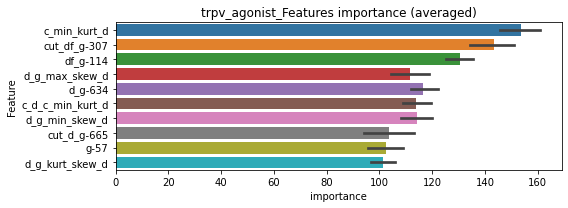

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000360923	valid_1's binary_logloss: 0.00100904


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000359456	valid_1's binary_logloss: 0.00227194


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000361022	valid_1's binary_logloss: 0.00100428


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000365719	valid_1's binary_logloss: 0.000892296


trpv_agonist logloss: 0.0012945750095969004
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255134	valid_1's binary_logloss: 0.0299553
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000597858	valid_1's binary_logloss: 0.0238614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272875	valid_1's binary_logloss: 0.0147293
[600]	training's binary_logloss: 0.000559632	valid_1's binary_logloss: 0.00872641
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000511934	valid_1's binary_logloss: 0.00854944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286354	valid_1's binary_logloss: 0.00694643
[600]	training's binary_logloss: 0.000580788	valid_1's binary_logloss: 0.00260283
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000482777	valid_1's binary_logloss: 0.00238662
Training until validation scores don't improve for 30 rounds
[

1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0034107, Threshold: 0.0154016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0154016, conf_0:0.01078, conf_1:0.02002
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_1: 0.0454016
threshold: 0.0454016, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237929	valid_1's binary_logloss: 0.0156744
[600]	training's binary_logloss: 0.000513651	valid_1's binary_logloss: 0.0103716
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000455284	valid_1's binary_logloss: 0.0102069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248817	valid_1's binary_logloss: 0.013979
[600]	training's binary_logloss: 0.000533426	valid_1's binary_logloss: 0.010069
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000504177	valid_1's binary_logloss: 0.00993702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247557	valid_1's binary_logloss: 0.013729
[600]	training's binary_logloss: 0.000532263	valid_1's binary_logloss: 0.00973719
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000477279	valid_1's binary_loglos

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0198109, Threshold: 0.0454016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0065294 Vs.target_rate: 0.00202
Num_p_label: 26.0, Expected: 8.0, Threshold: 0.0454016, conf_0:0.03632, conf_1:0.05448
Num_p_label: 16.0, Expected: 8.0, Adj_threshold_1: 0.0754016
threshold: 0.0754016, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239094	valid_1's binary_logloss: 0.014996
[600]	training's binary_logloss: 0.000515598	valid_1's binary_logloss: 0.0107801
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000462344	valid_1's binary_logloss: 0.0106109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226885	valid_1's binary_logloss: 0.0194734
[600]	training's binary_logloss: 0.000506252	valid_1's binary_logloss: 0.0143613
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000504289	valid_1's binary_logloss: 0.0143342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246634	valid_1's binary_logloss: 0.0108469
[600]	training's binary_logloss: 0.00052973	valid_1's binary_logloss: 0.00733848
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000510485	valid_1's binary_loglos

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215341, Threshold: 0.0754016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0754016, conf_0:0.06786, conf_1:0.08294
threshold: 0.0754016, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


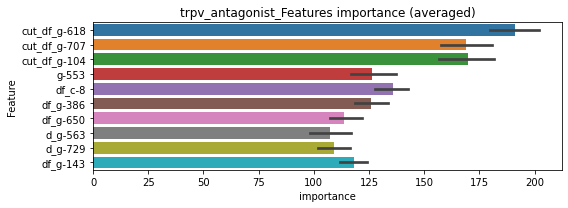

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000548762	valid_1's binary_logloss: 0.00955427


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000533209	valid_1's binary_logloss: 0.0152768


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000695757	valid_1's binary_logloss: 0.00709794


================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000487002	valid_1's binary_logloss: 0.00470194


trpv_antagonist logloss: 0.009157740529713717


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


unpredictable_cols:tubulin_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0775275	valid_1's binary_logloss: 0.158015
[600]	training's binary_logloss: 0.0344905	valid_1's binary_logloss: 0.129917
[900]	training's binary_logloss: 0.0202943	valid_1's binary_logloss: 0.121001
[1200]	training's binary_logloss: 0.0139792	valid_1's binary_logloss: 0.117519
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.0125937	valid_1's binary_logloss: 0.116589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0780917	valid_1's binary_logloss: 0.148601
[600]	training's binary_logloss: 0.0350061	valid_1's binary_logloss: 0.11634
[900]	training's binary_logloss: 0.0205953	valid_1's binary_logloss: 0.104745
[1200]	training's binary_logloss: 0.0141364	valid_1's binary_logloss: 0.099249
[1500]	training's binary_logloss: 0.0105991	valid_1's binary_logloss: 0.0964567
[1800]	training's binary_logloss: 0.00842861	valid_1's bin

1 / 3, AUC score:0.976, PR-AUC:0.958
y_Threshold: 0.0455273, Threshold: 0.0841043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 470 → Positive_corect_labels: 1332/8076
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.0841043, conf_0:0.05887, conf_1:0.10934
threshold: 0.0841043, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1332.0/8076, y_label_rate: 0.1649331
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0625753	valid_1's binary_logloss: 0.123452
[600]	training's binary_logloss: 0.0272416	valid_1's binary_logloss: 0.0929033
[900]	training's binary_logloss: 0.0161071	valid_1's binary_logloss: 0.081344
[1200]	training's binary_logloss: 0.0111374	valid_1's binary_logloss: 0.0762966
[1500]	training's binary_logloss: 0.00839472	valid_1's binary_logloss: 0.0730169
Early stopping, best iteration is:
[1533]	training's binary_logloss: 0.00817008	valid_1's binary_logloss: 0.0727159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0624464	valid_1's binary_logloss: 0.128005
[600]	training's binary_logloss: 0.0270842	valid_1's binary_logloss: 0.0988589
[900]	training's binary_logloss: 0.0159714	valid_1's binary_logloss: 0.0887512
[1200]	training's binary_logloss: 0.0110107	valid_1's binary_logloss: 0.0848412
[1500]	training's binary_logloss: 0.00834866	valid

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0657393, Threshold: 0.0841043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1282.0/7976
p_label_rate: 0.0178302 Vs.target_rate: 0.01327
Num_p_label: 71.0, Expected: 52.8, Threshold: 0.0841043, conf_0:0.06728, conf_1:0.10093
threshold: 0.0841043, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 1282.0/7976, y_label_rate: 0.1607322
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0536961	valid_1's binary_logloss: 0.125094
[600]	training's binary_logloss: 0.0231656	valid_1's binary_logloss: 0.0989255
[900]	training's binary_logloss: 0.0137537	valid_1's binary_logloss: 0.089871
[1200]	training's binary_logloss: 0.00957811	valid_1's binary_logloss: 0.0862455
Early stopping, best iteration is:
[1450]	training's binary_logloss: 0.00755885	valid_1's binary_logloss: 0.0840944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0557233	valid_1's binary_logloss: 0.109306
[600]	training's binary_logloss: 0.0241065	valid_1's binary_logloss: 0.0814443
[900]	training's binary_logloss: 0.0143566	valid_1's binary_logloss: 0.0711076
[1200]	training's binary_logloss: 0.0099269	valid_1's binary_logloss: 0.0655175
[1500]	training's binary_logloss: 0.00752893	valid_1's binary_logloss: 0.0628974
[1800]	training's binary_logloss: 0.00605319	vali

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0650294, Threshold: 0.0841043, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1239.0/7890
p_label_rate: 0.0148167 Vs.target_rate: 0.01327
Num_p_label: 59.0, Expected: 52.8, Threshold: 0.0841043, conf_0:0.07569, conf_1:0.09251
threshold: 0.0841043, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 1239.0/7890, y_label_rate: 0.1570342


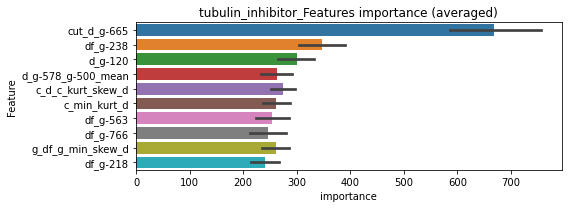

len(train_index) : 5917
len(valid_index) : 1973
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0048366	valid_1's binary_logloss: 0.0528224
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.0043723	valid_1's binary_logloss: 0.0517519


len(train_index) : 5917
len(valid_index) : 1973
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00480781	valid_1's binary_logloss: 0.0604091
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.00453144	valid_1's binary_logloss: 0.0598347


len(train_index) : 5918
len(valid_index) : 1972
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00478644	valid_1's binary_logloss: 0.0609076
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.00441749	valid_1's binary_logloss: 0.0599941


len(train_index) : 5918
len(valid_index) : 1972
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00487241	valid_1's binary_logloss: 0.0551041
Early stopping, best iteration is:
[1246]	training's binary_logloss: 0.00381161	valid_1's binary_logloss: 0.0533579


tubulin_inhibitor logloss: 0.05623451823337612
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431416	valid_1's binary_logloss: 0.0469672
[600]	training's binary_logloss: 0.000795522	valid_1's binary_logloss: 0.039263
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000672685	valid_1's binary_logloss: 0.0388884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394006	valid_1's binary_logloss: 0.0388455
[600]	training's binary_logloss: 0.000780129	valid_1's binary_logloss: 0.0322756
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000673165	valid_1's binary_logloss: 0.0319159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440422	valid_1's binary_logloss: 0.0265487
[600]	training's binary_logloss: 0.000822291	valid_1's binary_logloss: 0.0222163
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000869111	valid_1's binary_loglos

1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0051018, Threshold: 0.0576317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0576317, conf_0:0.04034, conf_1:0.07492
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_1: 0.0876317
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1176317
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.1476317
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.1776317
threshold: 0.1776317, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378125	valid_1's binary_logloss: 0.0345775
[600]	training's binary_logloss: 0.000763168	valid_1's binary_logloss: 0.0264308
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000637005	valid_1's binary_logloss: 0.0260362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362756	valid_1's binary_logloss: 0.0310909
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000878981	valid_1's binary_logloss: 0.0251689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361294	valid_1's binary_logloss: 0.0201311
[600]	training's binary_logloss: 0.000747754	valid_1's binary_logloss: 0.0122013
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000588348	valid_1's binary_logloss: 0.0118416
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224155, Threshold: 0.1776317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0097941 Vs.target_rate: 0.00307
Num_p_label: 39.0, Expected: 12.2, Threshold: 0.1776317, conf_0:0.14211, conf_1:0.21316
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_1: 0.2076317
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.2376317
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.2676317
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.2976317
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_5: 0.3276317
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3576317
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_7: 0.3876317
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_8: 0.4176317
threshold: 0.4176317, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361924	valid_1's binary_logloss: 0.0327561
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.0012033	valid_1's binary_logloss: 0.0272288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336078	valid_1's binary_logloss: 0.0397838
[600]	training's binary_logloss: 0.000713043	valid_1's binary_logloss: 0.0331039
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000725441	valid_1's binary_logloss: 0.0329501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370818	valid_1's binary_logloss: 0.022638
[600]	training's binary_logloss: 0.000745279	valid_1's binary_logloss: 0.0141994
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000626116	valid_1's binary_logloss: 0.013729
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0254774, Threshold: 0.4176317, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4176317, conf_0:0.37587, conf_1:0.45939
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.4476317
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.4776317
threshold: 0.4776317, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


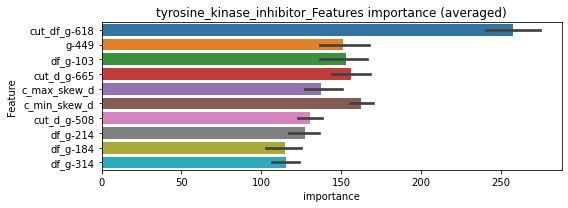

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00100173	valid_1's binary_logloss: 0.0259769
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000901917	valid_1's binary_logloss: 0.0252772


================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000748125	valid_1's binary_logloss: 0.017252


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000614906	valid_1's binary_logloss: 0.0164236


tyrosine_kinase_inhibitor logloss: 0.02123368298579521
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000609146	valid_1's binary_logloss: 0.00388022
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238051	valid_1's binary_logloss: 0.0030751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000613482	valid_1's binary_logloss: 0.0011584
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000237304	valid_1's binary_logloss: 0.000539721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621506	valid_1's binary_logloss: 0.000789189
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000238325	valid_1's binary_logloss: 0.000321675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00060097	valid_1's binary_logloss: 0.00290374


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009027, Threshold: 0.0023424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023424, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323424


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000232177	valid_1's binary_logloss: 0.00203107


threshold: 0.0323424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577801	valid_1's binary_logloss: 0.00434297
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000231941	valid_1's binary_logloss: 0.00355127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592641	valid_1's binary_logloss: 0.00119499
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000230451	valid_1's binary_logloss: 0.000598589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059929	valid_1's binary_logloss: 0.000693943
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000231499	valid_1's binary_logloss: 0.000278115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000586519	valid_1's binary_logloss: 0.00329577
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00023

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253754, Threshold: 0.0323424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0323424, conf_0:0.02587, conf_1:0.03881
threshold: 0.0323424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577801	valid_1's binary_logloss: 0.00434297
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000231941	valid_1's binary_logloss: 0.00355127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592641	valid_1's binary_logloss: 0.00119499
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000230451	valid_1's binary_logloss: 0.000598589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059929	valid_1's binary_logloss: 0.000693943
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000231499	valid_1's binary_logloss: 0.000278115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000586519	valid_1's binary_logloss: 0.00329577


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253754, Threshold: 0.0323424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0323424, conf_0:0.02911, conf_1:0.03558
threshold: 0.0323424, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000233105	valid_1's binary_logloss: 0.00254684


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


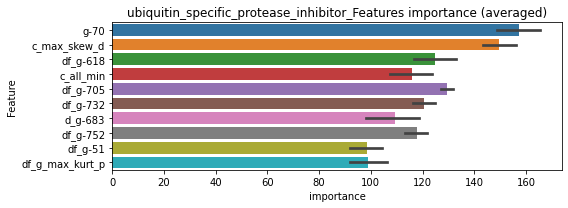

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00025181	valid_1's binary_logloss: 0.00263062
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000235894	valid_1's binary_logloss: 0.00067667
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000235323	valid_1's binary_logloss: 0.000284428
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000235323	valid_1's binary_logloss: 0.000284428


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0012402607226796834


Early stopping, best iteration is:
[913]	training's binary_logloss: 0.00023557	valid_1's binary_logloss: 0.001368


mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


unpredictable_cols:vegfr_inhibitor → create_features


N_features:358
================= Pseudo labeling 1 / 3 =================



Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0564915	valid_1's binary_logloss: 0.136067
[600]	training's binary_logloss: 0.0245308	valid_1's binary_logloss: 0.109512
[900]	training's binary_logloss: 0.0147896	valid_1's binary_logloss: 0.100958
[1200]	training's binary_logloss: 0.0103841	valid_1's binary_logloss: 0.0976231
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0104676	valid_1's binary_logloss: 0.0975896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0565071	valid_1's binary_logloss: 0.129958
[600]	training's binary_logloss: 0.0244612	valid_1's binary_logloss: 0.0987554
[900]	training's binary_logloss: 0.0147161	valid_1's binary_logloss: 0.088503
[1200]	training's binary_logloss: 0.010324	valid_1's binary_logloss: 0.0836754
[1500]	training's binary_logloss: 0.00791331	valid_1's binary_logloss: 0.0808538
[1800]	training's binary_logloss: 0.00639387	valid_1'

1 / 3, AUC score:0.989, PR-AUC:0.978
y_Threshold: 0.0382125, Threshold: 0.0764416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 264 → Positive_corect_labels: 887/5295
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0764416, conf_0:0.05351, conf_1:0.09937
threshold: 0.0764416, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 887.0/5295, y_label_rate: 0.1675165
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0495861	valid_1's binary_logloss: 0.103823
[600]	training's binary_logloss: 0.0212166	valid_1's binary_logloss: 0.0748746
[900]	training's binary_logloss: 0.0128055	valid_1's binary_logloss: 0.0654529
[1200]	training's binary_logloss: 0.00901312	valid_1's binary_logloss: 0.0609456
[1500]	training's binary_logloss: 0.00693086	valid_1's binary_logloss: 0.0581417
[1800]	training's binary_logloss: 0.00561617	valid_1's binary_logloss: 0.0563212
[2100]	training's binary_logloss: 0.00472929	valid_1's binary_logloss: 0.0550675
Early stopping, best iteration is:
[2263]	training's binary_logloss: 0.00435752	valid_1's binary_logloss: 0.0545612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0496867	valid_1's binary_logloss: 0.10421
[600]	training's binary_logloss: 0.0214485	valid_1's binary_logloss: 0.076676
[900]	training's binary_logloss: 0.012975	valid

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0647657, Threshold: 0.0764416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 864.0/5249
p_label_rate: 0.0158212 Vs.target_rate: 0.00714
Num_p_label: 63.0, Expected: 28.4, Threshold: 0.0764416, conf_0:0.06115, conf_1:0.09173
Num_p_label: 39.0, Expected: 28.4, Adj_threshold_1: 0.1064416
threshold: 0.1064416, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 864.0/5249, y_label_rate: 0.1646028
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0459667	valid_1's binary_logloss: 0.0912193
[600]	training's binary_logloss: 0.0196777	valid_1's binary_logloss: 0.0649485
[900]	training's binary_logloss: 0.0119736	valid_1's binary_logloss: 0.057188
[1200]	training's binary_logloss: 0.0084616	valid_1's binary_logloss: 0.053206
[1500]	training's binary_logloss: 0.00654088	valid_1's binary_logloss: 0.0507433
[1800]	training's binary_logloss: 0.00531663	valid_1's binary_logloss: 0.0492956
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.00496263	valid_1's binary_logloss: 0.048668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0445118	valid_1's binary_logloss: 0.113894
[600]	training's binary_logloss: 0.0191681	valid_1's binary_logloss: 0.087066
[900]	training's binary_logloss: 0.0116725	valid_1's binary_logloss: 0.078846
[1200]	training's binary_logloss: 0.00826845	valid_1

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0715346, Threshold: 0.1064416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 845.0/5211
p_label_rate: 0.0110497 Vs.target_rate: 0.00714
Num_p_label: 44.0, Expected: 28.4, Threshold: 0.1064416, conf_0:0.09580, conf_1:0.11709
Num_p_label: 27.0, Expected: 28.4, Adj_threshold_1: 0.1364416
threshold: 0.1364416, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 845.0/5211, y_label_rate: 0.1621570


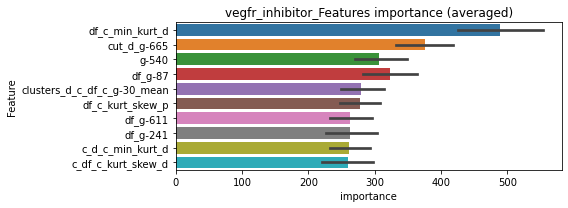

len(train_index) : 3908
len(valid_index) : 1303
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00443966	valid_1's binary_logloss: 0.0497805
Early stopping, best iteration is:
[1331]	training's binary_logloss: 0.00327027	valid_1's binary_logloss: 0.0478745


len(train_index) : 3908
len(valid_index) : 1303
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00431818	valid_1's binary_logloss: 0.0683517
Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.00393698	valid_1's binary_logloss: 0.0675177


len(train_index) : 3908
len(valid_index) : 1303
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00456782	valid_1's binary_logloss: 0.0317681
Early stopping, best iteration is:
[1515]	training's binary_logloss: 0.00293154	valid_1's binary_logloss: 0.0287399


len(train_index) : 3909
len(valid_index) : 1302
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00441864	valid_1's binary_logloss: 0.0457516
Early stopping, best iteration is:
[1434]	training's binary_logloss: 0.00300872	valid_1's binary_logloss: 0.0436292


vegfr_inhibitor logloss: 0.046940946833077875
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141427	valid_1's binary_logloss: 0.00508662
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000370139	valid_1's binary_logloss: 0.00221522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147228	valid_1's binary_logloss: 0.00534699
[600]	training's binary_logloss: 0.000357143	valid_1's binary_logloss: 0.00280496
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357439	valid_1's binary_logloss: 0.00280452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147699	valid_1's binary_logloss: 0.00403304
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377294	valid_1's binary_logloss: 0.00167681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143863	valid_1's binary_logloss: 0.00940909

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024378, Threshold: 0.0089191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0089191, conf_0:0.00624, conf_1:0.01159
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.0389191


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000377878	valid_1's binary_logloss: 0.00672726


threshold: 0.0389191, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133135	valid_1's binary_logloss: 0.00473534
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000354085	valid_1's binary_logloss: 0.00210508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137251	valid_1's binary_logloss: 0.00379335
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000362552	valid_1's binary_logloss: 0.00172818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135987	valid_1's binary_logloss: 0.0037903
[600]	training's binary_logloss: 0.000351518	valid_1's binary_logloss: 0.00167635
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000351518	valid_1's binary_logloss: 0.00167635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134242	valid_1's binary_logloss: 0.0108984


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0391035, Threshold: 0.0389191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0389191, conf_0:0.03114, conf_1:0.04670
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_1: 0.0689191
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_2: 0.0989191
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.1289191


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000377222	valid_1's binary_logloss: 0.00785355


threshold: 0.1289191, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133135	valid_1's binary_logloss: 0.00473534
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000354085	valid_1's binary_logloss: 0.00210508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137251	valid_1's binary_logloss: 0.00379335
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000362552	valid_1's binary_logloss: 0.00172818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135987	valid_1's binary_logloss: 0.0037903
[600]	training's binary_logloss: 0.000351518	valid_1's binary_logloss: 0.00167635
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000351518	valid_1's binary_logloss: 0.00167635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134242	valid_1's binary_logloss: 0.0108984
E

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0391035, Threshold: 0.1289191, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00109
Num_p_label: 8.0, Expected: 4.3, Threshold: 0.1289191, conf_0:0.11603, conf_1:0.14181
threshold: 0.1289191, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


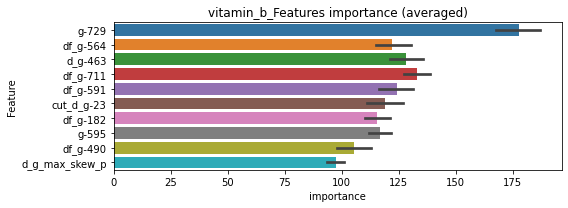

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000355807	valid_1's binary_logloss: 0.00219489


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000354689	valid_1's binary_logloss: 0.00165035


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000367101	valid_1's binary_logloss: 0.00157369


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000364393	valid_1's binary_logloss: 0.00366855


vitamin_b logloss: 0.0022722082022546518
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221016	valid_1's binary_logloss: 0.0122672
[600]	training's binary_logloss: 0.000472054	valid_1's binary_logloss: 0.00771824
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000457135	valid_1's binary_logloss: 0.00769648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225429	valid_1's binary_logloss: 0.0128185
[600]	training's binary_logloss: 0.000471704	valid_1's binary_logloss: 0.00752015
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00045945	valid_1's binary_logloss: 0.00747285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234745	valid_1's binary_logloss: 0.00932641
[600]	training's binary_logloss: 0.000482264	valid_1's binary_logloss: 0.00571797
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00044786	valid_1's binary_l

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028688, Threshold: 0.0154950, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0154950, conf_0:0.01085, conf_1:0.02014
Num_p_label: 16.0, Expected: 6.5, Adj_threshold_1: 0.0454950
threshold: 0.0454950, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020084	valid_1's binary_logloss: 0.0127802
[600]	training's binary_logloss: 0.000456033	valid_1's binary_logloss: 0.00834576
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000438717	valid_1's binary_logloss: 0.00829305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021375	valid_1's binary_logloss: 0.0113508
[600]	training's binary_logloss: 0.000454804	valid_1's binary_logloss: 0.0063175
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000430713	valid_1's binary_logloss: 0.00622351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218126	valid_1's binary_logloss: 0.00837088
[600]	training's binary_logloss: 0.00046609	valid_1's binary_logloss: 0.00497833
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000460727	valid_1's binary_log

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252846, Threshold: 0.0454950, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00164
Num_p_label: 36.0, Expected: 6.5, Threshold: 0.0454950, conf_0:0.03640, conf_1:0.05459
Num_p_label: 23.0, Expected: 6.5, Adj_threshold_1: 0.0754950
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_2: 0.1054950
threshold: 0.1054950, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020084	valid_1's binary_logloss: 0.0127802
[600]	training's binary_logloss: 0.000456033	valid_1's binary_logloss: 0.00834576
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000438717	valid_1's binary_logloss: 0.00829305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021375	valid_1's binary_logloss: 0.0113508
[600]	training's binary_logloss: 0.000454804	valid_1's binary_logloss: 0.0063175
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000430713	valid_1's binary_logloss: 0.00622351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218126	valid_1's binary_logloss: 0.00837088
[600]	training's binary_logloss: 0.00046609	valid_1's binary_logloss: 0.00497833
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000460727	valid_1's binary_log

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252846, Threshold: 0.1054950, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00164
Num_p_label: 15.0, Expected: 6.5, Threshold: 0.1054950, conf_0:0.09495, conf_1:0.11604
threshold: 0.1054950, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


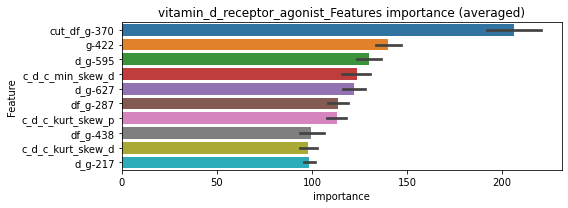

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000499485	valid_1's binary_logloss: 0.00840085


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000433357	valid_1's binary_logloss: 0.0063144


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000519292	valid_1's binary_logloss: 0.00488349


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000429336	valid_1's binary_logloss: 0.00595723


vitamin_d_receptor_agonist logloss: 0.0063891042903049065
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:300
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175919	valid_1's binary_logloss: 0.00502066
[600]	training's binary_logloss: 0.000395691	valid_1's binary_logloss: 0.00205248
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000372473	valid_1's binary_logloss: 0.00201895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176751	valid_1's binary_logloss: 0.00808133
[600]	training's binary_logloss: 0.000392997	valid_1's binary_logloss: 0.00493029
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000387253	valid_1's binary_logloss: 0.00489681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184851	valid_1's binary_logloss: 0.00471611
[600]	training's binary_logloss: 0.000400867	valid_1's binary_logloss: 0.00253901
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000397297	valid_1's bina

1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026423, Threshold: 0.0120154, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0120154, conf_0:0.00841, conf_1:0.01562
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.0420154
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0720154
threshold: 0.0720154, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159199	valid_1's binary_logloss: 0.00472319
[600]	training's binary_logloss: 0.000372919	valid_1's binary_logloss: 0.00216166
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.0003661	valid_1's binary_logloss: 0.00214546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168414	valid_1's binary_logloss: 0.0059359
[600]	training's binary_logloss: 0.000378848	valid_1's binary_logloss: 0.00318536
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000364844	valid_1's binary_logloss: 0.00316856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168213	valid_1's binary_logloss: 0.00415495
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000458596	valid_1's binary_logloss: 0.00229946
Training until validation scores don't improve for 30 rounds
[

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0598292, Threshold: 0.0720154, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0055249 Vs.target_rate: 0.00126
Num_p_label: 22.0, Expected: 5.0, Threshold: 0.0720154, conf_0:0.05761, conf_1:0.08642
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_1: 0.1020154
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1320154
threshold: 0.1320154, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159199	valid_1's binary_logloss: 0.00472319
[600]	training's binary_logloss: 0.000372919	valid_1's binary_logloss: 0.00216166
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.0003661	valid_1's binary_logloss: 0.00214546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168414	valid_1's binary_logloss: 0.0059359
[600]	training's binary_logloss: 0.000378848	valid_1's binary_logloss: 0.00318536
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000364844	valid_1's binary_logloss: 0.00316856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168213	valid_1's binary_logloss: 0.00415495
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000458596	valid_1's binary_logloss: 0.00229946
Training until validation scores don't improve for 30 rounds
[

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0598292, Threshold: 0.1320154, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1320154, conf_0:0.11881, conf_1:0.14522
threshold: 0.1320154, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


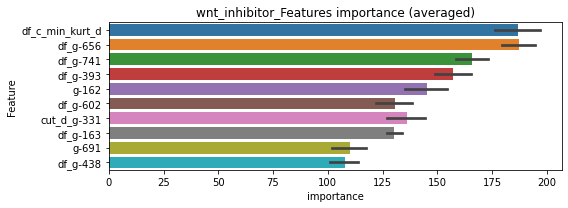

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000361232	valid_1's binary_logloss: 0.00194464
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000362396	valid_1's binary_logloss: 0.00194375


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000382035	valid_1's binary_logloss: 0.00260521


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000450362	valid_1's binary_logloss: 0.00308054


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000369902	valid_1's binary_logloss: 0.00357


wnt_inhibitor logloss: 0.002800096975113369


CV:0.016922620477827437


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_an